#  Install Libraries & Extensions

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import binom
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
import pandas as pd

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

import statistics as stats

from sklearn.preprocessing import OneHotEncoder
import geopandas as gpd
from sklearn.tree import DecisionTreeRegressor

Install & Enable Jupyter Notebook Extensions
- Enabled Spellchecker 
    - Assist with Spellchecking markdown entries as using exported Jupyter Notebook Markdown
cells to create some report sections
- Collapsible Headings
    - Help with ongoing structure of Notebook and tracking of Sections & Sections Goals, including success failure 
of attempted 


In [2]:
# !pip install jupyter_contrib_nbextensions
# conda install -c conda-forge jupyter_contrib_nbextensions
# conda update -n base -c defaults conda

In [3]:
# Create df table
df_index = %who_ls DataFrame
df_index_table = pd.DataFrame(df_index,columns =["DF_Name"])
df_index_table["Description"] = ""
df_index_table

Empty DataFrame
Columns: [DF_Name, Description]
Index: []

# END

***(Install Libraries & Extensions)***

# Dataset 1: "pop"
# 2011-2023 Irish Population, by Age, Sex & Region

In [4]:
pop = pd.read_csv("CSO_Estimated_Population_(Persons_in_April)_by_Region.csv")

DF = "pop"
Description = "Original Data - 2011-2023 Irish Population, by Age, Sex & Region"
df_index_table.loc[len(df_index_table)] = [DF, Description]






# Reviewing Dataset Content & Dimensions 2011-2023 Irish Population

In [5]:
#Review imported data
pop.head(10)

STATISTIC Label  Year    Age Group         Sex  \
0  Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
1  Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
2  Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
3  Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
4  Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
5  Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
6  Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
7  Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
8  Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
9  Estimated Population (Persons in April)  2011  0 - 4 years        Male   

       Region      UNIT  VALUE  
0       State  Thousand  356.0  
1      Border  Thousand   30.7  
2        West  Thousand   32.6  
3    Mid-West  Thousand   35.0  
4  South-East  Thousand   32.0  
5  South-West  Thousand   50.1  
6      Dublin  Thousand   93.3  
7    Mid-East  Thousand   58.5  
8     Midland  Thousand   23.9  
9       State  Thousand  182.0

In [6]:
pop.tail(10)

STATISTIC Label  Year Age Group     Sex  \
6659  Estimated Population (Persons in April)  2023  All ages    Male   
6660  Estimated Population (Persons in April)  2023  All ages  Female   
6661  Estimated Population (Persons in April)  2023  All ages  Female   
6662  Estimated Population (Persons in April)  2023  All ages  Female   
6663  Estimated Population (Persons in April)  2023  All ages  Female   
6664  Estimated Population (Persons in April)  2023  All ages  Female   
6665  Estimated Population (Persons in April)  2023  All ages  Female   
6666  Estimated Population (Persons in April)  2023  All ages  Female   
6667  Estimated Population (Persons in April)  2023  All ages  Female   
6668  Estimated Population (Persons in April)  2023  All ages  Female   

          Region      UNIT   VALUE  
6659     Midland  Thousand   161.3  
6660       State  Thousand  2675.4  
6661      Border  Thousand   217.2  
6662        West  Thousand   252.9  
6663    Mid-West  Thousand   263.9  
6664  South-East  Thousand   237.5  
6665  South-West  Thousand   383.8  
6666      Dublin  Thousand   765.6  
6667    Mid-East  Thousand   391.3  
6668     Midland  Thousand   163.2

In [7]:
pop.shape
# 6669 observations
# 7 Features

(6669, 7)

The Dimensions of the Population dataset (pop) is 10 Columns with 6669 rows/observations. From reviewing the head and tail of the data, it becomes apparent that the data is split into several categories within each column including Age Groups, All Ages, Individual Sex, Both Sex, individual Regions and State. These categories area stated for each Year from 2011-2023. It important to review the shape of the data to become aware of any duplication that may affect plotting and subsequent interpretation. It also allows for review of any missing or null values, which should be dealt with on a case by case basis; with the correct solution based on the level of direct influence it will have on original research motives / questions and potential results.

In [8]:
# Pandas Check null values
pop.isnull().sum()

STATISTIC Label    0
Year               0
Age Group          0
Sex                0
Region             0
UNIT               0
VALUE              0
dtype: int64

As all columns state 0 missing values, there is no action corrective action required in this regard.

Another way of checking null Values. Again, as all columns state the total 6669 missing values, there is no action corrective action required.

In [9]:
# Count Values in each column
# All 6669 therefore no missing data
pop.count()

STATISTIC Label    6669
Year               6669
Age Group          6669
Sex                6669
Region             6669
UNIT               6669
VALUE              6669
dtype: int64

In [10]:
pop.nunique()

STATISTIC Label       1
Year                 13
Age Group            19
Sex                   3
Region                9
UNIT                  1
VALUE              1575
dtype: int64

As previously stated, reviewing the Head, Tail and other dimensions of the data shows that there are categorical variables within. Reviewing unique values will assist with identifying number and type of categories are within


In [11]:
pop.info()
# For each Column : 6669 non-null values
# = No missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6669 non-null   object 
 1   Year             6669 non-null   int64  
 2   Age Group        6669 non-null   object 
 3   Sex              6669 non-null   object 
 4   Region           6669 non-null   object 
 5   UNIT             6669 non-null   object 
 6   VALUE            6669 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 364.8+ KB


In [12]:
# numpy check missing values
np.where(pd.isnull(pop))
# No missing Values

(array([], dtype=int64), array([], dtype=int64))

In [13]:
# Check NA Values
pop.isna().sum()

# =  No NA Values

STATISTIC Label    0
Year               0
Age Group          0
Sex                0
Region             0
UNIT               0
VALUE              0
dtype: int64

In [14]:
# Numpy check NA Values
np.where(pd.isna(pop))

# =  No NA Values

(array([], dtype=int64), array([], dtype=int64))

## Numerical Variables
Python function pop.describe shows the dimensions of the data that python recognises as numerical. There are only 2 variables that are  numerical; Year and VALUE

In [15]:
# Explore dataset to identify shape and types of variable
# Show Numercial Variables

pop.describe()


Year        VALUE
count  6669.000000  6669.000000
mean   2017.000000    75.670460
std       3.741938   281.512172
min    2011.000000     1.200000
25%    2014.000000    12.500000
50%    2017.000000    20.700000
75%    2020.000000    42.200000
max    2023.000000  5281.600000

The Numerical Variables are as follows:

Year
- The year related to the observation
- Min = 2011, Max = 2023 - As expected from data description

VALUE
- The observed Population Value for relating to the criteria in the other columns
- The descriptive stats shown here are inclusive of summary values e.g. all age, both sex, and cannot be used to glean any useful information regarding spread or central tendencies. The summary values skew results and would lead to non-representative interpretations and conclusions.


## Categorical Variables

Python function pop.describe(include=object) shows the variable that are assigned the "object" data types by python upon import of the data. The observations within these columns typically contain strings. These will be considered to be categorical variables and treated as such during the analysis.
There are 5 categorical variables; 
- STATISTIC Label
- Age Group
- Sex
- Region
- UNIT

In [16]:

#numpy describe
pop.describe(include=object)


STATISTIC Label    Age Group         Sex  \
count                                      6669         6669        6669   
unique                                        1           19           3   
top     Estimated Population (Persons in April)  0 - 4 years  Both sexes   
freq                                       6669          351        2223   

       Region      UNIT  
count    6669      6669  
unique      9         1  
top     State  Thousand  
freq      741      6669

STATISTIC Label - 1 Unique Value 

- This variable is present for identification within dataset, not actual observations. It will be dropped during analysis

Age Group - 19 Unique Values

- These are Age groups spanning 0-85+ years in increments of 5, and an All Ages Group. As All Ages is a total of the other 18 categories, this will be extracted in some subsets. It is important to extract this, and other summary/total observations where necessary so as not to present skewed results

Sex - 3 Unique Values

- These are Both sexes, Male and Female. As Both sexes is a total/summary of the other 2 categories, this will be extracted in some subsets so as not to present skewed results.

Region -  9 Unique Values

- The Regions present are 'State', 'Border', 'West', 'Mid-West', 'South-East', 'South-West', 'Dublin', 'Mid-East' and 'Midland'. As State is a total of the other Region categories, this will be extracted this in some subsets so as not to present skewed results 

UNIT - 1 Unique Value 

- This variable is present For clarification of VALUE within dataset, and is not actual observation. It will be dropped during analysis

Note: Age, Sex and Region are the categorical variables that will be used for analysing the dataset and gleaning information related to the research questions.


In [17]:
#also shows data types
pop.dtypes

STATISTIC Label     object
Year                 int64
Age Group           object
Sex                 object
Region              object
UNIT                object
VALUE              float64
dtype: object

# END

***(Reviewing Dataset Content & Dimensions 2011-2023 Irish Population)***


# EDA "pop"

In [18]:
print(pop['Sex'].unique())


['Both sexes' 'Male' 'Female']


The 3 categories withing Sex are Both sexes, Male and Female.
As Both sexes is a total of the other 2 categories, this will be extracted in some subsets. It is important to extract this where necessary so as not to present skewed results.

In [19]:
pop["Age Group"].unique()

array(['0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years',
       '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years',
       '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years',
       '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years',
       '80 - 84 years', '85 years and over', 'All ages'], dtype=object)

The  categories withing Sex are Both sexes, Male and Female.
As Both sexes is a total of the other 2 categories, this will be extracted this in some subsets. It is important to extract this where necessary so as not to present skewed results

In [20]:
print(pop["Region"].unique())

['State' 'Border' 'West' 'Mid-West' 'South-East' 'South-West' 'Dublin'
 'Mid-East' 'Midland']


The  categories within Region are 'State' 'Border' 'West' 'Mid-West' 'South-East' 'South-West' 'Dublin'
 'Mid-East' and 'Midland'.
As State is a total of the other Region categories, this will be extracted this in some subsets. It is important to extract this where necessary so as not to present skewed results

In [21]:
DF = "pop_r"
Description = "r=reduced = Removed All Ages, State, and Both Sexes Summary lines"
df_index_table.loc[len(df_index_table)] = [DF, Description]


# Remove "All Ages" Age Group
pop_r = pop.loc[pop["Age Group"] != "All ages",]
# Remove "State" Region Group
pop_r = pop_r.loc[pop_r["Region"] != "State",]
# Remove "both sexes" Sex Group
pop_r = pop_r.loc[pop_r["Sex"] != "Both sexes",]

pop_r


STATISTIC Label  Year          Age Group  \
10    Estimated Population (Persons in April)  2011        0 - 4 years   
11    Estimated Population (Persons in April)  2011        0 - 4 years   
12    Estimated Population (Persons in April)  2011        0 - 4 years   
13    Estimated Population (Persons in April)  2011        0 - 4 years   
14    Estimated Population (Persons in April)  2011        0 - 4 years   
...                                       ...   ...                ...   
6637  Estimated Population (Persons in April)  2023  85 years and over   
6638  Estimated Population (Persons in April)  2023  85 years and over   
6639  Estimated Population (Persons in April)  2023  85 years and over   
6640  Estimated Population (Persons in April)  2023  85 years and over   
6641  Estimated Population (Persons in April)  2023  85 years and over   

         Sex      Region      UNIT  VALUE  
10      Male      Border  Thousand   15.8  
11      Male        West  Thousand   16.6  
12      Male    Mid-West  Thousand   18.0  
13      Male  South-East  Thousand   16.4  
14      Male  South-West  Thousand   25.5  
...      ...         ...       ...    ...  
6637  Female  South-East  Thousand    5.0  
6638  Female  South-West  Thousand    8.1  
6639  Female      Dublin  Thousand   15.5  
6640  Female    Mid-East  Thousand    6.0  
6641  Female     Midland  Thousand    3.0  

[3744 rows x 7 columns]

In [22]:
# Review to see that summary stats no longer present
print(pop_r['Sex'].unique())
print(pop_r["Age Group"].unique())
print(pop_r["Region"].unique())

['Male' 'Female']
['0 - 4 years' '5 - 9 years' '10 - 14 years' '15 - 19 years'
 '20 - 24 years' '25 - 29 years' '30 - 34 years' '35 - 39 years'
 '40 - 44 years' '45 - 49 years' '50 - 54 years' '55 - 59 years'
 '60 - 64 years' '65 - 69 years' '70 - 74 years' '75 - 79 years'
 '80 - 84 years' '85 years and over']
['Border' 'West' 'Mid-West' 'South-East' 'South-West' 'Dublin' 'Mid-East'
 'Midland']


# END
***(EDA "pop" )***

# Feature Engineering

In [23]:
# Create DF "popc" and add Converted Columns
popc = pop

DF = "popc"
Description = "pop with categorical column(Age, Sex & Region) converted to numeric"

df_index_table.loc[len(df_index_table)] = [DF, Description]

To facilitate analysis of the categorical variable, they are converted to numerical variables. Each Category will be assigned a unique number. 
It is important that during this conversion, the categorical variable is not changed in any way, other than the label that represents it i.e. the numerical equivalent should not change the "meaning" of the variable.

#### Convert Categorical Variables into Numerical

**Categorical Variables:**
- STATISTIC Label - For identification of dataset - will drop this column during analysis
- **Age Group - Identifies age group of populaton - Convert**
- **Sex - Identifies Sex of Population - Convert**
- **Region - Identifies region of population - Convert**
- UNIT - Identifies the unit of the population value - Drop but ensure results/graphs are quoted/labelled appropriately

Note:
- Sex = Male / Female and **BOTH SEXES**
- Age Groups = 0 - 85+ years and **ALL AGES**
- Region - 8 Regions and **STATE**

## **Convert Sex**

Add Column for sex_id

In [24]:
# List unique value of Sex

print(popc['Sex'].unique())

['Both sexes' 'Male' 'Female']


**Conversion:**

**New Column = sex_id**  
    
- Male = 1
- Female = 2
- Both = 3


 ***Note** - Group 3 represents the whole population so it will be used as the "global" comparison i.e. trends identified within the 2 "true" groups will be compared to this global group*

In [25]:
sex_id = []
for row in popc['Sex']:
    if row =="Male" : sex_id.append('1') 
    elif row == "Female": sex_id.append('2') 
    elif row == "Both sexes": sex_id.append('3') 
    else: sex_id.append('No_Sex')

popc['sex_id'] = sex_id
popc['sex_id'] = pd.to_numeric(popc['sex_id'])
popc.tail(30)

STATISTIC Label  Year          Age Group  \
6639  Estimated Population (Persons in April)  2023  85 years and over   
6640  Estimated Population (Persons in April)  2023  85 years and over   
6641  Estimated Population (Persons in April)  2023  85 years and over   
6642  Estimated Population (Persons in April)  2023           All ages   
6643  Estimated Population (Persons in April)  2023           All ages   
6644  Estimated Population (Persons in April)  2023           All ages   
6645  Estimated Population (Persons in April)  2023           All ages   
6646  Estimated Population (Persons in April)  2023           All ages   
6647  Estimated Population (Persons in April)  2023           All ages   
6648  Estimated Population (Persons in April)  2023           All ages   
6649  Estimated Population (Persons in April)  2023           All ages   
6650  Estimated Population (Persons in April)  2023           All ages   
6651  Estimated Population (Persons in April)  2023           All ages   
6652  Estimated Population (Persons in April)  2023           All ages   
6653  Estimated Population (Persons in April)  2023           All ages   
6654  Estimated Population (Persons in April)  2023           All ages   
6655  Estimated Population (Persons in April)  2023           All ages   
6656  Estimated Population (Persons in April)  2023           All ages   
6657  Estimated Population (Persons in April)  2023           All ages   
6658  Estimated Population (Persons in April)  2023           All ages   
6659  Estimated Population (Persons in April)  2023           All ages   
6660  Estimated Population (Persons in April)  2023           All ages   
6661  Estimated Population (Persons in April)  2023           All ages   
6662  Estimated Population (Persons in April)  2023           All ages   
6663  Estimated Population (Persons in April)  2023           All ages   
6664  Estimated Population (Persons in April)  2023           All ages   
6665  Estimated Population (Persons in April)  2023           All ages   
6666  Estimated Population (Persons in April)  2023           All ages   
6667  Estimated Population (Persons in April)  2023           All ages   
6668  Estimated Population (Persons in April)  2023           All ages   

             Sex      Region      UNIT   VALUE  sex_id  
6639      Female      Dublin  Thousand    15.5       2  
6640      Female    Mid-East  Thousand     6.0       2  
6641      Female     Midland  Thousand     3.0       2  
6642  Both sexes       State  Thousand  5281.6       3  
6643  Both sexes      Border  Thousand   432.1       3  
6644  Both sexes        West  Thousand   500.8       3  
6645  Both sexes    Mid-West  Thousand   519.6       3  
6646  Both sexes  South-East  Thousand   468.6       3  
6647  Both sexes  South-West  Thousand   757.4       3  
6648  Both sexes      Dublin  Thousand  1501.5       3  
6649  Both sexes    Mid-East  Thousand   777.1       3  
6650  Both sexes     Midland  Thousand   324.6       3  
6651        Male       State  Thousand  2606.2       1  
6652        Male      Border  Thousand   214.9       1  
6653        Male        West  Thousand   247.9       1  
6654        Male    Mid-West  Thousand   255.7       1  
6655        Male  South-East  Thousand   231.1       1  
6656        Male  South-West  Thousand   373.6       1  
6657        Male      Dublin  Thousand   735.8       1  
6658        Male    Mid-East  Thousand   385.8       1  
6659        Male     Midland  Thousand   161.3       1  
6660      Female       State  Thousand  2675.4       2  
6661      Female      Border  Thousand   217.2       2  
6662      Female        West  Thousand   252.9       2  
6663      Female    Mid-West  Thousand   263.9       2  
6664      Female  South-East  Thousand   237.5       2  
6665      Female  South-West  Thousand   383.8       2  
6666      Female      Dublin  Thousand   765.6       2  
6667      Female    Mid-East  Thousand   391.3       2  
6668      Female     Midl

## END

***(Convert Sex)**

## **Convert Age Group**

Add Column for age_id

In [26]:
# List unique value of age groups

popc['Age Group'].unique()

array(['0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years',
       '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years',
       '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years',
       '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years',
       '80 - 84 years', '85 years and over', 'All ages'], dtype=object)

**Conversion:**

**New Column = age_id**

- '0 - 4 years' = 1

- '5 - 9 years' = 2

- '10 - 14 years' = 3

- '15 - 19 years' = 4

- '20 - 24 years' = 5

- '25 - 29 years' = 6

- '30 - 34 years' = 7

- '35 - 39 years' = 8

- '40 - 44 years' = 9

- '45 - 49 years' = 10

- '50 - 54 years' = 11

- '55 - 59 years' = 12

- '60 - 64 years' = 13

- '65 - 69 years' = 14

- '70 - 74 years' = 15

- '75 - 79 years' = 16

- '80 - 84 years' = 17

- '85 years and over' = 18

- 'All ages' = 19 

 ***Note** - Group 19 represents the whole population so it will be used as the "global" comparison i.e. trends identified within the 18 "true" groups will be compared to this global group*

In [27]:
# Assign Age Group to age_id
age_id = []
for row in popc['Age Group']:
    if row =='0 - 4 years': age_id.append('1') 
    elif row == '5 - 9 years': age_id.append('2') 
    elif row == '10 - 14 years': age_id.append('3')
    elif row == '15 - 19 years': age_id.append('4')
    elif row == '20 - 24 years': age_id.append('5')
    elif row == '25 - 29 years': age_id.append('6')
    elif row == '30 - 34 years': age_id.append('7')
    elif row == '35 - 39 years': age_id.append('8')
    elif row == '40 - 44 years': age_id.append('9')
    elif row == '45 - 49 years': age_id.append('10')
    elif row == '50 - 54 years': age_id.append('11')
    elif row == '55 - 59 years': age_id.append('12')
    elif row == '60 - 64 years': age_id.append('13')
    elif row == '65 - 69 years': age_id.append('14')
    elif row == '70 - 74 years': age_id.append('15')
    elif row == '75 - 79 years': age_id.append('16')
    elif row == '80 - 84 years': age_id.append('17')
    elif row == '85 years and over': age_id.append('18')
    elif row == 'All ages': age_id.append('19')                                           
    else: age_id.append('No_Age')

popc['age_id'] = age_id
popc['age_id'] = pd.to_numeric(popc['age_id'])
popc

STATISTIC Label  Year    Age Group         Sex  \
0     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
1     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
2     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
3     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
4     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
...                                       ...   ...          ...         ...   
6664  Estimated Population (Persons in April)  2023     All ages      Female   
6665  Estimated Population (Persons in April)  2023     All ages      Female   
6666  Estimated Population (Persons in April)  2023     All ages      Female   
6667  Estimated Population (Persons in April)  2023     All ages      Female   
6668  Estimated Population (Persons in April)  2023     All ages      Female   

          Region      UNIT  VALUE  sex_id  age_id  
0          State  Thousand  356.0       3       1  
1         Border  Thousand   30.7       3       1  
2           West  Thousand   32.6       3       1  
3       Mid-West  Thousand   35.0       3       1  
4     South-East  Thousand   32.0       3       1  
...          ...       ...    ...     ...     ...  
6664  South-East  Thousand  237.5       2      19  
6665  South-West  Thousand  383.8       2      19  
6666      Dublin  Thousand  765.6       2      19  
6667    Mid-East  Thousand  391.3       2      19  
6668     Midland  Thousand  163.2       2      19  

[6669 rows x 9 columns]

## END 

***(Convert Age Group)***

## Convert Region

Add Column for region_id

In [28]:
# List unique value of age groups

print(popc['Region'].unique())

['State' 'Border' 'West' 'Mid-West' 'South-East' 'South-West' 'Dublin'
 'Mid-East' 'Midland']


**Conversion:**

**New Column = region_id**

- 'State' = 1
- 'Border' = 2
- 'West' = 3
- 'Mid-West' = 4
- 'South-East' = 5
- 'South-West' = 6
- 'Dublin' = 7
- 'Mid-East' = 8
- 'Midland' = 9

 ***Note** - Group 1 represents the whole population so it will be used as the "global" comparison i.e. trends identified within the 8 "true" groups will be compared to this global group*

In [29]:

region_id = []
for row in popc['Region']:
    if row =='State': region_id.append('1') 
    elif row == 'Border': region_id.append('2') 
    elif row == 'West': region_id.append('3')
    elif row == 'Mid-West': region_id.append('4')
    elif row == 'South-East': region_id.append('5')
    elif row == 'South-West': region_id.append('6')
    elif row == 'Dublin': region_id.append('7')
    elif row == 'Mid-East': region_id.append('8')
    elif row == 'Midland': region_id.append('9')                                         
    else: region_id.append('No_Region')

popc['region_id'] = region_id
popc['region_id'] = pd.to_numeric(popc['region_id'])
popc

STATISTIC Label  Year    Age Group         Sex  \
0     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
1     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
2     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
3     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
4     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
...                                       ...   ...          ...         ...   
6664  Estimated Population (Persons in April)  2023     All ages      Female   
6665  Estimated Population (Persons in April)  2023     All ages      Female   
6666  Estimated Population (Persons in April)  2023     All ages      Female   
6667  Estimated Population (Persons in April)  2023     All ages      Female   
6668  Estimated Population (Persons in April)  2023     All ages      Female   

          Region      UNIT  VALUE  sex_id  age_id  region_id  
0          State  Thousand  356.0       3       1          1  
1         Border  Thousand   30.7       3       1          2  
2           West  Thousand   32.6       3       1          3  
3       Mid-West  Thousand   35.0       3       1          4  
4     South-East  Thousand   32.0       3       1          5  
...          ...       ...    ...     ...     ...        ...  
6664  South-East  Thousand  237.5       2      19          5  
6665  South-West  Thousand  383.8       2      19          6  
6666      Dublin  Thousand  765.6       2      19          7  
6667    Mid-East  Thousand  391.3       2      19          8  
6668     Midland  Thousand  163.2       2      19          9  

[6669 rows x 10 columns]

## END 

***(Convert Region)***

# END

***(Feature Engineering)***

# Review Converted DF "popc"

Descriptive Stats & EDA

In [30]:
popc.dtypes

STATISTIC Label     object
Year                 int64
Age Group           object
Sex                 object
Region              object
UNIT                object
VALUE              float64
sex_id               int64
age_id               int64
region_id            int64
dtype: object

In [31]:
popc.describe()

Year        VALUE       sex_id       age_id    region_id
count  6669.000000  6669.000000  6669.000000  6669.000000  6669.000000
mean   2017.000000    75.670460     2.000000    10.000000     5.000000
std       3.741938   281.512172     0.816558     5.477636     2.582183
min    2011.000000     1.200000     1.000000     1.000000     1.000000
25%    2014.000000    12.500000     1.000000     5.000000     3.000000
50%    2017.000000    20.700000     2.000000    10.000000     5.000000
75%    2020.000000    42.200000     3.000000    15.000000     7.000000
max    2023.000000  5281.600000     3.000000    19.000000     9.000000

Year = Numercial (as before)
- (Min,Max) = (2011,2023) = 12 year range 

VALUE = Numerical (as before)

sex_id = NEW Numerical
- 3 types (as before)

age_id = NEW Numerical
- 19 types (as before)

region_id = NEW Numerical
- 9 types (as before)

In [32]:
popc.info()
# No null values introduced during feature engineering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6669 non-null   object 
 1   Year             6669 non-null   int64  
 2   Age Group        6669 non-null   object 
 3   Sex              6669 non-null   object 
 4   Region           6669 non-null   object 
 5   UNIT             6669 non-null   object 
 6   VALUE            6669 non-null   float64
 7   sex_id           6669 non-null   int64  
 8   age_id           6669 non-null   int64  
 9   region_id        6669 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 521.1+ KB


In [33]:
popc.dtypes
# New Features have numeric data type as desired

STATISTIC Label     object
Year                 int64
Age Group           object
Sex                 object
Region              object
UNIT                object
VALUE              float64
sex_id               int64
age_id               int64
region_id            int64
dtype: object

In [34]:
#numpy describe
popc.describe(include=object)

STATISTIC Label    Age Group         Sex  \
count                                      6669         6669        6669   
unique                                        1           19           3   
top     Estimated Population (Persons in April)  0 - 4 years  Both sexes   
freq                                       6669          351        2223   

       Region      UNIT  
count    6669      6669  
unique      9         1  
top     State  Thousand  
freq      741      6669

In [35]:
popc

STATISTIC Label  Year    Age Group         Sex  \
0     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
1     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
2     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
3     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
4     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
...                                       ...   ...          ...         ...   
6664  Estimated Population (Persons in April)  2023     All ages      Female   
6665  Estimated Population (Persons in April)  2023     All ages      Female   
6666  Estimated Population (Persons in April)  2023     All ages      Female   
6667  Estimated Population (Persons in April)  2023     All ages      Female   
6668  Estimated Population (Persons in April)  2023     All ages      Female   

          Region      UNIT  VALUE  sex_id  age_id  region_id  
0          State  Thousand  356.0       3       1          1  
1         Border  Thousand   30.7       3       1          2  
2           West  Thousand   32.6       3       1          3  
3       Mid-West  Thousand   35.0       3       1          4  
4     South-East  Thousand   32.0       3       1          5  
...          ...       ...    ...     ...     ...        ...  
6664  South-East  Thousand  237.5       2      19          5  
6665  South-West  Thousand  383.8       2      19          6  
6666      Dublin  Thousand  765.6       2      19          7  
6667    Mid-East  Thousand  391.3       2      19          8  
6668     Midland  Thousand  163.2       2      19          9  

[6669 rows x 10 columns]

# END

***(Review Converted DF "popc")***

# Feature Engineering contd

In [36]:
# Crete Dataframe just using the summary values for each of the important features

# popc_sum DF = 
# Age group = "All ages" Only
# Region = "State" Only
# Sex = "Both Sexes" Sex Groups

# Extract only "All Ages" Age Group
popc_sum = popc.loc[popc["Age Group"] == "All ages",]
# Remove "State" Region Group
popc_sum = popc_sum.loc[popc_sum["Region"] == "State",]
# Remove "both sexes" Sex Group
popc_sum = popc_sum.loc[popc_sum["Sex"] == "Both sexes",]
popc_sum.head(30)

STATISTIC Label  Year Age Group         Sex  \
486   Estimated Population (Persons in April)  2011  All ages  Both sexes   
999   Estimated Population (Persons in April)  2012  All ages  Both sexes   
1512  Estimated Population (Persons in April)  2013  All ages  Both sexes   
2025  Estimated Population (Persons in April)  2014  All ages  Both sexes   
2538  Estimated Population (Persons in April)  2015  All ages  Both sexes   
3051  Estimated Population (Persons in April)  2016  All ages  Both sexes   
3564  Estimated Population (Persons in April)  2017  All ages  Both sexes   
4077  Estimated Population (Persons in April)  2018  All ages  Both sexes   
4590  Estimated Population (Persons in April)  2019  All ages  Both sexes   
5103  Estimated Population (Persons in April)  2020  All ages  Both sexes   
5616  Estimated Population (Persons in April)  2021  All ages  Both sexes   
6129  Estimated Population (Persons in April)  2022  All ages  Both sexes   
6642  Estimated Population (Persons in April)  2023  All ages  Both sexes   

     Region      UNIT   VALUE  sex_id  age_id  region_id  
486   State  Thousand  4574.9       3      19          1  
999   State  Thousand  4593.7       3      19          1  
1512  State  Thousand  4614.7       3      19          1  
2025  State  Thousand  4645.4       3      19          1  
2538  State  Thousand  4687.8       3      19          1  
3051  State  Thousand  4739.6       3      19          1  
3564  State  Thousand  4810.9       3      19          1  
4077  State  Thousand  4884.9       3      19          1  
4590  State  Thousand  4958.5       3      19          1  
5103  State  Thousand  5029.9       3      19          1  
5616  State  Thousand  5074.7       3      19          1  
6129  State  Thousand  5184.0       3      19          1  
6642  State  Thousand  5281.6       3      19          1

In [37]:
# aa : All Ages
# popc_aa DF = 
# Age group = All Ages Only
# Region = 8 True Regions
# Sex - 2 True Sex Groups (Male & Female)

# Extract only "All Ages" Age Group
popc_aa = popc.loc[popc["Age Group"] == "All ages",]
# Remove "State" Region Group
popc_aa = popc_aa.loc[popc_aa["Region"] != "State",]
# Remove "both sexes" Sex Group
popc_aa = popc_aa.loc[popc_aa["Sex"] != "Both sexes",]
popc_aa.head(30)

STATISTIC Label  Year Age Group     Sex  \
496   Estimated Population (Persons in April)  2011  All ages    Male   
497   Estimated Population (Persons in April)  2011  All ages    Male   
498   Estimated Population (Persons in April)  2011  All ages    Male   
499   Estimated Population (Persons in April)  2011  All ages    Male   
500   Estimated Population (Persons in April)  2011  All ages    Male   
501   Estimated Population (Persons in April)  2011  All ages    Male   
502   Estimated Population (Persons in April)  2011  All ages    Male   
503   Estimated Population (Persons in April)  2011  All ages    Male   
505   Estimated Population (Persons in April)  2011  All ages  Female   
506   Estimated Population (Persons in April)  2011  All ages  Female   
507   Estimated Population (Persons in April)  2011  All ages  Female   
508   Estimated Population (Persons in April)  2011  All ages  Female   
509   Estimated Population (Persons in April)  2011  All ages  Female   
510   Estimated Population (Persons in April)  2011  All ages  Female   
511   Estimated Population (Persons in April)  2011  All ages  Female   
512   Estimated Population (Persons in April)  2011  All ages  Female   
1009  Estimated Population (Persons in April)  2012  All ages    Male   
1010  Estimated Population (Persons in April)  2012  All ages    Male   
1011  Estimated Population (Persons in April)  2012  All ages    Male   
1012  Estimated Population (Persons in April)  2012  All ages    Male   
1013  Estimated Population (Persons in April)  2012  All ages    Male   
1014  Estimated Population (Persons in April)  2012  All ages    Male   
1015  Estimated Population (Persons in April)  2012  All ages    Male   
1016  Estimated Population (Persons in April)  2012  All ages    Male   
1018  Estimated Population (Persons in April)  2012  All ages  Female   
1019  Estimated Population (Persons in April)  2012  All ages  Female   
1020  Estimated Population (Persons in April)  2012  All ages  Female   
1021  Estimated Population (Persons in April)  2012  All ages  Female   
1022  Estimated Population (Persons in April)  2012  All ages  Female   
1023  Estimated Population (Persons in April)  2012  All ages  Female   

          Region      UNIT  VALUE  sex_id  age_id  region_id  
496       Border  Thousand  197.0       1      19          2  
497         West  Thousand  220.5       1      19          3  
498     Mid-West  Thousand  233.7       1      19          4  
499   South-East  Thousand  204.7       1      19          5  
500   South-West  Thousand  329.6       1      19          6  
501       Dublin  Thousand  615.4       1      19          7  
502     Mid-East  Thousand  327.3       1      19          8  
503      Midland  Thousand  142.4       1      19          9  
505       Border  Thousand  194.9       2      19          2  
506         West  Thousand  220.3       2      19          3  
507     Mid-West  Thousand  233.2       2      19          4  
508   South-East  Thousand  205.6       2      19          5  
509   South-West  Thousand  332.7       2      19          6  
510       Dublin  Thousand  646.2       2      19          7  
511     Mid-East  Thousand  330.1       2      19          8  
512      Midland  Thousand  141.4       2      19          9  
1009      Border  Thousand  197.7       1      19          2  
1010        West  Thousand  219.0       1      19          3  
1011    Mid-West  Thousand  235.8       1      19          4  
1012  South-East  Thousand  204.9       1      19          5  
1013  South-West  Thousand  331.9       1      19          6  
1014      Dublin  Thousand  612.2       1      19          7  
1015    Mid-East  Thousand  330.2       1      19          8  
1016     Midland  Thousand  143.4       1      19          9  
1018      Border  Thousand  194.4       2      19          2  
1019        West  Thousand  220.5       2      19          3  
1020    Mid-West  Thousand  234.8       2      19          4  
10

In [38]:
# Show this by region

popc_aa_r2 = popc_aa.loc[popc_aa["region_id"] == 2,]

popc_aa_r2_year = popc_aa_r2.groupby(["Year"])[["VALUE"]].sum()
popc_aa_r2_year

#This can actually be done faster using the pandas pivot - see later cells

VALUE
Year       
2011  391.9
2012  392.1
2013  393.1
2014  392.0
2015  391.9
2016  393.3
2017  400.3
2018  405.7
2019  410.0
2020  412.0
2021  417.1
2022  422.2
2023  432.1

In [39]:
# rs : Region = State
# popc_rs DF = 
# Region = State Region ONLY
# Age group = 18 True Age Groups
# Sex - 2 True Sex Groups (Male & Female)


# Extract only "State" Region Group
popc_rs = popc.loc[popc["Region"] == "State",]
# Remove "All Ages" Age Group
popc_rs = popc_rs.loc[popc_rs["Age Group"] != "All ages",]
# Remove "both sexes" Sex Group
popc_rs = popc_rs.loc[popc_rs["Sex"] != "Both sexes",]
popc_rs



STATISTIC Label  Year          Age Group  \
9     Estimated Population (Persons in April)  2011        0 - 4 years   
18    Estimated Population (Persons in April)  2011        0 - 4 years   
36    Estimated Population (Persons in April)  2011        5 - 9 years   
45    Estimated Population (Persons in April)  2011        5 - 9 years   
63    Estimated Population (Persons in April)  2011      10 - 14 years   
...                                       ...   ...                ...   
6579  Estimated Population (Persons in April)  2023      75 - 79 years   
6597  Estimated Population (Persons in April)  2023      80 - 84 years   
6606  Estimated Population (Persons in April)  2023      80 - 84 years   
6624  Estimated Population (Persons in April)  2023  85 years and over   
6633  Estimated Population (Persons in April)  2023  85 years and over   

         Sex Region      UNIT  VALUE  sex_id  age_id  region_id  
9       Male  State  Thousand  182.0       1       1          1  
18    Female  State  Thousand  174.1       2       1          1  
36      Male  State  Thousand  163.5       1       2          1  
45    Female  State  Thousand  156.2       2       2          1  
63      Male  State  Thousand  154.5       1       3          1  
...      ...    ...       ...    ...     ...     ...        ...  
6579  Female  State  Thousand   84.3       2      16          1  
6597    Male  State  Thousand   46.1       1      17          1  
6606  Female  State  Thousand   55.6       2      17          1  
6624    Male  State  Thousand   33.1       1      18          1  
6633  Female  State  Thousand   53.9       2      18          1  

[468 rows x 10 columns]

In [40]:
# sb = Sex = Both
# popc_sb DF = 
# Sex - "Both Sexes" Sex Group ONLY
# Region = 8 True Regions
# Age group = 18 True Age Groups
DF = "popc_sb"
Description = "Both Sex, True Regions, Age Groups"

df_index_table.loc[len(df_index_table)] = [DF, Description]

# Extract only "both sexes" Sex Group
popc_sb = popc.loc[popc["Sex"] == "Both sexes",] 
# Remove "State" Region Group
popc_sb = popc_sb.loc[popc_sb["Region"] != "State",]
# Remove "All Ages" Age Group
popc_sb = popc_sb.loc[popc_sb["Age Group"] != "All ages",]
popc_sb.head(30)

STATISTIC Label  Year      Age Group         Sex  \
1   Estimated Population (Persons in April)  2011    0 - 4 years  Both sexes   
2   Estimated Population (Persons in April)  2011    0 - 4 years  Both sexes   
3   Estimated Population (Persons in April)  2011    0 - 4 years  Both sexes   
4   Estimated Population (Persons in April)  2011    0 - 4 years  Both sexes   
5   Estimated Population (Persons in April)  2011    0 - 4 years  Both sexes   
6   Estimated Population (Persons in April)  2011    0 - 4 years  Both sexes   
7   Estimated Population (Persons in April)  2011    0 - 4 years  Both sexes   
8   Estimated Population (Persons in April)  2011    0 - 4 years  Both sexes   
28  Estimated Population (Persons in April)  2011    5 - 9 years  Both sexes   
29  Estimated Population (Persons in April)  2011    5 - 9 years  Both sexes   
30  Estimated Population (Persons in April)  2011    5 - 9 years  Both sexes   
31  Estimated Population (Persons in April)  2011    5 - 9 years  Both sexes   
32  Estimated Population (Persons in April)  2011    5 - 9 years  Both sexes   
33  Estimated Population (Persons in April)  2011    5 - 9 years  Both sexes   
34  Estimated Population (Persons in April)  2011    5 - 9 years  Both sexes   
35  Estimated Population (Persons in April)  2011    5 - 9 years  Both sexes   
55  Estimated Population (Persons in April)  2011  10 - 14 years  Both sexes   
56  Estimated Population (Persons in April)  2011  10 - 14 years  Both sexes   
57  Estimated Population (Persons in April)  2011  10 - 14 years  Both sexes   
58  Estimated Population (Persons in April)  2011  10 - 14 years  Both sexes   
59  Estimated Population (Persons in April)  2011  10 - 14 years  Both sexes   
60  Estimated Population (Persons in April)  2011  10 - 14 years  Both sexes   
61  Estimated Population (Persons in April)  2011  10 - 14 years  Both sexes   
62  Estimated Population (Persons in April)  2011  10 - 14 years  Both sexes   
82  Estimated Population (Persons in April)  2011  15 - 19 years  Both sexes   
83  Estimated Population (Persons in April)  2011  15 - 19 years  Both sexes   
84  Estimated Population (Persons in April)  2011  15 - 19 years  Both sexes   
85  Estimated Population (Persons in April)  2011  15 - 19 years  Both sexes   
86  Estimated Population (Persons in April)  2011  15 - 19 years  Both sexes   
87  Estimated Population (Persons in April)  2011  15 - 19 years  Both sexes   

        Region      UNIT  VALUE  sex_id  age_id  region_id  
1       Border  Thousand   30.7       3       1          2  
2         West  Thousand   32.6       3       1          3  
3     Mid-West  Thousand   35.0       3       1          4  
4   South-East  Thousand   32.0       3       1          5  
5   South-West  Thousand   50.1       3       1          6  
6       Dublin  Thousand   93.3       3       1          7  
7     Mid-East  Thousand   58.5       3       1          8  
8      Midland  Thousand   23.9       3       1          9  
28      Border  Thousand   28.4       3       2          2  
29        West  Thousand   30.8       3       2          3  
30    Mid-West  Thousand   32.4       3       2          4  
31  South-East  Thousand   30.1       3       2          5  
32  South-West  Thousand   44.9       3       2          6  
33      Dublin  Thousand   78.6       3       2          7  
34    Mid-East  Thousand   52.4       3       2          8  
35     Midland  Thousand   21.9       3       2          9  
55      Border  Thousand   28.1       3       3          2  
56        West  Thousand   29.0       3       3          3  
57    Mid-West  Thousand   32.0       3       3          4  
58  South-East  Thousand   28.5       3       3          5  
59  South-West  Thousand   43.3       3       3          6  
60      Dublin  Thousand   72.8       3       3          7  
61    Mid-East  Thousand   46.9       3       3          8  
62     Midland  Thousand   20.4       3       3          9  
82      Border  Thousa

In [41]:
# popc_r = Removed "All Ages", "State", and "Both Sexes" Summary lines

DF = "popc_r"
Description = "10yr: M/F, True Regions, Age Groups"

df_index_table.loc[len(df_index_table)] = [DF, Description]

# Remove "All Ages" Age Group
popc_r = popc.loc[popc["Age Group"] != "All ages",]
# Remove "State" Region Group
popc_r = popc_r.loc[popc_r["Region"] != "State",]
# Remove "both sexes" Sex Group
popc_r = popc_r.loc[popc_r["Sex"] != "Both sexes",]

popc_r


STATISTIC Label  Year          Age Group  \
10    Estimated Population (Persons in April)  2011        0 - 4 years   
11    Estimated Population (Persons in April)  2011        0 - 4 years   
12    Estimated Population (Persons in April)  2011        0 - 4 years   
13    Estimated Population (Persons in April)  2011        0 - 4 years   
14    Estimated Population (Persons in April)  2011        0 - 4 years   
...                                       ...   ...                ...   
6637  Estimated Population (Persons in April)  2023  85 years and over   
6638  Estimated Population (Persons in April)  2023  85 years and over   
6639  Estimated Population (Persons in April)  2023  85 years and over   
6640  Estimated Population (Persons in April)  2023  85 years and over   
6641  Estimated Population (Persons in April)  2023  85 years and over   

         Sex      Region      UNIT  VALUE  sex_id  age_id  region_id  
10      Male      Border  Thousand   15.8       1       1          2  
11      Male        West  Thousand   16.6       1       1          3  
12      Male    Mid-West  Thousand   18.0       1       1          4  
13      Male  South-East  Thousand   16.4       1       1          5  
14      Male  South-West  Thousand   25.5       1       1          6  
...      ...         ...       ...    ...     ...     ...        ...  
6637  Female  South-East  Thousand    5.0       2      18          5  
6638  Female  South-West  Thousand    8.1       2      18          6  
6639  Female      Dublin  Thousand   15.5       2      18          7  
6640  Female    Mid-East  Thousand    6.0       2      18          8  
6641  Female     Midland  Thousand    3.0       2      18          9  

[3744 rows x 10 columns]

In [42]:
#popc_r_year = popc_r grouped by year
DF = "popc_r_year"
Description = "popc_r grouped by year"

df_index_table.loc[len(df_index_table)] = [DF, Description]

popc_r_year = popc_r.groupby(["Year"])[["VALUE"]].sum()
popc_r_year

VALUE
Year        
2011  4574.9
2012  4593.9
2013  4615.0
2014  4645.2
2015  4688.2
2016  4739.7
2017  4811.4
2018  4884.9
2019  4958.2
2020  5030.1
2021  5074.8
2022  5183.7
2023  5281.5

### Split into groups by Sex

In [43]:
# popc_r_f = popc_r with only string = Female in Sex Col
DF = "popc_r_f"
Description = "popc_r: Sex==Female"

df_index_table.loc[len(df_index_table)] = [DF, Description]

popc_r_f = popc_r.loc[popc_r["Sex"] == "Female",]
popc_r_f.head()

STATISTIC Label  Year    Age Group     Sex  \
19  Estimated Population (Persons in April)  2011  0 - 4 years  Female   
20  Estimated Population (Persons in April)  2011  0 - 4 years  Female   
21  Estimated Population (Persons in April)  2011  0 - 4 years  Female   
22  Estimated Population (Persons in April)  2011  0 - 4 years  Female   
23  Estimated Population (Persons in April)  2011  0 - 4 years  Female   

        Region      UNIT  VALUE  sex_id  age_id  region_id  
19      Border  Thousand   15.0       2       1          2  
20        West  Thousand   16.0       2       1          3  
21    Mid-West  Thousand   17.0       2       1          4  
22  South-East  Thousand   15.6       2       1          5  
23  South-West  Thousand   24.6       2       1          6

In [44]:
DF = "popc_r_f_year"
Description = "popc_r_f groupby=Year"

df_index_table.loc[len(df_index_table)] = [DF, Description]


popc_r_f_year = popc_r_f.groupby(["Year"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE": "Female"})
popc_r_f_year

Year  Female
0   2011  2304.5
1   2012  2318.8
2   2013  2328.7
3   2014  2346.7
4   2015  2370.3
5   2016  2393.5
6   2017  2430.3
7   2018  2465.5
8   2019  2501.5
9   2020  2537.9
10  2021  2560.7
11  2022  2622.0
12  2023  2675.6

In [45]:
# popc_r_m = popc_r with only string = Male in Sex Col

DF = "popc_r_m"
Description = "popc_r: Sex==Male"

df_index_table.loc[len(df_index_table)] = [DF, Description]


popc_r_m = popc_r.loc[popc_r["Sex"] == "Male",]
popc_r_m.head(15)
# popc_r_m.tail(15)


STATISTIC Label  Year    Age Group   Sex  \
10  Estimated Population (Persons in April)  2011  0 - 4 years  Male   
11  Estimated Population (Persons in April)  2011  0 - 4 years  Male   
12  Estimated Population (Persons in April)  2011  0 - 4 years  Male   
13  Estimated Population (Persons in April)  2011  0 - 4 years  Male   
14  Estimated Population (Persons in April)  2011  0 - 4 years  Male   
15  Estimated Population (Persons in April)  2011  0 - 4 years  Male   
16  Estimated Population (Persons in April)  2011  0 - 4 years  Male   
17  Estimated Population (Persons in April)  2011  0 - 4 years  Male   
37  Estimated Population (Persons in April)  2011  5 - 9 years  Male   
38  Estimated Population (Persons in April)  2011  5 - 9 years  Male   
39  Estimated Population (Persons in April)  2011  5 - 9 years  Male   
40  Estimated Population (Persons in April)  2011  5 - 9 years  Male   
41  Estimated Population (Persons in April)  2011  5 - 9 years  Male   
42  Estimated Population (Persons in April)  2011  5 - 9 years  Male   
43  Estimated Population (Persons in April)  2011  5 - 9 years  Male   

        Region      UNIT  VALUE  sex_id  age_id  region_id  
10      Border  Thousand   15.8       1       1          2  
11        West  Thousand   16.6       1       1          3  
12    Mid-West  Thousand   18.0       1       1          4  
13  South-East  Thousand   16.4       1       1          5  
14  South-West  Thousand   25.5       1       1          6  
15      Dublin  Thousand   47.6       1       1          7  
16    Mid-East  Thousand   29.7       1       1          8  
17     Midland  Thousand   12.3       1       1          9  
37      Border  Thousand   14.7       1       2          2  
38        West  Thousand   15.7       1       2          3  
39    Mid-West  Thousand   16.4       1       2          4  
40  South-East  Thousand   15.4       1       2          5  
41  South-West  Thousand   23.0       1       2          6  
42      Dublin  Thousand   40.0       1       2          7  
43    Mid-East  Thousand   27.0       1       2          8

In [46]:
DF = "popc_r_m_year"
Description = "popc_r_m: groupby=Year"

df_index_table.loc[len(df_index_table)] = [DF, Description]

popc_r_m_year = popc_r_m.groupby(["Year"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE": "Male"})
popc_r_m_year

Year    Male
0   2011  2270.4
1   2012  2275.1
2   2013  2286.3
3   2014  2298.5
4   2015  2317.9
5   2016  2346.2
6   2017  2381.1
7   2018  2419.4
8   2019  2456.7
9   2020  2492.2
10  2021  2514.1
11  2022  2561.7
12  2023  2605.9

In [47]:
# popc = converted DF
# grup by Region and Year, show sum of population values
popc.groupby(["Region", "Year"])[["VALUE"]].sum()

VALUE
Region Year        
Border 2011  1568.0
       2012  1568.5
       2013  1572.7
       2014  1567.8
       2015  1567.8
...             ...
West   2019  1858.8
       2020  1889.0
       2021  1901.9
       2022  1946.3
       2023  2003.4

[117 rows x 1 columns]

# END

***(Feature Engineering Contd)***

# Population Mean Age 2011-2023

In [48]:
popc_sg_rg_ag = popc.loc[popc["Age Group"] != "All ages"].loc[popc["Sex"]!="Both sexes"].loc[popc["Region"]!="State"]
popc_sg_rg_ag_2011 = popc_sg_rg_ag.loc[popc_sg_rg_ag["Year"]==2011]
popc_sg_rg_ag_2012 = popc_sg_rg_ag.loc[popc_sg_rg_ag["Year"]==2012]
popc_sg_rg_ag_2013 = popc_sg_rg_ag.loc[popc_sg_rg_ag["Year"]==2013]
popc_sg_rg_ag_2014 = popc_sg_rg_ag.loc[popc_sg_rg_ag["Year"]==2014]
popc_sg_rg_ag_2015 = popc_sg_rg_ag.loc[popc_sg_rg_ag["Year"]==2015]
popc_sg_rg_ag_2016 = popc_sg_rg_ag.loc[popc_sg_rg_ag["Year"]==2016]
popc_sg_rg_ag_2017 = popc_sg_rg_ag.loc[popc_sg_rg_ag["Year"]==2017]
popc_sg_rg_ag_2018 = popc_sg_rg_ag.loc[popc_sg_rg_ag["Year"]==2018]
popc_sg_rg_ag_2019 = popc_sg_rg_ag.loc[popc_sg_rg_ag["Year"]==2019]
popc_sg_rg_ag_2020 = popc_sg_rg_ag.loc[popc_sg_rg_ag["Year"]==2020]
popc_sg_rg_ag_2021 = popc_sg_rg_ag.loc[popc_sg_rg_ag["Year"]==2021]
popc_sg_rg_ag_2022 = popc_sg_rg_ag.loc[popc_sg_rg_ag["Year"]==2022]
popc_sg_rg_ag_2023 = popc_sg_rg_ag.loc[popc_sg_rg_ag["Year"]==2023]



In [49]:
# Midpoint values for each age group
midpoints = {'0 - 4 years' : 2,
'5 - 9 years' : 7,
'10 - 14 years' : 12, 
'15 - 19 years' : 17,
'20 - 24 years' : 22,
'25 - 29 years' : 27,
'30 - 34 years' : 32,
'35 - 39 years' : 37,
'40 - 44 years' : 42,
'45 - 49 years' : 47,
'50 - 54 years' : 52,
'55 - 59 years' : 57,
'60 - 64 years' : 62,
'65 - 69 years' : 67,
'70 - 74 years' : 72,
'75 - 79 years' : 77,
'80 - 84 years' : 82,
'85 years and over' : 87}

In [50]:
weighted_sum = sum(midpoints[age_group] * VALUE for age_group,
                   VALUE in zip(popc_sg_rg_ag_2011['Age Group'],
                                popc_sg_rg_ag_2011['VALUE']))
total_population = sum(popc_sg_rg_ag_2011['VALUE'])

mean_age = weighted_sum / total_population
mean_age_2011 = mean_age


weighted_sum = sum(midpoints[age_group] * VALUE for age_group,
                   VALUE in zip(popc_sg_rg_ag_2012['Age Group'],
                                popc_sg_rg_ag_2012['VALUE']))
total_population = sum(popc_sg_rg_ag_2012['VALUE'])

mean_age = weighted_sum / total_population
mean_age_2012 = mean_age


weighted_sum = sum(midpoints[age_group] * VALUE for age_group,
                   VALUE in zip(popc_sg_rg_ag_2013['Age Group'],
                                popc_sg_rg_ag_2013['VALUE']))
total_population = sum(popc_sg_rg_ag_2013['VALUE'])

mean_age = weighted_sum / total_population
mean_age_2013 = mean_age

weighted_sum = sum(midpoints[age_group] * VALUE for age_group,
                   VALUE in zip(popc_sg_rg_ag_2014['Age Group'],
                                popc_sg_rg_ag_2014['VALUE']))
total_population = sum(popc_sg_rg_ag_2014['VALUE'])

mean_age = weighted_sum / total_population
mean_age_2014 = mean_age

weighted_sum = sum(midpoints[age_group] * VALUE for age_group,
                   VALUE in zip(popc_sg_rg_ag_2015['Age Group'],
                                popc_sg_rg_ag_2015['VALUE']))
total_population = sum(popc_sg_rg_ag_2015['VALUE'])

mean_age = weighted_sum / total_population
mean_age_2015 = mean_age

weighted_sum = sum(midpoints[age_group] * VALUE for age_group,
                   VALUE in zip(popc_sg_rg_ag_2016['Age Group'],
                                popc_sg_rg_ag_2016['VALUE']))
total_population = sum(popc_sg_rg_ag_2016['VALUE'])

mean_age = weighted_sum / total_population
mean_age_2016 = mean_age

weighted_sum = sum(midpoints[age_group] * VALUE for age_group,
                   VALUE in zip(popc_sg_rg_ag_2017['Age Group'],
                                popc_sg_rg_ag_2017['VALUE']))
total_population = sum(popc_sg_rg_ag_2017['VALUE'])

mean_age = weighted_sum / total_population
mean_age_2017 = mean_age

weighted_sum = sum(midpoints[age_group] * VALUE for age_group,
                   VALUE in zip(popc_sg_rg_ag_2018['Age Group'],
                                popc_sg_rg_ag_2018['VALUE']))
total_population = sum(popc_sg_rg_ag_2018['VALUE'])

mean_age = weighted_sum / total_population
mean_age_2018 = mean_age

weighted_sum = sum(midpoints[age_group] * VALUE for age_group,
                   VALUE in zip(popc_sg_rg_ag_2019['Age Group'],
                                popc_sg_rg_ag_2019['VALUE']))
total_population = sum(popc_sg_rg_ag_2019['VALUE'])

mean_age = weighted_sum / total_population
mean_age_2019 = mean_age

weighted_sum = sum(midpoints[age_group] * VALUE for age_group,
                   VALUE in zip(popc_sg_rg_ag_2020['Age Group'],
                                popc_sg_rg_ag_2020['VALUE']))
total_population = sum(popc_sg_rg_ag_2020['VALUE'])

mean_age = weighted_sum / total_population
mean_age_2020 = mean_age

weighted_sum = sum(midpoints[age_group] * VALUE for age_group,
                   VALUE in zip(popc_sg_rg_ag_2021['Age Group'],
                                popc_sg_rg_ag_2021['VALUE']))
total_population = sum(popc_sg_rg_ag_2021['VALUE'])

mean_age = weighted_sum / total_population
mean_age_2021 = mean_age

weighted_sum = sum(midpoints[age_group] * VALUE for age_group,
                   VALUE in zip(popc_sg_rg_ag_2022['Age Group'],
                                popc_sg_rg_ag_2022['VALUE']))
total_population = sum(popc_sg_rg_ag_2022['VALUE'])

mean_age = weighted_sum / total_population
mean_age_2022 = mean_age


weighted_sum = sum(midpoints[age_group] * VALUE for age_group,
                   VALUE in zip(popc_sg_rg_ag_2023['Age Group'],
                                popc_sg_rg_ag_2023['VALUE']))
total_population = sum(popc_sg_rg_ag_2023['VALUE'])

mean_age = weighted_sum / total_population
mean_age_2023 = mean_age


print("Mean Age Irish Population 2011-2023")
print(" ")
print("Mean age 2011:", round(mean_age_2011,2))
print("Mean age 2012:", round(mean_age_2012,2))
print("Mean age 2013:", round(mean_age_2013,2))
print("Mean age 2014:", round(mean_age_2014,2))
print("Mean age 2015:", round(mean_age_2015,2))
print("Mean age 2016:", round(mean_age_2016,2))
print("Mean age 2017:", round(mean_age_2017,2))
print("Mean age 2018:", round(mean_age_2018,2))
print("Mean age 2019:", round(mean_age_2019,2))
print("Mean age 2020:", round(mean_age_2020,2))
print("Mean age 2021:", round(mean_age_2021,2))
print("Mean age 2022:", round(mean_age_2022,2))
print("Mean age 2023:", round(mean_age_2023,2))



Mean Age Irish Population 2011-2023
 
Mean age 2011: 35.61
Mean age 2012: 35.84
Mean age 2013: 36.07
Mean age 2014: 36.32
Mean age 2015: 36.57
Mean age 2016: 36.79
Mean age 2017: 37.04
Mean age 2018: 37.24
Mean age 2019: 37.51
Mean age 2020: 37.77
Mean age 2021: 38.07
Mean age 2022: 38.37
Mean age 2023: 38.59


In [51]:
popc_mean_age = {
    "Year" : [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],
    "Mean_Age" : [mean_age_2011,mean_age_2012,mean_age_2013,mean_age_2014,mean_age_2015,mean_age_2016,mean_age_2017,mean_age_2018,mean_age_2019,mean_age_2020,mean_age_2021,mean_age_2022,mean_age_2023]}
pd.DataFrame(popc_mean_age)
popc_mean_age

{'Year': [2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022,
  2023],
 'Mean_Age': [35.608275590723295,
  35.84020113628943,
  36.072481040086664,
  36.316391113407406,
  36.565291583123575,
  36.79313036690086,
  37.04032090451844,
  37.244324346455414,
  37.50966076398693,
  37.76628695254566,
  38.067726806967755,
  38.37016031020312,
  38.59320268863012]}

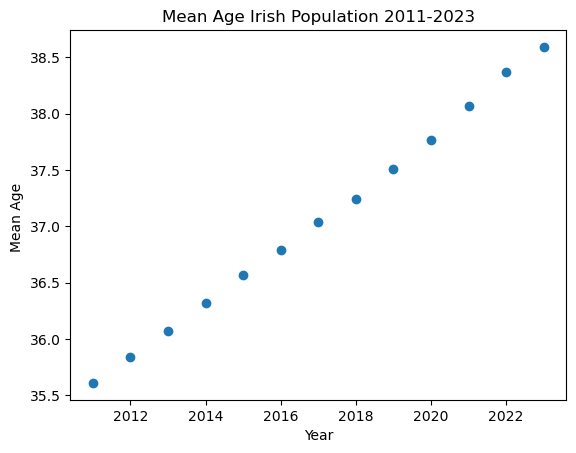

In [52]:
plt.scatter(popc_mean_age["Year"], popc_mean_age["Mean_Age"])
plt.xlabel("Year")
plt.ylabel("Mean Age ")

plt.title("Mean Age Irish Population 2011-2023")
plt.show()

# End
***(Population Mean Age 2011-2023)***

# Plotting

## Seaborn Plotting

In [53]:
# Categorical 
pop_r_cat=pop_r.select_dtypes(include=['object']).columns
# Numerical
pop_r_num = pop_r.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(pop_r_cat)
print("Numerical Variables:")
print(pop_r_num)

Categorical Variables:
Index(['STATISTIC Label', 'Age Group', 'Sex', 'Region', 'UNIT'], dtype='object')
Numerical Variables:
['Year', 'VALUE']


Year
Skew : 0.0


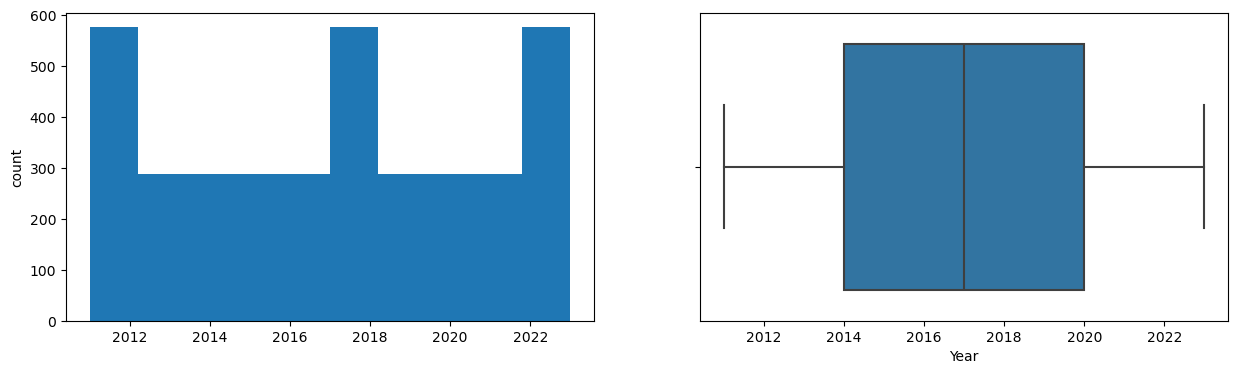

VALUE
Skew : 1.77


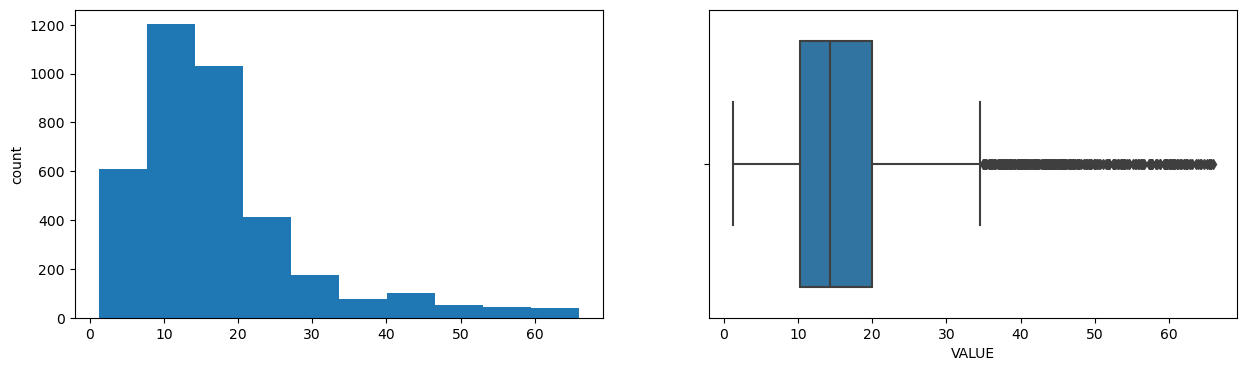

In [54]:
for col in pop_r_num:
    print(col)
    print('Skew :', round(pop_r[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    pop_r[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=pop_r[col])
    plt.show()

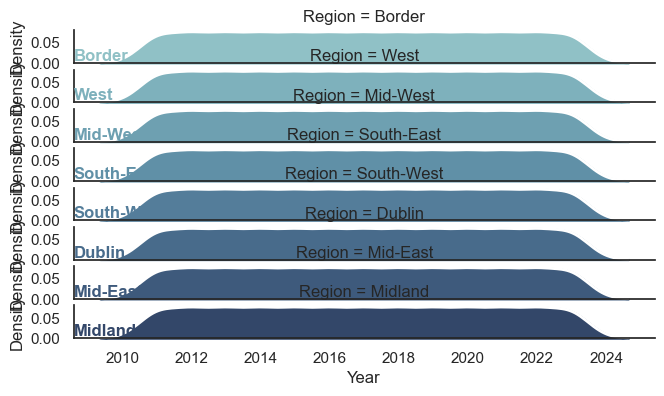

In [55]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(pop_r, row="Region", hue="Region", aspect=15, height=.5, palette=pal)

g.map(sns.kdeplot, "Year",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Year", clip_on=False, color="w", lw=2, bw_adjust=.5)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "Year")


In [56]:
popc_r["Region"]=="Border"

10       True
11      False
12      False
13      False
14      False
        ...  
6637    False
6638    False
6639    False
6640    False
6641    False
Name: Region, Length: 3744, dtype: bool

In [57]:

popc_r_border = popc_r.loc[popc_r["Region"]=="Border",]
popc_r_border

STATISTIC Label  Year          Age Group  \
10    Estimated Population (Persons in April)  2011        0 - 4 years   
19    Estimated Population (Persons in April)  2011        0 - 4 years   
37    Estimated Population (Persons in April)  2011        5 - 9 years   
46    Estimated Population (Persons in April)  2011        5 - 9 years   
64    Estimated Population (Persons in April)  2011      10 - 14 years   
...                                       ...   ...                ...   
6580  Estimated Population (Persons in April)  2023      75 - 79 years   
6598  Estimated Population (Persons in April)  2023      80 - 84 years   
6607  Estimated Population (Persons in April)  2023      80 - 84 years   
6625  Estimated Population (Persons in April)  2023  85 years and over   
6634  Estimated Population (Persons in April)  2023  85 years and over   

         Sex  Region      UNIT  VALUE  sex_id  age_id  region_id  
10      Male  Border  Thousand   15.8       1       1          2  
19    Female  Border  Thousand   15.0       2       1          2  
37      Male  Border  Thousand   14.7       1       2          2  
46    Female  Border  Thousand   13.7       2       2          2  
64      Male  Border  Thousand   14.5       1       3          2  
...      ...     ...       ...    ...     ...     ...        ...  
6580  Female  Border  Thousand    7.7       2      16          2  
6598    Male  Border  Thousand    4.5       1      17          2  
6607  Female  Border  Thousand    4.8       2      17          2  
6625    Male  Border  Thousand    3.1       1      18          2  
6634  Female  Border  Thousand    4.9       2      18          2  

[468 rows x 10 columns]

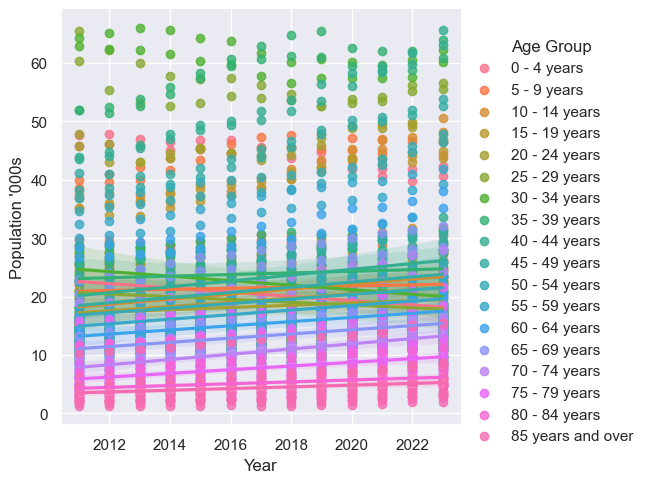

In [58]:
sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=popc_r,
    x="Year", y="VALUE",hue="Age Group",
    height=5)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year", "Population '000s")

In [59]:
popc_r_border

STATISTIC Label  Year          Age Group  \
10    Estimated Population (Persons in April)  2011        0 - 4 years   
19    Estimated Population (Persons in April)  2011        0 - 4 years   
37    Estimated Population (Persons in April)  2011        5 - 9 years   
46    Estimated Population (Persons in April)  2011        5 - 9 years   
64    Estimated Population (Persons in April)  2011      10 - 14 years   
...                                       ...   ...                ...   
6580  Estimated Population (Persons in April)  2023      75 - 79 years   
6598  Estimated Population (Persons in April)  2023      80 - 84 years   
6607  Estimated Population (Persons in April)  2023      80 - 84 years   
6625  Estimated Population (Persons in April)  2023  85 years and over   
6634  Estimated Population (Persons in April)  2023  85 years and over   

         Sex  Region      UNIT  VALUE  sex_id  age_id  region_id  
10      Male  Border  Thousand   15.8       1       1          2  
19    Female  Border  Thousand   15.0       2       1          2  
37      Male  Border  Thousand   14.7       1       2          2  
46    Female  Border  Thousand   13.7       2       2          2  
64      Male  Border  Thousand   14.5       1       3          2  
...      ...     ...       ...    ...     ...     ...        ...  
6580  Female  Border  Thousand    7.7       2      16          2  
6598    Male  Border  Thousand    4.5       1      17          2  
6607  Female  Border  Thousand    4.8       2      17          2  
6625    Male  Border  Thousand    3.1       1      18          2  
6634  Female  Border  Thousand    4.9       2      18          2  

[468 rows x 10 columns]

In [60]:
popc_r_mf_year = pd.merge(popc_r_m_year,popc_r_f_year, on="Year")
popc_r_mf_year

Year    Male  Female
0   2011  2270.4  2304.5
1   2012  2275.1  2318.8
2   2013  2286.3  2328.7
3   2014  2298.5  2346.7
4   2015  2317.9  2370.3
5   2016  2346.2  2393.5
6   2017  2381.1  2430.3
7   2018  2419.4  2465.5
8   2019  2456.7  2501.5
9   2020  2492.2  2537.9
10  2021  2514.1  2560.7
11  2022  2561.7  2622.0
12  2023  2605.9  2675.6

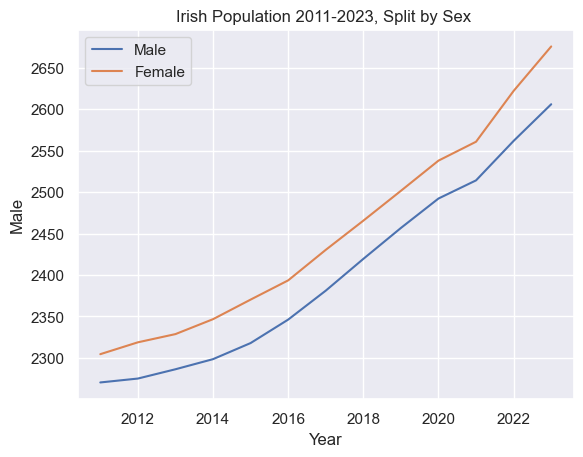

In [61]:
# Total population over time, by Male, Female and Both sexes
import matplotlib.pyplot as plt
sns.lineplot(
    data=popc_r_mf_year,
    x="Year",
    y ="Male",
    label = "Male")

sns.lineplot(
    data=popc_r_mf_year,
    x="Year",
    y ="Female",
    label ="Female")
plt.title("Irish Population 2011-2023, Split by Sex ")
plt.legend()


--- Total population over time, by Male, Female and Both sexes

***Plot Motives:***
To review the change in population over time split by Male / Female

***Design:***
A line plot clearly shows the change of numerical data over time. As per Tufte's principles and general guidance (2018), a focus is maintained on the data-ink ratio and reducing all unnecessary "noise" from the plot. This also allows the reader to ficus solely on the data, and not on the design. Contrasting Colours are used for Male and Female, but they are complimentary so as not to create strain for the reader while they review the data.

***Interpretation:***
There is a steady increase in population across the State for both Male and Female over the 12 year period. Female maintains a higher population by approx 50 (50,000 actual population) throughout the time period. There is a small blip in the steady increase for both sexes in 2021. One reason for this may be an increase in death rate as a results of the Covid-19 Pandemic, but more in-depth investigation analysis would be required to confirm this, or find the correct cause.


In [62]:
popc_r_m_year

Year    Male
0   2011  2270.4
1   2012  2275.1
2   2013  2286.3
3   2014  2298.5
4   2015  2317.9
5   2016  2346.2
6   2017  2381.1
7   2018  2419.4
8   2019  2456.7
9   2020  2492.2
10  2021  2514.1
11  2022  2561.7
12  2023  2605.9

[Text(0.5, 1.0, 'Irish Population Over time 2011-2023'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, "Population 000's")]

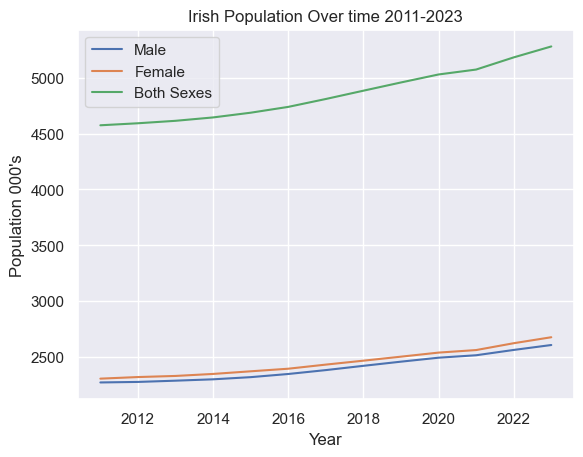

In [63]:
# Total population over time, by Male, Female and Both sexes
import matplotlib.pyplot as plt
sns.lineplot(
    data=popc_r_m_year,
    x="Year",
    y ="Male",
    label = "Male")

sns.lineplot(
    data=popc_r_f_year,
    x="Year",
    y ="Female",
    label="Female")

popc_sb_year = popc_sb.groupby(["Year"])[["VALUE"]].sum()
sns.lineplot(
    data=popc_sb_year,
    x="Year",
    y ="VALUE",
    label = "Both Sexes").set(
    title="Irish Population Over time 2011-2023",
    xlabel="Year", 
    ylabel="Population 000's")



***Plot Motives:***
To review the change in population over time for the state, and split by Male / Female

***Design:***
As with the above plot, the theme and colours used are clear and simple. An new colour is introduced for the stat population; again it is a contrasting yet complimentary colour. Colours representing Male and Females are kept consistent to maintain reader processing time at a minimal amount.

***Interpretation:***
As expected, this plot also shows a steady increase in state population from 2011-2023. The over all increase is approximately 700.(700,000 actual population)



In [64]:
popc_sb_year


VALUE
Year        
2011  4575.1
2012  4593.2
2013  4615.2
2014  4645.5
2015  4687.8
2016  4740.0
2017  4810.7
2018  4885.1
2019  4958.9
2020  5030.5
2021  5074.6
2022  5183.6
2023  5281.6

In [65]:
popc_r

STATISTIC Label  Year          Age Group  \
10    Estimated Population (Persons in April)  2011        0 - 4 years   
11    Estimated Population (Persons in April)  2011        0 - 4 years   
12    Estimated Population (Persons in April)  2011        0 - 4 years   
13    Estimated Population (Persons in April)  2011        0 - 4 years   
14    Estimated Population (Persons in April)  2011        0 - 4 years   
...                                       ...   ...                ...   
6637  Estimated Population (Persons in April)  2023  85 years and over   
6638  Estimated Population (Persons in April)  2023  85 years and over   
6639  Estimated Population (Persons in April)  2023  85 years and over   
6640  Estimated Population (Persons in April)  2023  85 years and over   
6641  Estimated Population (Persons in April)  2023  85 years and over   

         Sex      Region      UNIT  VALUE  sex_id  age_id  region_id  
10      Male      Border  Thousand   15.8       1       1          2  
11      Male        West  Thousand   16.6       1       1          3  
12      Male    Mid-West  Thousand   18.0       1       1          4  
13      Male  South-East  Thousand   16.4       1       1          5  
14      Male  South-West  Thousand   25.5       1       1          6  
...      ...         ...       ...    ...     ...     ...        ...  
6637  Female  South-East  Thousand    5.0       2      18          5  
6638  Female  South-West  Thousand    8.1       2      18          6  
6639  Female      Dublin  Thousand   15.5       2      18          7  
6640  Female    Mid-East  Thousand    6.0       2      18          8  
6641  Female     Midland  Thousand    3.0       2      18          9  

[3744 rows x 10 columns]

In [66]:
popc_r_m_year

Year    Male
0   2011  2270.4
1   2012  2275.1
2   2013  2286.3
3   2014  2298.5
4   2015  2317.9
5   2016  2346.2
6   2017  2381.1
7   2018  2419.4
8   2019  2456.7
9   2020  2492.2
10  2021  2514.1
11  2022  2561.7
12  2023  2605.9

In [67]:
# .set_index["Year"].
popc_r.loc[popc_r["Sex"]=="Male"].set_index("Year")

STATISTIC Label          Age Group   Sex  \
Year                                                                     
2011  Estimated Population (Persons in April)        0 - 4 years  Male   
2011  Estimated Population (Persons in April)        0 - 4 years  Male   
2011  Estimated Population (Persons in April)        0 - 4 years  Male   
2011  Estimated Population (Persons in April)        0 - 4 years  Male   
2011  Estimated Population (Persons in April)        0 - 4 years  Male   
...                                       ...                ...   ...   
2023  Estimated Population (Persons in April)  85 years and over  Male   
2023  Estimated Population (Persons in April)  85 years and over  Male   
2023  Estimated Population (Persons in April)  85 years and over  Male   
2023  Estimated Population (Persons in April)  85 years and over  Male   
2023  Estimated Population (Persons in April)  85 years and over  Male   

          Region      UNIT  VALUE  sex_id  age_id  region_id  
Year                                                          
2011      Border  Thousand   15.8       1       1          2  
2011        West  Thousand   16.6       1       1          3  
2011    Mid-West  Thousand   18.0       1       1          4  
2011  South-East  Thousand   16.4       1       1          5  
2011  South-West  Thousand   25.5       1       1          6  
...          ...       ...    ...     ...     ...        ...  
2023  South-East  Thousand    3.2       1      18          5  
2023  South-West  Thousand    5.3       1      18          6  
2023      Dublin  Thousand    8.6       1      18          7  
2023    Mid-East  Thousand    3.8       1      18          8  
2023     Midland  Thousand    2.0       1      18          9  

[1872 rows x 9 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


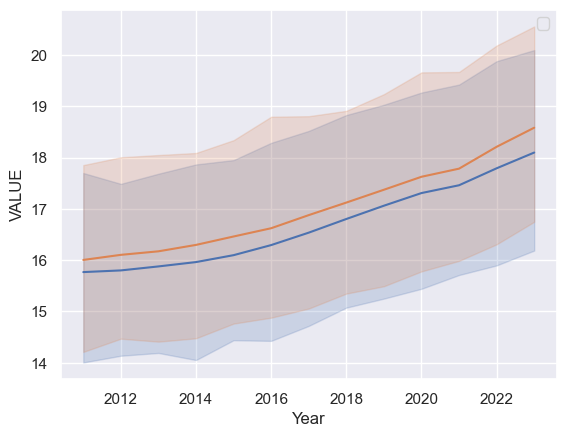

In [68]:
sns.lineplot(
    data=popc_r.loc[popc_r["Sex"]=="Male"].set_index("Year"),
    x="Year",
    y ="VALUE")

sns.lineplot(
    data=popc_r.loc[popc_r["Sex"]=="Female"].set_index("Year"),
    x="Year",
    y="VALUE")
plt.legend()
plt.show()

In [69]:
pop

STATISTIC Label  Year    Age Group         Sex  \
0     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
1     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
2     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
3     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
4     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
...                                       ...   ...          ...         ...   
6664  Estimated Population (Persons in April)  2023     All ages      Female   
6665  Estimated Population (Persons in April)  2023     All ages      Female   
6666  Estimated Population (Persons in April)  2023     All ages      Female   
6667  Estimated Population (Persons in April)  2023     All ages      Female   
6668  Estimated Population (Persons in April)  2023     All ages      Female   

          Region      UNIT  VALUE  sex_id  age_id  region_id  
0          State  Thousand  356.0       3       1          1  
1         Border  Thousand   30.7       3       1          2  
2           West  Thousand   32.6       3       1          3  
3       Mid-West  Thousand   35.0       3       1          4  
4     South-East  Thousand   32.0       3       1          5  
...          ...       ...    ...     ...     ...        ...  
6664  South-East  Thousand  237.5       2      19          5  
6665  South-West  Thousand  383.8       2      19          6  
6666      Dublin  Thousand  765.6       2      19          7  
6667    Mid-East  Thousand  391.3       2      19          8  
6668     Midland  Thousand  163.2       2      19          9  

[6669 rows x 10 columns]

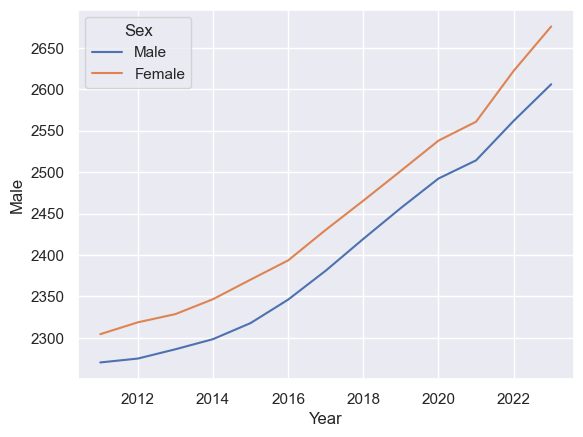

In [70]:
sns.lineplot(
    data=popc_r_m_year,
    x="Year",
    y ="Male",
    label="Male")

sns.lineplot(
    data=popc_r_f_year,
    x="Year",
    y="Female",
    label="Female")
plt.legend(title="Sex")
plt.show()

In [71]:
# popc_r_piv_rg_yr
#filter popc_r by columns that will be pivoted
popc_r_piv_rg_yr = popc_r.filter(["Year","Region","VALUE"])
popc_r_piv_rg_yr

#pivot new df
popc_r_piv_rg_yr = popc_r_piv_rg_yr.pivot_table(
    index="Year", 
    columns="Region", 
    values="VALUE",
    aggfunc="sum")
popc_r_piv_rg_yr

Region  Border  Dublin  Mid-East  Mid-West  Midland  South-East  South-West  \
Year                                                                          
2011     392.1  1261.9     657.4     466.5    284.0       409.8       662.4   
2012     392.2  1260.6     664.8     470.7    287.3       411.5       667.3   
2013     393.4  1266.1     666.5     470.5    289.4       413.8       673.6   
2014     391.7  1286.5     671.6     471.6    289.8       413.2       679.7   
2015     392.1  1315.3     679.5     473.4    291.1       415.6       679.0   
2016     393.3  1335.6     690.8     472.7    293.5       421.0       685.0   
2017     400.5  1351.7     706.0     480.3    299.1       426.4       694.2   
2018     405.8  1373.3     719.0     489.1    304.6       431.2       703.0   
2019     409.7  1398.9     731.9     493.4    309.0       440.1       710.6   
2020     412.0  1422.2     747.6     498.2    309.7       445.0       723.0   
2021     417.1  1434.8     755.2     499.7    314.2       451.0       727.3   
2022     421.8  1468.6     774.0     508.9    320.3       460.8       742.8   
2023     432.0  1501.3     777.2     519.5    324.7       468.6       757.2   

Region   West  
Year           
2011    440.8  
2012    439.5  
2013    441.7  
2014    441.1  
2015    442.2  
2016    447.8  
2017    453.2  
2018    458.9  
2019    464.6  
2020    472.4  
2021    475.5  
2022    486.5  
2023    501.0

In [72]:
popc_r_piv_rg_yr.describe()

Region      Border       Dublin    Mid-East    Mid-West     Midland  \
count    13.000000    13.000000   13.000000   13.000000   13.000000   
mean    404.130769  1359.753846  710.884615  485.730769  301.284615   
std      13.493232    81.290945   42.924912   17.021329   13.399555   
min     391.700000  1260.600000  657.400000  466.500000  284.000000   
25%     392.200000  1286.500000  671.600000  471.600000  289.800000   
50%     400.500000  1351.700000  706.000000  480.300000  299.100000   
75%     412.000000  1422.200000  747.600000  498.200000  309.700000   
max     432.000000  1501.300000  777.200000  519.500000  324.700000   

Region  South-East  South-West        West  
count    13.000000   13.000000   13.000000  
mean    431.384615  700.392308  458.861538  
std      19.957073   29.984815   19.949291  
min     409.800000  662.400000  439.500000  
25%     413.800000  679.000000  441.700000  
50%     426.400000  694.200000  453.200000  
75%     445.000000  723.000000  472.400000  
max     468.600000  757.200000  501.000000

In [73]:
# popc_r_piv_rg_yr_sm
# popc_r_piv_rg_yr_sf

# filter popc_r to show Male separately
#popc_sum = popc.loc[popc["Age Group"] == "All ages",]
# Male
popc_r_piv_rg_yr_sm = popc_r.loc[popc_r["Sex"]=="Male",]


# pivot popc_r_piv_rg_yr_sm
popc_r_piv_rg_yr_sm = popc_r_piv_rg_yr_sm.pivot_table(
    index="Year", 
    columns="Region", 
    values="VALUE",
    aggfunc="sum")
popc_r_piv_rg_yr_sm

Region  Border  Dublin  Mid-East  Mid-West  Midland  South-East  South-West  \
Year                                                                          
2011     197.1   615.5     327.3     233.5    142.5       204.4       329.6   
2012     197.6   612.1     330.3     235.8    143.5       205.1       331.7   
2013     197.5   616.3     330.7     235.5    144.5       206.4       335.1   
2014     195.8   627.6     332.3     234.6    144.1       205.7       337.9   
2015     195.5   642.5     336.2     235.1    145.4       206.7       335.6   
2016     196.3   652.8     342.4     235.8    146.9       209.1       339.6   
2017     199.4   659.8     350.1     239.3    150.6       211.7       344.4   
2018     201.9   671.1     356.7     244.3    153.8       214.2       349.2   
2019     203.4   683.5     363.9     246.8    156.4       219.6       353.2   
2020     205.6   695.2     372.2     249.4    156.1       221.2       359.1   
2021     208.2   703.5     375.2     249.5    157.6       223.5       360.4   
2022     210.0   718.8     383.5     252.6    160.0       228.0       367.6   
2023     214.9   735.6     385.8     255.7    161.5       231.0       373.4   

Region   West  
Year           
2011    220.5  
2012    219.0  
2013    220.3  
2014    220.5  
2015    220.9  
2016    223.3  
2017    225.8  
2018    228.2  
2019    229.9  
2020    233.4  
2021    236.2  
2022    241.2  
2023    248.0

In [74]:

# filter popc_r to show Female separately
DF = "popc_r_piv_rg_yr_sf"
Description = "popc_r: Sex==Female"

df_index_table.loc[len(df_index_table)] = [DF, Description]

#Female
popc_r_piv_rg_yr_sf = popc_r.loc[popc_r["Sex"]=="Female",]
popc_r_piv_rg_yr_sf

# pivot popc_r_piv_rg_yr_sf
popc_r_piv_rg_yr_sf = popc_r_piv_rg_yr_sf.pivot_table(
    index="Year", 
    columns="Region", 
    values="VALUE",
    aggfunc="sum")
popc_r_piv_rg_yr_sf

Region  Border  Dublin  Mid-East  Mid-West  Midland  South-East  South-West  \
Year                                                                          
2011     195.0   646.4     330.1     233.0    141.5       205.4       332.8   
2012     194.6   648.5     334.5     234.9    143.8       206.4       335.6   
2013     195.9   649.8     335.8     235.0    144.9       207.4       338.5   
2014     195.9   658.9     339.3     237.0    145.7       207.5       341.8   
2015     196.6   672.8     343.3     238.3    145.7       208.9       343.4   
2016     197.0   682.8     348.4     236.9    146.6       211.9       345.4   
2017     201.1   691.9     355.9     241.0    148.5       214.7       349.8   
2018     203.9   702.2     362.3     244.8    150.8       217.0       353.8   
2019     206.3   715.4     368.0     246.6    152.6       220.5       357.4   
2020     206.4   727.0     375.4     248.8    153.6       223.8       363.9   
2021     208.9   731.3     380.0     250.2    156.6       227.5       366.9   
2022     211.8   749.8     390.5     256.3    160.3       232.8       375.2   
2023     217.1   765.7     391.4     263.8    163.2       237.6       383.8   

Region   West  
Year           
2011    220.3  
2012    220.5  
2013    221.4  
2014    220.6  
2015    221.3  
2016    224.5  
2017    227.4  
2018    230.7  
2019    234.7  
2020    239.0  
2021    239.3  
2022    245.3  
2023    253.0

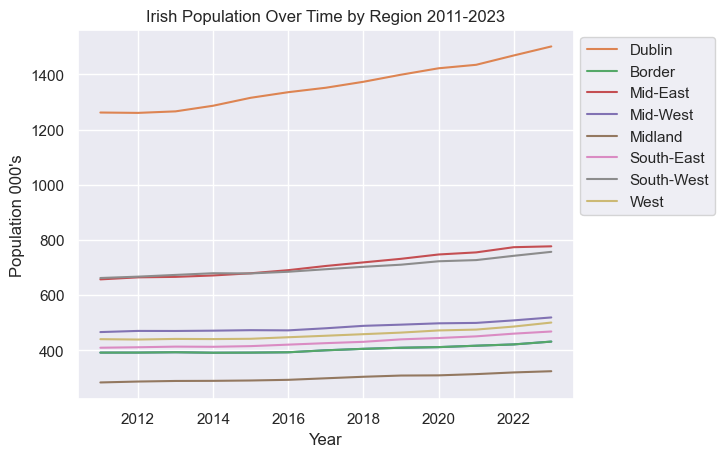

In [75]:
# Total population over time, by Male, Female and Both sexes
import matplotlib.pyplot as plt
sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="Border").set(
    title="Irish Population Over Time by Region 2011-2023",
    xlabel="Year", 
    ylabel="Population 000's")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="Dublin",
    label ="Dublin")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="Border",
    label ="Border")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="Mid-East",
    label ="Mid-East")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="Mid-West",
    label ="Mid-West")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="Midland",
    label ="Midland")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="South-East",
    label ="South-East")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="South-West",
    label ="South-West")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="West",
    label ="West")

plt.legend(bbox_to_anchor=(1.3, 1),loc="upper right")


***Plot Motives:***
To show the change in population across the Regions in Ireland over 2011-2023

***Design:***
A Lineplot is a simple an effective way of comparing multiple numerical values across a time period. This plot is skewed by the largest of the Regions,Dublin. This region will be removed and plotted separately so the other can be compared in a meaningful way

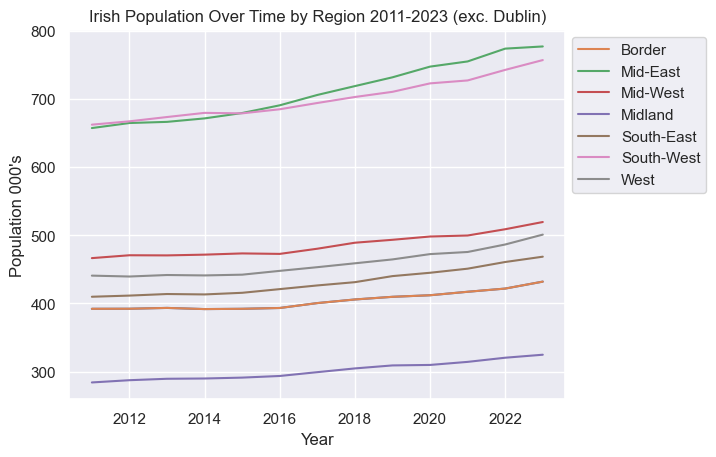

In [76]:
# Total population over time, by Male, Female and Both sexes
import matplotlib.pyplot as plt
sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="Border").set(
    title="Irish Population Over Time by Region 2011-2023 (exc. Dublin)",
    xlabel="Year", 
    ylabel="Population 000's")

# sns.lineplot(
#     data=popc_r_piv_rg_yr,
#     x="Year",
#     y ="Dublin",
#     label ="Dublin")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="Border",
    label ="Border")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="Mid-East",
    label ="Mid-East")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="Mid-West",
    label ="Mid-West")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="Midland",
    label ="Midland")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="South-East",
    label ="South-East")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="South-West",
    label ="South-West")

sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="West",
    label ="West")

plt.legend(bbox_to_anchor=(1.3, 1),loc="upper right")


***Plot Motives:***
As above

***Updated Design:***
the reduced axis on this plot means it is much easier to review and compare the changes in population for each region individually, and to compare regions.

***Interpretation:***
All regions show and increase in populations at a steady rate. This was to be expected considering the general increase across the state.



In [77]:
popc_r_piv_rg_yr

Region  Border  Dublin  Mid-East  Mid-West  Midland  South-East  South-West  \
Year                                                                          
2011     392.1  1261.9     657.4     466.5    284.0       409.8       662.4   
2012     392.2  1260.6     664.8     470.7    287.3       411.5       667.3   
2013     393.4  1266.1     666.5     470.5    289.4       413.8       673.6   
2014     391.7  1286.5     671.6     471.6    289.8       413.2       679.7   
2015     392.1  1315.3     679.5     473.4    291.1       415.6       679.0   
2016     393.3  1335.6     690.8     472.7    293.5       421.0       685.0   
2017     400.5  1351.7     706.0     480.3    299.1       426.4       694.2   
2018     405.8  1373.3     719.0     489.1    304.6       431.2       703.0   
2019     409.7  1398.9     731.9     493.4    309.0       440.1       710.6   
2020     412.0  1422.2     747.6     498.2    309.7       445.0       723.0   
2021     417.1  1434.8     755.2     499.7    314.2       451.0       727.3   
2022     421.8  1468.6     774.0     508.9    320.3       460.8       742.8   
2023     432.0  1501.3     777.2     519.5    324.7       468.6       757.2   

Region   West  
Year           
2011    440.8  
2012    439.5  
2013    441.7  
2014    441.1  
2015    442.2  
2016    447.8  
2017    453.2  
2018    458.9  
2019    464.6  
2020    472.4  
2021    475.5  
2022    486.5  
2023    501.0

[Text(0.5, 1.0, 'Dublin Population Over time 2011-2023'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, "Population 000's")]

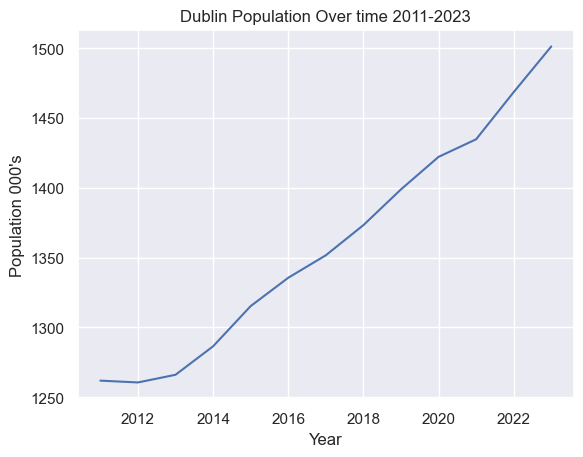

In [78]:
#sns.lineplot(data = popc_r_piv_rg_yr["Dublin"])
#sames plot (with labels added)
sns.lineplot(
    data=popc_r_piv_rg_yr,
    x="Year",
    y ="Dublin").set(
    title="Dublin Population Over time 2011-2023",
    xlabel="Year", 
    ylabel="Population 000's")



The lineplot of Population in Dublin 2011-2023 shows an increase over the time period, as with the other regions.
Th Dublin and Other REgions plot should be use for comparison as they have different axes. The reader is likely to interpret that Dublin has had an accelerated increase compared with Other Regions over the same time period, when they have all experienced approx 10-15% increase

In [79]:
popc_r_piv_rg_yr_sf

Region  Border  Dublin  Mid-East  Mid-West  Midland  South-East  South-West  \
Year                                                                          
2011     195.0   646.4     330.1     233.0    141.5       205.4       332.8   
2012     194.6   648.5     334.5     234.9    143.8       206.4       335.6   
2013     195.9   649.8     335.8     235.0    144.9       207.4       338.5   
2014     195.9   658.9     339.3     237.0    145.7       207.5       341.8   
2015     196.6   672.8     343.3     238.3    145.7       208.9       343.4   
2016     197.0   682.8     348.4     236.9    146.6       211.9       345.4   
2017     201.1   691.9     355.9     241.0    148.5       214.7       349.8   
2018     203.9   702.2     362.3     244.8    150.8       217.0       353.8   
2019     206.3   715.4     368.0     246.6    152.6       220.5       357.4   
2020     206.4   727.0     375.4     248.8    153.6       223.8       363.9   
2021     208.9   731.3     380.0     250.2    156.6       227.5       366.9   
2022     211.8   749.8     390.5     256.3    160.3       232.8       375.2   
2023     217.1   765.7     391.4     263.8    163.2       237.6       383.8   

Region   West  
Year           
2011    220.3  
2012    220.5  
2013    221.4  
2014    220.6  
2015    221.3  
2016    224.5  
2017    227.4  
2018    230.7  
2019    234.7  
2020    239.0  
2021    239.3  
2022    245.3  
2023    253.0

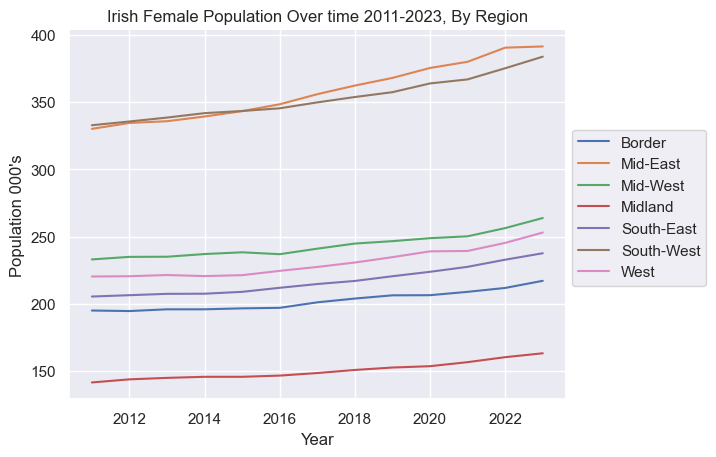

In [80]:
sns.lineplot(
    data=popc_r_piv_rg_yr_sf,
    x="Year",
    y ="Border",
    label = "Border").set(
    title="Irish Female Population Over time 2011-2023, By Region",
    xlabel="Year", 
    ylabel="Population 000's")

# sns.lineplot(
#     data=popc_r_piv_rg_yr_sf,
#     x="Year",
#     y ="Dublin")


sns.lineplot(
    data=popc_r_piv_rg_yr_sf,
    x="Year",
    y ="Mid-East",
    label ="Mid-East")

sns.lineplot(
    data=popc_r_piv_rg_yr_sf,
    x="Year",
    y ="Mid-West",
    label ="Mid-West")

sns.lineplot(
    data=popc_r_piv_rg_yr_sf,
    x="Year",
    y ="Midland",
    label ="Midland")

sns.lineplot(
    data=popc_r_piv_rg_yr_sf,
    x="Year",
    y ="South-East",
    label ="South-East")

sns.lineplot(
    data=popc_r_piv_rg_yr_sf,
    x="Year",
    y ="South-West",
    label ="South-West")

sns.lineplot(
    data=popc_r_piv_rg_yr_sf,
    x="Year",
    y ="West",
    label ="West")


# Add Legend
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(loc='best', bbox_to_anchor=(0.8, 0.25, 0.5, 0.5))
 
# Add a grid
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
plt.grid("image")
 
# Remove the top and right spines
sns.despine()

plt.show()


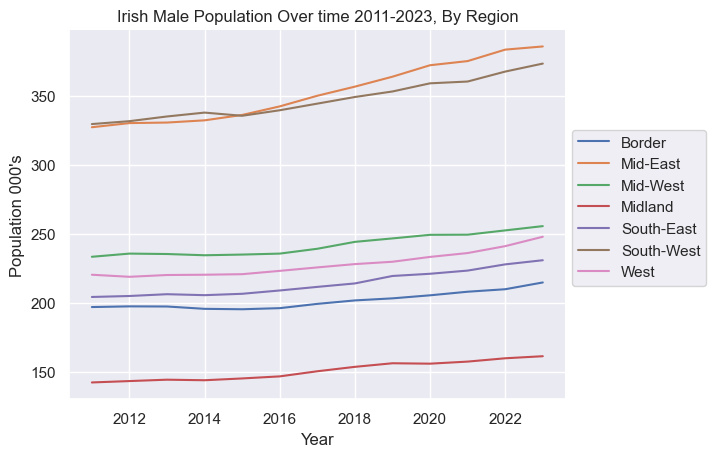

In [81]:
sns.lineplot(
    data=popc_r_piv_rg_yr_sm,
    x="Year",
    y ="Border",
    label = "Border").set(
    title="Irish Male Population Over time 2011-2023, By Region",
    xlabel="Year", 
    ylabel="Population 000's")

# sns.lineplot(
#     data=popc_r_piv_rg_yr_sm,
#     x="Year",
#     y ="Dublin",
#     label = "Dublin")


sns.lineplot(
    data=popc_r_piv_rg_yr_sm,
    x="Year",
    y ="Mid-East",
    label = "Mid-East")

sns.lineplot(
    data=popc_r_piv_rg_yr_sm,
    x="Year",
    y ="Mid-West",
    label = "Mid-West")

sns.lineplot(
    data=popc_r_piv_rg_yr_sm,
    x="Year",
    y ="Midland",
    label = "Midland")

sns.lineplot(
    data=popc_r_piv_rg_yr_sm,
    x="Year",
    y ="South-East",
    label = "South-East")

sns.lineplot(
    data=popc_r_piv_rg_yr_sm,
    x="Year",
    y ="South-West",
    label = "South-West")

sns.lineplot(
    data=popc_r_piv_rg_yr_sm,
    x="Year",
    y ="West",
    label = "West")

# Add Legend
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(loc='best', bbox_to_anchor=(0.8, 0.25, 0.5, 0.5))
 
# Add a grid
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
plt.grid("image")
 
# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


#autoscale(enable=True, axis='both', tight=None)


## END

***(Seaborn Plotting)***

## Population

In [82]:
popc_r_piv_rg_yr_sm

Region  Border  Dublin  Mid-East  Mid-West  Midland  South-East  South-West  \
Year                                                                          
2011     197.1   615.5     327.3     233.5    142.5       204.4       329.6   
2012     197.6   612.1     330.3     235.8    143.5       205.1       331.7   
2013     197.5   616.3     330.7     235.5    144.5       206.4       335.1   
2014     195.8   627.6     332.3     234.6    144.1       205.7       337.9   
2015     195.5   642.5     336.2     235.1    145.4       206.7       335.6   
2016     196.3   652.8     342.4     235.8    146.9       209.1       339.6   
2017     199.4   659.8     350.1     239.3    150.6       211.7       344.4   
2018     201.9   671.1     356.7     244.3    153.8       214.2       349.2   
2019     203.4   683.5     363.9     246.8    156.4       219.6       353.2   
2020     205.6   695.2     372.2     249.4    156.1       221.2       359.1   
2021     208.2   703.5     375.2     249.5    157.6       223.5       360.4   
2022     210.0   718.8     383.5     252.6    160.0       228.0       367.6   
2023     214.9   735.6     385.8     255.7    161.5       231.0       373.4   

Region   West  
Year           
2011    220.5  
2012    219.0  
2013    220.3  
2014    220.5  
2015    220.9  
2016    223.3  
2017    225.8  
2018    228.2  
2019    229.9  
2020    233.4  
2021    236.2  
2022    241.2  
2023    248.0

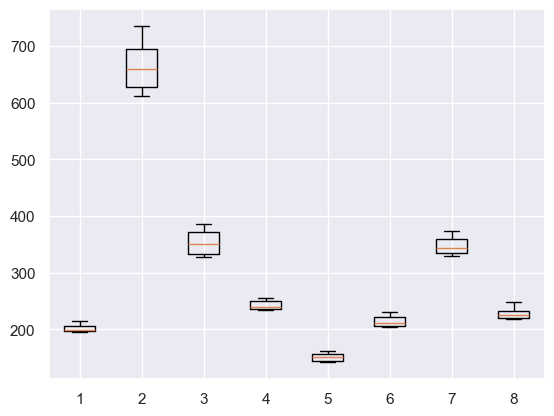

In [83]:
plt.boxplot(popc_r_piv_rg_yr_sm,data=popc_r_piv_rg_yr_sm)
plt.show()

## Male vs Female



In [84]:

# Extract only "All Ages" Age Group
popc_aa_rs = popc.loc[popc["Age Group"] == "All ages",]
# Extract only "State" Region Group
popc_aa_rs = popc_aa_rs.loc[popc_aa_rs["Region"] == "State",]
# Remove "both sexes" Sex Group
popc_aa_rs = popc_aa_rs.loc[popc_aa_rs["Sex"] != "Both sexes",]
popc_aa_rs.head(10)



STATISTIC Label  Year Age Group     Sex Region  \
495   Estimated Population (Persons in April)  2011  All ages    Male  State   
504   Estimated Population (Persons in April)  2011  All ages  Female  State   
1008  Estimated Population (Persons in April)  2012  All ages    Male  State   
1017  Estimated Population (Persons in April)  2012  All ages  Female  State   
1521  Estimated Population (Persons in April)  2013  All ages    Male  State   
1530  Estimated Population (Persons in April)  2013  All ages  Female  State   
2034  Estimated Population (Persons in April)  2014  All ages    Male  State   
2043  Estimated Population (Persons in April)  2014  All ages  Female  State   
2547  Estimated Population (Persons in April)  2015  All ages    Male  State   
2556  Estimated Population (Persons in April)  2015  All ages  Female  State   

          UNIT   VALUE  sex_id  age_id  region_id  
495   Thousand  2270.5       1      19          1  
504   Thousand  2304.4       2      19          1  
1008  Thousand  2275.0       1      19          1  
1017  Thousand  2318.7       2      19          1  
1521  Thousand  2286.1       1      19          1  
1530  Thousand  2328.5       2      19          1  
2034  Thousand  2299.0       1      19          1  
2043  Thousand  2346.4       2      19          1  
2547  Thousand  2317.7       1      19          1  
2556  Thousand  2370.1       2      19          1

In [85]:
# Rearrange DF to facilitate Pie Chart creation

popc_aa_rs_f = popc_aa_rs.loc[popc_aa_rs["Sex"] == "Female",]
popc_aa_rs_f
popc_aa_rs_f_melt = popc_aa_rs_f.melt(id_vars=["Year"],value_vars=["VALUE"],
                                     value_name="Female VALUE"
                                     )
popc_aa_rs_f_melt

Year variable  Female VALUE
0   2011    VALUE        2304.4
1   2012    VALUE        2318.7
2   2013    VALUE        2328.5
3   2014    VALUE        2346.4
4   2015    VALUE        2370.1
5   2016    VALUE        2393.1
6   2017    VALUE        2430.1
7   2018    VALUE        2465.4
8   2019    VALUE        2502.2
9   2020    VALUE        2538.1
10  2021    VALUE        2560.6
11  2022    VALUE        2622.0
12  2023    VALUE        2675.4

In [86]:
popc_aa_rs_m = popc_aa_rs.loc[popc_aa_rs["Sex"] == "Male",]
popc_aa_rs_m
popc_aa_rs_m_melt = popc_aa_rs_m.melt(id_vars=["Year"],value_vars=["VALUE"],
                                     value_name="Male VALUE"
                                     )
popc_aa_rs_m_melt

Year variable  Male VALUE
0   2011    VALUE      2270.5
1   2012    VALUE      2275.0
2   2013    VALUE      2286.1
3   2014    VALUE      2299.0
4   2015    VALUE      2317.7
5   2016    VALUE      2346.5
6   2017    VALUE      2380.8
7   2018    VALUE      2419.5
8   2019    VALUE      2456.3
9   2020    VALUE      2491.8
10  2021    VALUE      2514.0
11  2022    VALUE      2562.0
12  2023    VALUE      2606.2

In [87]:
popc_aa_rs_melt = popc_aa_rs_f_melt.merge(popc_aa_rs_m_melt,left_on="Year",right_on="Year")
popc_aa_rs_melt = popc_aa_rs_melt.drop(["variable_x","variable_y"],axis=1)
popc_aa_rs_melt

Year  Female VALUE  Male VALUE
0   2011        2304.4      2270.5
1   2012        2318.7      2275.0
2   2013        2328.5      2286.1
3   2014        2346.4      2299.0
4   2015        2370.1      2317.7
5   2016        2393.1      2346.5
6   2017        2430.1      2380.8
7   2018        2465.4      2419.5
8   2019        2502.2      2456.3
9   2020        2538.1      2491.8
10  2021        2560.6      2514.0
11  2022        2622.0      2562.0
12  2023        2675.4      2606.2

In [88]:
# Pie chart
# State population over time

popc_aa_rs_melt_2011 = popc_aa_rs_melt.loc[popc_aa_rs_melt["Year"] == 2011,]
popc_aa_rs_melt_2011

Year  Female VALUE  Male VALUE
0  2011        2304.4      2270.5

In [89]:
popc_aa_rs_drp = popc_aa_rs.drop(["STATISTIC Label","Age Group","Region","UNIT","sex_id","age_id","region_id"],axis=1)
popc_aa_rs_drp

Year     Sex   VALUE
495   2011    Male  2270.5
504   2011  Female  2304.4
1008  2012    Male  2275.0
1017  2012  Female  2318.7
1521  2013    Male  2286.1
1530  2013  Female  2328.5
2034  2014    Male  2299.0
2043  2014  Female  2346.4
2547  2015    Male  2317.7
2556  2015  Female  2370.1
3060  2016    Male  2346.5
3069  2016  Female  2393.1
3573  2017    Male  2380.8
3582  2017  Female  2430.1
4086  2018    Male  2419.5
4095  2018  Female  2465.4
4599  2019    Male  2456.3
4608  2019  Female  2502.2
5112  2020    Male  2491.8
5121  2020  Female  2538.1
5625  2021    Male  2514.0
5634  2021  Female  2560.6
6138  2022    Male  2562.0
6147  2022  Female  2622.0
6651  2023    Male  2606.2
6660  2023  Female  2675.4

In [90]:
popc_aa_rs_drp = popc_aa_rs_drp.set_index("Sex")
popc_aa_rs_drp

Year   VALUE
Sex                 
Male    2011  2270.5
Female  2011  2304.4
Male    2012  2275.0
Female  2012  2318.7
Male    2013  2286.1
Female  2013  2328.5
Male    2014  2299.0
Female  2014  2346.4
Male    2015  2317.7
Female  2015  2370.1
Male    2016  2346.5
Female  2016  2393.1
Male    2017  2380.8
Female  2017  2430.1
Male    2018  2419.5
Female  2018  2465.4
Male    2019  2456.3
Female  2019  2502.2
Male    2020  2491.8
Female  2020  2538.1
Male    2021  2514.0
Female  2021  2560.6
Male    2022  2562.0
Female  2022  2622.0
Male    2023  2606.2
Female  2023  2675.4

## Male vs Female Pie Charts



<Axes: title={'center': '2023'}, ylabel='VALUE'>

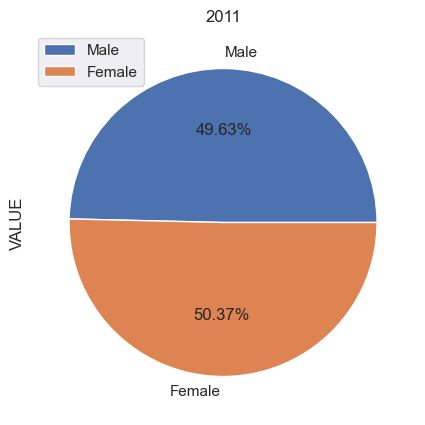

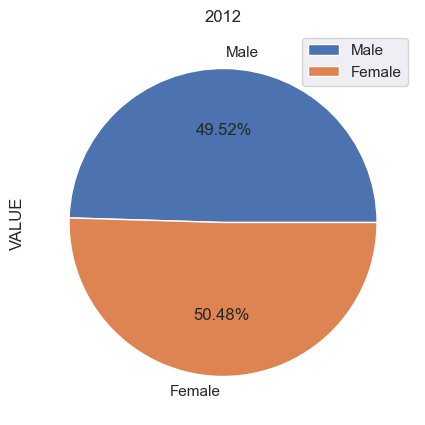

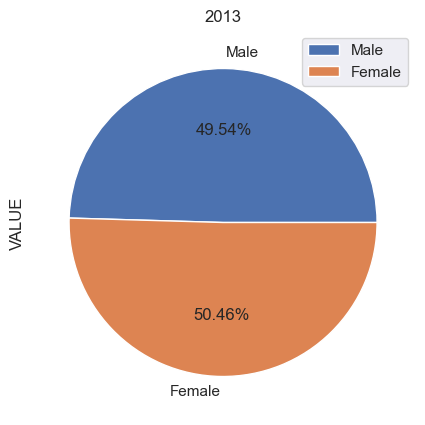

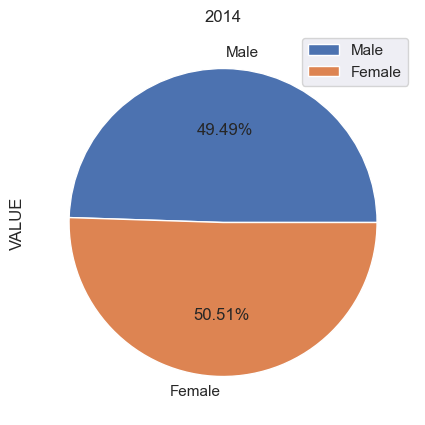

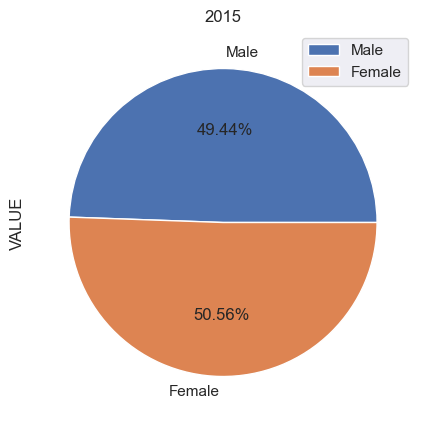

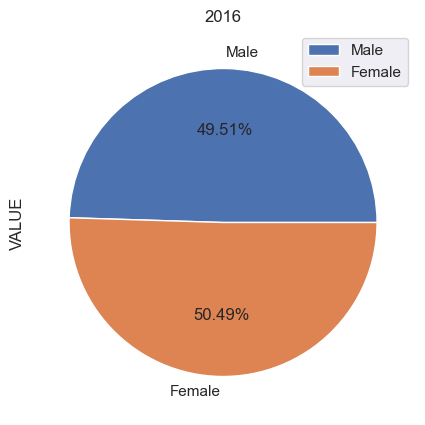

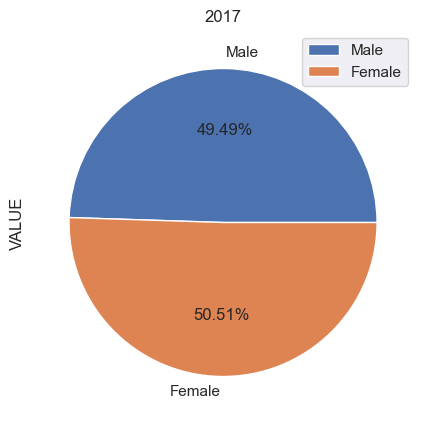

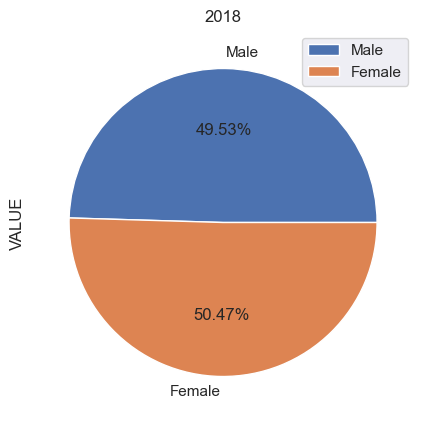

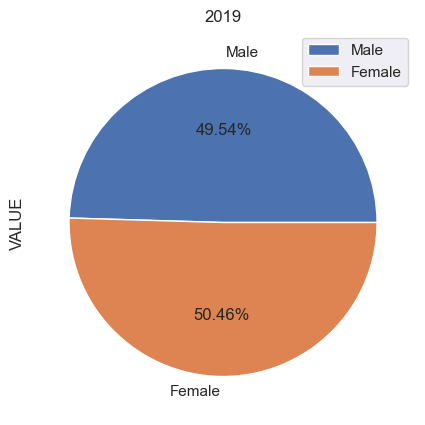

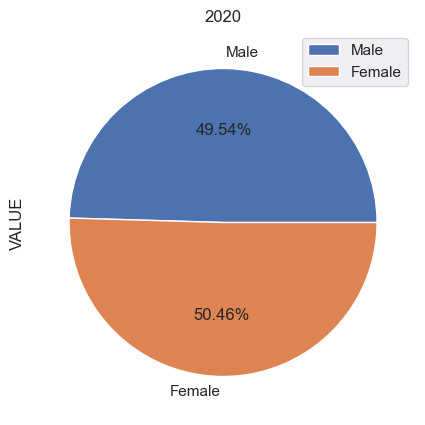

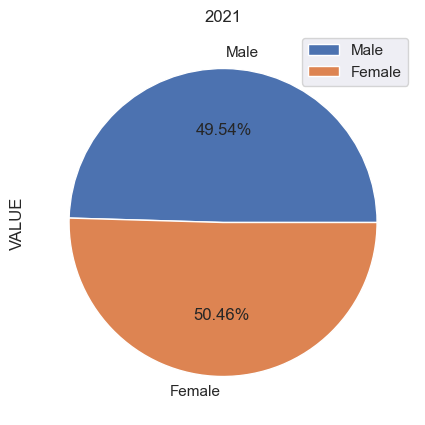

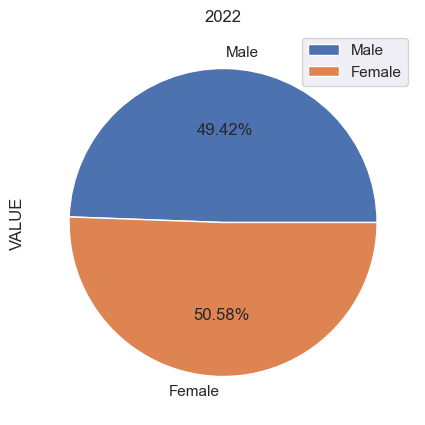

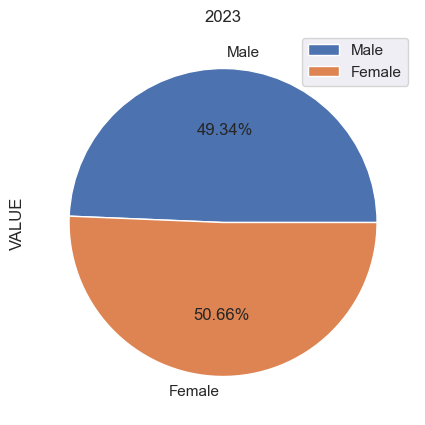

In [91]:
popc_aa_rs_drp_2011 = popc_aa_rs_drp.loc[popc_aa_rs_drp["Year"] == 2011,]
popc_aa_rs_drp_2011.plot.pie(y="VALUE",figsize=(5, 5),legend=True,autopct="%.2f%%",title="2011")

popc_aa_rs_drp_2012 = popc_aa_rs_drp.loc[popc_aa_rs_drp["Year"] == 2012,]
popc_aa_rs_drp_2012.plot.pie(y="VALUE",figsize=(5, 5),legend=True,autopct="%.2f%%",title="2012")

popc_aa_rs_drp_2013 = popc_aa_rs_drp.loc[popc_aa_rs_drp["Year"] == 2013,]
popc_aa_rs_drp_2013.plot.pie(y="VALUE",figsize=(5, 5),legend=True,autopct="%.2f%%",title="2013")

popc_aa_rs_drp_2014 = popc_aa_rs_drp.loc[popc_aa_rs_drp["Year"] == 2014,]
popc_aa_rs_drp_2014.plot.pie(y="VALUE",figsize=(5, 5),legend=True,autopct="%.2f%%",title="2014")

popc_aa_rs_drp_2015 = popc_aa_rs_drp.loc[popc_aa_rs_drp["Year"] == 2015,]
popc_aa_rs_drp_2015.plot.pie(y="VALUE",figsize=(5, 5),legend=True,autopct="%.2f%%",title="2015")

popc_aa_rs_drp_2016 = popc_aa_rs_drp.loc[popc_aa_rs_drp["Year"] == 2016,]
popc_aa_rs_drp_2016.plot.pie(y="VALUE",figsize=(5, 5),legend=True,autopct="%.2f%%",title="2016")

popc_aa_rs_drp_2017 = popc_aa_rs_drp.loc[popc_aa_rs_drp["Year"] == 2017,]
popc_aa_rs_drp_2017.plot.pie(y="VALUE",figsize=(5, 5),legend=True,autopct="%.2f%%",title="2017")

popc_aa_rs_drp_2018 = popc_aa_rs_drp.loc[popc_aa_rs_drp["Year"] == 2018,]
popc_aa_rs_drp_2018.plot.pie(y="VALUE",figsize=(5, 5),legend=True,autopct="%.2f%%",title="2018")

popc_aa_rs_drp_2019 = popc_aa_rs_drp.loc[popc_aa_rs_drp["Year"] == 2019,]
popc_aa_rs_drp_2019.plot.pie(y="VALUE",figsize=(5, 5),legend=True,autopct="%.2f%%",title="2019")

popc_aa_rs_drp_2020 = popc_aa_rs_drp.loc[popc_aa_rs_drp["Year"] == 2020,]
popc_aa_rs_drp_2020.plot.pie(y="VALUE",figsize=(5, 5),legend=True,autopct="%.2f%%",title="2020")

popc_aa_rs_drp_2021 = popc_aa_rs_drp.loc[popc_aa_rs_drp["Year"] == 2021,]
popc_aa_rs_drp_2021.plot.pie(y="VALUE",figsize=(5, 5),legend=True,autopct="%.2f%%",title="2021")

popc_aa_rs_drp_2022 = popc_aa_rs_drp.loc[popc_aa_rs_drp["Year"] == 2022,]
popc_aa_rs_drp_2022.plot.pie(y="VALUE",figsize=(5, 5),legend=True,autopct="%.2f%%",title="2022")

popc_aa_rs_drp_2023 = popc_aa_rs_drp.loc[popc_aa_rs_drp["Year"] == 2023,]
popc_aa_rs_drp_2023.plot.pie(y="VALUE",figsize=(5, 5),legend=True,autopct="%.2f%%",title="2023")

In [92]:
# popc_aa_r2_year = popc_aa_r2.groupby(["Year"])[["VALUE"]].sum()
# popc_aa_r2_year


# Extract only "All Ages" Age Group
popc_aa_sb_sandr = popc.loc[popc["Age Group"] == "All ages",]
# Extract only "State" Region Group
#popc_aa_rs = popc_aa_rs.loc[popc_aa_rs["Region"] == "State",]
# Extract "both sexes" Sex Group
popc_aa_sb_sandr = popc_aa_sb_sandr.loc[popc_aa_sb_sandr["Sex"] == "Both sexes",]
popc_aa_sb_sandr.head(40)


STATISTIC Label  Year Age Group         Sex  \
486   Estimated Population (Persons in April)  2011  All ages  Both sexes   
487   Estimated Population (Persons in April)  2011  All ages  Both sexes   
488   Estimated Population (Persons in April)  2011  All ages  Both sexes   
489   Estimated Population (Persons in April)  2011  All ages  Both sexes   
490   Estimated Population (Persons in April)  2011  All ages  Both sexes   
491   Estimated Population (Persons in April)  2011  All ages  Both sexes   
492   Estimated Population (Persons in April)  2011  All ages  Both sexes   
493   Estimated Population (Persons in April)  2011  All ages  Both sexes   
494   Estimated Population (Persons in April)  2011  All ages  Both sexes   
999   Estimated Population (Persons in April)  2012  All ages  Both sexes   
1000  Estimated Population (Persons in April)  2012  All ages  Both sexes   
1001  Estimated Population (Persons in April)  2012  All ages  Both sexes   
1002  Estimated Population (Persons in April)  2012  All ages  Both sexes   
1003  Estimated Population (Persons in April)  2012  All ages  Both sexes   
1004  Estimated Population (Persons in April)  2012  All ages  Both sexes   
1005  Estimated Population (Persons in April)  2012  All ages  Both sexes   
1006  Estimated Population (Persons in April)  2012  All ages  Both sexes   
1007  Estimated Population (Persons in April)  2012  All ages  Both sexes   
1512  Estimated Population (Persons in April)  2013  All ages  Both sexes   
1513  Estimated Population (Persons in April)  2013  All ages  Both sexes   
1514  Estimated Population (Persons in April)  2013  All ages  Both sexes   
1515  Estimated Population (Persons in April)  2013  All ages  Both sexes   
1516  Estimated Population (Persons in April)  2013  All ages  Both sexes   
1517  Estimated Population (Persons in April)  2013  All ages  Both sexes   
1518  Estimated Population (Persons in April)  2013  All ages  Both sexes   
1519  Estimated Population (Persons in April)  2013  All ages  Both sexes   
1520  Estimated Population (Persons in April)  2013  All ages  Both sexes   
2025  Estimated Population (Persons in April)  2014  All ages  Both sexes   
2026  Estimated Population (Persons in April)  2014  All ages  Both sexes   
2027  Estimated Population (Persons in April)  2014  All ages  Both sexes   
2028  Estimated Population (Persons in April)  2014  All ages  Both sexes   
2029  Estimated Population (Persons in April)  2014  All ages  Both sexes   
2030  Estimated Population (Persons in April)  2014  All ages  Both sexes   
2031  Estimated Population (Persons in April)  2014  All ages  Both sexes   
2032  Estimated Population (Persons in April)  2014  All ages  Both sexes   
2033  Estimated Population (Persons in April)  2014  All ages  Both sexes   
2538  Estimated Population (Persons in April)  2015  All ages  Both sexes   
2539  Estimated Population (Persons in April)  2015  All ages  Both sexes   
2540  Estimated Population (Persons in April)  2015  All ages  Both sexes   
2541  Estimated Population (Persons in April)  2015  All ages  Both sexes   

          Region      UNIT   VALUE  sex_id  age_id  region_id  
486        State  Thousand  4574.9       3      19          1  
487       Border  Thousand   391.9       3      19          2  
488         West  Thousand   440.8       3      19          3  
489     Mid-West  Thousand   466.8       3      19          4  
490   South-East  Thousand   410.3       3      19          5  
491   South-West  Thousand   662.3       3      19          6  
492       Dublin  Thousand  1261.5       3      19          7  
493     Mid-East  Thousand   657.4       3      19          8  
494      Midland  Thousand   283.8       3      19          9  
999        State  Thousand  4593.7       3      19          1  
1000      Border  Thousand   392.1       3      19          2  
1001        West  Thousand   439.4       3      19          3  
1002    Mid-West  Thousand   470.6      

In [93]:
popc_aa_sb_sandr_state = popc_aa_sb_sandr.loc[popc_aa_sb_sandr["Region"] == "State",]
popc_aa_sb_sandr_state_melt = popc_aa_sb_sandr_state.melt(id_vars=["Year"],value_vars=["VALUE"],value_name="State VALUE")

popc_aa_sb_sandr_border = popc_aa_sb_sandr.loc[popc_aa_sb_sandr["Region"] == "Border",]
popc_aa_sb_sandr_border_melt = popc_aa_sb_sandr_border.melt(id_vars=["Year"],value_vars=["VALUE"],value_name="Border VALUE")

popc_aa_sb_sandr_west = popc_aa_sb_sandr.loc[popc_aa_sb_sandr["Region"] == "West",]
popc_aa_sb_sandr_west_melt = popc_aa_sb_sandr_west.melt(id_vars=["Year"],value_vars=["VALUE"],value_name="West VALUE")

popc_aa_sb_sandr_midwest = popc_aa_sb_sandr.loc[popc_aa_sb_sandr["Region"] == "Mid-West",]
popc_aa_sb_sandr_midwest_melt = popc_aa_sb_sandr_midwest.melt(id_vars=["Year"],value_vars=["VALUE"],value_name="Mid-West VALUE")

popc_aa_sb_sandr_seast = popc_aa_sb_sandr.loc[popc_aa_sb_sandr["Region"] == "South-East",]
popc_aa_sb_sandr_seast_melt = popc_aa_sb_sandr_seast.melt(id_vars=["Year"],value_vars=["VALUE"],value_name="South-East VALUE")

popc_aa_sb_sandr_swest = popc_aa_sb_sandr.loc[popc_aa_sb_sandr["Region"] == "South-West",]
popc_aa_sb_sandr_swest_melt = popc_aa_sb_sandr_swest.melt(id_vars=["Year"],value_vars=["VALUE"],value_name="South-West VALUE")

popc_aa_sb_sandr_dublin = popc_aa_sb_sandr.loc[popc_aa_sb_sandr["Region"] == "Dublin",]
popc_aa_sb_sandr_dublin_melt = popc_aa_sb_sandr_dublin.melt(id_vars=["Year"],value_vars=["VALUE"],value_name="Dublin VALUE")

popc_aa_sb_sandr_mideast = popc_aa_sb_sandr.loc[popc_aa_sb_sandr["Region"] == "Mid-East",]
popc_aa_sb_sandr_mideast_melt = popc_aa_sb_sandr_mideast.melt(id_vars=["Year"],value_vars=["VALUE"],value_name="Mid-East VALUE")

popc_aa_sb_sandr_midland = popc_aa_sb_sandr.loc[popc_aa_sb_sandr["Region"] == "Midland",]
popc_aa_sb_sandr_midland_melt = popc_aa_sb_sandr_midland.melt(id_vars=["Year"],value_vars=["VALUE"],value_name="Midland VALUE")


In [94]:
popc_aa_sb_sandr_melt = popc_aa_sb_sandr_state_melt.merge(popc_aa_sb_sandr_border_melt,left_on="Year",right_on="Year")
popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.drop(["variable_x","variable_y"],axis=1)

popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.merge(popc_aa_sb_sandr_west_melt,left_on="Year",right_on="Year")
popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.drop(["variable"],axis=1)

popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.merge(popc_aa_sb_sandr_midwest_melt,left_on="Year",right_on="Year")
popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.drop(["variable"],axis=1)

popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.merge(popc_aa_sb_sandr_seast_melt,left_on="Year",right_on="Year")
popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.drop(["variable"],axis=1)

popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.merge(popc_aa_sb_sandr_swest_melt,left_on="Year",right_on="Year")
popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.drop(["variable"],axis=1)

popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.merge(popc_aa_sb_sandr_dublin_melt,left_on="Year",right_on="Year")
popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.drop(["variable"],axis=1)

popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.merge(popc_aa_sb_sandr_mideast_melt,left_on="Year",right_on="Year")
popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.drop(["variable"],axis=1)

popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.merge(popc_aa_sb_sandr_midland_melt,left_on="Year",right_on="Year")
popc_aa_sb_sandr_melt = popc_aa_sb_sandr_melt.drop(["variable"],axis=1)

popc_total_by_region = popc_aa_sb_sandr_melt
popc_total_by_region

Year  State VALUE  Border VALUE  West VALUE  Mid-West VALUE  \
0   2011       4574.9         391.9       440.8           466.8   
1   2012       4593.7         392.1       439.4           470.6   
2   2013       4614.7         393.1       441.7           470.7   
3   2014       4645.4         392.0       441.1           471.8   
4   2015       4687.8         391.9       442.2           473.4   
5   2016       4739.6         393.3       447.5           472.5   
6   2017       4810.9         400.3       453.1           480.2   
7   2018       4884.9         405.7       458.7           489.0   
8   2019       4958.5         409.9       464.8           493.4   
9   2020       5029.9         412.0       472.2           497.9   
10  2021       5074.7         417.1       475.4           499.6   
11  2022       5184.0         422.2       486.7           508.7   
12  2023       5281.6         432.1       500.8           519.6   

    South-East VALUE  South-West VALUE  Dublin VALUE  Mid-East VALUE  \
0              410.3             662.3        1261.5           657.4   
1              411.6             667.4        1260.6           664.7   
2              413.7             673.8        1265.9           666.4   
3              413.5             679.5        1286.4           671.4   
4              415.6             678.9        1315.3           679.3   
5              421.2             685.0        1335.9           690.9   
6              426.5             694.1        1351.5           705.9   
7              431.5             702.9        1373.1           719.3   
8              440.1             710.6        1398.8           731.9   
9              444.9             723.3        1422.4           747.2   
10             451.2             727.4        1434.6           755.3   
11             460.7             743.0        1468.4           774.0   
12             468.6             757.4        1501.5           777.1   

    Midland VALUE  
0           283.8  
1           287.2  
2           289.3  
3           289.8  
4           291.1  
5           293.4  
6           299.3  
7           304.7  
8           309.0  
9           309.9  
10          314.2  
11          320.3  
12          324.6

In [95]:
popc_r_piv_rg_yr

Region  Border  Dublin  Mid-East  Mid-West  Midland  South-East  South-West  \
Year                                                                          
2011     392.1  1261.9     657.4     466.5    284.0       409.8       662.4   
2012     392.2  1260.6     664.8     470.7    287.3       411.5       667.3   
2013     393.4  1266.1     666.5     470.5    289.4       413.8       673.6   
2014     391.7  1286.5     671.6     471.6    289.8       413.2       679.7   
2015     392.1  1315.3     679.5     473.4    291.1       415.6       679.0   
2016     393.3  1335.6     690.8     472.7    293.5       421.0       685.0   
2017     400.5  1351.7     706.0     480.3    299.1       426.4       694.2   
2018     405.8  1373.3     719.0     489.1    304.6       431.2       703.0   
2019     409.7  1398.9     731.9     493.4    309.0       440.1       710.6   
2020     412.0  1422.2     747.6     498.2    309.7       445.0       723.0   
2021     417.1  1434.8     755.2     499.7    314.2       451.0       727.3   
2022     421.8  1468.6     774.0     508.9    320.3       460.8       742.8   
2023     432.0  1501.3     777.2     519.5    324.7       468.6       757.2   

Region   West  
Year           
2011    440.8  
2012    439.5  
2013    441.7  
2014    441.1  
2015    442.2  
2016    447.8  
2017    453.2  
2018    458.9  
2019    464.6  
2020    472.4  
2021    475.5  
2022    486.5  
2023    501.0

### Matplotlib

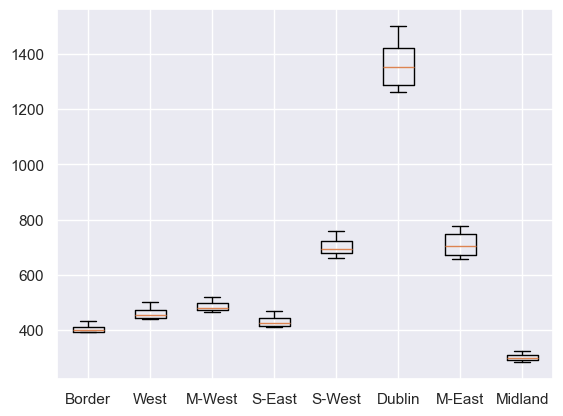

In [96]:
popc_total_by_region
plt.boxplot(popc_total_by_region.drop(["Year","State VALUE"],axis=1),data=popc_total_by_region)
plt.xticks([1,2,3,4,5,6,7,8], ["Border", "West", "M-West", "S-East", "S-West", "Dublin", "M-East", "Midland"])
plt.show()

In [97]:
#remove Dublin as it skews the plot and the other cannot be compared easily

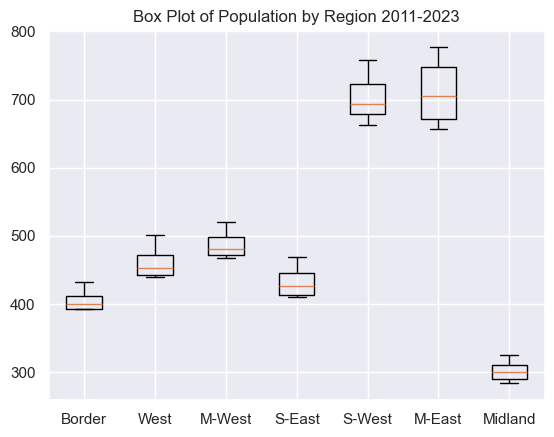

In [98]:
popc_total_by_region
plt.boxplot(popc_total_by_region.drop(["Year","Dublin VALUE","State VALUE"],axis=1),data=popc_total_by_region)
plt.xticks([1,2,3,4,5,6,7], ["Border", "West", "M-West", "S-East", "S-West", "M-East", "Midland"])
plt.title("Box Plot of Population by Region 2011-2023")
plt.show()

In [99]:
popc_total_by_region

Year  State VALUE  Border VALUE  West VALUE  Mid-West VALUE  \
0   2011       4574.9         391.9       440.8           466.8   
1   2012       4593.7         392.1       439.4           470.6   
2   2013       4614.7         393.1       441.7           470.7   
3   2014       4645.4         392.0       441.1           471.8   
4   2015       4687.8         391.9       442.2           473.4   
5   2016       4739.6         393.3       447.5           472.5   
6   2017       4810.9         400.3       453.1           480.2   
7   2018       4884.9         405.7       458.7           489.0   
8   2019       4958.5         409.9       464.8           493.4   
9   2020       5029.9         412.0       472.2           497.9   
10  2021       5074.7         417.1       475.4           499.6   
11  2022       5184.0         422.2       486.7           508.7   
12  2023       5281.6         432.1       500.8           519.6   

    South-East VALUE  South-West VALUE  Dublin VALUE  Mid-East VALUE  \
0              410.3             662.3        1261.5           657.4   
1              411.6             667.4        1260.6           664.7   
2              413.7             673.8        1265.9           666.4   
3              413.5             679.5        1286.4           671.4   
4              415.6             678.9        1315.3           679.3   
5              421.2             685.0        1335.9           690.9   
6              426.5             694.1        1351.5           705.9   
7              431.5             702.9        1373.1           719.3   
8              440.1             710.6        1398.8           731.9   
9              444.9             723.3        1422.4           747.2   
10             451.2             727.4        1434.6           755.3   
11             460.7             743.0        1468.4           774.0   
12             468.6             757.4        1501.5           777.1   

    Midland VALUE  
0           283.8  
1           287.2  
2           289.3  
3           289.8  
4           291.1  
5           293.4  
6           299.3  
7           304.7  
8           309.0  
9           309.9  
10          314.2  
11          320.3  
12          324.6

In [100]:
#Individual plots
popc_total_by_region_drp = popc_total_by_region.drop(["Year"],axis=1)
popc_total_by_region_drp

State VALUE  Border VALUE  West VALUE  Mid-West VALUE  South-East VALUE  \
0        4574.9         391.9       440.8           466.8             410.3   
1        4593.7         392.1       439.4           470.6             411.6   
2        4614.7         393.1       441.7           470.7             413.7   
3        4645.4         392.0       441.1           471.8             413.5   
4        4687.8         391.9       442.2           473.4             415.6   
5        4739.6         393.3       447.5           472.5             421.2   
6        4810.9         400.3       453.1           480.2             426.5   
7        4884.9         405.7       458.7           489.0             431.5   
8        4958.5         409.9       464.8           493.4             440.1   
9        5029.9         412.0       472.2           497.9             444.9   
10       5074.7         417.1       475.4           499.6             451.2   
11       5184.0         422.2       486.7           508.7             460.7   
12       5281.6         432.1       500.8           519.6             468.6   

    South-West VALUE  Dublin VALUE  Mid-East VALUE  Midland VALUE  
0              662.3        1261.5           657.4          283.8  
1              667.4        1260.6           664.7          287.2  
2              673.8        1265.9           666.4          289.3  
3              679.5        1286.4           671.4          289.8  
4              678.9        1315.3           679.3          291.1  
5              685.0        1335.9           690.9          293.4  
6              694.1        1351.5           705.9          299.3  
7              702.9        1373.1           719.3          304.7  
8              710.6        1398.8           731.9          309.0  
9              723.3        1422.4           747.2          309.9  
10             727.4        1434.6           755.3          314.2  
11             743.0        1468.4           774.0          320.3  
12             757.4        1501.5           777.1          324.6

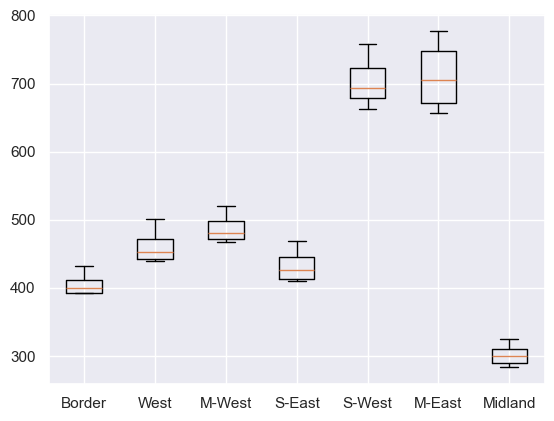

In [101]:

plt.boxplot(popc_total_by_region.drop(["Year","Dublin VALUE","State VALUE"],axis=1),data=popc_total_by_region)
plt.xticks([1,2,3,4,5,6,7], ["Border", "West", "M-West", "S-East", "S-West", "M-East", "Midland"])
plt.show()


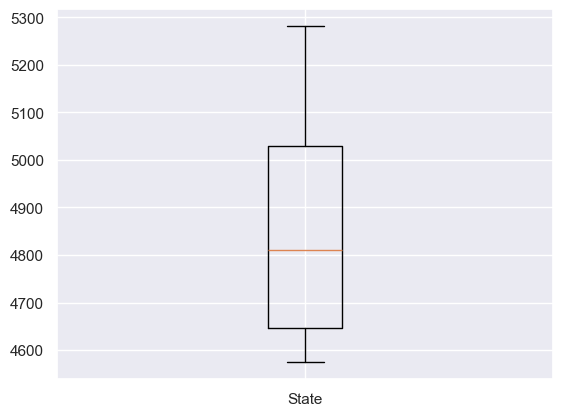

In [102]:
plt.boxplot(popc_total_by_region["State VALUE"],
           labels=["State"])
plt.show()

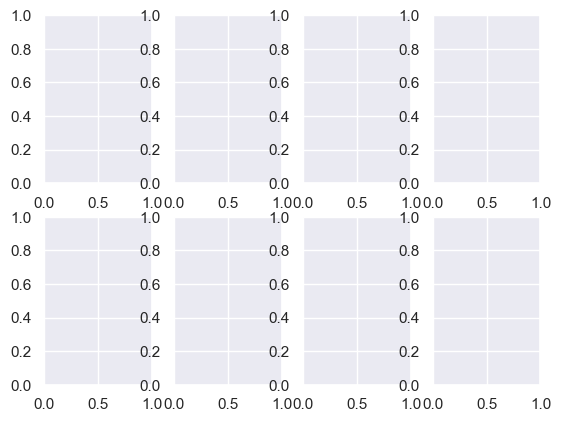

In [103]:
fig, bp = plt.subplots(2,4)

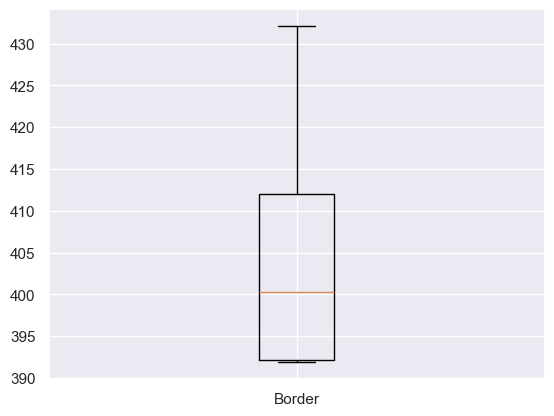

In [104]:
plt.boxplot(popc_total_by_region["Border VALUE"],
           labels=["Border"])
plt.show()

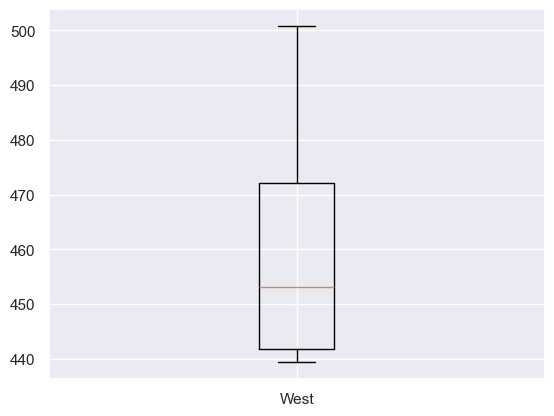

In [105]:
plt.boxplot(popc_total_by_region["West VALUE"],
            data=popc_total_by_region,
           labels=["West"])
plt.show()

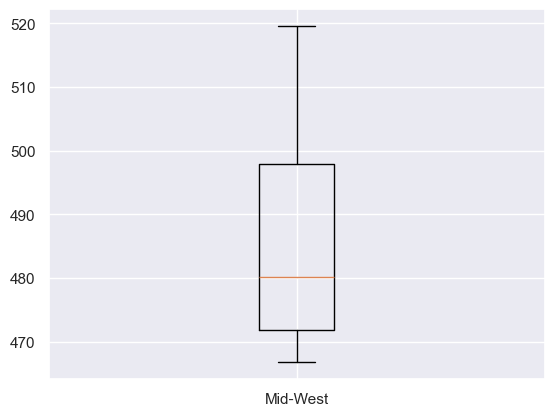

In [106]:
plt.boxplot(popc_total_by_region["Mid-West VALUE"],
            data=popc_total_by_region,
           labels=["Mid-West"])
plt.show()

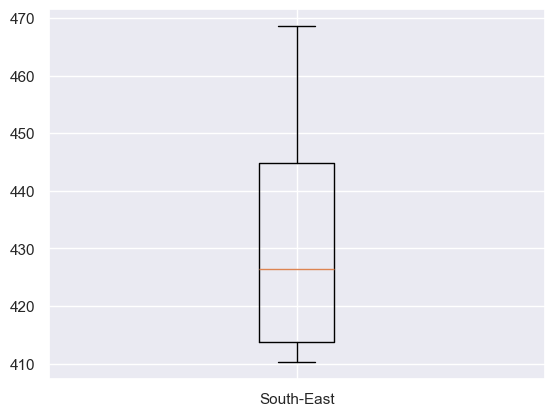

In [107]:
plt.boxplot(popc_total_by_region["South-East VALUE"],data=popc_total_by_region,
           labels=["South-East"])
plt.show()

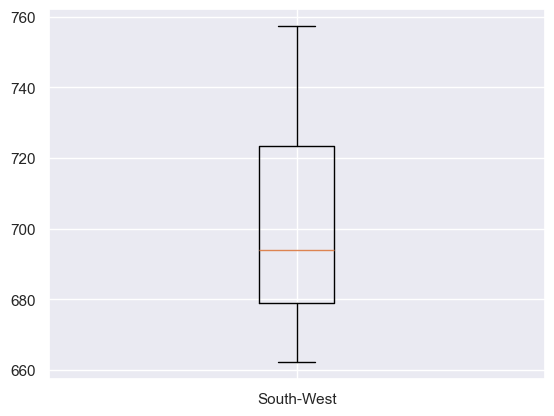

In [108]:
plt.boxplot(popc_total_by_region["South-West VALUE"],data=popc_total_by_region,
           labels=["South-West"])
plt.show()

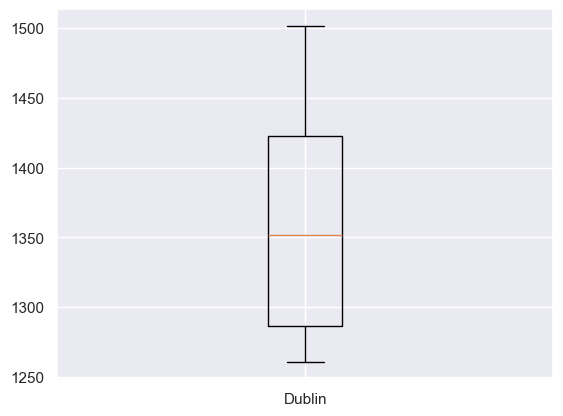

In [109]:
plt.boxplot(popc_total_by_region["Dublin VALUE"],data = popc_total_by_region,
           labels=["Dublin"])

plt.show()

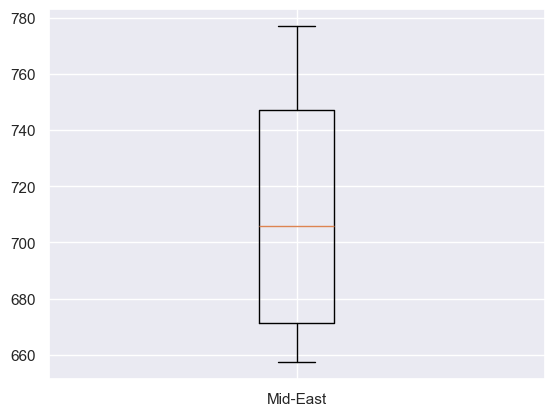

In [110]:
plt.boxplot(popc_total_by_region["Mid-East VALUE"],data=popc_total_by_region,
           labels=["Mid-East"])
plt.show()

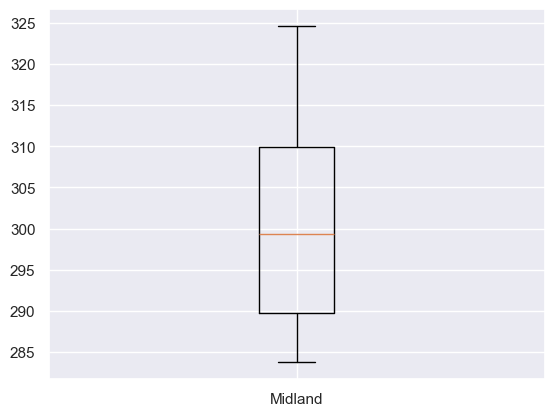

In [111]:
plt.boxplot(popc_total_by_region["Midland VALUE"],data=popc_total_by_region,
           labels=["Midland"])
plt.show()

# Working Age Population vs Retired Population (2011-2023)

### Working age population defined by OECD as those aged 15-64

https://data.oecd.org/pop/working-age-population.htm#:~:text=The%20working%20age%20population%20is%20defined%20as%20those%20aged%2015%20to%2064.

Look at age groups across state

look at age groups across regions

look at above split by male and female



**Age Group Split:**

***Dependents:***

'0 - 4 years' = 1

'5 - 9 years' = 2

'10 - 14 years' = 3

----

***Working Population:***

'15 - 19 years' = 4

'20 - 24 years' = 5

'25 - 29 years' = 6

'30 - 34 years' = 7

'35 - 39 years' = 8

'40 - 44 years' = 9

'45 - 49 years' = 10

'50 - 54 years' = 11

'55 - 59 years' = 12

'60 - 64 years' = 13

----

***Retired:***

'65 - 69 years' = 14

'70 - 74 years' = 15

'75 - 79 years' = 16

'80 - 84 years' = 17

'85 years and over' = 18

'All ages' = 19

D / W / R

state / both sex / Male / Female
region / **both sex** / **Male** / **Female**

In [112]:
popc

STATISTIC Label  Year    Age Group         Sex  \
0     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
1     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
2     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
3     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
4     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
...                                       ...   ...          ...         ...   
6664  Estimated Population (Persons in April)  2023     All ages      Female   
6665  Estimated Population (Persons in April)  2023     All ages      Female   
6666  Estimated Population (Persons in April)  2023     All ages      Female   
6667  Estimated Population (Persons in April)  2023     All ages      Female   
6668  Estimated Population (Persons in April)  2023     All ages      Female   

          Region      UNIT  VALUE  sex_id  age_id  region_id  
0          State  Thousand  356.0       3       1          1  
1         Border  Thousand   30.7       3       1          2  
2           West  Thousand   32.6       3       1          3  
3       Mid-West  Thousand   35.0       3       1          4  
4     South-East  Thousand   32.0       3       1          5  
...          ...       ...    ...     ...     ...        ...  
6664  South-East  Thousand  237.5       2      19          5  
6665  South-West  Thousand  383.8       2      19          6  
6666      Dublin  Thousand  765.6       2      19          7  
6667    Mid-East  Thousand  391.3       2      19          8  
6668     Midland  Thousand  163.2       2      19          9  

[6669 rows x 10 columns]

In [113]:
popc_rs_sb = popc.loc[popc["Region"]=="State"].loc[popc["Sex"]=="Both sexes"]

#popc_rs_bs_ag_1 = popc_rs_bs_ag_1.groupby(["Age Group","Year"])[["VALUE"]].sum()

popc_rs_sb_dep = popc_rs_sb.loc[popc_rs_sb["age_id"]<4].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Dependent'})
popc_rs_sb_work = popc_rs_sb.loc[popc_rs_sb["age_id"]>3].loc[popc_rs_sb["age_id"]<14].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Working'})
popc_rs_sb_ret = popc_rs_sb.loc[popc_rs_sb["age_id"]>13].loc[popc_rs_sb["age_id"]<19].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Retired'})

popc_rs_sb_dwr = pd.merge(popc_rs_sb_dep,popc_rs_sb_work).merge(popc_rs_sb_ret)
popc_rs_sb_dwr

Year Region  Dependent  Working  Retired
0   2011  State      976.6   3066.6    531.6
1   2012  State      988.0   3055.7    549.9
2   2013  State      993.9   3051.5    569.2
3   2014  State      997.6   3058.5    589.5
4   2015  State     1001.6   3075.9    610.3
5   2016  State     1005.6   3104.3    629.9
6   2017  State     1010.4   3148.1    652.4
7   2018  State     1014.4   3194.0    676.5
8   2019  State     1015.6   3241.6    701.3
9   2020  State     1013.6   3290.1    726.1
10  2021  State     1007.6   3319.7    747.4
11  2022  State     1014.3   3388.2    781.4
12  2023  State     1011.6   3463.7    806.3

In [114]:
popc_rg_sb = popc.loc[popc["Region"]!="State"].loc[popc["Sex"]=="Both sexes"].drop(["STATISTIC Label","UNIT","Sex","sex_id"],axis=1)
# popc_rg_sb

popc_rg_sb_dep = popc_rg_sb.loc[popc_rg_sb["age_id"]<4].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Dependent'})

popc_rg_sb_work = popc_rg_sb.loc[popc_rg_sb["age_id"]>3].loc[popc_rg_sb["age_id"]<14].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Working'})
popc_rg_sb_ret = popc_rg_sb.loc[popc_rg_sb["age_id"]>13].loc[popc_rg_sb["age_id"]<19].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Retired'})

# popc_rs_sb_dwr = pd.merge(popc_rs_sb_dep,popc_rs_sb_work).merge(popc_rs_sb_ret)
# popc_rs_sb_dwr

In [115]:
# Age 0 - 14 = Dependent Population
# Age 15-64 =  Working Population 
# Age 65 and over =  Retired Population

# Dataframe showing split by Sex and Region, for both sexes

popc_rg_sb = popc.loc[popc["Region"]!="State"].loc[popc["Sex"]=="Both sexes"]

popc_rg_sb_dep = popc_rg_sb.loc[popc_rg_sb["age_id"]<4].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Dependent'})
popc_rg_sb_work = popc_rg_sb.loc[popc_rg_sb["age_id"]>3].loc[popc_rg_sb["age_id"]<14].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Working'})
popc_rg_sb_ret = popc_rg_sb.loc[popc_rg_sb["age_id"]>13].loc[popc_rg_sb["age_id"]<19].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Retired'})

popc_rg_sb_dwr = pd.merge(popc_rg_sb_dep,popc_rg_sb_work).merge(popc_rg_sb_ret)
popc_rg_sb_dwr


Year      Region  Dependent  Working  Retired
0    2011      Border       87.2    253.8     51.1
1    2011      Dublin      244.7    878.2    138.6
2    2011    Mid-East      157.8    438.2     61.5
3    2011    Mid-West       99.4    308.5     58.9
4    2011     Midland       66.2    185.9     31.7
..    ...         ...        ...      ...      ...
99   2023    Mid-West       97.0    334.7     87.8
100  2023     Midland       65.4    210.5     48.5
101  2023  South-East       89.8    301.5     77.4
102  2023  South-West      141.4    492.3    123.7
103  2023        West       95.1    320.0     85.7

[104 rows x 5 columns]

In [116]:
DF = "popc_rg_sb_dwr"
Description = "popc(2011-23): Regions; Both Sex; D/W/R"
df_index_table.loc[len(df_index_table)] = [DF, Description]
DF = "popc_rg_sb_dep"
Description = "popc(2011-23): Regions; Both Sex; Dependent"
df_index_table.loc[len(df_index_table)] = [DF, Description]
DF = "popc_rg_sb_work"
Description = "popc(2011-23): Regions; Both Sex; Working"
df_index_table.loc[len(df_index_table)] = [DF, Description]
DF = "popc_rg_sb_ret"
Description = "popc(2011-23): Regions; Both Sex; Retired"
df_index_table.loc[len(df_index_table)] = [DF, Description]

In [117]:
# Age 0 - 14 = Dependent Population
# Dataframe showing split by Sex and Region, and split by individual Sex

popc_rg_dep = popc_r.loc[popc_r["age_id"]<4]

popc_rg_dep_f = popc_rg_dep.loc[popc_rg_dep["Sex"]=="Female"].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Female Dep'})
popc_rg_dep_m = popc_rg_dep.loc[popc_rg_dep["Sex"]=="Male"].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Male Dep'})


popc_rg_mf_dep = pd.merge(popc_rg_dep_f,popc_rg_dep_m)


In [118]:
# Age 15-64 =  Working Population 
# Dataframe showing split by Sex and Region, and split by individual Sex

popc_rg_work = popc_r.loc[popc_r["age_id"]>3].loc[popc_r["age_id"]<14]

popc_rg_work_f = popc_rg_work.loc[popc_rg_work["Sex"]=="Female"].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Female Work'})
popc_rg_work_m = popc_rg_work.loc[popc_rg_work["Sex"]=="Male"].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Male Work'})

popc_rg_mf_work = pd.merge(popc_rg_work_f,popc_rg_work_m)


In [119]:
# Age 65 and over =  Retired Population
# Dataframe showing split by Sex and Region, and split by individual Sex

popc_rg_ret = popc_r.loc[popc_r["age_id"]>13].loc[popc_r["age_id"]<19]

popc_rg_ret_f = popc_rg_ret.loc[popc_rg_ret["Sex"]=="Female"].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Female Ret'})
popc_rg_ret_m = popc_rg_ret.loc[popc_rg_ret["Sex"]=="Male"].groupby(["Year","Region"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Male Ret'})

popc_rg_mf_ret = pd.merge(popc_rg_ret_f,popc_rg_ret_m)


In [120]:
# popc_rg_mf_dep
# popc_rg_mf_work
# popc_rg_mf_ret

popc_rg_mf_dwr = pd.merge(popc_rg_mf_dep,popc_rg_mf_work).merge(popc_rg_mf_ret)
popc_rg_mf_dwr

Year      Region  Female Dep  Male Dep  Female Work  Male Work  \
0    2011      Border        42.3      45.0        125.7      128.0   
1    2011      Dublin       119.5     125.1        447.6      430.9   
2    2011    Mid-East        76.9      80.9        220.0      218.0   
3    2011    Mid-West        48.7      50.7        152.7      155.7   
4    2011     Midland        32.4      33.9         92.1       93.7   
..    ...         ...         ...       ...          ...        ...   
99   2023    Mid-West        47.6      49.6        170.6      164.2   
100  2023     Midland        32.0      33.5        106.0      104.6   
101  2023  South-East        44.1      45.5        153.2      148.3   
102  2023  South-West        69.3      72.0        249.8      242.4   
103  2023        West        46.6      48.5        161.9      158.5   

     Female Ret  Male Ret  
0          27.0      24.1  
1          79.3      59.5  
2          33.2      28.4  
3          31.6      27.1  
4          17.0      14.9  
..          ...       ...  
99         45.6      41.9  
100        25.2      23.4  
101        40.3      37.2  
102        64.7      59.0  
103        44.5      41.0  

[104 rows x 8 columns]

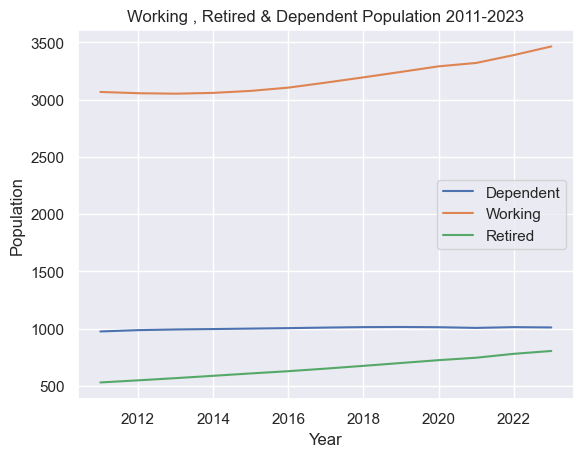

In [121]:
# Total population over time, by Male, Female and Both sexes
import matplotlib.pyplot as plt
sns.lineplot(
    data=popc_rs_sb_dwr,
    x="Year",
    y ="Dependent",
    label = "Dependent")
sns.lineplot(
    data=popc_rs_sb_dwr,
    x="Year",
    y ="Working",
    label ="Working")
sns.lineplot(
    data=popc_rs_sb_dwr,
    x="Year",
    y ="Retired",
    label ="Retired")
plt.ylabel("Population")
plt.title("Working , Retired & Dependent Population 2011-2023")
plt.legend()


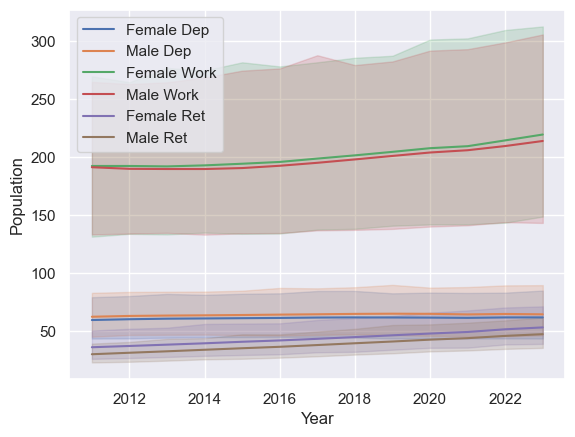

In [122]:
sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y ="Female Dep",
    label ="Female Dep")
sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y="Male Dep",
    label="Male Dep")

sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y ="Female Work",
    label ="Female Work")
sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y="Male Work",
    label="Male Work")

sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y ="Female Ret",
    label ="Female Ret")
sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y="Male Ret",
    label="Male Ret")
plt.ylabel("Population")
plt.legend()


In [123]:
popc_rg_mf_dwr.head(2)

Year  Region  Female Dep  Male Dep  Female Work  Male Work  Female Ret  \
0  2011  Border        42.3      45.0        125.7      128.0        27.0   
1  2011  Dublin       119.5     125.1        447.6      430.9        79.3   

   Male Ret  
0      24.1  
1      59.5

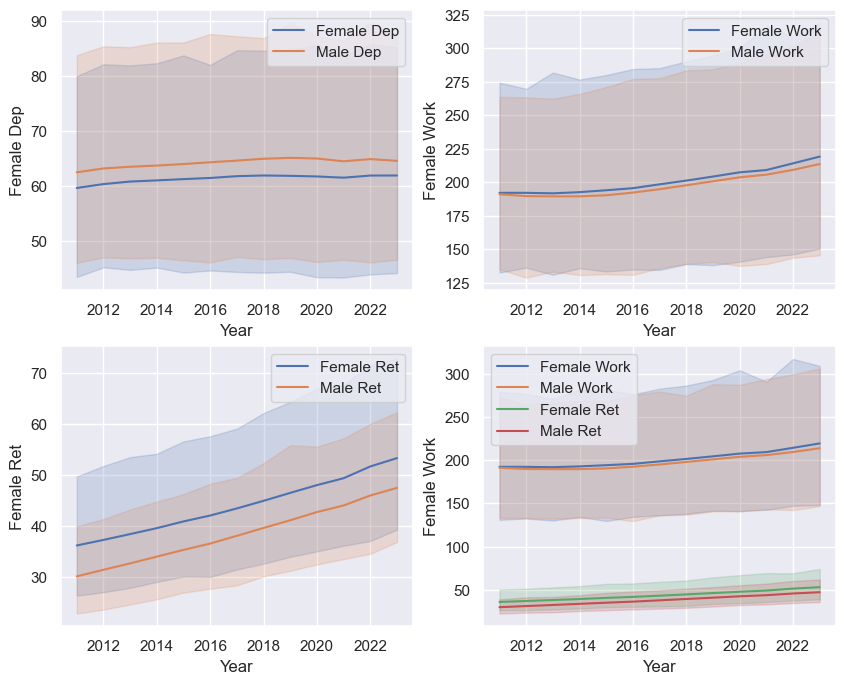

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)

sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y ="Female Dep",
    label ="Female Dep")
sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y="Male Dep",
    label="Male Dep")

plt.subplot(2, 2, 2)
sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y ="Female Work",
    label ="Female Work")
sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y="Male Work",
    label="Male Work")

plt.subplot(2, 2, 3)
sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y ="Female Ret",
    label ="Female Ret")
sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y="Male Ret",
    label="Male Ret")


plt.subplot(2, 2, 4)
sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y ="Female Work",
    label ="Female Work")
sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y="Male Work",
    label="Male Work")

sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y ="Female Ret",
    label ="Female Ret")
sns.lineplot(
    data=popc_rg_mf_dwr,
    x="Year",
    y="Male Ret",
    label="Male Ret")

plt.legend()
# plt.show()

In [125]:
popc_rg_mf_dwr

Year      Region  Female Dep  Male Dep  Female Work  Male Work  \
0    2011      Border        42.3      45.0        125.7      128.0   
1    2011      Dublin       119.5     125.1        447.6      430.9   
2    2011    Mid-East        76.9      80.9        220.0      218.0   
3    2011    Mid-West        48.7      50.7        152.7      155.7   
4    2011     Midland        32.4      33.9         92.1       93.7   
..    ...         ...         ...       ...          ...        ...   
99   2023    Mid-West        47.6      49.6        170.6      164.2   
100  2023     Midland        32.0      33.5        106.0      104.6   
101  2023  South-East        44.1      45.5        153.2      148.3   
102  2023  South-West        69.3      72.0        249.8      242.4   
103  2023        West        46.6      48.5        161.9      158.5   

     Female Ret  Male Ret  
0          27.0      24.1  
1          79.3      59.5  
2          33.2      28.4  
3          31.6      27.1  
4          17.0      14.9  
..          ...       ...  
99         45.6      41.9  
100        25.2      23.4  
101        40.3      37.2  
102        64.7      59.0  
103        44.5      41.0  

[104 rows x 8 columns]

In [126]:
sns.color_palette("husl", 2)


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681)]

# END 

***(Working Age Population vs Retired Population)***

# Age Across the population (check)

In [127]:
popc_rs_bs_ag = popc.loc[popc["Region"] == "State",]
# # Remove "All Ages" Age Group
# popc_rs_bs_ag = popc_rs_bs_ag.loc[popc_rs_bs_ag["Age Group"] != "All ages",]
# Remove "both sexes" Sex Group
popc_rs_bs_ag = popc_rs_bs_ag.loc[popc_rs_bs_ag["Sex"] == "Both sexes",]
popc_rs_bs_ag

popc_rs_bs_ag.head(20)

STATISTIC Label  Year          Age Group  \
0    Estimated Population (Persons in April)  2011        0 - 4 years   
27   Estimated Population (Persons in April)  2011        5 - 9 years   
54   Estimated Population (Persons in April)  2011      10 - 14 years   
81   Estimated Population (Persons in April)  2011      15 - 19 years   
108  Estimated Population (Persons in April)  2011      20 - 24 years   
135  Estimated Population (Persons in April)  2011      25 - 29 years   
162  Estimated Population (Persons in April)  2011      30 - 34 years   
189  Estimated Population (Persons in April)  2011      35 - 39 years   
216  Estimated Population (Persons in April)  2011      40 - 44 years   
243  Estimated Population (Persons in April)  2011      45 - 49 years   
270  Estimated Population (Persons in April)  2011      50 - 54 years   
297  Estimated Population (Persons in April)  2011      55 - 59 years   
324  Estimated Population (Persons in April)  2011      60 - 64 years   
351  Estimated Population (Persons in April)  2011      65 - 69 years   
378  Estimated Population (Persons in April)  2011      70 - 74 years   
405  Estimated Population (Persons in April)  2011      75 - 79 years   
432  Estimated Population (Persons in April)  2011      80 - 84 years   
459  Estimated Population (Persons in April)  2011  85 years and over   
486  Estimated Population (Persons in April)  2011           All ages   
513  Estimated Population (Persons in April)  2012        0 - 4 years   

            Sex Region      UNIT   VALUE  sex_id  age_id  region_id  
0    Both sexes  State  Thousand   356.0       3       1          1  
27   Both sexes  State  Thousand   319.6       3       2          1  
54   Both sexes  State  Thousand   301.0       3       3          1  
81   Both sexes  State  Thousand   281.0       3       4          1  
108  Both sexes  State  Thousand   298.6       3       5          1  
135  Both sexes  State  Thousand   362.9       3       6          1  
162  Both sexes  State  Thousand   393.4       3       7          1  
189  Both sexes  State  Thousand   363.1       3       8          1  
216  Both sexes  State  Thousand   329.3       3       9          1  
243  Both sexes  State  Thousand   304.1       3      10          1  
270  Both sexes  State  Thousand   273.7       3      11          1  
297  Both sexes  State  Thousand   243.4       3      12          1  
324  Both sexes  State  Thousand   217.1       3      13          1  
351  Both sexes  State  Thousand   172.1       3      14          1  
378  Both sexes  State  Thousand   130.1       3      15          1  
405  Both sexes  State  Thousand   101.4       3      16          1  
432  Both sexes  State  Thousand    69.8       3      17          1  
459  Both sexes  State  Thousand    58.2       3      18          1  
486  Both sexes  State  Thousand  4574.9       3      19          1  
513  Both sexes  State  Thousand   358.2       3       1          1

In [128]:
popc_rs_bs_ag

STATISTIC Label  Year          Age Group  \
0     Estimated Population (Persons in April)  2011        0 - 4 years   
27    Estimated Population (Persons in April)  2011        5 - 9 years   
54    Estimated Population (Persons in April)  2011      10 - 14 years   
81    Estimated Population (Persons in April)  2011      15 - 19 years   
108   Estimated Population (Persons in April)  2011      20 - 24 years   
...                                       ...   ...                ...   
6534  Estimated Population (Persons in April)  2023      70 - 74 years   
6561  Estimated Population (Persons in April)  2023      75 - 79 years   
6588  Estimated Population (Persons in April)  2023      80 - 84 years   
6615  Estimated Population (Persons in April)  2023  85 years and over   
6642  Estimated Population (Persons in April)  2023           All ages   

             Sex Region      UNIT   VALUE  sex_id  age_id  region_id  
0     Both sexes  State  Thousand   356.0       3       1          1  
27    Both sexes  State  Thousand   319.6       3       2          1  
54    Both sexes  State  Thousand   301.0       3       3          1  
81    Both sexes  State  Thousand   281.0       3       4          1  
108   Both sexes  State  Thousand   298.6       3       5          1  
...          ...    ...       ...     ...     ...     ...        ...  
6534  Both sexes  State  Thousand   210.5       3      15          1  
6561  Both sexes  State  Thousand   162.1       3      16          1  
6588  Both sexes  State  Thousand   101.8       3      17          1  
6615  Both sexes  State  Thousand    87.1       3      18          1  
6642  Both sexes  State  Thousand  5281.6       3      19          1  

[247 rows x 10 columns]

In [129]:
# Remove "All Ages" Age Group
popc_rs_bs_ag_r = popc_rs_bs_ag.loc[popc_rs_bs_ag["Age Group"] != "All ages",]
popc_rs_bs_ag_r

STATISTIC Label  Year          Age Group  \
0     Estimated Population (Persons in April)  2011        0 - 4 years   
27    Estimated Population (Persons in April)  2011        5 - 9 years   
54    Estimated Population (Persons in April)  2011      10 - 14 years   
81    Estimated Population (Persons in April)  2011      15 - 19 years   
108   Estimated Population (Persons in April)  2011      20 - 24 years   
...                                       ...   ...                ...   
6507  Estimated Population (Persons in April)  2023      65 - 69 years   
6534  Estimated Population (Persons in April)  2023      70 - 74 years   
6561  Estimated Population (Persons in April)  2023      75 - 79 years   
6588  Estimated Population (Persons in April)  2023      80 - 84 years   
6615  Estimated Population (Persons in April)  2023  85 years and over   

             Sex Region      UNIT  VALUE  sex_id  age_id  region_id  
0     Both sexes  State  Thousand  356.0       3       1          1  
27    Both sexes  State  Thousand  319.6       3       2          1  
54    Both sexes  State  Thousand  301.0       3       3          1  
81    Both sexes  State  Thousand  281.0       3       4          1  
108   Both sexes  State  Thousand  298.6       3       5          1  
...          ...    ...       ...    ...     ...     ...        ...  
6507  Both sexes  State  Thousand  244.8       3      14          1  
6534  Both sexes  State  Thousand  210.5       3      15          1  
6561  Both sexes  State  Thousand  162.1       3      16          1  
6588  Both sexes  State  Thousand  101.8       3      17          1  
6615  Both sexes  State  Thousand   87.1       3      18          1  

[234 rows x 10 columns]

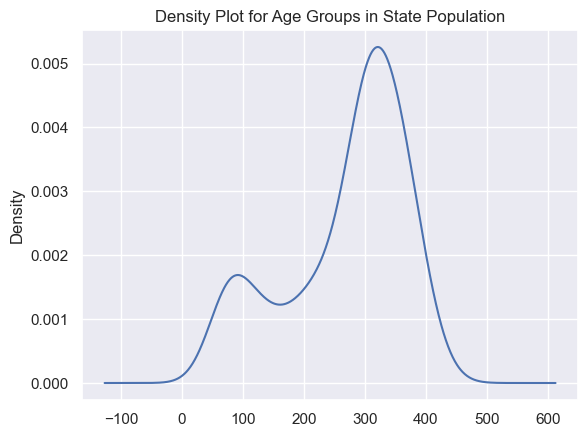

In [130]:
popc_rs_bs_ag_r.VALUE.plot(kind="kde",title ="Density Plot for Age Groups in State Population")
plt.show()
# popc_rs_bs_ag_r.groupby("sex_id").age_id.plot(kind='kde')


# ax = sns.histplot(popc_rs_bs_ag_r.VALUE,
#                   kde=True,
#                   color ='green')
# ax.set(xlabel='Population VALUE', ylabel='Age Groups', title ='age_id Histogram')

In [131]:
popc_rs_bs_ag_r

STATISTIC Label  Year          Age Group  \
0     Estimated Population (Persons in April)  2011        0 - 4 years   
27    Estimated Population (Persons in April)  2011        5 - 9 years   
54    Estimated Population (Persons in April)  2011      10 - 14 years   
81    Estimated Population (Persons in April)  2011      15 - 19 years   
108   Estimated Population (Persons in April)  2011      20 - 24 years   
...                                       ...   ...                ...   
6507  Estimated Population (Persons in April)  2023      65 - 69 years   
6534  Estimated Population (Persons in April)  2023      70 - 74 years   
6561  Estimated Population (Persons in April)  2023      75 - 79 years   
6588  Estimated Population (Persons in April)  2023      80 - 84 years   
6615  Estimated Population (Persons in April)  2023  85 years and over   

             Sex Region      UNIT  VALUE  sex_id  age_id  region_id  
0     Both sexes  State  Thousand  356.0       3       1          1  
27    Both sexes  State  Thousand  319.6       3       2          1  
54    Both sexes  State  Thousand  301.0       3       3          1  
81    Both sexes  State  Thousand  281.0       3       4          1  
108   Both sexes  State  Thousand  298.6       3       5          1  
...          ...    ...       ...    ...     ...     ...        ...  
6507  Both sexes  State  Thousand  244.8       3      14          1  
6534  Both sexes  State  Thousand  210.5       3      15          1  
6561  Both sexes  State  Thousand  162.1       3      16          1  
6588  Both sexes  State  Thousand  101.8       3      17          1  
6615  Both sexes  State  Thousand   87.1       3      18          1  

[234 rows x 10 columns]

[Text(0.5, 0, 'Population VALUE'),
 Text(0, 0.5, 'Age Groups'),
 Text(0.5, 1.0, 'Histogram Plot for Age Groups in State Population')]

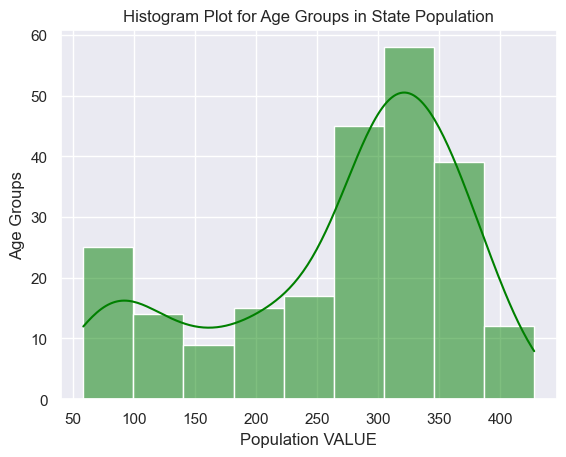

In [132]:
ax = sns.histplot(popc_rs_bs_ag_r.VALUE,
                  kde=True,
                  color ='green')
ax.set(xlabel='Population VALUE',
       ylabel='Age Groups',
       title ='Histogram Plot for Age Groups in State Population')

In [133]:
# Remove Region = State
popc_aa_sb_r = popc.loc[popc["Region"] != "State",]
# Remove individual Age Groups
popc_aa_sb_r = popc_aa_sb_r.loc[popc_aa_sb_r["Age Group"] == "All ages",]
# Remove "both sexes" Sex Group
popc_aa_sb_r = popc_aa_sb_r.loc[popc_aa_sb_r["Sex"] == "Both sexes",]
popc_aa_sb_r.head(10)






STATISTIC Label  Year Age Group         Sex  \
487   Estimated Population (Persons in April)  2011  All ages  Both sexes   
488   Estimated Population (Persons in April)  2011  All ages  Both sexes   
489   Estimated Population (Persons in April)  2011  All ages  Both sexes   
490   Estimated Population (Persons in April)  2011  All ages  Both sexes   
491   Estimated Population (Persons in April)  2011  All ages  Both sexes   
492   Estimated Population (Persons in April)  2011  All ages  Both sexes   
493   Estimated Population (Persons in April)  2011  All ages  Both sexes   
494   Estimated Population (Persons in April)  2011  All ages  Both sexes   
1000  Estimated Population (Persons in April)  2012  All ages  Both sexes   
1001  Estimated Population (Persons in April)  2012  All ages  Both sexes   

          Region      UNIT   VALUE  sex_id  age_id  region_id  
487       Border  Thousand   391.9       3      19          2  
488         West  Thousand   440.8       3      19          3  
489     Mid-West  Thousand   466.8       3      19          4  
490   South-East  Thousand   410.3       3      19          5  
491   South-West  Thousand   662.3       3      19          6  
492       Dublin  Thousand  1261.5       3      19          7  
493     Mid-East  Thousand   657.4       3      19          8  
494      Midland  Thousand   283.8       3      19          9  
1000      Border  Thousand   392.1       3      19          2  
1001        West  Thousand   439.4       3      19          3

[Text(0.5, 0, 'Population VALUE'),
 Text(0, 0.5, 'Regions'),
 Text(0.5, 1.0, 'Region Histogram')]

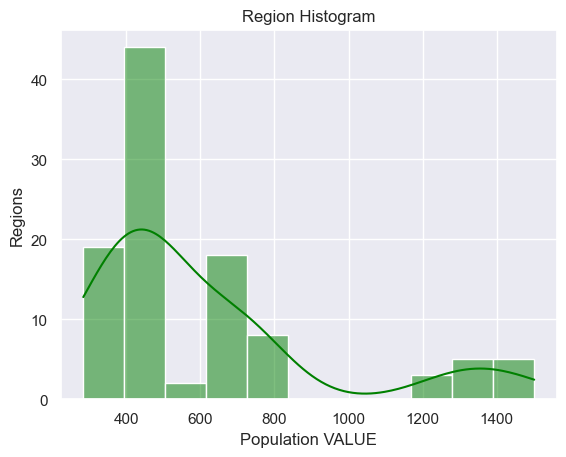

In [134]:

ax = sns.histplot(popc_aa_sb_r.VALUE,
                  kde=True,
                  color ='green')
ax.set(xlabel='Population VALUE',
       ylabel='Regions',
       title ='Region Histogram')

In [135]:
# Remove Region = State
popc_aa_sb_r2 = popc.loc[popc["Region"] != "State",]
# Remove Region = Dublin
popc_aa_sb_r2 = popc_aa_sb_r2.loc[popc["Region"] != "Dublin",]

# Remove individual Age Groups
popc_aa_sb_r2 = popc_aa_sb_r2.loc[popc_aa_sb_r2["Age Group"] == "All ages",]
# Remove "both sexes" Sex Group
popc_aa_sb_r2 = popc_aa_sb_r2.loc[popc_aa_sb_r2["Sex"] == "Both sexes",]
popc_aa_sb_r2.head(10)

STATISTIC Label  Year Age Group         Sex  \
487   Estimated Population (Persons in April)  2011  All ages  Both sexes   
488   Estimated Population (Persons in April)  2011  All ages  Both sexes   
489   Estimated Population (Persons in April)  2011  All ages  Both sexes   
490   Estimated Population (Persons in April)  2011  All ages  Both sexes   
491   Estimated Population (Persons in April)  2011  All ages  Both sexes   
493   Estimated Population (Persons in April)  2011  All ages  Both sexes   
494   Estimated Population (Persons in April)  2011  All ages  Both sexes   
1000  Estimated Population (Persons in April)  2012  All ages  Both sexes   
1001  Estimated Population (Persons in April)  2012  All ages  Both sexes   
1002  Estimated Population (Persons in April)  2012  All ages  Both sexes   

          Region      UNIT  VALUE  sex_id  age_id  region_id  
487       Border  Thousand  391.9       3      19          2  
488         West  Thousand  440.8       3      19          3  
489     Mid-West  Thousand  466.8       3      19          4  
490   South-East  Thousand  410.3       3      19          5  
491   South-West  Thousand  662.3       3      19          6  
493     Mid-East  Thousand  657.4       3      19          8  
494      Midland  Thousand  283.8       3      19          9  
1000      Border  Thousand  392.1       3      19          2  
1001        West  Thousand  439.4       3      19          3  
1002    Mid-West  Thousand  470.6       3      19          4

[Text(0.5, 0, 'Population VALUE'),
 Text(0, 0.5, 'Regions'),
 Text(0.5, 1.0, 'Region Histogram')]

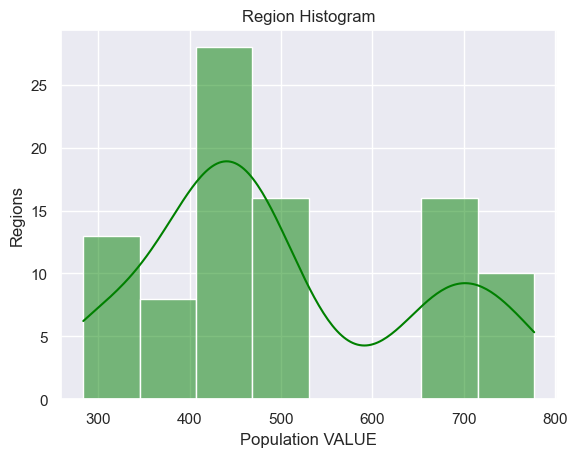

In [136]:

ax = sns.histplot(popc_aa_sb_r2.VALUE,
                  kde=True,
                  color ='green')
ax.set(xlabel='Population VALUE', ylabel='Regions', title ='Region Histogram')

In [137]:
#popc_rs_bs_ag = popc_rs_bs_ag.loc[popc_rs_bs_ag["Age Group"] != "All ages",]
popc_rs_bs_ag_1 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 1,]
popc_rs_bs_ag_2 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 2,]
popc_rs_bs_ag_3 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 3,]
popc_rs_bs_ag_4 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 4,]
popc_rs_bs_ag_5 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 5,]
popc_rs_bs_ag_6 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 6,]
popc_rs_bs_ag_7 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 7,]
popc_rs_bs_ag_8 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 8,]
popc_rs_bs_ag_9 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 9,]
popc_rs_bs_ag_10 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 10,]
popc_rs_bs_ag_11 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 11,]
popc_rs_bs_ag_12 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 12,]
popc_rs_bs_ag_13 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 13,]
popc_rs_bs_ag_14 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 14,]
popc_rs_bs_ag_15 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 15,]
popc_rs_bs_ag_16 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 16,]
popc_rs_bs_ag_17 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 17,]
popc_rs_bs_ag_18 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 18,]
popc_rs_bs_ag_19 = popc_rs_bs_ag.loc[popc_rs_bs_ag["age_id"] == 19,]

In [138]:
popc_rs_bs_ag_1 = popc_rs_bs_ag_1.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_2 = popc_rs_bs_ag_2.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_3 = popc_rs_bs_ag_3.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_4 = popc_rs_bs_ag_4.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_5 = popc_rs_bs_ag_5.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_6 = popc_rs_bs_ag_6.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_7 = popc_rs_bs_ag_7.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_8 = popc_rs_bs_ag_8.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_9 = popc_rs_bs_ag_9.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_10 = popc_rs_bs_ag_10.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_11 = popc_rs_bs_ag_11.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_12 = popc_rs_bs_ag_12.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_13 = popc_rs_bs_ag_13.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_14 = popc_rs_bs_ag_14.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_15 = popc_rs_bs_ag_15.groupby(["Age Group","Year"])[["VALUE"]].sum() 
popc_rs_bs_ag_16 = popc_rs_bs_ag_16.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_17 = popc_rs_bs_ag_17.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_18 = popc_rs_bs_ag_18.groupby(["Age Group","Year"])[["VALUE"]].sum()
popc_rs_bs_ag_19 = popc_rs_bs_ag_19.groupby(["Age Group","Year"])[["VALUE"]].sum()


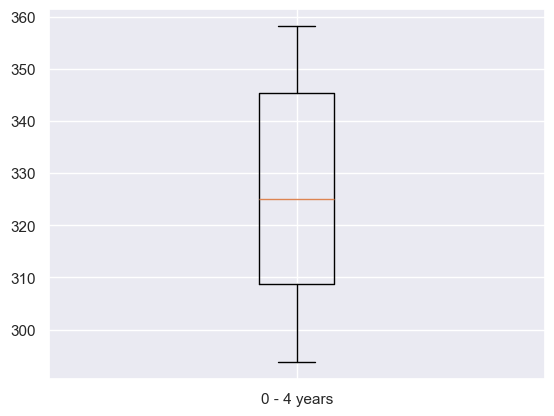

In [139]:
plt.boxplot(popc_rs_bs_ag_1["VALUE"],data=popc_rs_bs_ag_1,
           labels=["0 - 4 years"])
plt.show()

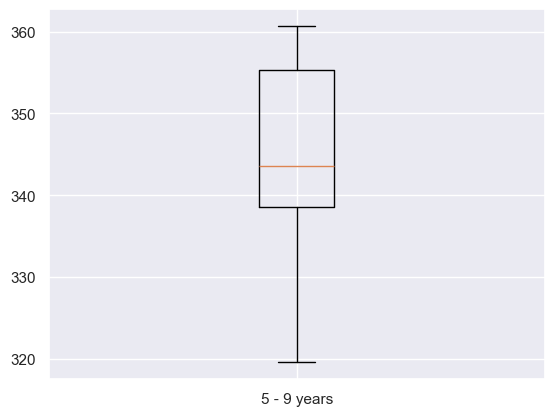

In [140]:
plt.boxplot(popc_rs_bs_ag_2["VALUE"],data=popc_rs_bs_ag_2,
           labels=["5 - 9 years"])
plt.show()

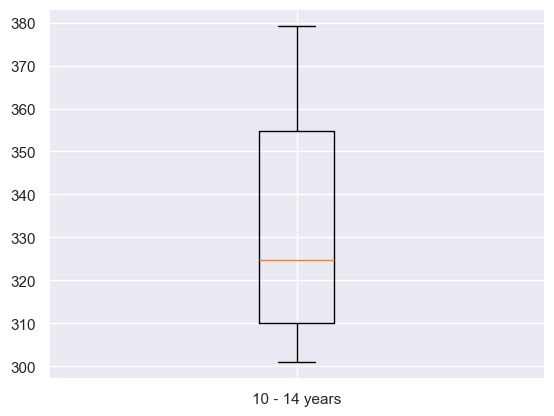

In [141]:
plt.boxplot(popc_rs_bs_ag_3["VALUE"],data=popc_rs_bs_ag_3,
           labels=["10 - 14 years"])
plt.show()

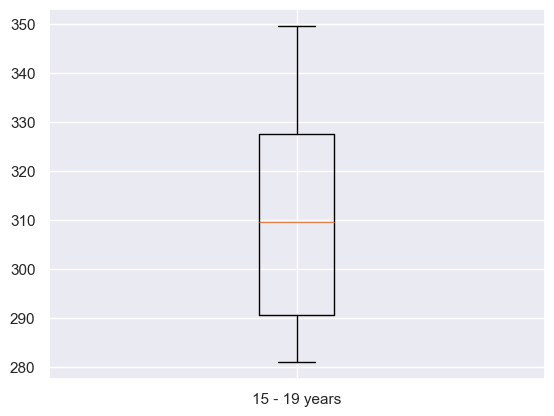

In [142]:
plt.boxplot(popc_rs_bs_ag_4["VALUE"],data=popc_rs_bs_ag_4,
           labels=["15 - 19 years"])
plt.show()

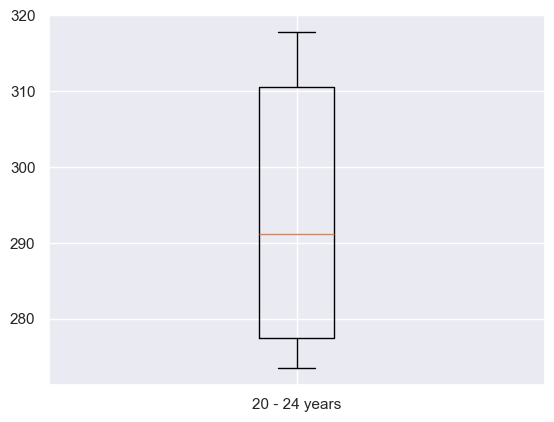

In [143]:
plt.boxplot(popc_rs_bs_ag_5["VALUE"],data=popc_rs_bs_ag_5,
           labels=["20 - 24 years"])
plt.show()

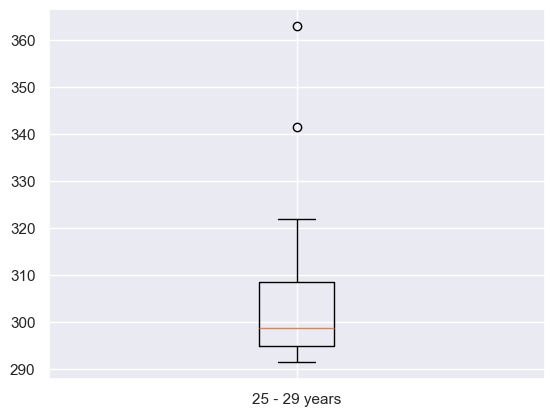

In [144]:
plt.boxplot(popc_rs_bs_ag_6["VALUE"],data=popc_rs_bs_ag_6,
           labels=["25 - 29 years"])
plt.show()

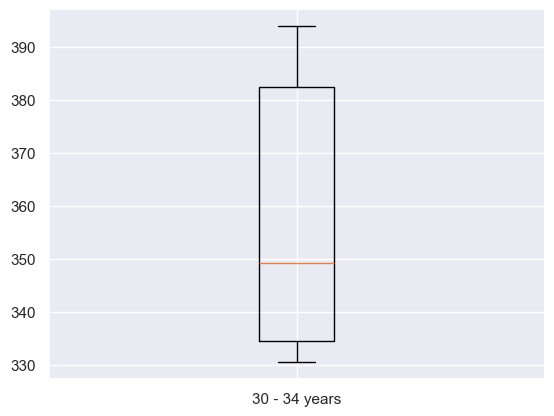

In [145]:
plt.boxplot(popc_rs_bs_ag_7["VALUE"],data=popc_rs_bs_ag_7,
           labels=["30 - 34 years"])
plt.show()

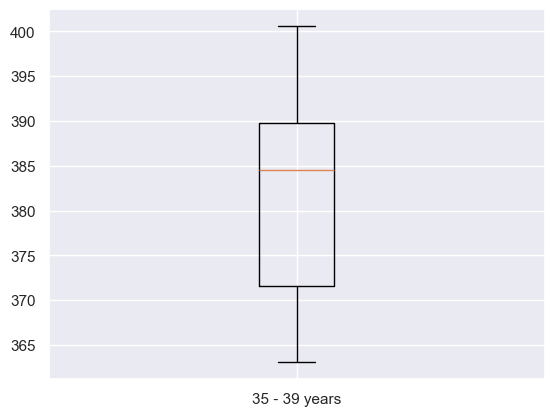

In [146]:
plt.boxplot(popc_rs_bs_ag_8["VALUE"],data=popc_rs_bs_ag_8,
           labels=["35 - 39 years"])
plt.show()

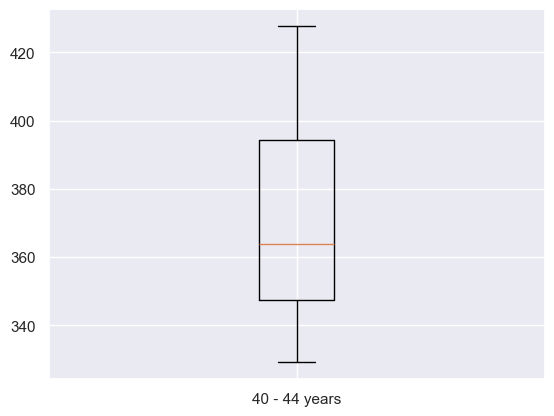

In [147]:
plt.boxplot(popc_rs_bs_ag_9["VALUE"],data=popc_rs_bs_ag_9,
           labels=["40 - 44 years"])
plt.show()

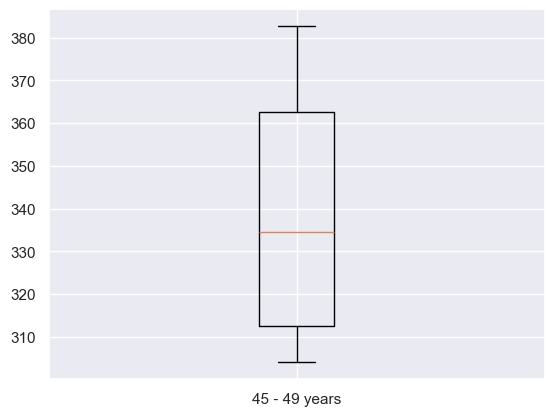

In [148]:
plt.boxplot(popc_rs_bs_ag_10["VALUE"],data=popc_rs_bs_ag_10,
           labels=["45 - 49 years"])
plt.show()

                    VALUE
Age Group     Year       
50 - 54 years 2011  273.7


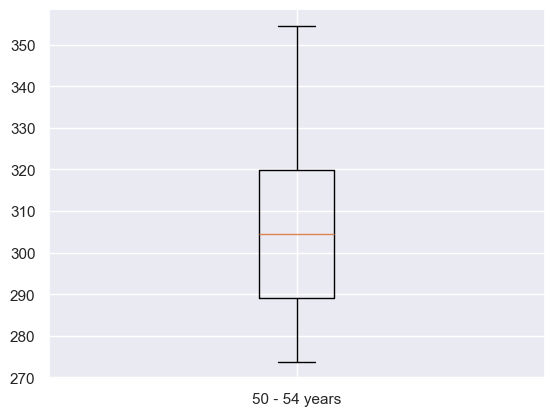

In [149]:
print(popc_rs_bs_ag_11.head(1))
plt.boxplot(popc_rs_bs_ag_11["VALUE"],data=popc_rs_bs_ag_12,
           labels=["50 - 54 years"])
plt.show()

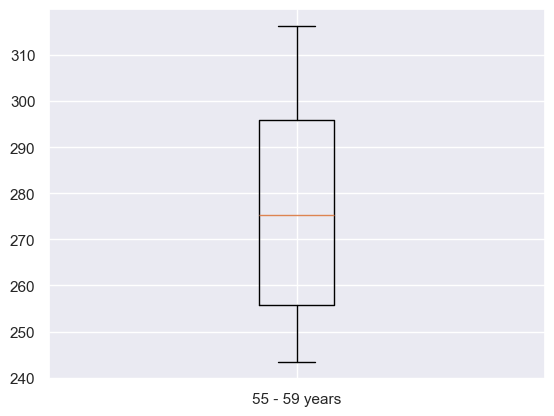

In [150]:
plt.boxplot(popc_rs_bs_ag_12["VALUE"],data=popc_rs_bs_ag_12,
           labels=["55 - 59 years"])
plt.show()

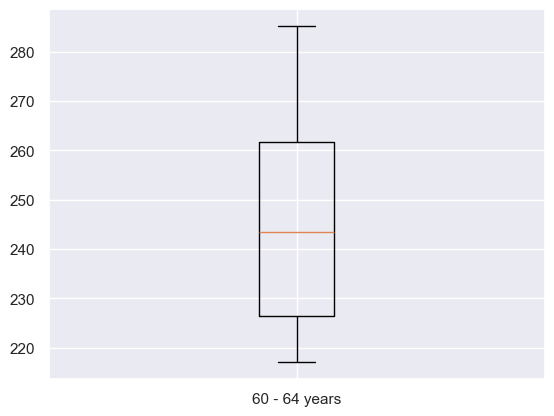

In [151]:
plt.boxplot(popc_rs_bs_ag_13["VALUE"],data=popc_rs_bs_ag_13,
           labels=["60 - 64 years"])
plt.show()

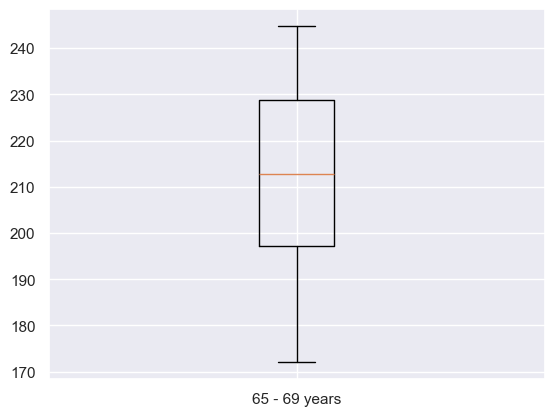

In [152]:
plt.boxplot(popc_rs_bs_ag_14["VALUE"],data=popc_rs_bs_ag_14,
           labels=["65 - 69 years"])
plt.show()

                    VALUE
Age Group     Year       
70 - 74 years 2011  130.1


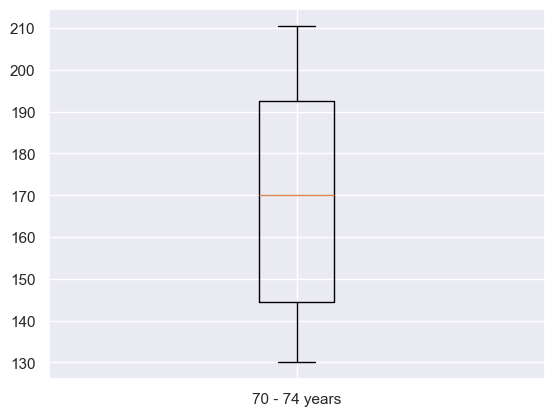

In [153]:

print(popc_rs_bs_ag_15.head(1))
plt.boxplot(popc_rs_bs_ag_15["VALUE"],data=popc_rs_bs_ag_15,
           labels=["70 - 74 years"])
plt.show()

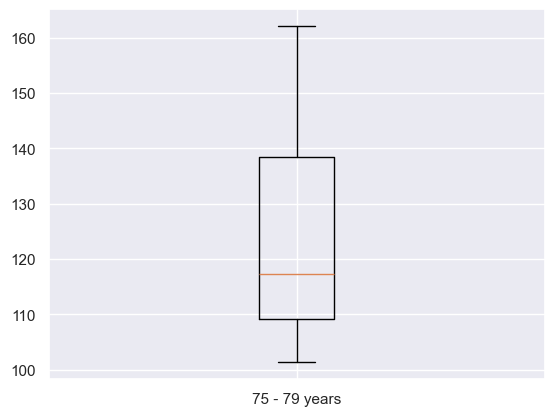

In [154]:
plt.boxplot(popc_rs_bs_ag_16["VALUE"],data=popc_rs_bs_ag_16,
           labels=["75 - 79 years"])
plt.show()

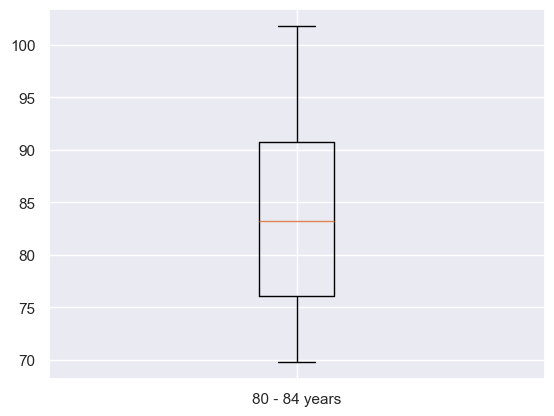

In [155]:
plt.boxplot(popc_rs_bs_ag_17["VALUE"],data=popc_rs_bs_ag_17,
           labels=["80 - 84 years"])
plt.show()

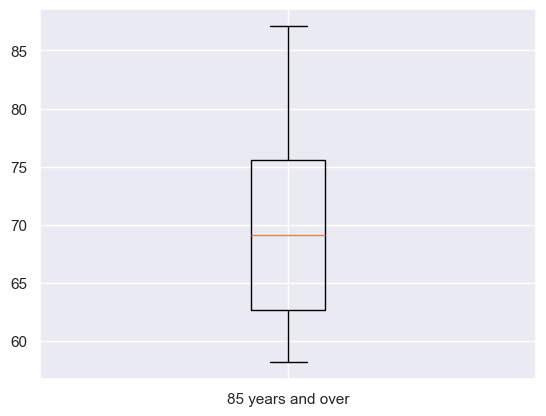

In [156]:
plt.boxplot(popc_rs_bs_ag_18["VALUE"],data=popc_rs_bs_ag_18,
           labels=["85 years and over"])
plt.show()

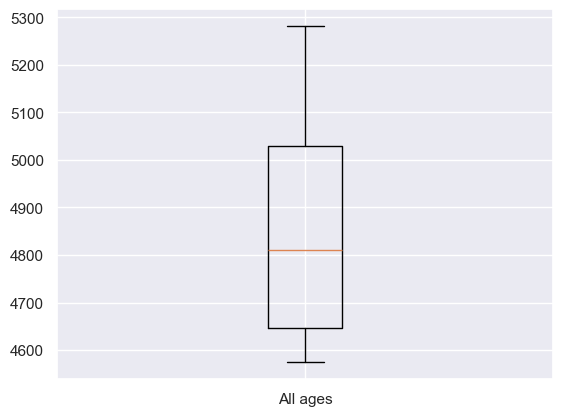

In [157]:
plt.boxplot(popc_rs_bs_ag_19["VALUE"],data=popc_rs_bs_ag_19,
           labels=["All ages"])
plt.show()

# Descriptive Statistics

In [158]:
popc.head(20)

STATISTIC Label  Year    Age Group         Sex  \
0   Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
1   Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
2   Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
3   Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
4   Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
5   Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
6   Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
7   Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
8   Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
9   Estimated Population (Persons in April)  2011  0 - 4 years        Male   
10  Estimated Population (Persons in April)  2011  0 - 4 years        Male   
11  Estimated Population (Persons in April)  2011  0 - 4 years        Male   
12  Estimated Population (Persons in April)  2011  0 - 4 years        Male   
13  Estimated Population (Persons in April)  2011  0 - 4 years        Male   
14  Estimated Population (Persons in April)  2011  0 - 4 years        Male   
15  Estimated Population (Persons in April)  2011  0 - 4 years        Male   
16  Estimated Population (Persons in April)  2011  0 - 4 years        Male   
17  Estimated Population (Persons in April)  2011  0 - 4 years        Male   
18  Estimated Population (Persons in April)  2011  0 - 4 years      Female   
19  Estimated Population (Persons in April)  2011  0 - 4 years      Female   

        Region      UNIT  VALUE  sex_id  age_id  region_id  
0        State  Thousand  356.0       3       1          1  
1       Border  Thousand   30.7       3       1          2  
2         West  Thousand   32.6       3       1          3  
3     Mid-West  Thousand   35.0       3       1          4  
4   South-East  Thousand   32.0       3       1          5  
5   South-West  Thousand   50.1       3       1          6  
6       Dublin  Thousand   93.3       3       1          7  
7     Mid-East  Thousand   58.5       3       1          8  
8      Midland  Thousand   23.9       3       1          9  
9        State  Thousand  182.0       1       1          1  
10      Border  Thousand   15.8       1       1          2  
11        West  Thousand   16.6       1       1          3  
12    Mid-West  Thousand   18.0       1       1          4  
13  South-East  Thousand   16.4       1       1          5  
14  South-West  Thousand   25.5       1       1          6  
15      Dublin  Thousand   47.6       1       1          7  
16    Mid-East  Thousand   29.7       1       1          8  
17     Midland  Thousand   12.3       1       1          9  
18       State  Thousand  174.1       2       1          1  
19      Border  Thousand   15.0       2       1          2

In [159]:
# Remove Region = State
# popc_aa_sb = popc.loc[popc["Region"] != "State",]
# Remove individual Age Groups
popc_aa_sb = popc.loc[popc["Age Group"] == "All ages",]
# Remove "both sexes" Sex Group
popc_aa_sb = popc_aa_sb.loc[popc_aa_sb["Sex"] == "Both sexes",]
popc_aa_sb.head(10)

STATISTIC Label  Year Age Group         Sex  \
486  Estimated Population (Persons in April)  2011  All ages  Both sexes   
487  Estimated Population (Persons in April)  2011  All ages  Both sexes   
488  Estimated Population (Persons in April)  2011  All ages  Both sexes   
489  Estimated Population (Persons in April)  2011  All ages  Both sexes   
490  Estimated Population (Persons in April)  2011  All ages  Both sexes   
491  Estimated Population (Persons in April)  2011  All ages  Both sexes   
492  Estimated Population (Persons in April)  2011  All ages  Both sexes   
493  Estimated Population (Persons in April)  2011  All ages  Both sexes   
494  Estimated Population (Persons in April)  2011  All ages  Both sexes   
999  Estimated Population (Persons in April)  2012  All ages  Both sexes   

         Region      UNIT   VALUE  sex_id  age_id  region_id  
486       State  Thousand  4574.9       3      19          1  
487      Border  Thousand   391.9       3      19          2  
488        West  Thousand   440.8       3      19          3  
489    Mid-West  Thousand   466.8       3      19          4  
490  South-East  Thousand   410.3       3      19          5  
491  South-West  Thousand   662.3       3      19          6  
492      Dublin  Thousand  1261.5       3      19          7  
493    Mid-East  Thousand   657.4       3      19          8  
494     Midland  Thousand   283.8       3      19          9  
999       State  Thousand  4593.7       3      19          1

In [160]:
# Reduce to year = 2023
popc_aa_sb_2023 = popc_aa_sb.loc[popc_aa_sb["Year"] == 2023,]
popc_aa_sb_2023.head(20)

STATISTIC Label  Year Age Group         Sex  \
6642  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6643  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6644  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6645  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6646  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6647  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6648  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6649  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6650  Estimated Population (Persons in April)  2023  All ages  Both sexes   

          Region      UNIT   VALUE  sex_id  age_id  region_id  
6642       State  Thousand  5281.6       3      19          1  
6643      Border  Thousand   432.1       3      19          2  
6644        West  Thousand   500.8       3      19          3  
6645    Mid-West  Thousand   519.6       3      19          4  
6646  South-East  Thousand   468.6       3      19          5  
6647  South-West  Thousand   757.4       3      19          6  
6648      Dublin  Thousand  1501.5       3      19          7  
6649    Mid-East  Thousand   777.1       3      19          8  
6650     Midland  Thousand   324.6       3      19          9

In [161]:
total_pop = []
for row in popc_aa_sb_2023['Year']:
    if row ==2023: total_pop.append("5281.6")
    else: total_pop.append('Unknown')

popc_aa_sb_2023['total_pop'] = total_pop
popc_aa_sb_2023['total_pop'] = pd.to_numeric(popc_aa_sb_2023['total_pop'])
popc_aa_sb_2023


STATISTIC Label  Year Age Group         Sex  \
6642  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6643  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6644  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6645  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6646  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6647  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6648  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6649  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6650  Estimated Population (Persons in April)  2023  All ages  Both sexes   

          Region      UNIT   VALUE  sex_id  age_id  region_id  total_pop  
6642       State  Thousand  5281.6       3      19          1     5281.6  
6643      Border  Thousand   432.1       3      19          2     5281.6  
6644        West  Thousand   500.8       3      19          3     5281.6  
6645    Mid-West  Thousand   519.6       3      19          4     5281.6  
6646  South-East  Thousand   468.6       3      19          5     5281.6  
6647  South-West  Thousand   757.4       3      19          6     5281.6  
6648      Dublin  Thousand  1501.5       3      19          7     5281.6  
6649    Mid-East  Thousand   777.1       3      19          8     5281.6  
6650     Midland  Thousand   324.6       3      19          9     5281.6

In [162]:
pc_total = []
for row in popc_aa_sb_2023['Year']:
    if row ==2023: pc_total.append("5281.6")
    else: pc_total.append('Unknown')

popc_aa_sb_2023['pc_total'] = popc_aa_sb_2023["VALUE"] /popc_aa_sb_2023["total_pop"]
popc_aa_sb_2023['pc_total'] = pd.to_numeric(popc_aa_sb_2023['pc_total'])
popc_aa_sb_2023


STATISTIC Label  Year Age Group         Sex  \
6642  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6643  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6644  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6645  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6646  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6647  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6648  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6649  Estimated Population (Persons in April)  2023  All ages  Both sexes   
6650  Estimated Population (Persons in April)  2023  All ages  Both sexes   

          Region      UNIT   VALUE  sex_id  age_id  region_id  total_pop  \
6642       State  Thousand  5281.6       3      19          1     5281.6   
6643      Border  Thousand   432.1       3      19          2     5281.6   
6644        West  Thousand   500.8       3      19          3     5281.6   
6645    Mid-West  Thousand   519.6       3      19          4     5281.6   
6646  South-East  Thousand   468.6       3      19          5     5281.6   
6647  South-West  Thousand   757.4       3      19          6     5281.6   
6648      Dublin  Thousand  1501.5       3      19          7     5281.6   
6649    Mid-East  Thousand   777.1       3      19          8     5281.6   
6650     Midland  Thousand   324.6       3      19          9     5281.6   

      pc_total  
6642  1.000000  
6643  0.081812  
6644  0.094820  
6645  0.098379  
6646  0.088723  
6647  0.143404  
6648  0.284289  
6649  0.147133  
6650  0.061459

In [163]:
# Remove Region = State
# popc_aa_sb = popc.loc[popc["Region"] != "State",]
# Remove individual Age Groups
popc_aa_ra = popc.loc[popc["Age Group"] == "All ages",]
# Remove "both sexes" Sex Group
popc_aa_ra = popc_aa_ra.loc[popc_aa_ra["Sex"] != "Both sexes",]
popc_aa_ra_2023 = popc_aa_ra.loc[popc_aa_ra["Year"] == 2023,]

popc_aa_ra_2023.head(50)

STATISTIC Label  Year Age Group     Sex  \
6651  Estimated Population (Persons in April)  2023  All ages    Male   
6652  Estimated Population (Persons in April)  2023  All ages    Male   
6653  Estimated Population (Persons in April)  2023  All ages    Male   
6654  Estimated Population (Persons in April)  2023  All ages    Male   
6655  Estimated Population (Persons in April)  2023  All ages    Male   
6656  Estimated Population (Persons in April)  2023  All ages    Male   
6657  Estimated Population (Persons in April)  2023  All ages    Male   
6658  Estimated Population (Persons in April)  2023  All ages    Male   
6659  Estimated Population (Persons in April)  2023  All ages    Male   
6660  Estimated Population (Persons in April)  2023  All ages  Female   
6661  Estimated Population (Persons in April)  2023  All ages  Female   
6662  Estimated Population (Persons in April)  2023  All ages  Female   
6663  Estimated Population (Persons in April)  2023  All ages  Female   
6664  Estimated Population (Persons in April)  2023  All ages  Female   
6665  Estimated Population (Persons in April)  2023  All ages  Female   
6666  Estimated Population (Persons in April)  2023  All ages  Female   
6667  Estimated Population (Persons in April)  2023  All ages  Female   
6668  Estimated Population (Persons in April)  2023  All ages  Female   

          Region      UNIT   VALUE  sex_id  age_id  region_id  
6651       State  Thousand  2606.2       1      19          1  
6652      Border  Thousand   214.9       1      19          2  
6653        West  Thousand   247.9       1      19          3  
6654    Mid-West  Thousand   255.7       1      19          4  
6655  South-East  Thousand   231.1       1      19          5  
6656  South-West  Thousand   373.6       1      19          6  
6657      Dublin  Thousand   735.8       1      19          7  
6658    Mid-East  Thousand   385.8       1      19          8  
6659     Midland  Thousand   161.3       1      19          9  
6660       State  Thousand  2675.4       2      19          1  
6661      Border  Thousand   217.2       2      19          2  
6662        West  Thousand   252.9       2      19          3  
6663    Mid-West  Thousand   263.9       2      19          4  
6664  South-East  Thousand   237.5       2      19          5  
6665  South-West  Thousand   383.8       2      19          6  
6666      Dublin  Thousand   765.6       2      19          7  
6667    Mid-East  Thousand   391.3       2      19          8  
6668     Midland  Thousand   163.2       2      19          9

In [164]:
total_pop = []
for row in popc_aa_ra_2023['Year']:
    if row ==2023: total_pop.append("5281.6")
    else: total_pop.append('Unknown')

popc_aa_ra_2023['total_pop'] = total_pop
popc_aa_ra_2023['total_pop'] = pd.to_numeric(popc_aa_ra_2023['total_pop'])
popc_aa_ra_2023

STATISTIC Label  Year Age Group     Sex  \
6651  Estimated Population (Persons in April)  2023  All ages    Male   
6652  Estimated Population (Persons in April)  2023  All ages    Male   
6653  Estimated Population (Persons in April)  2023  All ages    Male   
6654  Estimated Population (Persons in April)  2023  All ages    Male   
6655  Estimated Population (Persons in April)  2023  All ages    Male   
6656  Estimated Population (Persons in April)  2023  All ages    Male   
6657  Estimated Population (Persons in April)  2023  All ages    Male   
6658  Estimated Population (Persons in April)  2023  All ages    Male   
6659  Estimated Population (Persons in April)  2023  All ages    Male   
6660  Estimated Population (Persons in April)  2023  All ages  Female   
6661  Estimated Population (Persons in April)  2023  All ages  Female   
6662  Estimated Population (Persons in April)  2023  All ages  Female   
6663  Estimated Population (Persons in April)  2023  All ages  Female   
6664  Estimated Population (Persons in April)  2023  All ages  Female   
6665  Estimated Population (Persons in April)  2023  All ages  Female   
6666  Estimated Population (Persons in April)  2023  All ages  Female   
6667  Estimated Population (Persons in April)  2023  All ages  Female   
6668  Estimated Population (Persons in April)  2023  All ages  Female   

          Region      UNIT   VALUE  sex_id  age_id  region_id  total_pop  
6651       State  Thousand  2606.2       1      19          1     5281.6  
6652      Border  Thousand   214.9       1      19          2     5281.6  
6653        West  Thousand   247.9       1      19          3     5281.6  
6654    Mid-West  Thousand   255.7       1      19          4     5281.6  
6655  South-East  Thousand   231.1       1      19          5     5281.6  
6656  South-West  Thousand   373.6       1      19          6     5281.6  
6657      Dublin  Thousand   735.8       1      19          7     5281.6  
6658    Mid-East  Thousand   385.8       1      19          8     5281.6  
6659     Midland  Thousand   161.3       1      19          9     5281.6  
6660       State  Thousand  2675.4       2      19          1     5281.6  
6661      Border  Thousand   217.2       2      19          2     5281.6  
6662        West  Thousand   252.9       2      19          3     5281.6  
6663    Mid-West  Thousand   263.9       2      19          4     5281.6  
6664  South-East  Thousand   237.5       2      19          5     5281.6  
6665  South-West  Thousand   383.8       2      19          6     5281.6  
6666      Dublin  Thousand   765.6       2      19          7     5281.6  
6667    Mid-East  Thousand   391.3       2      19          8     5281.6  
6668     Midland  Thousand   163.2       2      19          9     5281.6

In [165]:
popc_aa_ra_2023_region_total = popc_aa_ra_2023.groupby(["Region"])[["VALUE"]].sum()
    
# popc_aa_r2_year = popc_aa_r2.groupby(["Year"])[["VALUE"]].sum()
# popc_aa_r2_year

popc_aa_ra_2023_region_total

VALUE
Region            
Border       432.1
Dublin      1501.4
Mid-East     777.1
Mid-West     519.6
Midland      324.5
South-East   468.6
South-West   757.4
State       5281.6
West         500.8

In [166]:
popc_aa_ra_2023 = popc_aa_ra_2023.merge(popc_aa_ra_2023_region_total,left_on="Region",right_on="Region")
popc_aa_ra_2023 = popc_aa_ra_2023.rename(columns={'VALUE_x': 'VALUE', 'VALUE_y': 'total_region'})
popc_aa_ra_2023

STATISTIC Label  Year Age Group     Sex  \
0   Estimated Population (Persons in April)  2023  All ages    Male   
1   Estimated Population (Persons in April)  2023  All ages  Female   
2   Estimated Population (Persons in April)  2023  All ages    Male   
3   Estimated Population (Persons in April)  2023  All ages  Female   
4   Estimated Population (Persons in April)  2023  All ages    Male   
5   Estimated Population (Persons in April)  2023  All ages  Female   
6   Estimated Population (Persons in April)  2023  All ages    Male   
7   Estimated Population (Persons in April)  2023  All ages  Female   
8   Estimated Population (Persons in April)  2023  All ages    Male   
9   Estimated Population (Persons in April)  2023  All ages  Female   
10  Estimated Population (Persons in April)  2023  All ages    Male   
11  Estimated Population (Persons in April)  2023  All ages  Female   
12  Estimated Population (Persons in April)  2023  All ages    Male   
13  Estimated Population (Persons in April)  2023  All ages  Female   
14  Estimated Population (Persons in April)  2023  All ages    Male   
15  Estimated Population (Persons in April)  2023  All ages  Female   
16  Estimated Population (Persons in April)  2023  All ages    Male   
17  Estimated Population (Persons in April)  2023  All ages  Female   

        Region      UNIT   VALUE  sex_id  age_id  region_id  total_pop  \
0        State  Thousand  2606.2       1      19          1     5281.6   
1        State  Thousand  2675.4       2      19          1     5281.6   
2       Border  Thousand   214.9       1      19          2     5281.6   
3       Border  Thousand   217.2       2      19          2     5281.6   
4         West  Thousand   247.9       1      19          3     5281.6   
5         West  Thousand   252.9       2      19          3     5281.6   
6     Mid-West  Thousand   255.7       1      19          4     5281.6   
7     Mid-West  Thousand   263.9       2      19          4     5281.6   
8   South-East  Thousand   231.1       1      19          5     5281.6   
9   South-East  Thousand   237.5       2      19          5     5281.6   
10  South-West  Thousand   373.6       1      19          6     5281.6   
11  South-West  Thousand   383.8       2      19          6     5281.6   
12      Dublin  Thousand   735.8       1      19          7     5281.6   
13      Dublin  Thousand   765.6       2      19          7     5281.6   
14    Mid-East  Thousand   385.8       1      19          8     5281.6   
15    Mid-East  Thousand   391.3       2      19          8     5281.6   
16     Midland  Thousand   161.3       1      19          9     5281.6   
17     Midland  Thousand   163.2       2      19          9     5281.6   

    total_region  
0         5281.6  
1         5281.6  
2          432.1  
3          432.1  
4          500.8  
5          500.8  
6          519.6  
7          519.6  
8          468.6  
9          468.6  
10         757.4  
11         757.4  
12        1501.4  
13        1501.4  
14         777.1  
15         777.1  
16         324.5  
17         324.5

In [167]:
pc_total_reg = []
for row in popc_aa_ra_2023['Region']:
    if row =="State": pc_total_reg.append("5281.6")
    if row =="Border": pc_total_reg.append("432.1")
    if row =="West": pc_total_reg.append("500.8")
    if row =="Mid-West": pc_total_reg.append("519.6")
    if row =="South-East": pc_total_reg.append("468.6")
    if row =="South-West": pc_total_reg.append("757.4")
    if row =="Dublin": pc_total_reg.append("1501.4")
    if row =="Mid-East": pc_total_reg.append("777.1")
    if row =="Midland": pc_total_reg.append("324.5")
    else: pc_total_reg.append("0")

popc_aa_ra_2023["pc_total_reg"] = popc_aa_ra_2023["VALUE"] /popc_aa_ra_2023["total_region"]
popc_aa_ra_2023["pc_total_reg"] = pd.to_numeric(popc_aa_ra_2023["pc_total_reg"])
popc_aa_ra_2023




STATISTIC Label  Year Age Group     Sex  \
0   Estimated Population (Persons in April)  2023  All ages    Male   
1   Estimated Population (Persons in April)  2023  All ages  Female   
2   Estimated Population (Persons in April)  2023  All ages    Male   
3   Estimated Population (Persons in April)  2023  All ages  Female   
4   Estimated Population (Persons in April)  2023  All ages    Male   
5   Estimated Population (Persons in April)  2023  All ages  Female   
6   Estimated Population (Persons in April)  2023  All ages    Male   
7   Estimated Population (Persons in April)  2023  All ages  Female   
8   Estimated Population (Persons in April)  2023  All ages    Male   
9   Estimated Population (Persons in April)  2023  All ages  Female   
10  Estimated Population (Persons in April)  2023  All ages    Male   
11  Estimated Population (Persons in April)  2023  All ages  Female   
12  Estimated Population (Persons in April)  2023  All ages    Male   
13  Estimated Population (Persons in April)  2023  All ages  Female   
14  Estimated Population (Persons in April)  2023  All ages    Male   
15  Estimated Population (Persons in April)  2023  All ages  Female   
16  Estimated Population (Persons in April)  2023  All ages    Male   
17  Estimated Population (Persons in April)  2023  All ages  Female   

        Region      UNIT   VALUE  sex_id  age_id  region_id  total_pop  \
0        State  Thousand  2606.2       1      19          1     5281.6   
1        State  Thousand  2675.4       2      19          1     5281.6   
2       Border  Thousand   214.9       1      19          2     5281.6   
3       Border  Thousand   217.2       2      19          2     5281.6   
4         West  Thousand   247.9       1      19          3     5281.6   
5         West  Thousand   252.9       2      19          3     5281.6   
6     Mid-West  Thousand   255.7       1      19          4     5281.6   
7     Mid-West  Thousand   263.9       2      19          4     5281.6   
8   South-East  Thousand   231.1       1      19          5     5281.6   
9   South-East  Thousand   237.5       2      19          5     5281.6   
10  South-West  Thousand   373.6       1      19          6     5281.6   
11  South-West  Thousand   383.8       2      19          6     5281.6   
12      Dublin  Thousand   735.8       1      19          7     5281.6   
13      Dublin  Thousand   765.6       2      19          7     5281.6   
14    Mid-East  Thousand   385.8       1      19          8     5281.6   
15    Mid-East  Thousand   391.3       2      19          8     5281.6   
16     Midland  Thousand   161.3       1      19          9     5281.6   
17     Midland  Thousand   163.2       2      19          9     5281.6   

    total_region  pc_total_reg  
0         5281.6      0.493449  
1         5281.6      0.506551  
2          432.1      0.497339  
3          432.1      0.502661  
4          500.8      0.495008  
5          500.8      0.504992  
6          519.6      0.492109  
7          519.6      0.507891  
8          468.6      0.493171  
9          468.6      0.506829  
10         757.4      0.493266  
11         757.4      0.506734  
12        1501.4      0.490076  
13        1501.4      0.509924  
14         777.1      0.496461  
15         777.1      0.503539  
16         324.5      0.497072  
17         324.5      0.502928

# Statistics

## Binomial

### **Scenario 1 : Choose 10 people at random from population in 2023, what is probability that less than 4 of them are from Mid-East**




##### Binomial

This meets the criteria for Binomial Distribution as we have a number of independent Bernoulli Trials. These are trials in which there are only two outcomes, success or failure. The criteria require to use Binomial Distribution are as follows:

1. Set Number of Trials
In this scenario the set number of trials is 10 

2. Trials are independent
In this scenario, the trials will not affect one another and so they are considered independent. If the sample was taken from the same household or family group, then is would not be independent as the respondents have a relationship with each other.

3. Probability of success is constant
In this scenario the probability of success for trial remains the same for each trial. REgardless of the order in which we choose the 10 people, the probability that there is a success i.e. they are from Mid-East, remains the same.

4. Bernoulli Trials i.e a Binary Outcome
In this scenario there are only two possible results - Success r failure i.e. the chose person is either from Mid-East or not. There are no other possible  options within the results gathered

5. The Data is Discrete
In this scenario the data only has values that are specific i.e. 1 person, 2 people, 3 people. It cannot take on any values in between these given discrete values.





**Binomial**

Scenario 1 meets the criteria for Binomial Distribution as set out above.

- n = number of sample i.e. limit
- p = probability of a random element has characteristic or attribute
- q = 1 – p (probability that a random element **doesn't have** the characteristic)

X = From Mid-East

- n = 10
- p = 0.147133 (calcluation inserted below)
- q = 0.852867

**Find:**
P(X < 4)

**Method:**
P(X <4) = P(X<=3)

**Binomial Function = binom.cdf**
cdf = Cumulative Distribution Function
- Provides probability that random variable is less than or equal to the given value X (or "k" in python)

- In this case, seeking P(X <4) which is equal to P(X<=3)
- Therefore k=3


In [168]:

s1_n = 10

#p = P(from Mid-East)
s1_p = popc_aa_sb_2023["pc_total"].loc[popc_aa_sb_2023["Region"]=="Mid-East"].sum()

s1_q = 1-s1_p

# P(X <4) = P(X<=3)
# Therefore cdf function and 
# k=3

s1_X= 3
print(s1_n)
print(s1_p)
print(s1_q)
print(s1_X)

10
0.1471334444107846
0.8528665555892154
3


In [169]:
binom.cdf(k = s1_X,
          n = s1_n,
          p = s1_p)

0.9530384395677051

### The probability that less than 4 of the 10 people chosen at random from the population are from the Mid-East Area, is 95.30%

### **Scenario 2 : - Choose 25 people at random from Dublin Population in 2023, what is probability that exactly 15 of them are Male**

##### Binomial
This Scenario also meets the criteria for Binomial Distribution as set out above.

- n = number of sample i.e. limit
- p = probability of a random element has characteristic or attribute
- q = 1 – p (probability that a random element **doesn't have** the characteristic)


X = Male

- n = 25
- p = 0.490076
- q = 0.509924


**Find:
P(X=15)**


**Method:**

**Binomial Function = binom.pmf**
- pmf = Probability Mass Function
- Provides probability that random variable is equal to the given value X (or "k" in python)

- In this case, seeking P(X=15)
- Therefore k=15


In [170]:
s2_n = 25

#p = P(Male)
s2_p= popc_aa_ra_2023["pc_total_reg"].loc[popc_aa_ra_2023["Region"]=="Dublin"].loc[popc_aa_ra_2023["Sex"]=="Male"].sum()


0.490076

s2_q = 1-s2_p

# P(X=15) 
# Therefore pmf function and 
# k=15

s2_X= 15
print(s2_n)
print(s2_p)
print(s2_q)
print(s2_X)

25
0.49007592913280934
0.5099240708671906
15


In [171]:
binom.pmf(k=s2_X,
          n=s2_n,
          p=s2_p)

0.08777861956160983

##### Result:
The probability that exactly 15 of the 25 people chosen at random from the Dublin population are Male, is 8.78%

By plotting Binomial Distribution for multiple trials of this event, it can
explore how the distribution changes as the number of trials increases.
Generate results based on this trial being completed t times.
Plot 
- t=10
- t=100
- t=1000
- t=10,000
- t=100,000

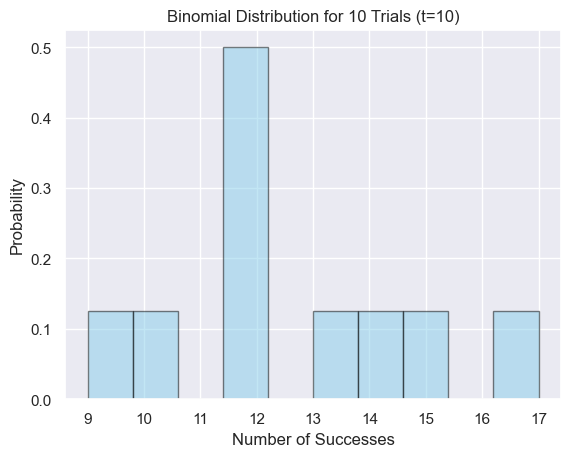

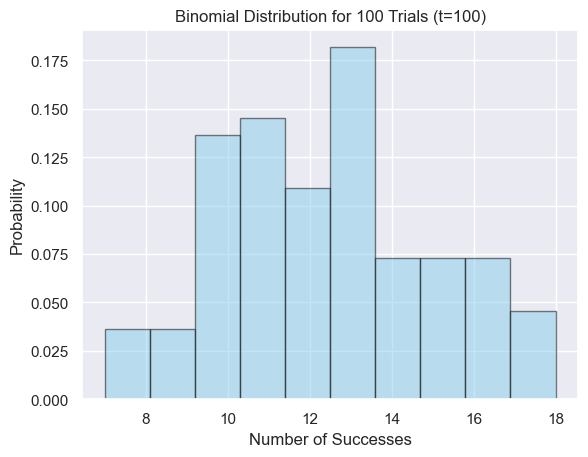

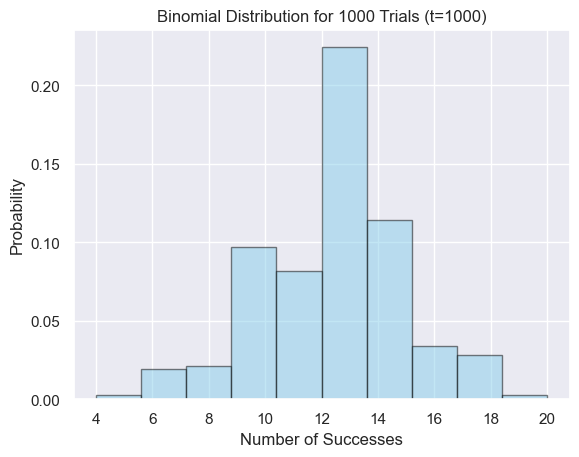

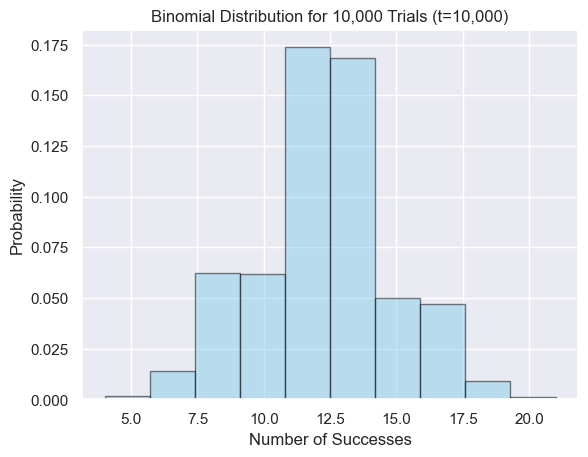

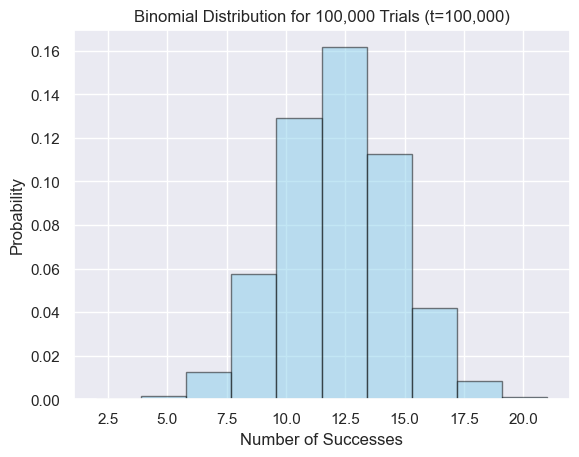

In [172]:

# t=10
# Generating data from a binomial distribution
binomial_data = np.random.binomial(s2_n, s2_p, 10)

# Plotting the binomial distribution
plt.hist(binomial_data,
#          bins=np.arange(0, s2_n + 2) - 0.5,
         density=True, 
         alpha=0.5, 
         color='skyblue', 
         edgecolor='black')
plt.title('Binomial Distribution for 10 Trials (t=10)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

# t=100
# Generating data from a binomial distribution
binomial_data = np.random.binomial(s2_n, s2_p, 100)

# Plotting the binomial distribution
plt.hist(binomial_data,
#          bins=np.arange(0, s2_n + 2) - 0.5,
         density=True, 
         alpha=0.5, 
         color='skyblue', 
         edgecolor='black')
plt.title('Binomial Distribution for 100 Trials (t=100)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()


# t=1,000
# Generating data from a binomial distribution
binomial_data = np.random.binomial(s2_n, s2_p, 1000)

# Plotting the binomial distribution
plt.hist(binomial_data,
#          bins=np.arange(0, s2_n + 2) - 0.5,
         density=True, 
         alpha=0.5, 
         color='skyblue', 
         edgecolor='black')
plt.title('Binomial Distribution for 1000 Trials (t=1000)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

#t=10,000
# Generating data from a binomial distribution
binomial_data = np.random.binomial(s2_n, s2_p, 10000)

# Plotting the binomial distribution
plt.hist(binomial_data,
#          bins=np.arange(0, s2_n + 2) - 0.5,
         density=True, 
         alpha=0.5, 
         color='skyblue', 
         edgecolor='black')
plt.title('Binomial Distribution for 10,000 Trials (t=10,000)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

# t=100,000
# Generating data from a binomial distribution
binomial_data = np.random.binomial(s2_n, s2_p, 100000)

# Plotting the binomial distribution
plt.hist(binomial_data,
#          bins=np.arange(0, s2_n + 2) - 0.5,
         density=True, 
         alpha=0.5, 
         color='skyblue', 
         edgecolor='black')
plt.title('Binomial Distribution for 100,000 Trials (t=100,000)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

Review of the first Binomial Plot above for t=10 trials reveals that the distribution is scattered and does not show "Normal Distribution". From Weiss(2017) a Normal distribution, also referred to as Gaussian Distribution, is symmetric and centered around the mean of the variable. 
As the number of trials (t) increases throughout the Plots, it is clear that the distribution of successes becomes increasingly Normally distributed. 



## Normal Distribution

# Dataset 2: "pops"
# Ireland Population 1950-2023, by Age & Sex (pops)

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

In [174]:

pops = pd.read_csv("CSO_Estimated_Population_1950_-_2023.csv")

In [175]:
pops.head()

STATISTIC Label  Year     Age Group         Sex  \
0  Population Estimates (Persons in April)  1950  Under 1 year  Both sexes   
1  Population Estimates (Persons in April)  1950  Under 1 year        Male   
2  Population Estimates (Persons in April)  1950  Under 1 year      Female   
3  Population Estimates (Persons in April)  1950   0 - 4 years  Both sexes   
4  Population Estimates (Persons in April)  1950   0 - 4 years        Male   

       UNIT  VALUE  
0  Thousand   61.1  
1  Thousand   31.4  
2  Thousand   29.7  
3  Thousand    NaN  
4  Thousand    NaN

In [176]:
pops.tail()

STATISTIC Label  Year          Age Group  \
5989  Population Estimates (Persons in April)  2023  85 years and over   
5990  Population Estimates (Persons in April)  2023  85 years and over   
5991  Population Estimates (Persons in April)  2023           All ages   
5992  Population Estimates (Persons in April)  2023           All ages   
5993  Population Estimates (Persons in April)  2023           All ages   

             Sex      UNIT   VALUE  
5989        Male  Thousand    33.1  
5990      Female  Thousand    53.9  
5991  Both sexes  Thousand  5281.6  
5992        Male  Thousand  2606.2  
5993      Female  Thousand  2675.4

In [177]:
pops.shape

(5994, 6)

In [178]:
pops.info()
# For Most Columns : 5994 non-null values
# For Value Column : 5880 non-null values = 114 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  5994 non-null   object 
 1   Year             5994 non-null   int64  
 2   Age Group        5994 non-null   object 
 3   Sex              5994 non-null   object 
 4   UNIT             5994 non-null   object 
 5   VALUE            5880 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 281.1+ KB


In [179]:
pops.loc[pops[["VALUE"]].isnull().any(axis=1)].head(50)

STATISTIC Label  Year    Age Group         Sex  \
3     Population Estimates (Persons in April)  1950  0 - 4 years  Both sexes   
4     Population Estimates (Persons in April)  1950  0 - 4 years        Male   
5     Population Estimates (Persons in April)  1950  0 - 4 years      Female   
165   Population Estimates (Persons in April)  1952  0 - 4 years  Both sexes   
166   Population Estimates (Persons in April)  1952  0 - 4 years        Male   
167   Population Estimates (Persons in April)  1952  0 - 4 years      Female   
246   Population Estimates (Persons in April)  1953  0 - 4 years  Both sexes   
247   Population Estimates (Persons in April)  1953  0 - 4 years        Male   
248   Population Estimates (Persons in April)  1953  0 - 4 years      Female   
327   Population Estimates (Persons in April)  1954  0 - 4 years  Both sexes   
328   Population Estimates (Persons in April)  1954  0 - 4 years        Male   
329   Population Estimates (Persons in April)  1954  0 - 4 years      Female   
408   Population Estimates (Persons in April)  1955  0 - 4 years  Both sexes   
409   Population Estimates (Persons in April)  1955  0 - 4 years        Male   
410   Population Estimates (Persons in April)  1955  0 - 4 years      Female   
489   Population Estimates (Persons in April)  1956  0 - 4 years  Both sexes   
490   Population Estimates (Persons in April)  1956  0 - 4 years        Male   
491   Population Estimates (Persons in April)  1956  0 - 4 years      Female   
570   Population Estimates (Persons in April)  1957  0 - 4 years  Both sexes   
571   Population Estimates (Persons in April)  1957  0 - 4 years        Male   
572   Population Estimates (Persons in April)  1957  0 - 4 years      Female   
651   Population Estimates (Persons in April)  1958  0 - 4 years  Both sexes   
652   Population Estimates (Persons in April)  1958  0 - 4 years        Male   
653   Population Estimates (Persons in April)  1958  0 - 4 years      Female   
732   Population Estimates (Persons in April)  1959  0 - 4 years  Both sexes   
733   Population Estimates (Persons in April)  1959  0 - 4 years        Male   
734   Population Estimates (Persons in April)  1959  0 - 4 years      Female   
813   Population Estimates (Persons in April)  1960  0 - 4 years  Both sexes   
814   Population Estimates (Persons in April)  1960  0 - 4 years        Male   
815   Population Estimates (Persons in April)  1960  0 - 4 years      Female   
975   Population Estimates (Persons in April)  1962  0 - 4 years  Both sexes   
976   Population Estimates (Persons in April)  1962  0 - 4 years        Male   
977   Population Estimates (Persons in April)  1962  0 - 4 years      Female   
1056  Population Estimates (Persons in April)  1963  0 - 4 years  Both sexes   
1057  Population Estimates (Persons in April)  1963  0 - 4 years        Male   
1058  Population Estimates (Persons in April)  1963  0 - 4 years      Female   
1137  Population Estimates (Persons in April)  1964  0 - 4 years  Both sexes   
1138  Population Estimates (Persons in April)  1964  0 - 4 years        Male   
1139  Population Estimates (Persons in April)  1964  0 - 4 years      Female   
1218  Population Estimates (Persons in April)  1965  0 - 4 years  Both sexes   
1219  Population Estimates (Persons in April)  1965  0 - 4 years        Male   
1220  Population Estimates (Persons in April)  1965  0 - 4 years      Female   
1380  Population Estimates (Persons in April)  1967  0 - 4 years  Both sexes   
1381  Population Estimates (Persons in April)  1967  0 - 4 years        Male   
1382  Population Estimates (Persons in April)  1967  0 - 4 years      Female   
1461  Population Estimates (Persons in April)  1968  0 - 4 years  Both sexes   
1462  Population Estimates (Persons in April)  1968  0 - 4 years        Male   
1463  Population Estimates (Persons in April)  1968  0 - 4 years      Female   
1542  Population Estimates (Persons in April)  1969  0 - 4 years  Both sexes   
1543  Population Estimates (Pe

In [180]:
pops.loc[pops[["VALUE"]].isnull().any(axis=1)].tail(50)

STATISTIC Label  Year    Age Group         Sex  \
2029  Population Estimates (Persons in April)  1975  0 - 4 years        Male   
2030  Population Estimates (Persons in April)  1975  0 - 4 years      Female   
2109  Population Estimates (Persons in April)  1976  0 - 4 years  Both sexes   
2110  Population Estimates (Persons in April)  1976  0 - 4 years        Male   
2111  Population Estimates (Persons in April)  1976  0 - 4 years      Female   
2190  Population Estimates (Persons in April)  1977  0 - 4 years  Both sexes   
2191  Population Estimates (Persons in April)  1977  0 - 4 years        Male   
2192  Population Estimates (Persons in April)  1977  0 - 4 years      Female   
2271  Population Estimates (Persons in April)  1978  0 - 4 years  Both sexes   
2272  Population Estimates (Persons in April)  1978  0 - 4 years        Male   
2273  Population Estimates (Persons in April)  1978  0 - 4 years      Female   
2433  Population Estimates (Persons in April)  1980  0 - 4 years  Both sexes   
2434  Population Estimates (Persons in April)  1980  0 - 4 years        Male   
2435  Population Estimates (Persons in April)  1980  0 - 4 years      Female   
2595  Population Estimates (Persons in April)  1982  0 - 4 years  Both sexes   
2596  Population Estimates (Persons in April)  1982  0 - 4 years        Male   
2597  Population Estimates (Persons in April)  1982  0 - 4 years      Female   
2676  Population Estimates (Persons in April)  1983  0 - 4 years  Both sexes   
2677  Population Estimates (Persons in April)  1983  0 - 4 years        Male   
2678  Population Estimates (Persons in April)  1983  0 - 4 years      Female   
2757  Population Estimates (Persons in April)  1984  0 - 4 years  Both sexes   
2758  Population Estimates (Persons in April)  1984  0 - 4 years        Male   
2759  Population Estimates (Persons in April)  1984  0 - 4 years      Female   
2838  Population Estimates (Persons in April)  1985  0 - 4 years  Both sexes   
2839  Population Estimates (Persons in April)  1985  0 - 4 years        Male   
2840  Population Estimates (Persons in April)  1985  0 - 4 years      Female   
3000  Population Estimates (Persons in April)  1987  0 - 4 years  Both sexes   
3001  Population Estimates (Persons in April)  1987  0 - 4 years        Male   
3002  Population Estimates (Persons in April)  1987  0 - 4 years      Female   
3081  Population Estimates (Persons in April)  1988  0 - 4 years  Both sexes   
3082  Population Estimates (Persons in April)  1988  0 - 4 years        Male   
3083  Population Estimates (Persons in April)  1988  0 - 4 years      Female   
3162  Population Estimates (Persons in April)  1989  0 - 4 years  Both sexes   
3163  Population Estimates (Persons in April)  1989  0 - 4 years        Male   
3164  Population Estimates (Persons in April)  1989  0 - 4 years      Female   
3243  Population Estimates (Persons in April)  1990  0 - 4 years  Both sexes   
3244  Population Estimates (Persons in April)  1990  0 - 4 years        Male   
3245  Population Estimates (Persons in April)  1990  0 - 4 years      Female   
3405  Population Estimates (Persons in April)  1992  0 - 4 years  Both sexes   
3406  Population Estimates (Persons in April)  1992  0 - 4 years        Male   
3407  Population Estimates (Persons in April)  1992  0 - 4 years      Female   
3486  Population Estimates (Persons in April)  1993  0 - 4 years  Both sexes   
3487  Population Estimates (Persons in April)  1993  0 - 4 years        Male   
3488  Population Estimates (Persons in April)  1993  0 - 4 years      Female   
3567  Population Estimates (Persons in April)  1994  0 - 4 years  Both sexes   
3568  Population Estimates (Persons in April)  1994  0 - 4 years        Male   
3569  Population Estimates (Persons in April)  1994  0 - 4 years      Female   
3648  Population Estimates (Persons in April)  1995  0 - 4 years  Both sexes   
3649  Population Estimates (Persons in April)  1995  0 - 4 years        Male   
3650  Population Estimates (Pe

## Columns

STATISTIC Label - 

Year - 

Age Group - 

Sex - 

UNIT - Unit of VALUE

VALUE - Population in '000s

In [181]:
pops["Age Group"].unique()

array(['Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years',
       '5 - 9 years', '10 - 14 years', '15 - 19 years', '15 - 24 years',
       '15 years and over', '20 - 24 years', '25 - 29 years',
       '25 - 44 years', '30 - 34 years', '35 - 39 years', '40 - 44 years',
       '45 - 49 years', '45 - 64 years', '50 - 54 years', '55 - 59 years',
       '60 - 64 years', '65 - 69 years', '65 years and over',
       '70 - 74 years', '75 - 79 years', '80 - 84 years',
       '85 years and over', 'All ages'], dtype=object)

There are some summary age groups in the data that need to be removed so we are not double counting certain age ranges.

Summary Groups:

Group 1:
- '0 - 14 years'
- '15 - 24 years'
- '25 - 44 years' 
- '45 - 64 years'
- '65 years and over'

Group 2:
- 'All ages'

Group 3:
- '0 - 4 years'

Group 4
- '15 years and over'

This group effectively represents the population across all ages
- 'Under 1 year'
- '1 - 4 years'
- '5 - 9 years'
- '10 - 14 years'
- '15 - 19 years'
- '20 - 24 years'
- '25 - 29 years'
- '30 - 34 years' 
- '35 - 39 years'
- '40 - 44 years'
- '45 - 49 years'
- '50 - 54 years'
- '55 - 59 years'
- '60 - 64 years'
- '65 - 69 years'
- '70 - 74 years'
- '75 - 79 years'
- '80 - 84 years'
- '85 years and over'

In [182]:
# Assign each Age Group to be brought forward into the analysis a unqiue age_id
# All "others" that are to be dropped will be assigned the same age_id (=21) to facilitate removal 

age_id = []
for row in pops['Age Group']:
    if row =='Under 1 year': age_id.append('1') 
    elif row =='1 - 4 years': age_id.append('2') 
    elif row == '5 - 9 years': age_id.append('3') 
    elif row == '10 - 14 years': age_id.append('4')
    elif row == '15 - 19 years': age_id.append('5')
    elif row == '20 - 24 years': age_id.append('6')
    elif row == '25 - 29 years': age_id.append('7')
    elif row == '30 - 34 years': age_id.append('8')
    elif row == '35 - 39 years': age_id.append('9')
    elif row == '40 - 44 years': age_id.append('10')
    elif row == '45 - 49 years': age_id.append('11')
    elif row == '50 - 54 years': age_id.append('12')
    elif row == '55 - 59 years': age_id.append('13')
    elif row == '60 - 64 years': age_id.append('14')
    elif row == '65 - 69 years': age_id.append('15')
    elif row == '70 - 74 years': age_id.append('16')
    elif row == '75 - 79 years': age_id.append('17')
    elif row == '80 - 84 years': age_id.append('17')
    elif row == '85 years and over': age_id.append('19')
    elif row == 'All ages': age_id.append('20')                                           
    else: age_id.append('21')

pops['age_id'] = age_id
pops['age_id'] = pd.to_numeric(pops['age_id'])
pops.head(80)

STATISTIC Label  Year          Age Group  \
0   Population Estimates (Persons in April)  1950       Under 1 year   
1   Population Estimates (Persons in April)  1950       Under 1 year   
2   Population Estimates (Persons in April)  1950       Under 1 year   
3   Population Estimates (Persons in April)  1950        0 - 4 years   
4   Population Estimates (Persons in April)  1950        0 - 4 years   
..                                      ...   ...                ...   
75  Population Estimates (Persons in April)  1950  85 years and over   
76  Population Estimates (Persons in April)  1950  85 years and over   
77  Population Estimates (Persons in April)  1950  85 years and over   
78  Population Estimates (Persons in April)  1950           All ages   
79  Population Estimates (Persons in April)  1950           All ages   

           Sex      UNIT   VALUE  age_id  
0   Both sexes  Thousand    61.1       1  
1         Male  Thousand    31.4       1  
2       Female  Thousand    29.7       1  
3   Both sexes  Thousand     NaN      21  
4         Male  Thousand     NaN      21  
..         ...       ...     ...     ...  
75  Both sexes  Thousand    13.3      19  
76        Male  Thousand     5.5      19  
77      Female  Thousand     7.8      19  
78  Both sexes  Thousand  2969.0      20  
79        Male  Thousand  1510.0      20  

[80 rows x 7 columns]

In [183]:
# Remove all age groups that cover duplicated ages - assigned to age_id = 21 
pops = pops.loc[pops["age_id"] != 21,]


pops

STATISTIC Label  Year          Age Group  \
0     Population Estimates (Persons in April)  1950       Under 1 year   
1     Population Estimates (Persons in April)  1950       Under 1 year   
2     Population Estimates (Persons in April)  1950       Under 1 year   
9     Population Estimates (Persons in April)  1950        1 - 4 years   
10    Population Estimates (Persons in April)  1950        1 - 4 years   
...                                       ...   ...                ...   
5989  Population Estimates (Persons in April)  2023  85 years and over   
5990  Population Estimates (Persons in April)  2023  85 years and over   
5991  Population Estimates (Persons in April)  2023           All ages   
5992  Population Estimates (Persons in April)  2023           All ages   
5993  Population Estimates (Persons in April)  2023           All ages   

             Sex      UNIT   VALUE  age_id  
0     Both sexes  Thousand    61.1       1  
1           Male  Thousand    31.4       1  
2         Female  Thousand    29.7       1  
9     Both sexes  Thousand   249.1       2  
10          Male  Thousand   127.5       2  
...          ...       ...     ...     ...  
5989        Male  Thousand    33.1      19  
5990      Female  Thousand    53.9      19  
5991  Both sexes  Thousand  5281.6      20  
5992        Male  Thousand  2606.2      20  
5993      Female  Thousand  2675.4      20  

[4440 rows x 7 columns]

In [184]:
DF = "pops"
Description = "pops:1950-2023:Age Groups&All w/id; M/F/Both; VALUE"
df_index_table.loc[len(df_index_table)] = [DF, Description]


In [185]:
pops.info()
# For all Columns : 4440 non-null values
# Therefore no null values to action

<class 'pandas.core.frame.DataFrame'>
Index: 4440 entries, 0 to 5993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  4440 non-null   object 
 1   Year             4440 non-null   int64  
 2   Age Group        4440 non-null   object 
 3   Sex              4440 non-null   object 
 4   UNIT             4440 non-null   object 
 5   VALUE            4440 non-null   float64
 6   age_id           4440 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 277.5+ KB


In [186]:
pops_aa = pops.loc[pops["age_id"] != 20,]
pops_aa

STATISTIC Label  Year          Age Group  \
0     Population Estimates (Persons in April)  1950       Under 1 year   
1     Population Estimates (Persons in April)  1950       Under 1 year   
2     Population Estimates (Persons in April)  1950       Under 1 year   
9     Population Estimates (Persons in April)  1950        1 - 4 years   
10    Population Estimates (Persons in April)  1950        1 - 4 years   
...                                       ...   ...                ...   
5986  Population Estimates (Persons in April)  2023      80 - 84 years   
5987  Population Estimates (Persons in April)  2023      80 - 84 years   
5988  Population Estimates (Persons in April)  2023  85 years and over   
5989  Population Estimates (Persons in April)  2023  85 years and over   
5990  Population Estimates (Persons in April)  2023  85 years and over   

             Sex      UNIT  VALUE  age_id  
0     Both sexes  Thousand   61.1       1  
1           Male  Thousand   31.4       1  
2         Female  Thousand   29.7       1  
9     Both sexes  Thousand  249.1       2  
10          Male  Thousand  127.5       2  
...          ...       ...    ...     ...  
5986        Male  Thousand   46.1      17  
5987      Female  Thousand   55.6      17  
5988  Both sexes  Thousand   87.1      19  
5989        Male  Thousand   33.1      19  
5990      Female  Thousand   53.9      19  

[4218 rows x 7 columns]

In [187]:
DF = "pops_aa"
Description = "pops:1950-2023:Age Groups w/id; M/F/Both; VALUE"
df_index_table.loc[len(df_index_table)] = [DF, Description]


In [188]:
pops_aa_sg = pops_aa.loc[pops["Sex"] != "Both sexes",]
pops_aa_sg.head(10)


STATISTIC Label  Year      Age Group     Sex  \
1   Population Estimates (Persons in April)  1950   Under 1 year    Male   
2   Population Estimates (Persons in April)  1950   Under 1 year  Female   
10  Population Estimates (Persons in April)  1950    1 - 4 years    Male   
11  Population Estimates (Persons in April)  1950    1 - 4 years  Female   
13  Population Estimates (Persons in April)  1950    5 - 9 years    Male   
14  Population Estimates (Persons in April)  1950    5 - 9 years  Female   
16  Population Estimates (Persons in April)  1950  10 - 14 years    Male   
17  Population Estimates (Persons in April)  1950  10 - 14 years  Female   
19  Population Estimates (Persons in April)  1950  15 - 19 years    Male   
20  Population Estimates (Persons in April)  1950  15 - 19 years  Female   

        UNIT  VALUE  age_id  
1   Thousand   31.4       1  
2   Thousand   29.7       1  
10  Thousand  127.5       2  
11  Thousand  121.6       2  
13  Thousand  142.3       3  
14  Thousand  136.6       3  
16  Thousand  133.4       4  
17  Thousand  128.7       4  
19  Thousand  126.6       5  
20  Thousand  117.4       5

In [189]:
DF = "pops_aa_sg"
Description = "pops:1950-2023:Age Groups w/id; M/F; VALUE"
df_index_table.loc[len(df_index_table)] = [DF, Description]


In [190]:
pops_aa_sb = pops_aa.loc[pops["Sex"] == "Both sexes",]

pops_aa_sb.head(10)

STATISTIC Label  Year      Age Group         Sex  \
0   Population Estimates (Persons in April)  1950   Under 1 year  Both sexes   
9   Population Estimates (Persons in April)  1950    1 - 4 years  Both sexes   
12  Population Estimates (Persons in April)  1950    5 - 9 years  Both sexes   
15  Population Estimates (Persons in April)  1950  10 - 14 years  Both sexes   
18  Population Estimates (Persons in April)  1950  15 - 19 years  Both sexes   
27  Population Estimates (Persons in April)  1950  20 - 24 years  Both sexes   
30  Population Estimates (Persons in April)  1950  25 - 29 years  Both sexes   
36  Population Estimates (Persons in April)  1950  30 - 34 years  Both sexes   
39  Population Estimates (Persons in April)  1950  35 - 39 years  Both sexes   
42  Population Estimates (Persons in April)  1950  40 - 44 years  Both sexes   

        UNIT  VALUE  age_id  
0   Thousand   61.1       1  
9   Thousand  249.1       2  
12  Thousand  278.9       3  
15  Thousand  262.1       4  
18  Thousand  244.0       5  
27  Thousand  208.6       6  
30  Thousand  201.1       7  
36  Thousand  194.8       8  
39  Thousand  199.8       9  
42  Thousand  177.9      10

In [191]:
DF = "pops_aa_sb"
Description = "pops:1950-2023:Age Groups w/id; Both sex; VALUE"
df_index_table.loc[len(df_index_table)] = [DF, Description]


In [192]:
pops_aa_sf = pops_aa.loc[pops["Sex"] == "Female",]
print(pops_aa_sf.shape)
pops_aa_sf.head(10)

(1406, 7)


STATISTIC Label  Year      Age Group     Sex  \
2   Population Estimates (Persons in April)  1950   Under 1 year  Female   
11  Population Estimates (Persons in April)  1950    1 - 4 years  Female   
14  Population Estimates (Persons in April)  1950    5 - 9 years  Female   
17  Population Estimates (Persons in April)  1950  10 - 14 years  Female   
20  Population Estimates (Persons in April)  1950  15 - 19 years  Female   
29  Population Estimates (Persons in April)  1950  20 - 24 years  Female   
32  Population Estimates (Persons in April)  1950  25 - 29 years  Female   
38  Population Estimates (Persons in April)  1950  30 - 34 years  Female   
41  Population Estimates (Persons in April)  1950  35 - 39 years  Female   
44  Population Estimates (Persons in April)  1950  40 - 44 years  Female   

        UNIT  VALUE  age_id  
2   Thousand   29.7       1  
11  Thousand  121.6       2  
14  Thousand  136.6       3  
17  Thousand  128.7       4  
20  Thousand  117.4       5  
29  Thousand  100.3       6  
32  Thousand  100.2       7  
38  Thousand   96.5       8  
41  Thousand   98.0       9  
44  Thousand   85.5      10

In [193]:
DF = "pops_aa_sf"
Description = "pops:1950-2023:Age Groups w/id; Female; VALUE"
df_index_table.loc[len(df_index_table)] = [DF, Description]


In [194]:
pops_aa_sm = pops_aa.loc[pops["Sex"] == "Male",]
print(pops_aa_sm.shape)
pops_aa_sm.head(10)

(1406, 7)


STATISTIC Label  Year      Age Group   Sex  \
1   Population Estimates (Persons in April)  1950   Under 1 year  Male   
10  Population Estimates (Persons in April)  1950    1 - 4 years  Male   
13  Population Estimates (Persons in April)  1950    5 - 9 years  Male   
16  Population Estimates (Persons in April)  1950  10 - 14 years  Male   
19  Population Estimates (Persons in April)  1950  15 - 19 years  Male   
28  Population Estimates (Persons in April)  1950  20 - 24 years  Male   
31  Population Estimates (Persons in April)  1950  25 - 29 years  Male   
37  Population Estimates (Persons in April)  1950  30 - 34 years  Male   
40  Population Estimates (Persons in April)  1950  35 - 39 years  Male   
43  Population Estimates (Persons in April)  1950  40 - 44 years  Male   

        UNIT  VALUE  age_id  
1   Thousand   31.4       1  
10  Thousand  127.5       2  
13  Thousand  142.3       3  
16  Thousand  133.4       4  
19  Thousand  126.6       5  
28  Thousand  108.3       6  
31  Thousand  100.9       7  
37  Thousand   98.3       8  
40  Thousand  101.8       9  
43  Thousand   92.4      10

In [195]:
DF = "pops_aa_sm"
Description = "pops:1950-2023:Age Groups w/id; Male; VALUE"
df_index_table.loc[len(df_index_table)] = [DF, Description]


## EDA on "pops" 

In [196]:
pops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4440 entries, 0 to 5993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  4440 non-null   object 
 1   Year             4440 non-null   int64  
 2   Age Group        4440 non-null   object 
 3   Sex              4440 non-null   object 
 4   UNIT             4440 non-null   object 
 5   VALUE            4440 non-null   float64
 6   age_id           4440 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 406.5+ KB


In [197]:
pops["Sex"].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [198]:
pops.describe()

Year        VALUE       age_id
count  4440.000000  4440.000000  4440.000000
mean   1986.500000   242.916869    10.450000
std      21.362415   554.572250     5.705684
min    1950.000000     5.500000     1.000000
25%    1968.000000    68.600000     5.750000
50%    1986.500000   122.850000    10.500000
75%    2005.000000   172.500000    15.250000
max    2023.000000  5281.600000    20.000000

In [199]:
pops.count()

STATISTIC Label    4440
Year               4440
Age Group          4440
Sex                4440
UNIT               4440
VALUE              4440
age_id             4440
dtype: int64

In [200]:
popc_sum

STATISTIC Label  Year Age Group         Sex  \
486   Estimated Population (Persons in April)  2011  All ages  Both sexes   
999   Estimated Population (Persons in April)  2012  All ages  Both sexes   
1512  Estimated Population (Persons in April)  2013  All ages  Both sexes   
2025  Estimated Population (Persons in April)  2014  All ages  Both sexes   
2538  Estimated Population (Persons in April)  2015  All ages  Both sexes   
3051  Estimated Population (Persons in April)  2016  All ages  Both sexes   
3564  Estimated Population (Persons in April)  2017  All ages  Both sexes   
4077  Estimated Population (Persons in April)  2018  All ages  Both sexes   
4590  Estimated Population (Persons in April)  2019  All ages  Both sexes   
5103  Estimated Population (Persons in April)  2020  All ages  Both sexes   
5616  Estimated Population (Persons in April)  2021  All ages  Both sexes   
6129  Estimated Population (Persons in April)  2022  All ages  Both sexes   
6642  Estimated Population (Persons in April)  2023  All ages  Both sexes   

     Region      UNIT   VALUE  sex_id  age_id  region_id  
486   State  Thousand  4574.9       3      19          1  
999   State  Thousand  4593.7       3      19          1  
1512  State  Thousand  4614.7       3      19          1  
2025  State  Thousand  4645.4       3      19          1  
2538  State  Thousand  4687.8       3      19          1  
3051  State  Thousand  4739.6       3      19          1  
3564  State  Thousand  4810.9       3      19          1  
4077  State  Thousand  4884.9       3      19          1  
4590  State  Thousand  4958.5       3      19          1  
5103  State  Thousand  5029.9       3      19          1  
5616  State  Thousand  5074.7       3      19          1  
6129  State  Thousand  5184.0       3      19          1  
6642  State  Thousand  5281.6       3      19          1

## Histograms & Normality checking

[Text(0.5, 0, 'Population VALUE'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram Plot for Population')]

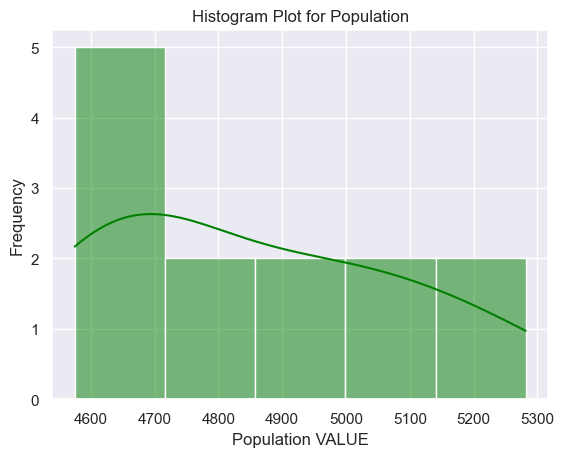

In [201]:
ax = sns.histplot(popc_sum.VALUE,
                  kde=True,
                  color ='green')
ax.set(xlabel='Population VALUE',
       ylabel='Frequency',
       title ='Histogram Plot for Population')

[Text(0.5, 0, 'Population VALUE'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram of Population VALUE (1950-2023)')]

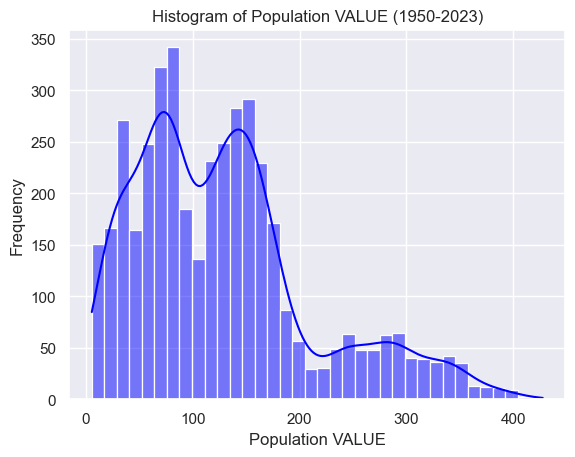

In [202]:
ax = sns.histplot(pops_aa.VALUE,
                  kde=True,
                  color ='blue')
ax.set(xlabel='Population VALUE',
       ylabel='Frequency',       
       title ='Histogram of Population VALUE (1950-2023)')

[Text(0.5, 0, 'Population VALUE'),
 Text(0, 0.5, 'Female'),
 Text(0.5, 1.0, 'Histogram of Female Population VALUE (1950-2023)')]

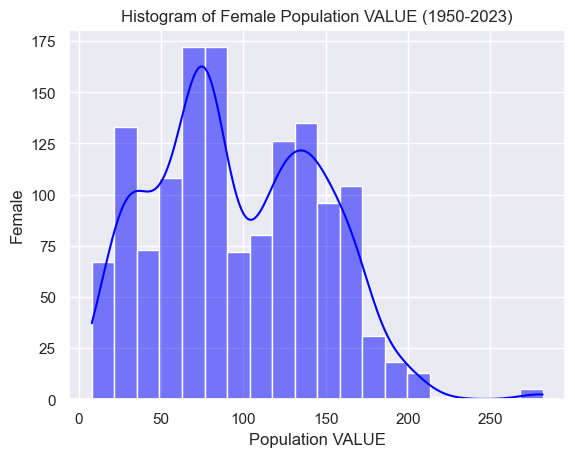

In [203]:
# pops_aa_sf
# Larger Dataset, More year and corresponding values available
# Histogram appears to be more normally distributed
# Law of large numbers

  
ax = sns.histplot(pops_aa_sf.VALUE,
                  kde=True,
                  color ='blue')
ax.set(xlabel='Population VALUE',
       ylabel='Female',       
       title ='Histogram of Female Population VALUE (1950-2023)')

[Text(0.5, 0, 'Population VALUE'),
 Text(0, 0.5, 'Males'),
 Text(0.5, 1.0, 'Histogram of Male Population VALUE (1950-2023)')]

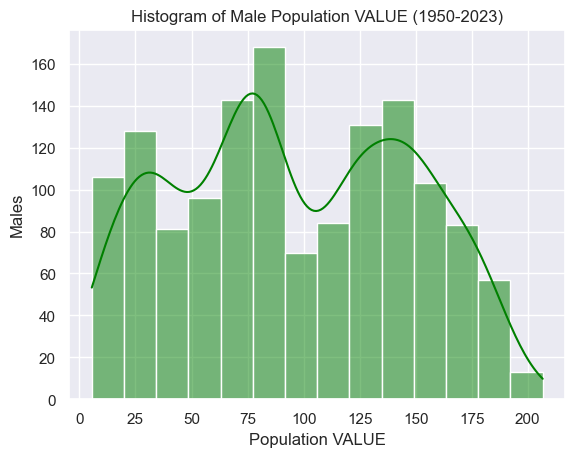

In [204]:
pops_aa_sm
# Larger Dataset, More year and corresponding values available
# Histogram appears to be more normally distributed
# Law of large numbers

  
ax = sns.histplot(pops_aa_sm.VALUE,
                  kde=True,
                  color ='green')
ax.set(xlabel='Population VALUE',
       ylabel='Males',    
       title ='Histogram of Male Population VALUE (1950-2023)')

In [205]:
# From previous popc = smaller dataset
# Population 2011-2023
# Reduced to show 
# Age Group = All Ages
# Region = State
# Sex = Female

print(popc_aa_rs_f.shape)
popc_aa_rs_f.head(5)

(13, 10)


STATISTIC Label  Year Age Group     Sex Region  \
504   Estimated Population (Persons in April)  2011  All ages  Female  State   
1017  Estimated Population (Persons in April)  2012  All ages  Female  State   
1530  Estimated Population (Persons in April)  2013  All ages  Female  State   
2043  Estimated Population (Persons in April)  2014  All ages  Female  State   
2556  Estimated Population (Persons in April)  2015  All ages  Female  State   

          UNIT   VALUE  sex_id  age_id  region_id  
504   Thousand  2304.4       2      19          1  
1017  Thousand  2318.7       2      19          1  
1530  Thousand  2328.5       2      19          1  
2043  Thousand  2346.4       2      19          1  
2556  Thousand  2370.1       2      19          1

[Text(0.5, 0, 'Population VALUE'),
 Text(0, 0.5, 'Females'),
 Text(0.5, 1.0, 'Histogram of Female Population VALUE (2011-2023)')]

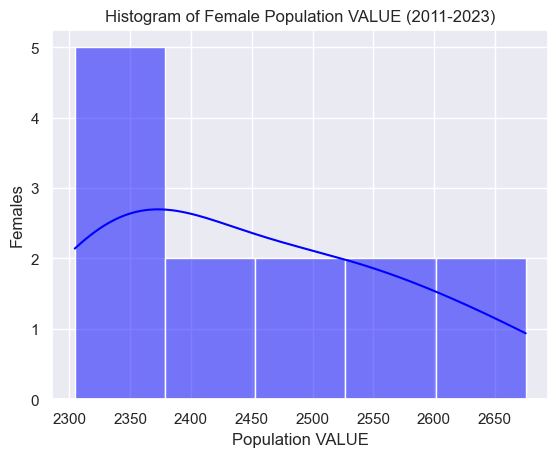

In [206]:
ax = sns.histplot(popc_aa_rs_f.VALUE,
                  kde=True,
                  color ='blue')
ax.set(xlabel='Population VALUE',
       ylabel='Females',
       title ='Histogram of Female Population VALUE (2011-2023)')

In [207]:
# From previous popc = smaller dataset
# Population 2011-2023
# Reduced to show 
# Age Group = All Ages
# Region = State
# Sex = Male

print(popc_aa_rs_m.shape)
popc_aa_rs_m.head(5)

(13, 10)


STATISTIC Label  Year Age Group   Sex Region  \
495   Estimated Population (Persons in April)  2011  All ages  Male  State   
1008  Estimated Population (Persons in April)  2012  All ages  Male  State   
1521  Estimated Population (Persons in April)  2013  All ages  Male  State   
2034  Estimated Population (Persons in April)  2014  All ages  Male  State   
2547  Estimated Population (Persons in April)  2015  All ages  Male  State   

          UNIT   VALUE  sex_id  age_id  region_id  
495   Thousand  2270.5       1      19          1  
1008  Thousand  2275.0       1      19          1  
1521  Thousand  2286.1       1      19          1  
2034  Thousand  2299.0       1      19          1  
2547  Thousand  2317.7       1      19          1

[Text(0.5, 0, 'Population VALUE'),
 Text(0, 0.5, 'Male'),
 Text(0.5, 1.0, 'Histogram of Male Population VALUE (2011-2023)')]

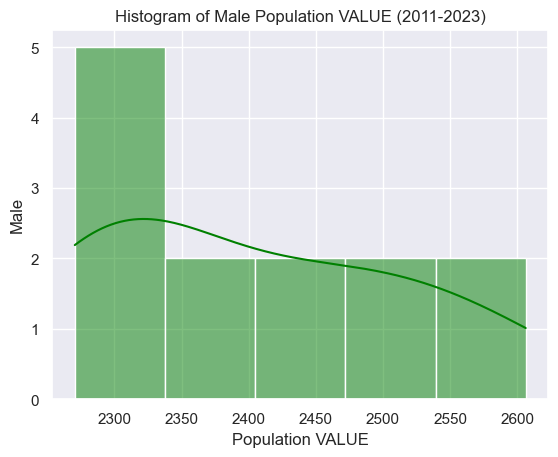

In [208]:
ax = sns.histplot(popc_aa_rs_m.VALUE,
                  kde=True,
                  color ='green')
ax.set(xlabel='Population VALUE',
       ylabel='Male',
       title ='Histogram of Male Population VALUE (2011-2023)')

In [209]:
pops

STATISTIC Label  Year          Age Group  \
0     Population Estimates (Persons in April)  1950       Under 1 year   
1     Population Estimates (Persons in April)  1950       Under 1 year   
2     Population Estimates (Persons in April)  1950       Under 1 year   
9     Population Estimates (Persons in April)  1950        1 - 4 years   
10    Population Estimates (Persons in April)  1950        1 - 4 years   
...                                       ...   ...                ...   
5989  Population Estimates (Persons in April)  2023  85 years and over   
5990  Population Estimates (Persons in April)  2023  85 years and over   
5991  Population Estimates (Persons in April)  2023           All ages   
5992  Population Estimates (Persons in April)  2023           All ages   
5993  Population Estimates (Persons in April)  2023           All ages   

             Sex      UNIT   VALUE  age_id  
0     Both sexes  Thousand    61.1       1  
1           Male  Thousand    31.4       1  
2         Female  Thousand    29.7       1  
9     Both sexes  Thousand   249.1       2  
10          Male  Thousand   127.5       2  
...          ...       ...     ...     ...  
5989        Male  Thousand    33.1      19  
5990      Female  Thousand    53.9      19  
5991  Both sexes  Thousand  5281.6      20  
5992        Male  Thousand  2606.2      20  
5993      Female  Thousand  2675.4      20  

[4440 rows x 7 columns]

### Normality

In [210]:
age_dist = pops.loc[pops["Year"]==2023].loc[pops["Age Group"]!= "All ages"].loc[pops["Sex"]=="Both sexes"].drop(["STATISTIC Label","Year","Sex","UNIT"],axis=1)
total = age_dist["VALUE"].sum()
age_dist["pc_of_total"] = (age_dist["VALUE"]/total * 100)
age_dist.sort_values(by="pc_of_total")


Age Group  VALUE  age_id  pc_of_total
5913       Under 1 year   55.7       1     1.054605
5988  85 years and over   87.1      19     1.649121
5985      80 - 84 years  101.8      17     1.927446
5982      75 - 79 years  162.1      17     3.069146
5979      70 - 74 years  210.5      16     3.985535
5922        1 - 4 years  238.1       2     4.508104
5973      65 - 69 years  244.8      15     4.634959
5970      60 - 64 years  285.2      14     5.399879
5943      25 - 29 years  308.5       7     5.841033
5967      55 - 59 years  316.3      13     5.988716
5940      20 - 24 years  317.8       6     6.017116
5949      30 - 34 years  337.0       8     6.380642
5925        5 - 9 years  338.6       3     6.410936
5931      15 - 19 years  349.5       5     6.617313
5964      50 - 54 years  354.5      12     6.711981
5928      10 - 14 years  379.2       4     7.179643
5958      45 - 49 years  382.7      11     7.245910
5952      35 - 39 years  384.5       9     7.279991
5955      40 - 44 years  427.7      10     8.097925

#### Normality Check : Histogram:


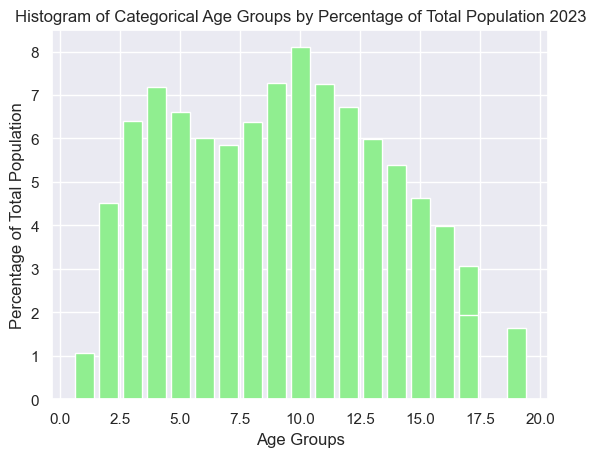

In [211]:

plt.bar(age_dist['age_id'], age_dist['pc_of_total'], color='lightgreen')
plt.xlabel('Age Groups')
plt.ylabel('Percentage of Total Population')
plt.title('Histogram of Categorical Age Groups by Percentage of Total Population 2023')
plt.show()



In [212]:
print((total+1)/2)
age_dist.sort_values(by="age_id")


2641.3000000000006


Age Group  VALUE  age_id  pc_of_total
5913       Under 1 year   55.7       1     1.054605
5922        1 - 4 years  238.1       2     4.508104
5925        5 - 9 years  338.6       3     6.410936
5928      10 - 14 years  379.2       4     7.179643
5931      15 - 19 years  349.5       5     6.617313
5940      20 - 24 years  317.8       6     6.017116
5943      25 - 29 years  308.5       7     5.841033
5949      30 - 34 years  337.0       8     6.380642
5952      35 - 39 years  384.5       9     7.279991
5955      40 - 44 years  427.7      10     8.097925
5958      45 - 49 years  382.7      11     7.245910
5964      50 - 54 years  354.5      12     6.711981
5967      55 - 59 years  316.3      13     5.988716
5970      60 - 64 years  285.2      14     5.399879
5973      65 - 69 years  244.8      15     4.634959
5979      70 - 74 years  210.5      16     3.985535
5982      75 - 79 years  162.1      17     3.069146
5985      80 - 84 years  101.8      17     1.927446
5988  85 years and over   87.1      19     1.649121

**Normality**

Normality can be assessed with regards to the age data in this dataset because although age appears to be measured in a discrete fashion, it is often considered to be continuous.
The below review of normality extends this consideration to the age group (and age_id) as they are representative of age. The original categorical Age Groups have also been transformed into Ordered Numerical Variables, therefore their continuous attributes are considered to have been transformed also.

The above plot showing Age and relevant % of Total Population appears to be roughly normal.
The plot for Normal distribution present as the shape of a bell curve, centered around the mean; which is roughly the case here.
Based on the Age Midpoints exercise completed, the approx mean age is known to be ~ 39 (age_id = 9).
From above calculations, The median is at VALUE=2641, which also lies within age_id = 9.

As the plot has 2 peaks and appears slightly right-skewed, so normality can't be assumed from this plot, despite the supporting Mean / Median results.

Other tests can be completed to confirm normality. This should be done before continuing to perform any additional hypothesis testing that assumes normality.

The Shapiro-Wilk Test function on Python can be use to test for normality:

#### Shapiro-Wilk Test:


In [213]:
stat, p = stats.shapiro(age_dist[["VALUE"]])

print('Shapiro-Wilk Test:')
print(f'Statistic: {stat}, p-value: {p}')

# Print Results:
# 5% confidence level as standard
alpha = 0.05

if p > alpha:
    print('The data looks normally distributed (fail to reject H0)')
else:
    print('The data does not look normally distributed (reject H0)')

Shapiro-Wilk Test:
Statistic: 0.9080586433410645, p-value: 0.06820391118526459
The data looks normally distributed (fail to reject H0)


Shapiro-Wilk Test:

Statistic: 0.9080586433410645, p-value: 0.06820391118526459

The data looks normally distributed (fail to reject H0)


The Shapiro-Wilk Test confirms that that Age does have a Normal Distribution across the population in 2023. 

# Working / Retired Population Change 1950-2023

In [214]:
pops

STATISTIC Label  Year          Age Group  \
0     Population Estimates (Persons in April)  1950       Under 1 year   
1     Population Estimates (Persons in April)  1950       Under 1 year   
2     Population Estimates (Persons in April)  1950       Under 1 year   
9     Population Estimates (Persons in April)  1950        1 - 4 years   
10    Population Estimates (Persons in April)  1950        1 - 4 years   
...                                       ...   ...                ...   
5989  Population Estimates (Persons in April)  2023  85 years and over   
5990  Population Estimates (Persons in April)  2023  85 years and over   
5991  Population Estimates (Persons in April)  2023           All ages   
5992  Population Estimates (Persons in April)  2023           All ages   
5993  Population Estimates (Persons in April)  2023           All ages   

             Sex      UNIT   VALUE  age_id  
0     Both sexes  Thousand    61.1       1  
1           Male  Thousand    31.4       1  
2         Female  Thousand    29.7       1  
9     Both sexes  Thousand   249.1       2  
10          Male  Thousand   127.5       2  
...          ...       ...     ...     ...  
5989        Male  Thousand    33.1      19  
5990      Female  Thousand    53.9      19  
5991  Both sexes  Thousand  5281.6      20  
5992        Male  Thousand  2606.2      20  
5993      Female  Thousand  2675.4      20  

[4440 rows x 7 columns]

**Age Group Split:**

***Dependents:***

- 'Under 1 year' = 1
- '1 - 4 years'
- '5 - 9 years'
- '10 - 14 years' = 4

----

***Working Population:***

- '15 - 19 years' = 5
- '20 - 24 years'
- '25 - 29 years'
- '30 - 34 years' 
- '35 - 39 years'
- '40 - 44 years' = 10
- '45 - 49 years'
- '50 - 54 years'
- '55 - 59 years'
- '60 - 64 years' = 14

----

***Retired:***

- '65 - 69 years' = 15
- '70 - 74 years'
- '75 - 79 years'
- '80 - 84 years'
- '85 years and over'= 19

---

***Summary***

- 'All Ages' = 20


Dep / Work / Ret

state / both sex / Male / Female

region / both sex / Male / Female

In [215]:
pops.head(15)

STATISTIC Label  Year      Age Group         Sex  \
0   Population Estimates (Persons in April)  1950   Under 1 year  Both sexes   
1   Population Estimates (Persons in April)  1950   Under 1 year        Male   
2   Population Estimates (Persons in April)  1950   Under 1 year      Female   
9   Population Estimates (Persons in April)  1950    1 - 4 years  Both sexes   
10  Population Estimates (Persons in April)  1950    1 - 4 years        Male   
11  Population Estimates (Persons in April)  1950    1 - 4 years      Female   
12  Population Estimates (Persons in April)  1950    5 - 9 years  Both sexes   
13  Population Estimates (Persons in April)  1950    5 - 9 years        Male   
14  Population Estimates (Persons in April)  1950    5 - 9 years      Female   
15  Population Estimates (Persons in April)  1950  10 - 14 years  Both sexes   
16  Population Estimates (Persons in April)  1950  10 - 14 years        Male   
17  Population Estimates (Persons in April)  1950  10 - 14 years      Female   
18  Population Estimates (Persons in April)  1950  15 - 19 years  Both sexes   
19  Population Estimates (Persons in April)  1950  15 - 19 years        Male   
20  Population Estimates (Persons in April)  1950  15 - 19 years      Female   

        UNIT  VALUE  age_id  
0   Thousand   61.1       1  
1   Thousand   31.4       1  
2   Thousand   29.7       1  
9   Thousand  249.1       2  
10  Thousand  127.5       2  
11  Thousand  121.6       2  
12  Thousand  278.9       3  
13  Thousand  142.3       3  
14  Thousand  136.6       3  
15  Thousand  262.1       4  
16  Thousand  133.4       4  
17  Thousand  128.7       4  
18  Thousand  244.0       5  
19  Thousand  126.6       5  
20  Thousand  117.4       5

In [216]:
# Age 0 - 14 = Dependent Population
# Age 15-64 =  Working Population 
# Age 65 and over =  Retired Population

# Dataframe showing split by Sex, for both sexes

pops_sb = pops.loc[pops["Sex"]=="Both sexes"]

pops_sb_dep = pops_sb.loc[pops_sb["age_id"]<5].groupby(["Year"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Dependent'})
pops_sb_work = pops_sb.loc[pops_sb["age_id"]>4].loc[pops_sb["age_id"]<15].groupby(["Year"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Working'})
pops_sb_ret = pops_sb.loc[pops_sb["age_id"]>14].loc[pops_sb["age_id"]<20].groupby(["Year"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Retired'})

pops_sb_dwr = pd.merge(pops_sb_dep,pops_sb_work).merge(pops_sb_ret)
pops_sb_dwr

Year  Dependent  Working  Retired
0   1950      851.2   1800.7    317.1
1   1951      854.8   1789.4    316.4
2   1952      859.6   1776.4    316.9
3   1953      865.3   1765.9    317.8
4   1954      870.0   1752.9    318.3
..   ...        ...      ...      ...
69  2019     1015.6   3241.6    701.3
70  2020     1013.6   3290.1    726.1
71  2021     1007.6   3319.7    747.4
72  2022     1014.4   3388.2    781.4
73  2023     1011.6   3463.7    806.3

[74 rows x 4 columns]

In [217]:
DF = "pops_sb_dwr"
Description = "pops:(1950-2023) Both sex; D/W/R"
df_index_table.loc[len(df_index_table)] = [DF, Description]


In [218]:
# Age 0 - 14 = Dependent Population
# Dataframe showing split by individual Sex

pops_dep = pops.loc[pops["age_id"]<5]

pops_dep_f = pops_dep.loc[pops_dep["Sex"]=="Female"].groupby(["Year"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Female Dep'})
pops_dep_m = pops_dep.loc[pops_dep["Sex"]=="Male"].groupby(["Year"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Male Dep'})


pops_mf_dep = pd.merge(pops_dep_f,pops_dep_m)



In [219]:
# Age 15-64 =  Working Population 
# Dataframe showing split by Sex and Region, and split by individual Sex

pops_work = pops.loc[pops["age_id"]>4].loc[pops["age_id"]<15]

pops_work_f = pops_work.loc[pops_work["Sex"]=="Female"].groupby(["Year"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Female Work'})
pops_work_m = pops_work.loc[pops_work["Sex"]=="Male"].groupby(["Year"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Male Work'})

pops_mf_work = pd.merge(pops_work_f,pops_work_m)


In [220]:
# Age 65 and over =  Retired Population
# Dataframe showing split by Sex and Region, and split by individual Sex

pops_ret = pops.loc[pops["age_id"]>14].loc[pops["age_id"]<20]

pops_ret_f = pops_ret.loc[pops_ret["Sex"]=="Female"].groupby(["Year"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Female Ret'})
pops_ret_m = pops_ret.loc[pops_ret["Sex"]=="Male"].groupby(["Year"])[["VALUE"]].sum().reset_index().rename(columns={"VALUE" :'Male Ret'})

pops_mf_ret = pd.merge(pops_ret_f,pops_ret_m)



In [221]:
# pops_mf_dep
# pops_mf_work
# pops_mf_ret

pops_mf_dwr = pd.merge(pops_mf_dep,pops_mf_work).merge(pops_mf_ret)
pops_mf_dwr

Year  Female Dep  Male Dep  Female Work  Male Work  Female Ret  Male Ret
0   1950       416.6     434.6        881.1      919.6       161.3     155.8
1   1951       418.4     436.4        874.1      915.0       161.3     154.9
2   1952       420.8     438.8        869.6      906.8       161.6     155.3
3   1953       423.4     441.9        865.8      900.1       161.9     155.9
4   1954       425.6     444.4        860.6      892.3       162.0     156.3
..   ...         ...       ...          ...        ...         ...       ...
69  2019       494.7     520.8       1635.0     1606.5       372.3     329.0
70  2020       493.7     519.9       1660.2     1629.9       384.3     341.9
71  2021       491.9     515.7       1673.8     1645.8       395.0     352.6
72  2022       495.3     518.9       1713.5     1674.6       413.1     368.2
73  2023       495.1     516.5       1754.0     1709.6       426.3     379.8

[74 rows x 7 columns]

In [222]:
pops_sb_dwr.tail(50)

Year  Dependent  Working  Retired
24  1974      968.8   1813.3    341.7
25  1975      982.7   1848.6    346.0
26  1976      995.4   1882.1    350.2
27  1977     1006.0   1912.2    353.7
28  1978     1016.1   1941.1    356.9
29  1979     1029.9   1977.0    361.5
30  1980     1035.4   2001.0    364.8
31  1981     1043.7   2030.8    369.0
32  1982     1045.4   2060.8    373.8
33  1983     1043.0   2083.7    377.3
34  1984     1040.6   2107.7    380.7
35  1985     1034.3   2122.9    382.8
36  1986     1024.8   2131.5    384.4
37  1987     1014.4   2143.9    388.2
38  1988      993.9   2143.7    393.2
39  1989      973.5   2138.6    397.4
40  1990      954.6   2151.3    400.0
41  1991      940.5   2182.3    402.9
42  1992      930.9   2217.9    405.8
43  1993      917.0   2249.2    408.0
44  1994      898.5   2278.6    408.6
45  1995      878.0   2312.1    411.3
46  1996      859.4   2352.6    413.9
47  1997      845.9   2402.0    416.1
48  1998      835.8   2446.9    420.2
49  1999      830.5   2489.1    421.9
50  2000      827.9   2537.0    424.7
51  2001      827.5   2589.7    429.8
52  2002      827.4   2653.8    436.0
53  2003      834.7   2703.5    441.9
54  2004      843.8   2751.7    449.7
55  2005      853.4   2821.5    458.9
56  2006      865.1   2905.6    462.3
57  2007      884.2   3020.6    471.1
58  2008      913.3   3088.1    483.8
59  2009      936.5   3098.1    498.9
60  2010      957.6   3081.9    515.0
61  2011      976.7   3066.6    531.6
62  2012      988.0   3055.7    549.9
63  2013      993.9   3051.5    569.2
64  2014      997.5   3058.5    589.5
65  2015     1001.7   3075.9    610.3
66  2016     1005.6   3104.3    629.9
67  2017     1010.4   3148.1    652.4
68  2018     1014.4   3194.0    676.5
69  2019     1015.6   3241.6    701.3
70  2020     1013.6   3290.1    726.1
71  2021     1007.6   3319.7    747.4
72  2022     1014.4   3388.2    781.4
73  2023     1011.6   3463.7    806.3

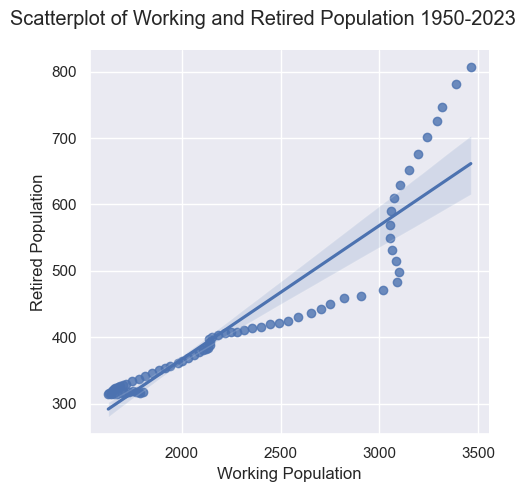

In [223]:
sns.set_theme()

# Plot sepal width as a function of sepal_length across days
plot = sns.lmplot(
    data=pops_sb_dwr,
    x="Working", y="Retired",
    height=5)

# Use more informative axis labels than are provided by default
plot.set_axis_labels("Working Population", "Retired Population")
plot.fig.suptitle("Scatterplot of Working and Retired Population 1950-2023")
plt.subplots_adjust(top=0.9)


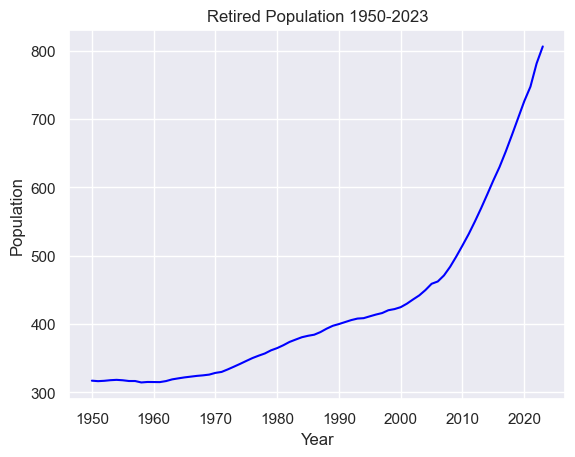

In [224]:
sns.lineplot(
    data=pops_sb_dwr,
    x="Year",
    y="Retired",
    label="Retired",
    color = "blue")

plt.xlabel('Year')
plt.ylabel('Population')
plt.title("Retired Population 1950-2023")

plt.legend().remove()
plt.show()

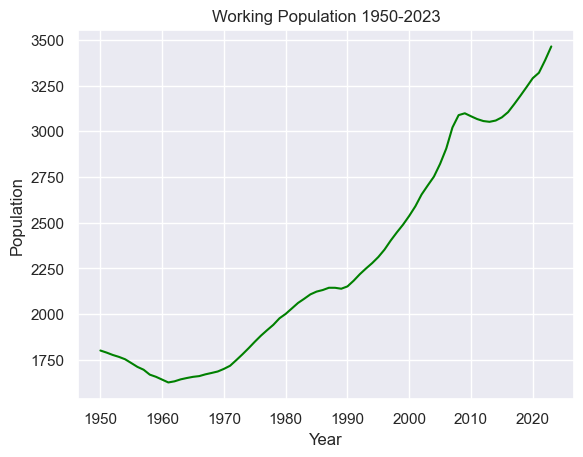

In [225]:
sns.lineplot(
    data=pops_sb_dwr,
    x="Year",
    y="Working",
    label="Working",
    color = "green")

plt.xlabel('Year')
plt.ylabel('Population')
plt.title("Working Population 1950-2023")

plt.legend().remove()
plt.show()

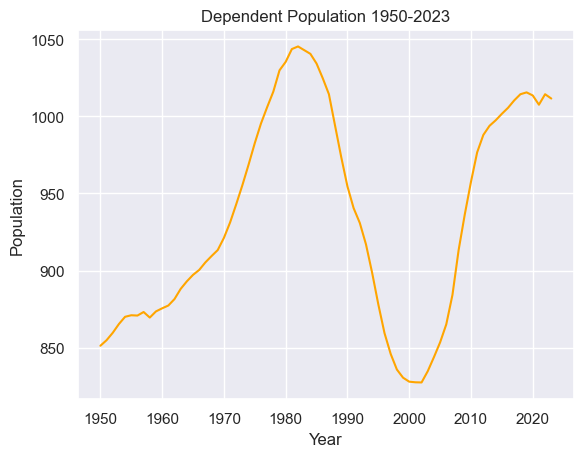

In [226]:
sns.lineplot(
    data=pops_sb_dwr,
    x="Year",
    y="Dependent",
    label="Dependent",
    color = "orange")

plt.xlabel('Year')
plt.ylabel('Population')
plt.title("Dependent Population 1950-2023")

plt.legend().remove()
plt.show()

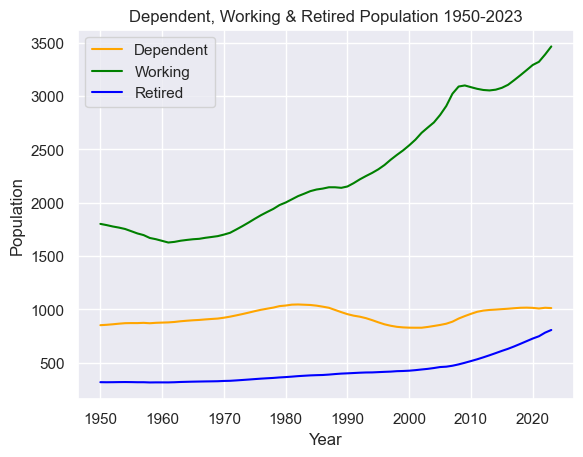

In [227]:
sns.lineplot(
    data=pops_sb_dwr,
    x="Year",
    y ="Dependent",
    label="Dependent",
    color = "orange")

sns.lineplot(
    data=pops_sb_dwr,
    x="Year",
    y="Working",
    label="Working",
    color = "green")

sns.lineplot(
    data=pops_sb_dwr,
    x="Year",
    y="Retired",
    label="Retired",
    color = "blue")

plt.xlabel('Year')
plt.ylabel('Population')

plt.title("Dependent, Working & Retired Population 1950-2023")

plt.legend()
plt.show()

# Choropleth Map of Ireland

## CSO Classifications of Regions & Counties:

https://www.cso.ie/en/methods/classifications/standardcountiesandnutsregions/


In [228]:
counties = pd.read_csv("irish_region_counties.csv")
counties.head(10)

Ref_Code    Region     County
0      CNC    Border      Cavan
1      DLC    Border    Donegal
2      LMC    Border    Leitrim
3      MNC    Border   Monaghan
4      SOC    Border      Sligo
5      MOC      West       Mayo
6      RNC      West  Roscommon
7      GYC      West     Galway
8      CEC  Mid-West      Clare
9      TYC  Mid-West  Tipperary

## Choropleth: Population by Region

###  Population by Region

In [229]:
counties_pop = popc_aa_sb.drop(["STATISTIC Label", "Age Group", "Sex", "UNIT", "sex_id", "age_id", "region_id"],axis=1)
counties_pop = counties.merge(counties_pop).set_index("County")
counties_pop

Ref_Code   Region  Year  VALUE
County                                  
Cavan          CNC   Border  2011  391.9
Cavan          CNC   Border  2012  392.1
Cavan          CNC   Border  2013  393.1
Cavan          CNC   Border  2014  392.0
Cavan          CNC   Border  2015  391.9
...            ...      ...   ...    ...
Westmeath      WMC  Midland  2019  309.0
Westmeath      WMC  Midland  2020  309.9
Westmeath      WMC  Midland  2021  314.2
Westmeath      WMC  Midland  2022  320.3
Westmeath      WMC  Midland  2023  324.6

[338 rows x 4 columns]

In [230]:
counties_pop.count()

Ref_Code    338
Region      338
Year        338
VALUE       338
dtype: int64

### Importing the Map & Coordinates

Map files from a Github user:

https://github.com/SaM-92/Choropleth-map-Ireland

Found through article on Medium/Towards Data Science:

https://towardsdatascience.com/green-like-ireland-choropleth-map-of-irish-wind-energy-26603106fe3e

In [231]:
ROI_map= gpd.read_file("IRL_adm1.shp")
ROI_map=ROI_map.set_index('NAME_1')
ROI_map.head()

ID_0  ISO   NAME_0  ID_1                 TYPE_1 ENGTYPE_1 NL_NAME_1  \
NAME_1                                                                         
Carlow    109  IRL  Ireland     1  Administrative County    County      None   
Cavan     109  IRL  Ireland     2  Administrative County    County      None   
Clare     109  IRL  Ireland     3  Administrative County    County      None   
Cork      109  IRL  Ireland     4     Traditional County    County      None   
Donegal   109  IRL  Ireland     5  Administrative County    County      None   

                      VARNAME_1  \
NAME_1                            
Carlow              Ceatharlach   
Cavan                 An Cabhán   
Clare                   An Clár   
Cork                   Corcaigh   
Donegal  Dún na nGall|Tyrconnel   

                                                  geometry  
NAME_1                                                      
Carlow   POLYGON ((-6.59242 52.70810, -6.59292 52.70730...  
Cavan    POLYGON ((-7.27517 53.78388, -7.27538 53.78377...  
Clare    MULTIPOLYGON (((-9.04528 52.71819, -9.04528 52...  
Cork     MULTIPOLYGON (((-10.16361 51.57986, -10.16528 ...  
Donegal  MULTIPOLYGON (((-7.24083 55.44958, -7.24078 55...

In [232]:
# JOIN Map/Coordinates DF with Counties/ Regions DF ON Counties
counties_pop_geo = ROI_map.join(counties_pop)
counties_pop_geo

ID_0  ISO   NAME_0  ID_1                 TYPE_1 ENGTYPE_1 NL_NAME_1  \
NAME_1                                                                         
Carlow    109  IRL  Ireland     1  Administrative County    County      None   
Carlow    109  IRL  Ireland     1  Administrative County    County      None   
Carlow    109  IRL  Ireland     1  Administrative County    County      None   
Carlow    109  IRL  Ireland     1  Administrative County    County      None   
Carlow    109  IRL  Ireland     1  Administrative County    County      None   
...       ...  ...      ...   ...                    ...       ...       ...   
Wicklow   109  IRL  Ireland    26  Administrative County    County      None   
Wicklow   109  IRL  Ireland    26  Administrative County    County      None   
Wicklow   109  IRL  Ireland    26  Administrative County    County      None   
Wicklow   109  IRL  Ireland    26  Administrative County    County      None   
Wicklow   109  IRL  Ireland    26  Administrative County    County      None   

             VARNAME_1                                           geometry  \
NAME_1                                                                      
Carlow     Ceatharlach  POLYGON ((-6.59242 52.70810, -6.59292 52.70730...   
Carlow     Ceatharlach  POLYGON ((-6.59242 52.70810, -6.59292 52.70730...   
Carlow     Ceatharlach  POLYGON ((-6.59242 52.70810, -6.59292 52.70730...   
Carlow     Ceatharlach  POLYGON ((-6.59242 52.70810, -6.59292 52.70730...   
Carlow     Ceatharlach  POLYGON ((-6.59242 52.70810, -6.59292 52.70730...   
...                ...                                                ...   
Wicklow  Cill Mhantáin  POLYGON ((-6.10917 52.83458, -6.10972 52.83458...   
Wicklow  Cill Mhantáin  POLYGON ((-6.10917 52.83458, -6.10972 52.83458...   
Wicklow  Cill Mhantáin  POLYGON ((-6.10917 52.83458, -6.10972 52.83458...   
Wicklow  Cill Mhantáin  POLYGON ((-6.10917 52.83458, -6.10972 52.83458...   
Wicklow  Cill Mhantáin  POLYGON ((-6.10917 52.83458, -6.10972 52.83458...   

        Ref_Code      Region  Year  VALUE  
NAME_1                                     
Carlow       CWC  South-East  2011  410.3  
Carlow       CWC  South-East  2012  411.6  
Carlow       CWC  South-East  2013  413.7  
Carlow       CWC  South-East  2014  413.5  
Carlow       CWC  South-East  2015  415.6  
...          ...         ...   ...    ...  
Wicklow      WKC    Mid-East  2019  731.9  
Wicklow      WKC    Mid-East  2020  747.2  
Wicklow      WKC    Mid-East  2021  755.3  
Wicklow      WKC    Mid-East  2022  774.0  
Wicklow      WKC    Mid-East  2023  777.1  

[338 rows x 13 columns]

In [233]:
counties_pop_geo.count()

ID_0         338
ISO          338
NAME_0       338
ID_1         338
TYPE_1       338
ENGTYPE_1    338
NL_NAME_1      0
VARNAME_1    338
geometry     338
Ref_Code     338
Region       338
Year         338
VALUE        338
dtype: int64

In [234]:
counties_pop_geo.describe()

ID_0        ID_1         Year        VALUE
count  338.0  338.000000   338.000000   338.000000
mean   109.0   13.500000  2017.000000   514.964793
std      0.0    7.511119     3.747205   218.642894
min    109.0    1.000000  2011.000000   283.800000
25%    109.0    7.000000  2014.000000   400.300000
50%    109.0   13.500000  2017.000000   444.900000
75%    109.0   20.000000  2020.000000   664.100000
max    109.0   26.000000  2023.000000  1501.500000

### Split into Years

In [235]:
counties_pop_geo_2023 = counties_pop_geo.loc[counties_pop_geo["Year"] == 2023]
counties_pop_geo_2022 = counties_pop_geo.loc[counties_pop_geo["Year"] == 2022]
counties_pop_geo_2021 = counties_pop_geo.loc[counties_pop_geo["Year"] == 2021]
counties_pop_geo_2020 = counties_pop_geo.loc[counties_pop_geo["Year"] == 2020]
counties_pop_geo_2019 = counties_pop_geo.loc[counties_pop_geo["Year"] == 2019]
counties_pop_geo_2018 = counties_pop_geo.loc[counties_pop_geo["Year"] == 2018]
counties_pop_geo_2017 = counties_pop_geo.loc[counties_pop_geo["Year"] == 2017]
counties_pop_geo_2016 = counties_pop_geo.loc[counties_pop_geo["Year"] == 2016]
counties_pop_geo_2015 = counties_pop_geo.loc[counties_pop_geo["Year"] == 2015]
counties_pop_geo_2014 = counties_pop_geo.loc[counties_pop_geo["Year"] == 2014]
counties_pop_geo_2013 = counties_pop_geo.loc[counties_pop_geo["Year"] == 2013]
counties_pop_geo_2012 = counties_pop_geo.loc[counties_pop_geo["Year"] == 2012]
counties_pop_geo_2011 = counties_pop_geo.loc[counties_pop_geo["Year"] == 2011]




### Plotting the Choropleth
***(Population by Region)***

***Plot Motives:***
The goal with this visualisation is to allow the reader to review the change in population across the regions over the given time period.

***Evolution of Design:***
We are used to seeing Ireland in shades of green and this would be the preferred colour to show the varying population levels across the regions in the country. However, as seen in the 2 plots below, there are not a significant enough difference in the sliding scale of shade Yellow-Green to adequately indicate the difference between the population levels. 

Text(0.5, 1.0, 'Irish Population Across Regions 2023')

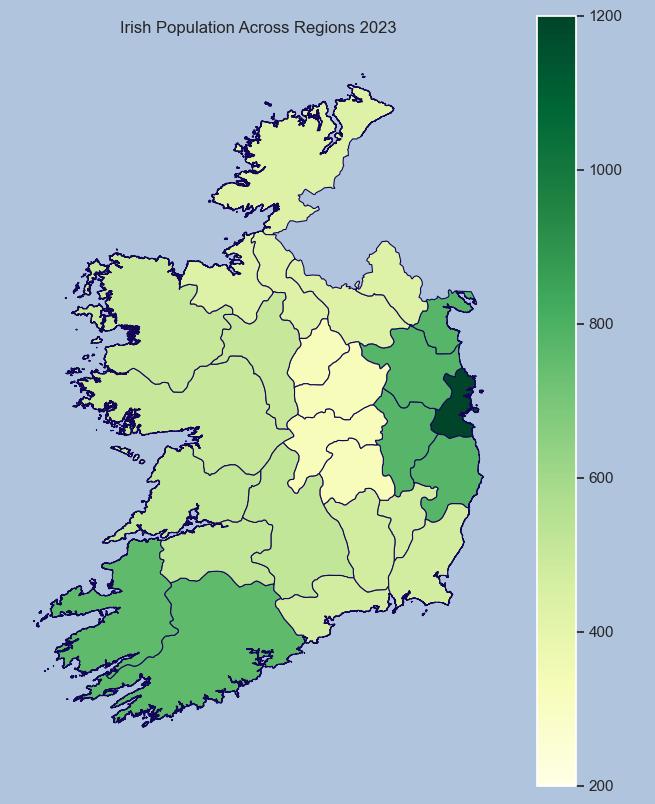

In [236]:
variable = 'VALUE'
vmin, vmax = 200, 1200
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_pop_geo_2023.plot(column='VALUE', 
             cmap='YlGn', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('VALUE',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Irish Population Across Regions 2023")

Text(0.5, 1.0, 'Irish Population Across Regions 2011')

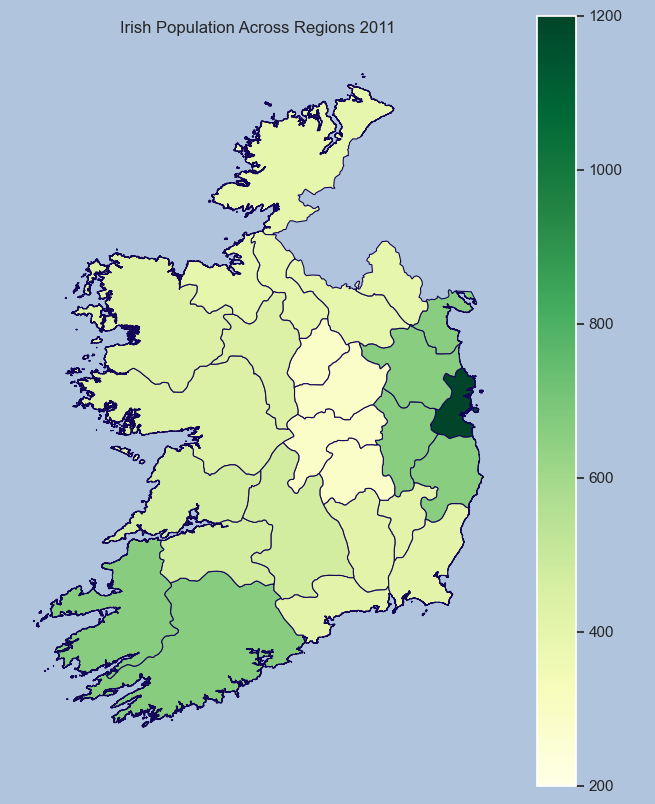

In [237]:
variable = 'VALUE'
vmin, vmax = 200, 1200
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_pop_geo_2011.plot(column='VALUE', 
             cmap='YlGn', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('VALUE',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Irish Population Across Regions 2011")

***Evolution of Design: (...contd) ***

https://matplotlib.org/stable/users/explain/colors/colormaps.html

Adjusting the Matplotlib Colormap to tab10 allows for better indication of both difference across regions, and also the actual figures. From reviewing the min and max of the populations levels it is seen that the range is approx 300 - 1500. As the colour shades are split into 10 sections, this range of population is applied at 1,000. This means each colour represents a range of 100, with the intent of increasing the meaning of the colour to the viewer. It can be used to review the approx (within 100) population level of the region, compare with others, and compare with the same region in other year plots. Consistency in set up across of these yearly plots is important so the reader can review and compare applying one set of definitions.i.e. red = 500-600 across all plots.

#***From previous exercises completed, there is significant jump between Dublin Region and the next higheest population***


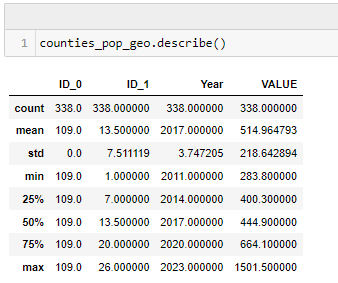

Text(0.5, 1.0, 'Irish Population Across Regions 2023')

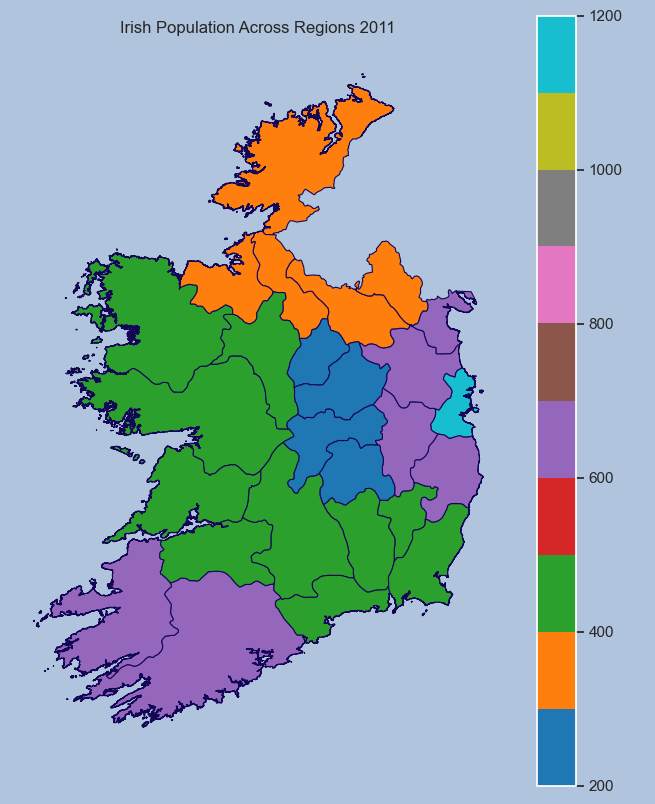

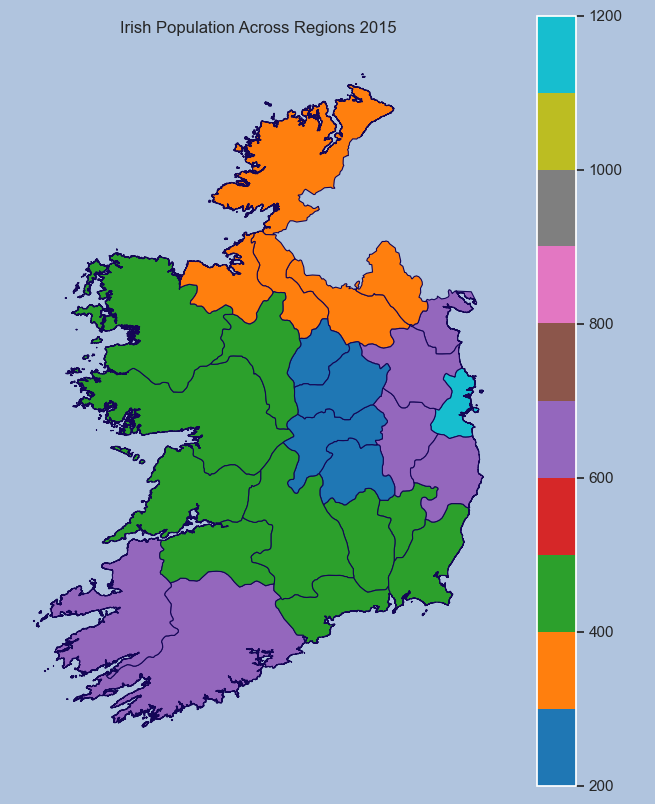

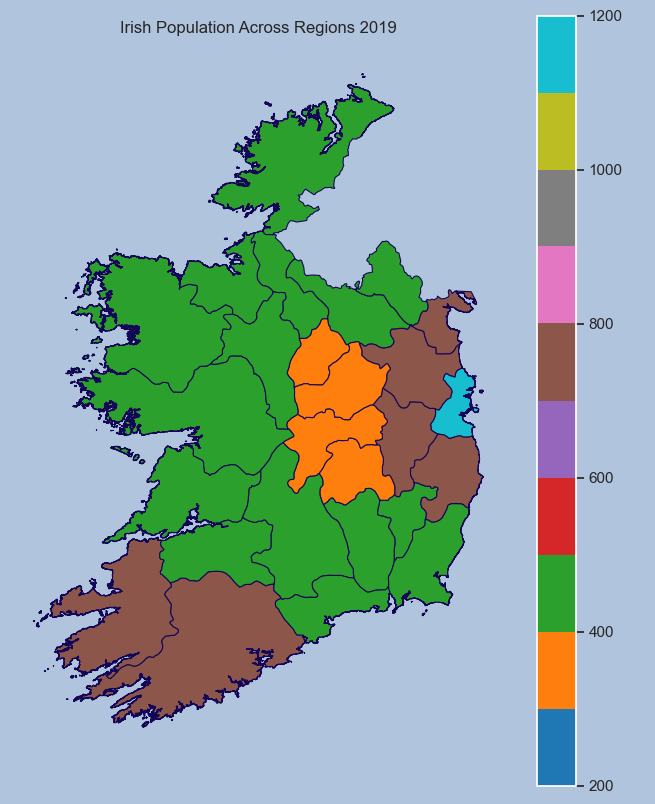

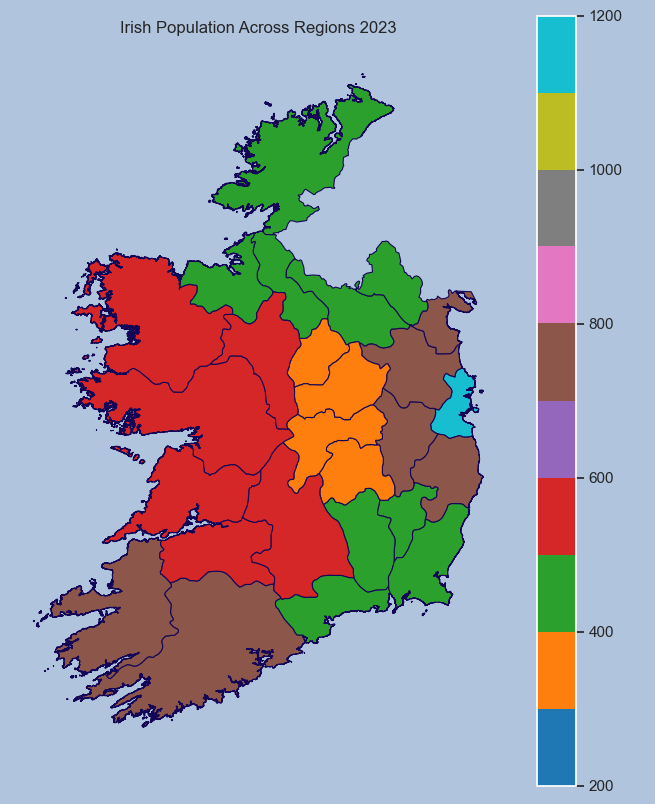

In [238]:
variable = 'VALUE'
vmin, vmax = 200, 1200


fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_pop_geo_2011.plot(column='VALUE', 
             cmap='tab10', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('VALUE',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Irish Population Across Regions 2011")


fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_pop_geo_2015.plot(column='VALUE', 
             cmap='tab10', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('VALUE',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Irish Population Across Regions 2015")


fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_pop_geo_2019.plot(column='VALUE', 
             cmap='tab10', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('VALUE',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Irish Population Across Regions 2019")



fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_pop_geo_2023.plot(column='VALUE', 
             cmap='tab10', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('VALUE',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Irish Population Across Regions 2023")

***Final Design:***
The plots clearly show the growth, decline and general evolution of the population across the regions over the time period 2011-2023. As this is a 12 year period, the plots are separated evenly into 4 year intervals. This allows the reader to follow growth / decline  of individual regions, or compare with other regions over the given intervals.
An possible improvement, or next iteration of this plot would be to create an animation showing each year so the reader could view the changes over time and pause at will. The reader would have to be viewing the plot in an interactive environment

***Interpretation:***



## Choropleth: of Working / Retired Population Across Regions 2011/2015/2019/2023

In [239]:
counties_popc_rg_sb_dwr = counties.merge(popc_rg_sb_dwr).set_index("County")
counties_popc_rg_sb_dwr

Ref_Code   Region  Year  Dependent  Working  Retired
County                                                        
Cavan          CNC   Border  2011       87.2    253.8     51.1
Cavan          CNC   Border  2012       87.4    252.0     52.7
Cavan          CNC   Border  2013       87.7    251.1     54.3
Cavan          CNC   Border  2014       87.3    248.9     55.9
Cavan          CNC   Border  2015       87.3    247.3     57.3
...            ...      ...   ...        ...      ...      ...
Westmeath      WMC  Midland  2019       69.6    198.6     40.8
Westmeath      WMC  Midland  2020       68.6    198.5     42.8
Westmeath      WMC  Midland  2021       67.7    201.5     44.8
Westmeath      WMC  Midland  2022       67.1    206.3     46.9
Westmeath      WMC  Midland  2023       65.4    210.5     48.5

[338 rows x 6 columns]

In [240]:
counties_popc_rg_sb_dwr_geo = ROI_map.join(counties_popc_rg_sb_dwr)
counties_popc_rg_sb_dwr_geo.describe()

ID_0        ID_1         Year   Dependent      Working     Retired
count  338.0  338.000000   338.000000  338.000000   338.000000  338.000000
mean   109.0   13.500000  2017.000000  109.541124   334.415976   71.023964
std      0.0    7.511119     3.747205   43.342715   150.808730   27.359789
min    109.0    1.000000  2011.000000   65.400000   185.900000   31.700000
25%    109.0    7.000000  2014.000000   87.200000   253.800000   55.900000
50%    109.0   13.500000  2017.000000   92.000000   287.800000   67.600000
75%    109.0   20.000000  2020.000000  141.100000   436.400000   80.525000
max    109.0   26.000000  2023.000000  272.700000  1025.400000  203.400000

Text(0.5, 1.0, 'Retired Age Irish Population Across Regions 2023')

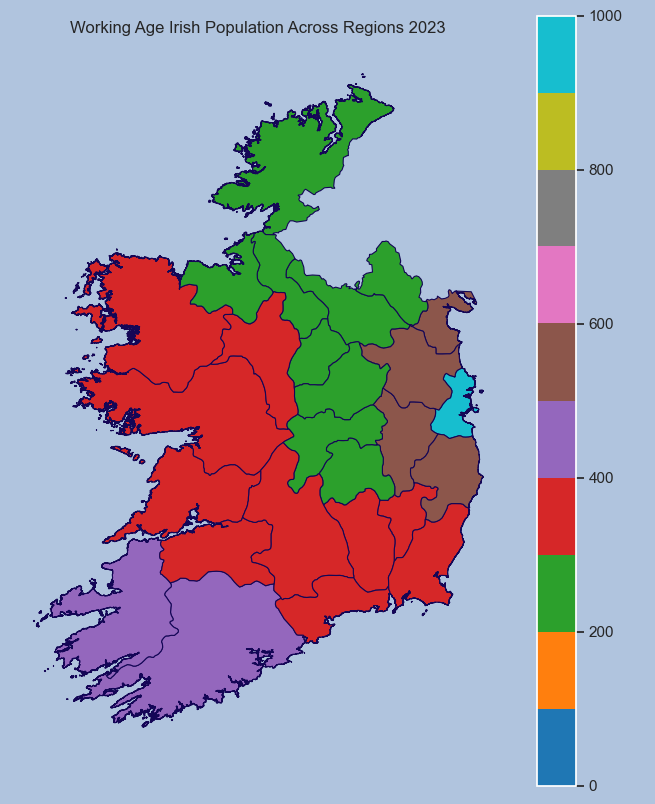

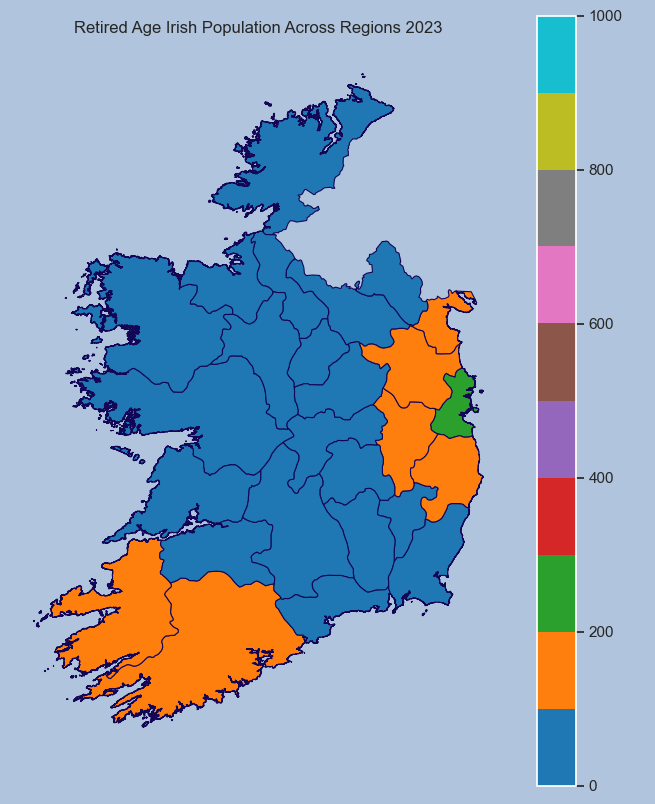

In [241]:
variable = 'VALUE'
vmin, vmax = 0, 1000

fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_popc_rg_sb_dwr_geo.loc[counties_popc_rg_sb_dwr_geo["Year"]==2023].plot(column='Working', 
             cmap='tab10', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('VALUE',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Working Age Irish Population Across Regions 2023")

fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_popc_rg_sb_dwr_geo.loc[counties_popc_rg_sb_dwr_geo["Year"]==2023].plot(column='Retired', 
             cmap='tab10', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('VALUE',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Retired Age Irish Population Across Regions 2023")

Text(0.5, 1.0, 'Retired Age Irish Population Across Regions 2019')

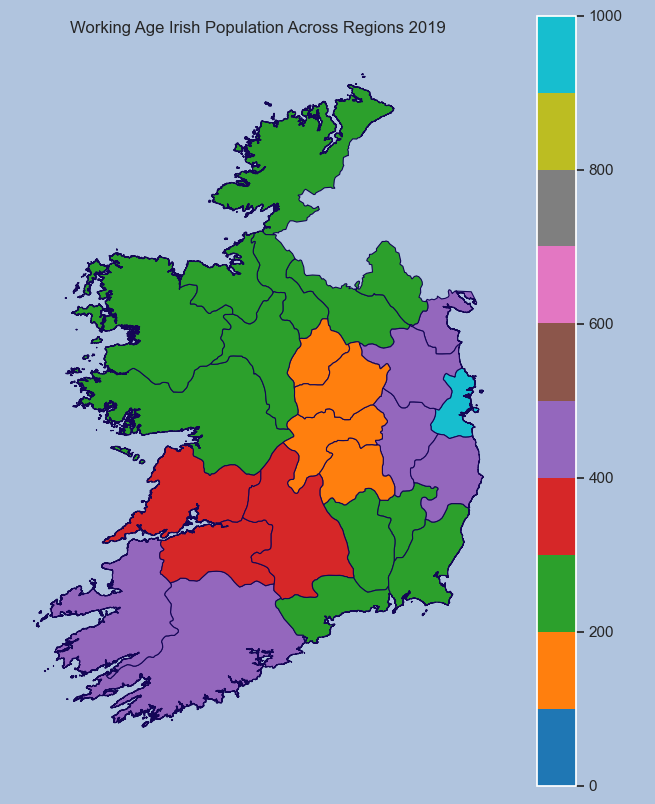

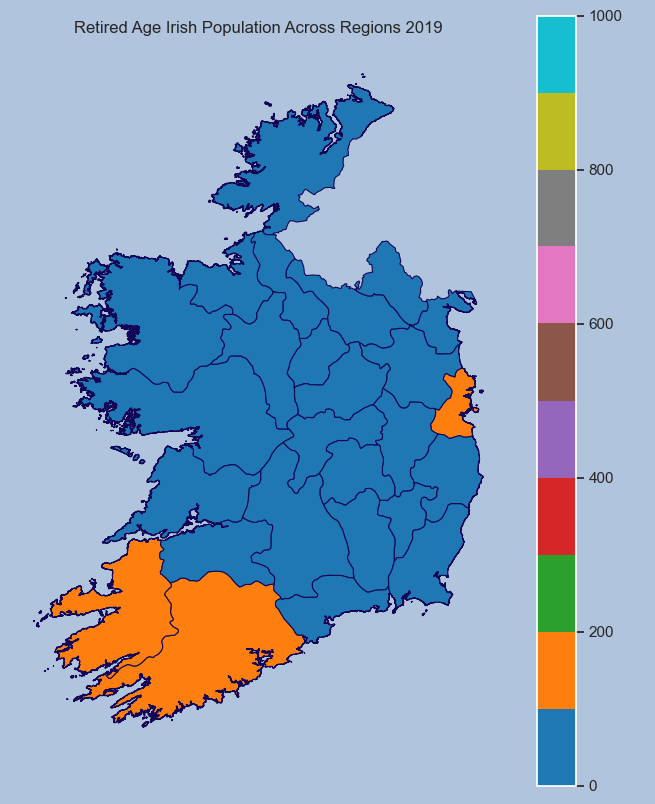

In [242]:
variable = 'VALUE'
vmin, vmax = 0, 1000

fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_popc_rg_sb_dwr_geo.loc[counties_popc_rg_sb_dwr_geo["Year"]==2019].plot(column='Working', 
             cmap='tab10', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('Working',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Working Age Irish Population Across Regions 2019")

fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_popc_rg_sb_dwr_geo.loc[counties_popc_rg_sb_dwr_geo["Year"]==2019].plot(column='Retired', 
             cmap='tab10', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('Retired',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Retired Age Irish Population Across Regions 2019")

Text(0.5, 1.0, 'Retired Age Irish Population Across Regions 2015')

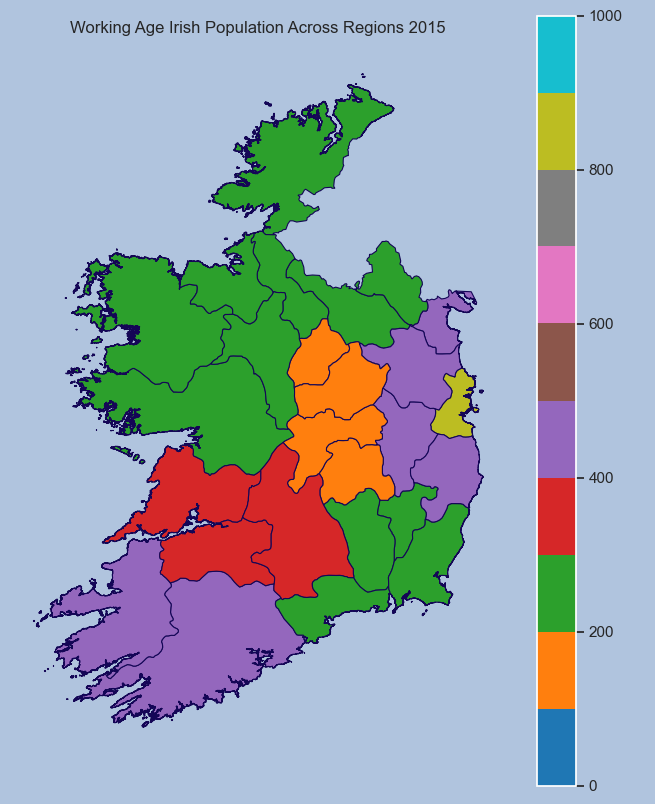

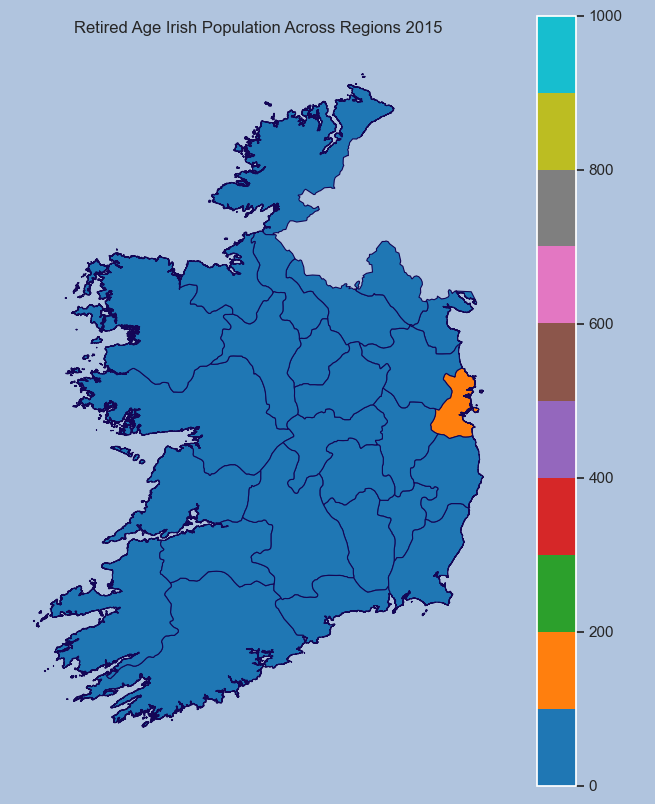

In [243]:
fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_popc_rg_sb_dwr_geo.loc[counties_popc_rg_sb_dwr_geo["Year"]==2015].plot(column='Working', 
             cmap='tab10', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('Working',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Working Age Irish Population Across Regions 2015")

fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_popc_rg_sb_dwr_geo.loc[counties_popc_rg_sb_dwr_geo["Year"]==2015].plot(column='Retired', 
             cmap='tab10', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('Retired',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Retired Age Irish Population Across Regions 2015")

Text(0.5, 1.0, 'Retired Age Irish Population Across Regions 2011')

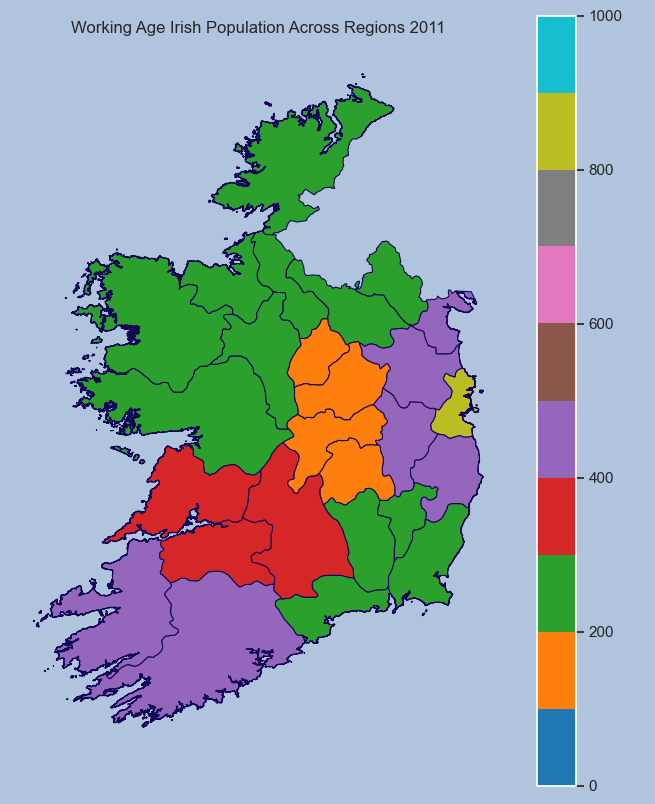

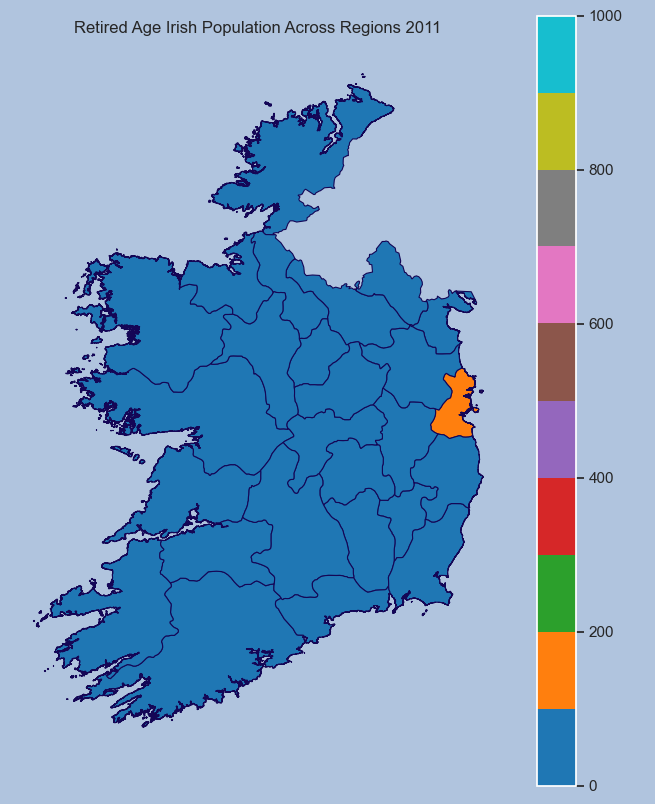

In [244]:
fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_popc_rg_sb_dwr_geo.loc[counties_popc_rg_sb_dwr_geo["Year"]==2011].plot(column='Working', 
             cmap='tab10', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('Working',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Working Age Irish Population Across Regions 2011")

fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_popc_rg_sb_dwr_geo.loc[counties_popc_rg_sb_dwr_geo["Year"]==2011].plot(column='Retired', 
             cmap='tab10', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('Retired',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Retired Age Irish Population Across Regions 2011")



## Choropleth: Retired Population Across Regions 2011/2015/2019/2023

Text(0.5, 1.0, 'Retired Age Irish Population Across Regions 2023')

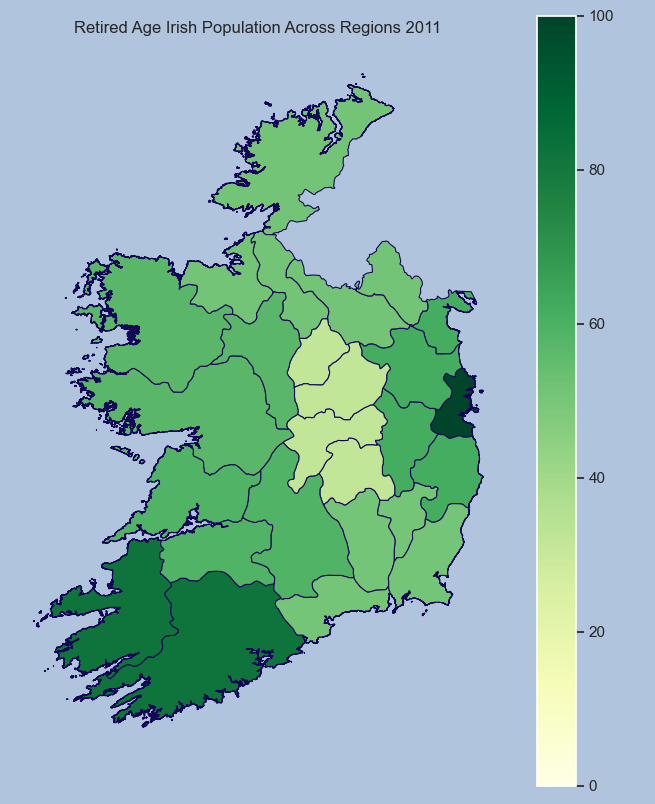

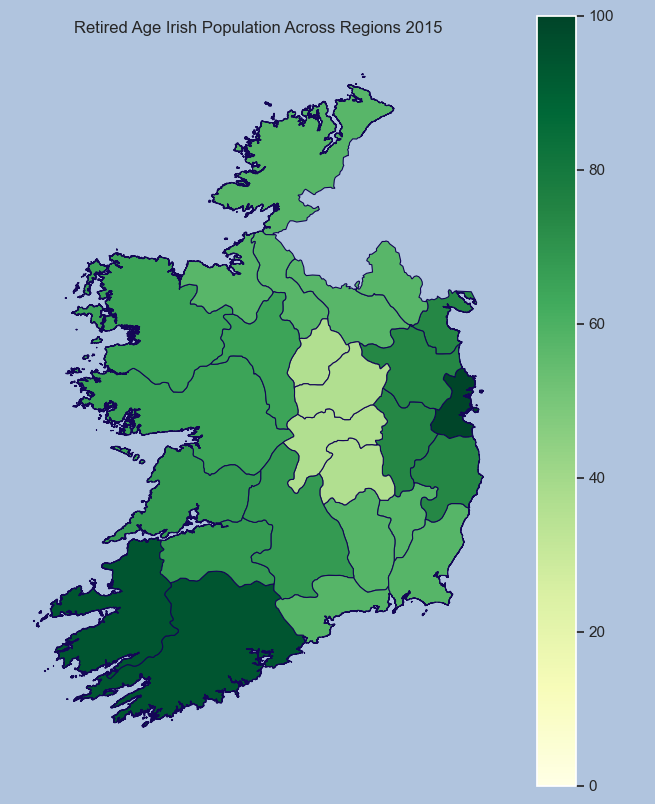

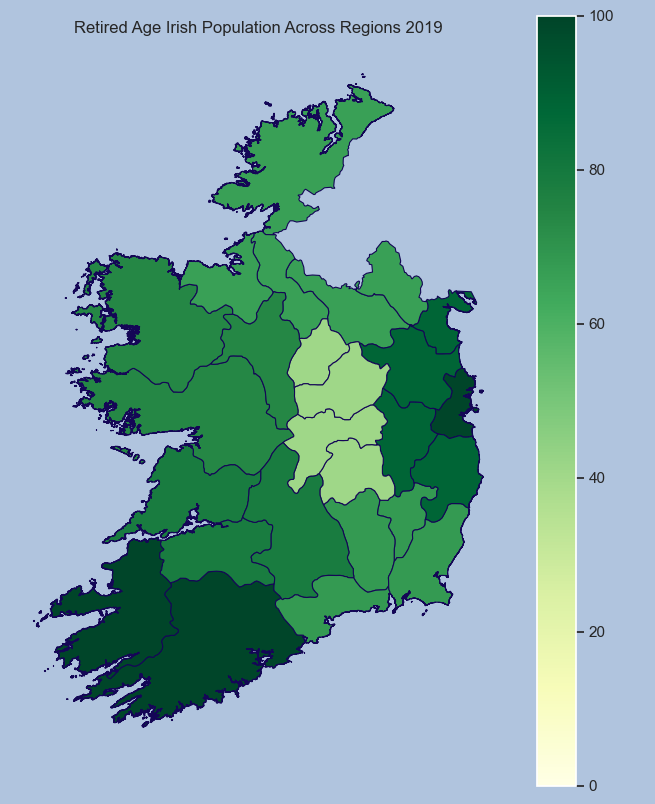

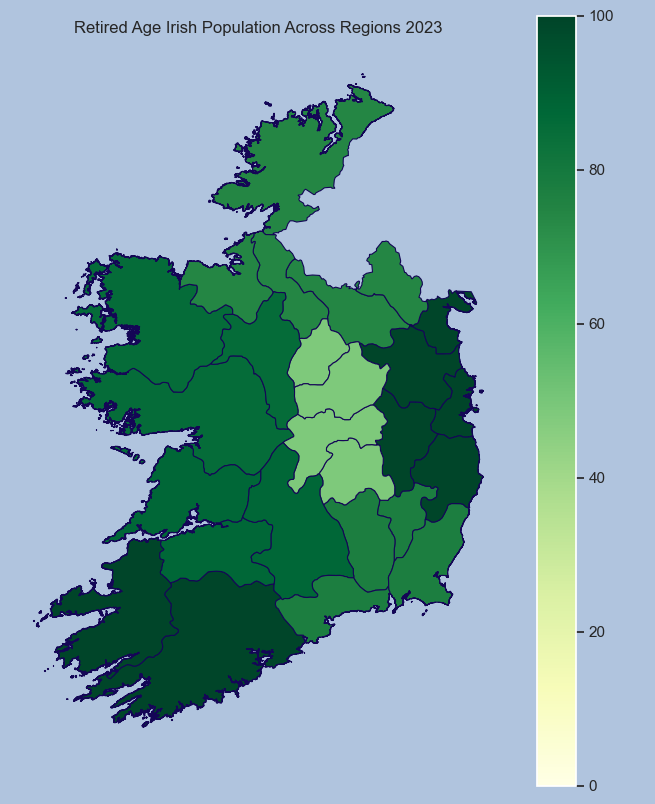

In [245]:
vmin, vmax = 0, 100

fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_popc_rg_sb_dwr_geo.loc[counties_popc_rg_sb_dwr_geo["Year"]==2011].plot(column='Retired', 
             cmap='YlGn', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('Retired',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Retired Age Irish Population Across Regions 2011")


fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_popc_rg_sb_dwr_geo.loc[counties_popc_rg_sb_dwr_geo["Year"]==2015].plot(column='Retired', 
             cmap='YlGn', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('Retired',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Retired Age Irish Population Across Regions 2015")


fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_popc_rg_sb_dwr_geo.loc[counties_popc_rg_sb_dwr_geo["Year"]==2019].plot(column='Retired', 
             cmap='YlGn', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('Retired',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Retired Age Irish Population Across Regions 2019")

fig, ax = plt.subplots(figsize=(8,10),facecolor='lightsteelblue')
fig=counties_popc_rg_sb_dwr_geo.loc[counties_popc_rg_sb_dwr_geo["Year"]==2023].plot(column='Retired', 
             cmap='YlGn', 
             linewidth=0.8, 
             ax=ax, 
             edgecolor='#140656',
             facecolor='lightslategray',
             vmin=vmin, 
             vmax=vmax,
             legend=True,
             norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('Retired',
            xy=(0.9, .65),
            rotation=270, 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='black')
plt.title("Retired Age Irish Population Across Regions 2023")

# END

***(Choropleth Maps of Ireland)***

# Machine Learning WIP 1 : Population 2011 - 2023

## Preparing Data for ML

### OneHotEncoder


Categorical Variables require transformation in order to be use in machine learning models. Burkov (2019) explains this is because many machine learning algorithms are based on mathematical equations and therefore cannot use the categorical labels.

The popc_r categorical variables have been transformed to numerical for plotting and ease of manipulation, but they have been given ordered numerical Values, which will affect the machine learning model. Burkov (2019) reviews this matter and advises that non-ordered data should be encoded use the OneHotEncoder tool available on Python.

The Region and Sex will need to be transformed via the encoder, but Age can be transformed into ordered numerical data as the order of the Age groups forms an important part of any relationship identified

The main goal of machine learning models is to identify relationships and create a reliable model around strong relationships, therefore if the age variable maintains it's true definition during transformation, the model results that is created around it can easily be related back to the original categorical variables.

## ML on Year, State Region and Working, Retired and Dependent Population 2011 - 2023

### Prepare the Data for ML

In [246]:
popc_rg_sb_dwr

Year      Region  Dependent  Working  Retired
0    2011      Border       87.2    253.8     51.1
1    2011      Dublin      244.7    878.2    138.6
2    2011    Mid-East      157.8    438.2     61.5
3    2011    Mid-West       99.4    308.5     58.9
4    2011     Midland       66.2    185.9     31.7
..    ...         ...        ...      ...      ...
99   2023    Mid-West       97.0    334.7     87.8
100  2023     Midland       65.4    210.5     48.5
101  2023  South-East       89.8    301.5     77.4
102  2023  South-West      141.4    492.3    123.7
103  2023        West       95.1    320.0     85.7

[104 rows x 5 columns]

#### Encode the Categorical Data

In [247]:
popc_rg_sb_dwr

Year      Region  Dependent  Working  Retired
0    2011      Border       87.2    253.8     51.1
1    2011      Dublin      244.7    878.2    138.6
2    2011    Mid-East      157.8    438.2     61.5
3    2011    Mid-West       99.4    308.5     58.9
4    2011     Midland       66.2    185.9     31.7
..    ...         ...        ...      ...      ...
99   2023    Mid-West       97.0    334.7     87.8
100  2023     Midland       65.4    210.5     48.5
101  2023  South-East       89.8    301.5     77.4
102  2023  South-West      141.4    492.3    123.7
103  2023        West       95.1    320.0     85.7

[104 rows x 5 columns]

In [248]:
DF = "popc_rg_sb_dwr_ec"
Description = "popc_rg_sb_dwr_ec: Region Encoded"
df_index_table.loc[len(df_index_table)] = [DF, Description]

# Initialize the encoder
encoder = OneHotEncoder(sparse=False)

# Convert the encoded column back to a DataFrame
encoded_popc_rg_sb_dwr_region = pd.DataFrame(encoder.fit_transform(popc_rg_sb_dwr[["Region"]]), columns=encoder.get_feature_names_out(["Region"]))

# Replace the original column with the encoded values
popc_rg_sb_dwr_ec = pd.concat([popc_rg_sb_dwr, encoded_popc_rg_sb_dwr_region], axis=1)
popc_rg_sb_dwr_ec

     

Year      Region  Dependent  Working  Retired  Region_Border  \
0    2011      Border       87.2    253.8     51.1            1.0   
1    2011      Dublin      244.7    878.2    138.6            0.0   
2    2011    Mid-East      157.8    438.2     61.5            0.0   
3    2011    Mid-West       99.4    308.5     58.9            0.0   
4    2011     Midland       66.2    185.9     31.7            0.0   
..    ...         ...        ...      ...      ...            ...   
99   2023    Mid-West       97.0    334.7     87.8            0.0   
100  2023     Midland       65.4    210.5     48.5            0.0   
101  2023  South-East       89.8    301.5     77.4            0.0   
102  2023  South-West      141.4    492.3    123.7            0.0   
103  2023        West       95.1    320.0     85.7            0.0   

     Region_Dublin  Region_Mid-East  Region_Mid-West  Region_Midland  \
0              0.0              0.0              0.0             0.0   
1              1.0              0.0              0.0             0.0   
2              0.0              1.0              0.0             0.0   
3              0.0              0.0              1.0             0.0   
4              0.0              0.0              0.0             1.0   
..             ...              ...              ...             ...   
99             0.0              0.0              1.0             0.0   
100            0.0              0.0              0.0             1.0   
101            0.0              0.0              0.0             0.0   
102            0.0              0.0              0.0             0.0   
103            0.0              0.0              0.0             0.0   

     Region_South-East  Region_South-West  Region_West  
0                  0.0                0.0          0.0  
1                  0.0                0.0          0.0  
2                  0.0                0.0          0.0  
3                  0.0                0.0          0.0  
4                  0.0                0.0          0.0  
..                 ...                ...          ...  
99                 0.0                0.0          0.0  
100                0.0                0.0          0.0  
101                1.0                0.0          0.0  
102                0.0                1.0          0.0  
103                0.0                0.0          1.0  

[104 rows x 13 columns]

In [249]:
popc_rg_sb_dwr_ec.columns

Index(['Year', 'Region', 'Dependent', 'Working', 'Retired', 'Region_Border',
       'Region_Dublin', 'Region_Mid-East', 'Region_Mid-West', 'Region_Midland',
       'Region_South-East', 'Region_South-West', 'Region_West'],
      dtype='object')

In [250]:
popc_rg_sb_dwr_ec_r = popc_rg_sb_dwr_ec[['Year', 
                                         'Dependent', 
                                         'Working', 
                                         'Retired', 
                                         'Region_Border',
                                         'Region_Dublin',
                                         'Region_Mid-East',
                                         'Region_Mid-West',
                                         'Region_Midland',
                                         'Region_South-East',
                                         'Region_South-West',
                                         'Region_West']]
popc_rg_sb_dwr_ec_r

Year  Dependent  Working  Retired  Region_Border  Region_Dublin  \
0    2011       87.2    253.8     51.1            1.0            0.0   
1    2011      244.7    878.2    138.6            0.0            1.0   
2    2011      157.8    438.2     61.5            0.0            0.0   
3    2011       99.4    308.5     58.9            0.0            0.0   
4    2011       66.2    185.9     31.7            0.0            0.0   
..    ...        ...      ...      ...            ...            ...   
99   2023       97.0    334.7     87.8            0.0            0.0   
100  2023       65.4    210.5     48.5            0.0            0.0   
101  2023       89.8    301.5     77.4            0.0            0.0   
102  2023      141.4    492.3    123.7            0.0            0.0   
103  2023       95.1    320.0     85.7            0.0            0.0   

     Region_Mid-East  Region_Mid-West  Region_Midland  Region_South-East  \
0                0.0              0.0             0.0                0.0   
1                0.0              0.0             0.0                0.0   
2                1.0              0.0             0.0                0.0   
3                0.0              1.0             0.0                0.0   
4                0.0              0.0             1.0                0.0   
..               ...              ...             ...                ...   
99               0.0              1.0             0.0                0.0   
100              0.0              0.0             1.0                0.0   
101              0.0              0.0             0.0                1.0   
102              0.0              0.0             0.0                0.0   
103              0.0              0.0             0.0                0.0   

     Region_South-West  Region_West  
0                  0.0          0.0  
1                  0.0          0.0  
2                  0.0          0.0  
3                  0.0          0.0  
4                  0.0          0.0  
..                 ...          ...  
99                 0.0          0.0  
100                0.0          0.0  
101                0.0          0.0  
102                1.0          0.0  
103                0.0          1.0  

[104 rows x 12 columns]

#### Correlation between features

In [251]:
popc_rg_sb_dwr_ec_r_correlation = popc_rg_sb_dwr_ec_r.corr().round(3)
print(popc_rg_sb_dwr_ec_r_correlation)

                    Year  Dependent  Working  Retired  Region_Border  \
Year               1.000      0.021    0.073    0.277         -0.000   
Dependent          0.021      1.000    0.987    0.924         -0.248   
Working            0.073      0.987    1.000    0.961         -0.246   
Retired            0.277      0.924    0.961    1.000         -0.200   
Region_Border     -0.000     -0.248   -0.246   -0.200          1.000   
Region_Dublin     -0.000      0.864    0.911    0.851         -0.143   
Region_Mid-East   -0.000      0.251    0.113   -0.004         -0.143   
Region_Mid-West    0.000     -0.172   -0.145   -0.093         -0.143   
Region_Midland     0.000     -0.370   -0.350   -0.426         -0.143   
Region_South-East  0.000     -0.224   -0.207   -0.189         -0.143   
Region_South-West  0.000      0.102    0.101    0.184         -0.143   
Region_West        0.000     -0.203   -0.177   -0.123         -0.143   

                   Region_Dublin  Region_Mid-East  Region_Mid-W

In [252]:
popc_rg_sb_dwr_ec_r_correlation.style.background_gradient(cmap='coolwarm', axis=None)


From the Correlation Matrix:
- "Region_Dublin", "Dependent", "Working" and "Retired" have a strong positive correlation which supports previous findings that more of the population is represented within the Dublin Region. 
- "Region_Dublin" will be removed.
- One of "Dependent", "Working" and "Retired" will be left in the test / train variables, and the others tested in subsequent Models

These correlations are strong enough to affect the Machine learning model to the point that they would cause overfitting, so they will be removed from train / test variables as appropriate.


<Axes: >

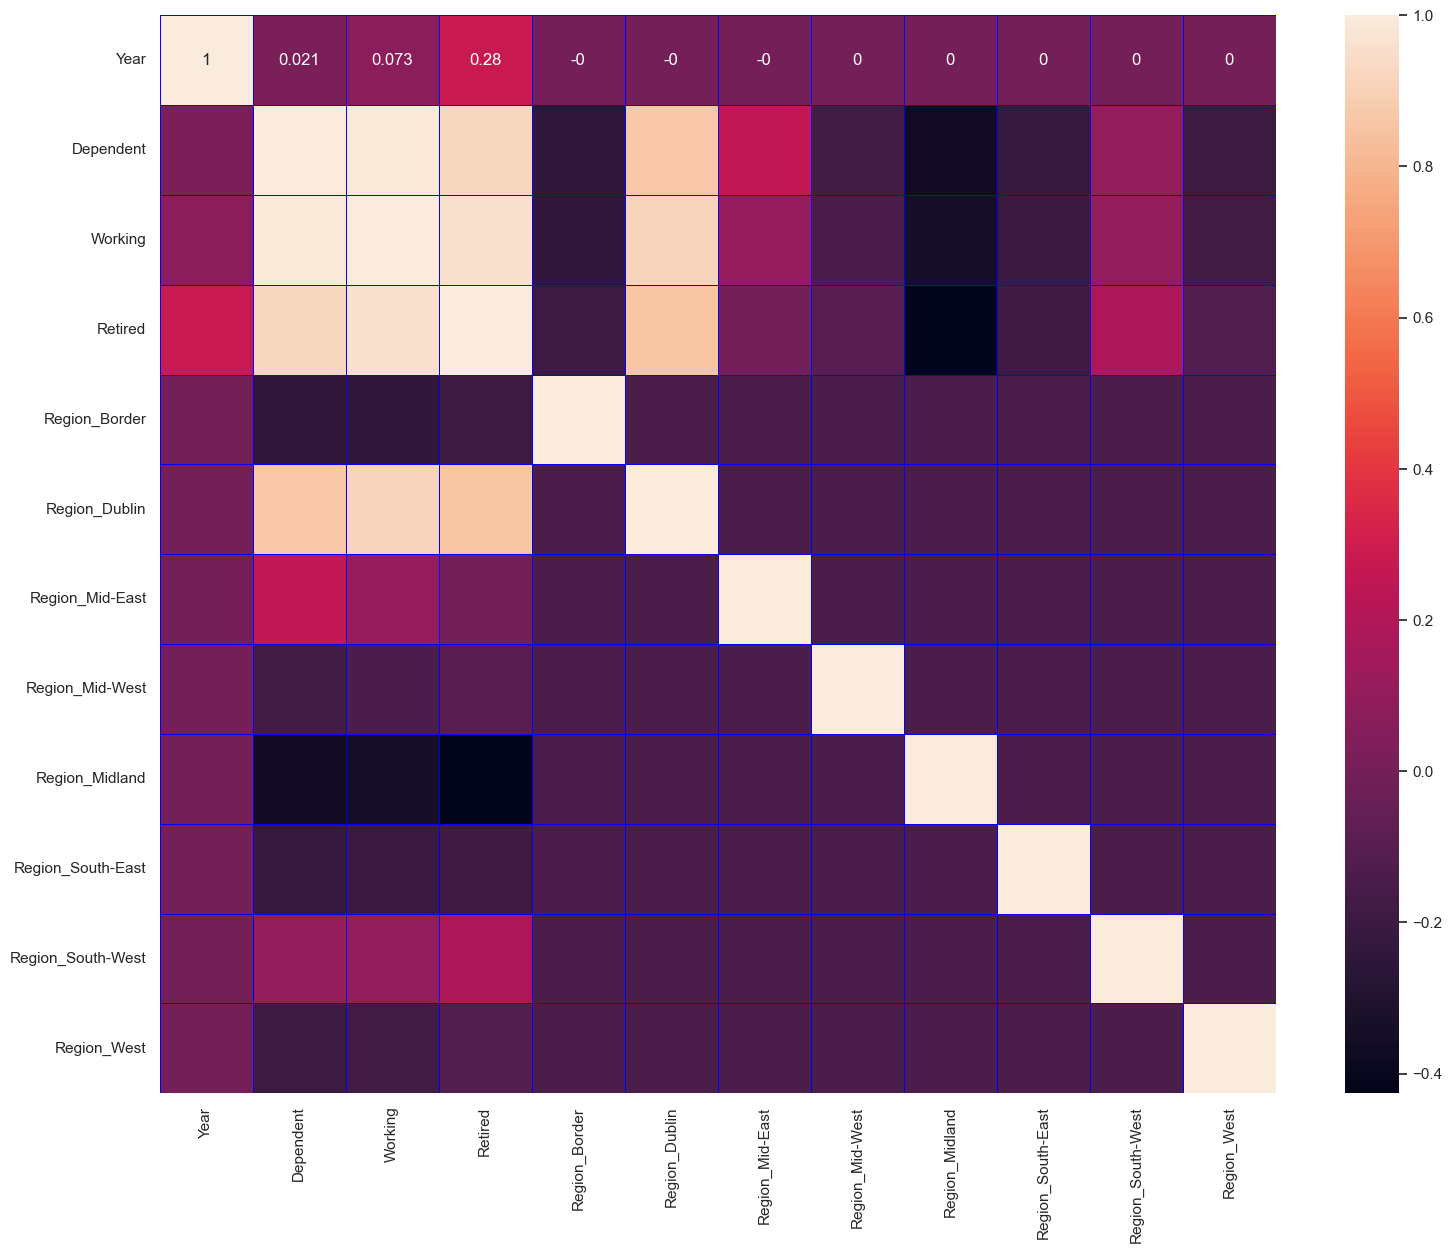

In [253]:
plt.figure(figsize=(18,14))
sns.heatmap(popc_rg_sb_dwr_ec_r_correlation,annot=True,linecolor="blue",lw=0.5)

In [254]:
popc_rg_sb_dwr_ec_r_dep = popc_rg_sb_dwr_ec_r.drop(["Region_Dublin","Working","Retired"],axis=1)
popc_rg_sb_dwr_ec_r_work = popc_rg_sb_dwr_ec_r.drop(["Region_Dublin","Retired","Dependent"],axis=1)
popc_rg_sb_dwr_ec_r_ret = popc_rg_sb_dwr_ec_r.drop(["Region_Dublin","Dependent","Working"],axis=1)


### Linear Regression
### Year, region_id, Dependent Age Sector (2011-2023)

#### Correlation

In [255]:
popc_rg_sb_dwr_ec_r_dep_correlation = popc_rg_sb_dwr_ec_r_dep.corr().round(3)
popc_rg_sb_dwr_ec_r_dep_correlation.style.background_gradient(cmap='coolwarm', axis=None)


- Dependent & Region_Midland are weakly negatively correlated (with score -0.37)
- This is not a strong enough correlation to affect the fit of the model so these will be left in the train/test variables

#### Scale the Data

In [256]:
scaler = StandardScaler()

popc_rg_sb_dwr_ec_r_dep_scale = pd.DataFrame(scaler.fit_transform(popc_rg_sb_dwr_ec_r_dep),columns=popc_rg_sb_dwr_ec_r_dep.columns)
popc_rg_sb_dwr_ec_r_dep_scale.head(10)



Year  Dependent  Region_Border  Region_Mid-East  Region_Mid-West  \
0 -1.603567  -0.652053       2.645751        -0.377964        -0.377964   
1 -1.603567   2.030175      -0.377964        -0.377964        -0.377964   
2 -1.603567   0.550266      -0.377964         2.645751        -0.377964   
3 -1.603567  -0.444287      -0.377964        -0.377964         2.645751   
4 -1.603567  -1.009684      -0.377964        -0.377964        -0.377964   
5 -1.603567  -0.594151      -0.377964        -0.377964        -0.377964   
6 -1.603567   0.218181      -0.377964        -0.377964        -0.377964   
7 -1.603567  -0.563497      -0.377964        -0.377964        -0.377964   
8 -1.336306  -0.648647       2.645751        -0.377964        -0.377964   
9 -1.336306   2.089780      -0.377964        -0.377964        -0.377964   

   Region_Midland  Region_South-East  Region_South-West  Region_West  
0       -0.377964          -0.377964          -0.377964    -0.377964  
1       -0.377964          -0.377964          -0.377964    -0.377964  
2       -0.377964          -0.377964          -0.377964    -0.377964  
3       -0.377964          -0.377964          -0.377964    -0.377964  
4        2.645751          -0.377964          -0.377964    -0.377964  
5       -0.377964           2.645751          -0.377964    -0.377964  
6       -0.377964          -0.377964           2.645751    -0.377964  
7       -0.377964          -0.377964          -0.377964     2.645751  
8       -0.377964          -0.377964          -0.377964    -0.377964  
9       -0.377964          -0.377964          -0.377964    -0.377964

#### Create the Model

In [257]:
X = popc_rg_sb_dwr_ec_r_dep_scale.drop(["Dependent"],axis=1)
y = popc_rg_sb_dwr_ec_r_dep_scale["Dependent"]

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(83, 8)
(21, 8)
(83,)
(21,)


In [259]:
lrm = LinearRegression()
lrm.fit(X_train, y_train) #fit an Ordinary Least Squares model

LinearRegression()

#### Results
Year, region_id, Dependent Age Sector

In [260]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions


print("Linear Regression Results:")
print("Variables: Year, region_id, Dependent Age Sector")
print(" ")
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Linear Regression Results:
Variables: Year, region_id, Dependent Age Sector
 
R-squared of the model in training set is: 0.9969262627199543
-----Test set statistics-----
R-squared of the model in test set is: 0.9978181826341577
Root mean squared error of the prediction is: 0.043786786535709596
Mean absolute percentage error of the prediction is: 5.431852616471649


#### Plot Results & Interpretation
Year, region_id, Dependent Age Sector

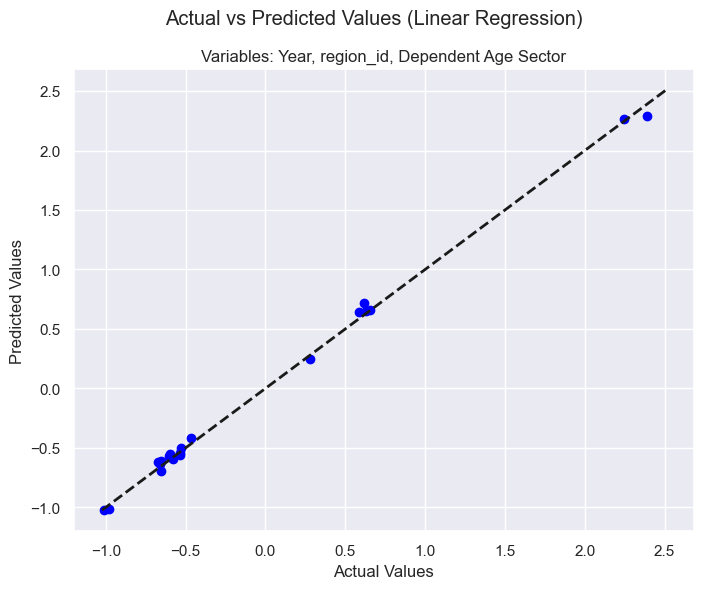

In [261]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds_test, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Linear Regression)')
plt.title("Variables: Year, region_id, Dependent Age Sector")
plt.show()

Interpretation:
- x
- y
- z


### Linear Regression
### Year, region_id, Working Age Sector (2011-2023)

In [262]:
# popc_rg_sb_dwr_ec_r_work

#### Correlation

In [263]:
popc_rg_sb_dwr_ec_r_work_correlation = popc_rg_sb_dwr_ec_r_work.corr().round(3)
popc_rg_sb_dwr_ec_r_work_correlation.style.background_gradient(cmap='coolwarm', axis=None)


#### Scale the Data

In [264]:
scaler = StandardScaler()

popc_rg_sb_dwr_ec_r_work_scale = pd.DataFrame(scaler.fit_transform(popc_rg_sb_dwr_ec_r_work),
                                              columns=popc_rg_sb_dwr_ec_r_work.columns)
popc_rg_sb_dwr_ec_r_work_scale.head(10)



Year   Working  Region_Border  Region_Mid-East  Region_Mid-West  \
0 -1.603567 -0.656306       2.645751        -0.377964        -0.377964   
1 -1.603567  2.173168      -0.377964        -0.377964        -0.377964   
2 -1.603567  0.179304      -0.377964         2.645751        -0.377964   
3 -1.603567 -0.408433      -0.377964        -0.377964         2.645751   
4 -1.603567 -0.963996      -0.377964        -0.377964        -0.377964   
5 -1.603567 -0.586974      -0.377964        -0.377964        -0.377964   
6 -1.603567  0.196071      -0.377964        -0.377964        -0.377964   
7 -1.603567 -0.485468      -0.377964        -0.377964        -0.377964   
8 -1.336306 -0.664463       2.645751        -0.377964        -0.377964   
9 -1.336306  2.131025      -0.377964        -0.377964        -0.377964   

   Region_Midland  Region_South-East  Region_South-West  Region_West  
0       -0.377964          -0.377964          -0.377964    -0.377964  
1       -0.377964          -0.377964          -0.377964    -0.377964  
2       -0.377964          -0.377964          -0.377964    -0.377964  
3       -0.377964          -0.377964          -0.377964    -0.377964  
4        2.645751          -0.377964          -0.377964    -0.377964  
5       -0.377964           2.645751          -0.377964    -0.377964  
6       -0.377964          -0.377964           2.645751    -0.377964  
7       -0.377964          -0.377964          -0.377964     2.645751  
8       -0.377964          -0.377964          -0.377964    -0.377964  
9       -0.377964          -0.377964          -0.377964    -0.377964

#### Create the Model

In [265]:
X = popc_rg_sb_dwr_ec_r_work_scale.drop(["Working"],axis=1)
y = popc_rg_sb_dwr_ec_r_work_scale["Working"]

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(83, 8)
(21, 8)
(83,)
(21,)


In [267]:
lrm = LinearRegression()
lrm.fit(X_train, y_train) #fit an Ordinary Least Squares model

LinearRegression()

#### Results
#### Year, region_id, Working Age Sector

In [268]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions


print("Linear Regression Results:")
print("Variables: Year, region_id, Working Age Sector")
print(" ")
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Linear Regression Results:
Variables: Year, region_id, Working Age Sector
 
R-squared of the model in training set is: 0.9952356597248171
-----Test set statistics-----
R-squared of the model in test set is: 0.9954804987808096
Root mean squared error of the prediction is: 0.0605299332849177
Mean absolute percentage error of the prediction is: 10.692238193036339


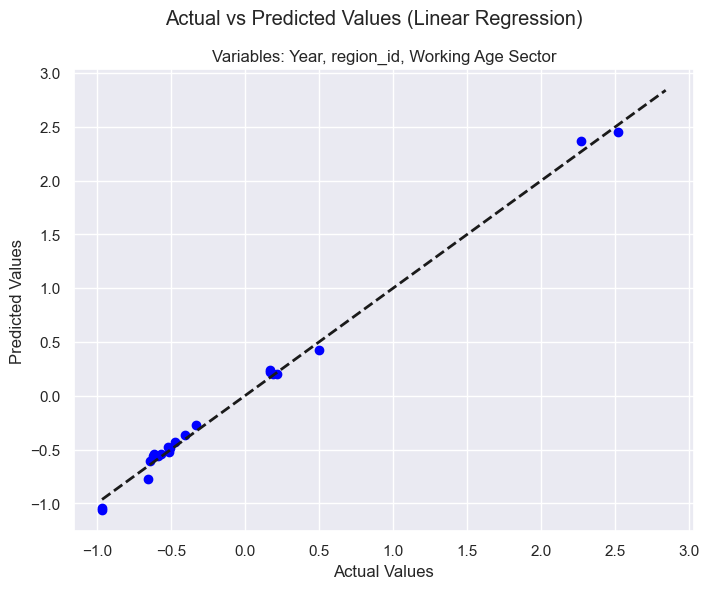

In [269]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds_test, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Linear Regression)')
plt.title("Variables: Year, region_id, Working Age Sector")
plt.show()

### Linear Regression
### Year, region_id, Retired Age Sector (2011-2023)

In [270]:
# popc_rg_sb_dwr_ec_r_ret

#### Correlation

In [271]:
popc_rg_sb_dwr_ec_r_ret_correlation = popc_rg_sb_dwr_ec_r_ret.corr().round(3)
popc_rg_sb_dwr_ec_r_ret_correlation.style.background_gradient(cmap='coolwarm', axis=None)


#### Scale the Data

In [272]:
scaler = StandardScaler()

popc_rg_sb_dwr_ec_r_ret_scale = pd.DataFrame(scaler.fit_transform(popc_rg_sb_dwr_ec_r_ret),
                                             columns=popc_rg_sb_dwr_ec_r_ret.columns)
popc_rg_sb_dwr_ec_r_ret_scale.head(10)



Year   Retired  Region_Border  Region_Mid-East  Region_Mid-West  \
0 -1.603567 -0.812267       2.645751        -0.377964        -0.377964   
1 -1.603567  1.455870      -0.377964        -0.377964        -0.377964   
2 -1.603567 -0.542683      -0.377964         2.645751        -0.377964   
3 -1.603567 -0.610079      -0.377964        -0.377964         2.645751   
4 -1.603567 -1.315145      -0.377964        -0.377964        -0.377964   
5 -1.603567 -0.825228      -0.377964        -0.377964        -0.377964   
6 -1.603567 -0.008699      -0.377964        -0.377964        -0.377964   
7 -1.603567 -0.661922      -0.377964        -0.377964        -0.377964   
8 -1.336306 -0.770793       2.645751        -0.377964        -0.377964   
9 -1.336306  1.585477      -0.377964        -0.377964        -0.377964   

   Region_Midland  Region_South-East  Region_South-West  Region_West  
0       -0.377964          -0.377964          -0.377964    -0.377964  
1       -0.377964          -0.377964          -0.377964    -0.377964  
2       -0.377964          -0.377964          -0.377964    -0.377964  
3       -0.377964          -0.377964          -0.377964    -0.377964  
4        2.645751          -0.377964          -0.377964    -0.377964  
5       -0.377964           2.645751          -0.377964    -0.377964  
6       -0.377964          -0.377964           2.645751    -0.377964  
7       -0.377964          -0.377964          -0.377964     2.645751  
8       -0.377964          -0.377964          -0.377964    -0.377964  
9       -0.377964          -0.377964          -0.377964    -0.377964

#### Create the Model

In [273]:
X = popc_rg_sb_dwr_ec_r_ret_scale.drop(["Retired"],axis=1)
y = popc_rg_sb_dwr_ec_r_ret_scale["Retired"]

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(83, 8)
(21, 8)
(83,)
(21,)


In [275]:
lrm = LinearRegression()
lrm.fit(X_train, y_train) #fit an Ordinary Least Squares model

LinearRegression()

#### Results & Plot
#### Year, region_id, Retired Age Sector

In [276]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions


print("Linear Regression Results:")
print("Variables: Year, region_id, Retired Age Sector")
print(" ")
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Linear Regression Results:
Variables: Year, region_id, Retired Age Sector
 
R-squared of the model in training set is: 0.987524131235863
-----Test set statistics-----
R-squared of the model in test set is: 0.9800105357279111
Root mean squared error of the prediction is: 0.1245172827983975
Mean absolute percentage error of the prediction is: 48.272823967825005


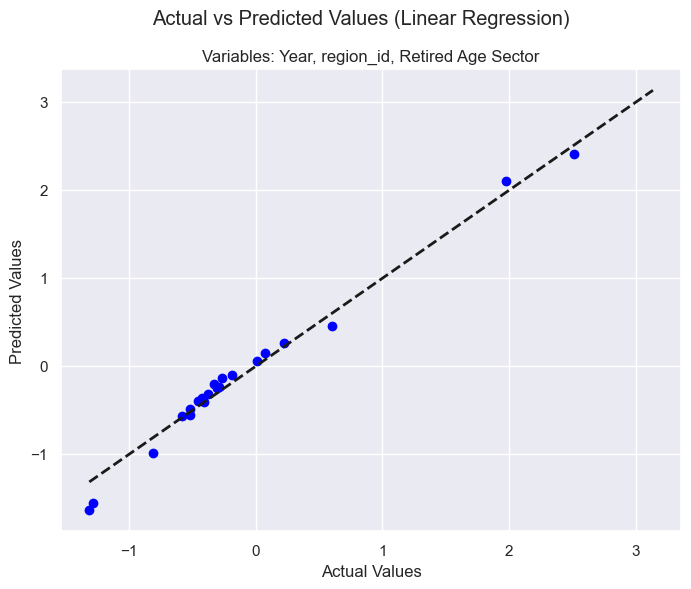

In [277]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds_test, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Linear Regression)')
plt.title("Variables: Year, region_id, Retired Age Sector")
plt.show()

## END
***(ML on Year, State Region and Working, Retired and Dependent Population 2011 - 2023)***

# ML on Population 2011 - 2023 (Complete and In Report)

***Year, Regions, Sexes and Age Groups***

- ***Linear Regression***
- ***Ridge***
- ***Lasso (incl Hyperparameter Tuning & Testing)***
- ***Decision Tree***
- ***Random Forest***
- ***Test Lasso Scaled & Unscaled***


## Prepare the Data for ML
***2011 - 2023***

***Dependent: VALUE***

***Independent: Year, sex_id, age_id, region_id***

### Encode the Categorical Data

In [278]:
DF = "popc_ec"
Description = "popc: Year, age_id, VALUE w/Sex & Region Encoded"
df_index_table.loc[len(df_index_table)] = [DF, Description]

# Initialize the encoder
encoder = OneHotEncoder(sparse=False)

# Convert the encoded column back to a DataFrame
encoded_df_region = pd.DataFrame(encoder.fit_transform(popc[["Region"]]), columns=encoder.get_feature_names_out(["Region"]))
encoded_df_sex = pd.DataFrame(encoder.fit_transform(popc[["Sex"]]), columns=encoder.get_feature_names_out(["Sex"]))

# Replace the original column with the encoded values
popc_ec = pd.concat([popc, encoded_df_region], axis=1)
popc_ec = pd.concat([popc_ec, encoded_df_sex], axis=1)
popc_ec.tail()

STATISTIC Label  Year Age Group     Sex  \
6664  Estimated Population (Persons in April)  2023  All ages  Female   
6665  Estimated Population (Persons in April)  2023  All ages  Female   
6666  Estimated Population (Persons in April)  2023  All ages  Female   
6667  Estimated Population (Persons in April)  2023  All ages  Female   
6668  Estimated Population (Persons in April)  2023  All ages  Female   

          Region      UNIT  VALUE  sex_id  age_id  region_id  ...  \
6664  South-East  Thousand  237.5       2      19          5  ...   
6665  South-West  Thousand  383.8       2      19          6  ...   
6666      Dublin  Thousand  765.6       2      19          7  ...   
6667    Mid-East  Thousand  391.3       2      19          8  ...   
6668     Midland  Thousand  163.2       2      19          9  ...   

      Region_Mid-East  Region_Mid-West  Region_Midland  Region_South-East  \
6664              0.0              0.0             0.0                1.0   
6665              0.0              0.0             0.0                0.0   
6666              0.0              0.0             0.0                0.0   
6667              1.0              0.0             0.0                0.0   
6668              0.0              0.0             1.0                0.0   

      Region_South-West  Region_State  Region_West  Sex_Both sexes  \
6664                0.0           0.0          0.0             0.0   
6665                1.0           0.0          0.0             0.0   
6666                0.0           0.0          0.0             0.0   
6667                0.0           0.0          0.0             0.0   
6668                0.0           0.0          0.0             0.0   

      Sex_Female  Sex_Male  
6664         1.0       0.0  
6665         1.0       0.0  
6666         1.0       0.0  
6667         1.0       0.0  
6668         1.0       0.0  

[5 rows x 22 columns]

In [279]:
print(popc_ec.columns)
popc_ec

Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'Region', 'UNIT',
       'VALUE', 'sex_id', 'age_id', 'region_id', 'Region_Border',
       'Region_Dublin', 'Region_Mid-East', 'Region_Mid-West', 'Region_Midland',
       'Region_South-East', 'Region_South-West', 'Region_State', 'Region_West',
       'Sex_Both sexes', 'Sex_Female', 'Sex_Male'],
      dtype='object')


STATISTIC Label  Year    Age Group         Sex  \
0     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
1     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
2     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
3     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
4     Estimated Population (Persons in April)  2011  0 - 4 years  Both sexes   
...                                       ...   ...          ...         ...   
6664  Estimated Population (Persons in April)  2023     All ages      Female   
6665  Estimated Population (Persons in April)  2023     All ages      Female   
6666  Estimated Population (Persons in April)  2023     All ages      Female   
6667  Estimated Population (Persons in April)  2023     All ages      Female   
6668  Estimated Population (Persons in April)  2023     All ages      Female   

          Region      UNIT  VALUE  sex_id  age_id  region_id  ...  \
0          State  Thousand  356.0       3       1          1  ...   
1         Border  Thousand   30.7       3       1          2  ...   
2           West  Thousand   32.6       3       1          3  ...   
3       Mid-West  Thousand   35.0       3       1          4  ...   
4     South-East  Thousand   32.0       3       1          5  ...   
...          ...       ...    ...     ...     ...        ...  ...   
6664  South-East  Thousand  237.5       2      19          5  ...   
6665  South-West  Thousand  383.8       2      19          6  ...   
6666      Dublin  Thousand  765.6       2      19          7  ...   
6667    Mid-East  Thousand  391.3       2      19          8  ...   
6668     Midland  Thousand  163.2       2      19          9  ...   

      Region_Mid-East  Region_Mid-West  Region_Midland  Region_South-East  \
0                 0.0              0.0             0.0                0.0   
1                 0.0              0.0             0.0                0.0   
2                 0.0              0.0             0.0                0.0   
3                 0.0              1.0             0.0                0.0   
4                 0.0              0.0             0.0                1.0   
...               ...              ...             ...                ...   
6664              0.0              0.0             0.0                1.0   
6665              0.0              0.0             0.0                0.0   
6666              0.0              0.0             0.0                0.0   
6667              1.0              0.0             0.0                0.0   
6668              0.0              0.0             1.0                0.0   

      Region_South-West  Region_State  Region_West  Sex_Both sexes  \
0                   0.0           1.0          0.0             1.0   
1                   0.0           0.0          0.0             1.0   
2                   0.0           0.0          1.0             1.0   
3                   0.0           0.0          0.0             1.0   
4                   0.0           0.0          0.0             1.0   
...                 ...           ...          ...             ...   
6664                0.0           0.0          0.0             0.0   
6665                1.0           0.0          0.0             0.0   
6666                0.0           0.0          0.0             0.0   
6667                0.0           0.0          0.0             0.0   
6668                0.0           0.0          0.0             0.0   

      Sex_Female  Sex_Male  
0            0.0       0.0  
1            0.0       0.0  
2            0.0       0.0  
3            0.0       0.0  
4            0.0       0.0  
...          ...       ...  
6664         1.0       0.0  
6665         1.0       0.0  
6666         1.0       0.0  
6667         1.0       0.0  
6668         1.0       0.0  

[6669 rows x 22 columns]

### Remove Unnecessary Columns & Data

In [280]:
# Remove Sex= Both sexes, REgion = State, AGe Group = All ages
# Drop unnecessary columns
DF = "popc_ec_r"
Description = "popc_ec:Filt:M/F, Regions, Age Groups"
df_index_table.loc[len(df_index_table)] = [DF, Description]

print(popc_ec.columns)
popc_ec_r = popc_ec.loc[popc_ec["Sex"]!="Both sexes"].loc[popc_ec["Region"]!="State"].loc[popc_ec["Age Group"]!="All ages"].drop(["STATISTIC Label","Age Group","sex_id","region_id","UNIT","Sex_Both sexes","Region_State"],axis=1)
popc_ec_r

Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'Region', 'UNIT',
       'VALUE', 'sex_id', 'age_id', 'region_id', 'Region_Border',
       'Region_Dublin', 'Region_Mid-East', 'Region_Mid-West', 'Region_Midland',
       'Region_South-East', 'Region_South-West', 'Region_State', 'Region_West',
       'Sex_Both sexes', 'Sex_Female', 'Sex_Male'],
      dtype='object')


Year     Sex      Region  VALUE  age_id  Region_Border  Region_Dublin  \
10    2011    Male      Border   15.8       1            1.0            0.0   
11    2011    Male        West   16.6       1            0.0            0.0   
12    2011    Male    Mid-West   18.0       1            0.0            0.0   
13    2011    Male  South-East   16.4       1            0.0            0.0   
14    2011    Male  South-West   25.5       1            0.0            0.0   
...    ...     ...         ...    ...     ...            ...            ...   
6637  2023  Female  South-East    5.0      18            0.0            0.0   
6638  2023  Female  South-West    8.1      18            0.0            0.0   
6639  2023  Female      Dublin   15.5      18            0.0            1.0   
6640  2023  Female    Mid-East    6.0      18            0.0            0.0   
6641  2023  Female     Midland    3.0      18            0.0            0.0   

      Region_Mid-East  Region_Mid-West  Region_Midland  Region_South-East  \
10                0.0              0.0             0.0                0.0   
11                0.0              0.0             0.0                0.0   
12                0.0              1.0             0.0                0.0   
13                0.0              0.0             0.0                1.0   
14                0.0              0.0             0.0                0.0   
...               ...              ...             ...                ...   
6637              0.0              0.0             0.0                1.0   
6638              0.0              0.0             0.0                0.0   
6639              0.0              0.0             0.0                0.0   
6640              1.0              0.0             0.0                0.0   
6641              0.0              0.0             1.0                0.0   

      Region_South-West  Region_West  Sex_Female  Sex_Male  
10                  0.0          0.0         0.0       1.0  
11                  0.0          1.0         0.0       1.0  
12                  0.0          0.0         0.0       1.0  
13                  0.0          0.0         0.0       1.0  
14                  1.0          0.0         0.0       1.0  
...                 ...          ...         ...       ...  
6637                0.0          0.0         1.0       0.0  
6638                1.0          0.0         1.0       0.0  
6639                0.0          0.0         1.0       0.0  
6640                0.0          0.0         1.0       0.0  
6641                0.0          0.0         1.0       0.0  

[3744 rows x 15 columns]

In [281]:
popc_ec_r.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 10 to 6641
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3744 non-null   int64  
 1   Sex                3744 non-null   object 
 2   Region             3744 non-null   object 
 3   VALUE              3744 non-null   float64
 4   age_id             3744 non-null   int64  
 5   Region_Border      3744 non-null   float64
 6   Region_Dublin      3744 non-null   float64
 7   Region_Mid-East    3744 non-null   float64
 8   Region_Mid-West    3744 non-null   float64
 9   Region_Midland     3744 non-null   float64
 10  Region_South-East  3744 non-null   float64
 11  Region_South-West  3744 non-null   float64
 12  Region_West        3744 non-null   float64
 13  Sex_Female         3744 non-null   float64
 14  Sex_Male           3744 non-null   float64
dtypes: float64(11), int64(2), object(2)
memory usage: 468.0+ KB


From popc_ec_r.info(), it can be seen that encoded values for Sex and Region are numerical, as required. 

age_id which will be use for testing machine learning models is also a numerical variable type, as required


In [282]:
popc_ec_r.columns

Index(['Year', 'Sex', 'Region', 'VALUE', 'age_id', 'Region_Border',
       'Region_Dublin', 'Region_Mid-East', 'Region_Mid-West', 'Region_Midland',
       'Region_South-East', 'Region_South-West', 'Region_West', 'Sex_Female',
       'Sex_Male'],
      dtype='object')

In [283]:
# When comparing Unique Values present, Qty observations present in columns match:
# Age = sex_id
# Sex = age_id
# Region = region_id

# So will move forward with just the transformed numerical equivalents
DF = "popc_ec_r_num"
Description = "= popc_ec: Numeric only"
df_index_table.loc[len(df_index_table)] = [DF, Description]

popc_ec_r_num = popc_ec_r[['Year',
                           'VALUE',
                           'age_id',
                           'Region_Border',
                           'Region_Mid-East',
                           'Region_Mid-West',
                           'Region_Midland',
                           'Region_South-East',
                           'Region_South-West',
                           'Region_Dublin',
                           'Region_West',
                           'Sex_Female',
                           'Sex_Male'
                          ]]
popc_ec_r_num

Year  VALUE  age_id  Region_Border  Region_Mid-East  Region_Mid-West  \
10    2011   15.8       1            1.0              0.0              0.0   
11    2011   16.6       1            0.0              0.0              0.0   
12    2011   18.0       1            0.0              0.0              1.0   
13    2011   16.4       1            0.0              0.0              0.0   
14    2011   25.5       1            0.0              0.0              0.0   
...    ...    ...     ...            ...              ...              ...   
6637  2023    5.0      18            0.0              0.0              0.0   
6638  2023    8.1      18            0.0              0.0              0.0   
6639  2023   15.5      18            0.0              0.0              0.0   
6640  2023    6.0      18            0.0              1.0              0.0   
6641  2023    3.0      18            0.0              0.0              0.0   

      Region_Midland  Region_South-East  Region_South-West  Region_Dublin  \
10               0.0                0.0                0.0            0.0   
11               0.0                0.0                0.0            0.0   
12               0.0                0.0                0.0            0.0   
13               0.0                1.0                0.0            0.0   
14               0.0                0.0                1.0            0.0   
...              ...                ...                ...            ...   
6637             0.0                1.0                0.0            0.0   
6638             0.0                0.0                1.0            0.0   
6639             0.0                0.0                0.0            1.0   
6640             0.0                0.0                0.0            0.0   
6641             1.0                0.0                0.0            0.0   

      Region_West  Sex_Female  Sex_Male  
10            0.0         0.0       1.0  
11            1.0         0.0       1.0  
12            0.0         0.0       1.0  
13            0.0         0.0       1.0  
14            0.0         0.0       1.0  
...           ...         ...       ...  
6637          0.0         1.0       0.0  
6638          0.0         1.0       0.0  
6639          0.0         1.0       0.0  
6640          0.0         1.0       0.0  
6641          0.0         1.0       0.0  

[3744 rows x 13 columns]

### Review Correlation

In [284]:
popc_ec_r_num_correlation = popc_ec_r_num.corr()
round(popc_ec_r_num_correlation,5)

Year    VALUE  age_id  Region_Border  Region_Mid-East  \
Year               1.00000  0.06787  0.0000        0.00000         -0.00000   
VALUE              0.06787  1.00000 -0.4203       -0.18594          0.09583   
age_id             0.00000 -0.42030  1.0000        0.00000         -0.00000   
Region_Border      0.00000 -0.18594  0.0000        1.00000         -0.14286   
Region_Mid-East   -0.00000  0.09583 -0.0000       -0.14286          1.00000   
Region_Mid-West    0.00000 -0.11098  0.0000       -0.14286         -0.14286   
Region_Midland     0.00000 -0.28041  0.0000       -0.14286         -0.14286   
Region_South-East  0.00000 -0.16090  0.0000       -0.14286         -0.14286   
Region_South-West  0.00000  0.08620  0.0000       -0.14286         -0.14286   
Region_Dublin     -0.00000  0.69186  0.0000       -0.14286         -0.14286   
Region_West        0.00000 -0.13566  0.0000       -0.14286         -0.14286   
Sex_Female        -0.00000  0.01473  0.0000        0.00000         -0.00000   
Sex_Male           0.00000 -0.01473  0.0000       -0.00000          0.00000   

                   Region_Mid-West  Region_Midland  Region_South-East  \
Year                       0.00000         0.00000            0.00000   
VALUE                     -0.11098        -0.28041           -0.16090   
age_id                     0.00000         0.00000            0.00000   
Region_Border             -0.14286        -0.14286           -0.14286   
Region_Mid-East           -0.14286        -0.14286           -0.14286   
Region_Mid-West            1.00000        -0.14286           -0.14286   
Region_Midland            -0.14286         1.00000           -0.14286   
Region_South-East         -0.14286        -0.14286            1.00000   
Region_South-West         -0.14286        -0.14286           -0.14286   
Region_Dublin             -0.14286        -0.14286           -0.14286   
Region_West               -0.14286        -0.14286           -0.14286   
Sex_Female                 0.00000        -0.00000            0.00000   
Sex_Male                   0.00000        -0.00000           -0.00000   

                   Region_South-West  Region_Dublin  Region_West  Sex_Female  \
Year                         0.00000       -0.00000      0.00000    -0.00000   
VALUE                        0.08620        0.69186     -0.13566     0.01473   
age_id                       0.00000        0.00000      0.00000     0.00000   
Region_Border               -0.14286       -0.14286     -0.14286     0.00000   
Region_Mid-East             -0.14286       -0.14286     -0.14286    -0.00000   
Region_Mid-West             -0.14286       -0.14286     -0.14286     0.00000   
Region_Midland              -0.14286       -0.14286     -0.14286    -0.00000   
Region_South-East           -0.14286       -0.14286     -0.14286     0.00000   
Region_South-West            1.00000       -0.14286     -0.14286     0.00000   
Region_Dublin               -0.14286        1.00000     -0.14286    -0.00000   
Region_West                 -0.14286       -0.14286      1.00000     0.00000   
Sex_Female                   0.00000       -0.00000      0.00000     1.00000   
Sex_Male                    -0.00000       -0.00000     -0.00000    -1.00000   

                   Sex_Male  
Year                0.00000  
VALUE              -0.01473  
age_id              0.00000  
Region_Border      -0.00000  
Region_Mid-East     0.00000  
Region_Mid-West     0.00000  
Region_Midland     -0.00000  
Region_South-East  -0.00000  
Region_South-West  -0.00000  
Region_Dublin      -0.00000  
Region_West        -0.00000  
Sex_Female         -1.00000  
Sex_Male            1.00000

In [285]:
popc_ec_r_num_correlation.style.background_gradient(cmap='coolwarm', axis=None)

# plt.figure(figsize=(18,14))
# sns.heatmap(popc_ec_r_num_correlation,annot=True,linecolor="blue",lw=0.5)

From the Correlation Matrix:
- Region_dublin and VALUE have a moderately high positive correlation which means that more of the population is represented within the Dublin Region
- age_ID and VALUe have a weak negetive correlation which means that slightly less of the population is represented within the higher age groups

Neither of these correlations are strong enough to affect the Machine learning model to the point that they would cause over fitting, so they will not be removed from train / test variables.

<Axes: >

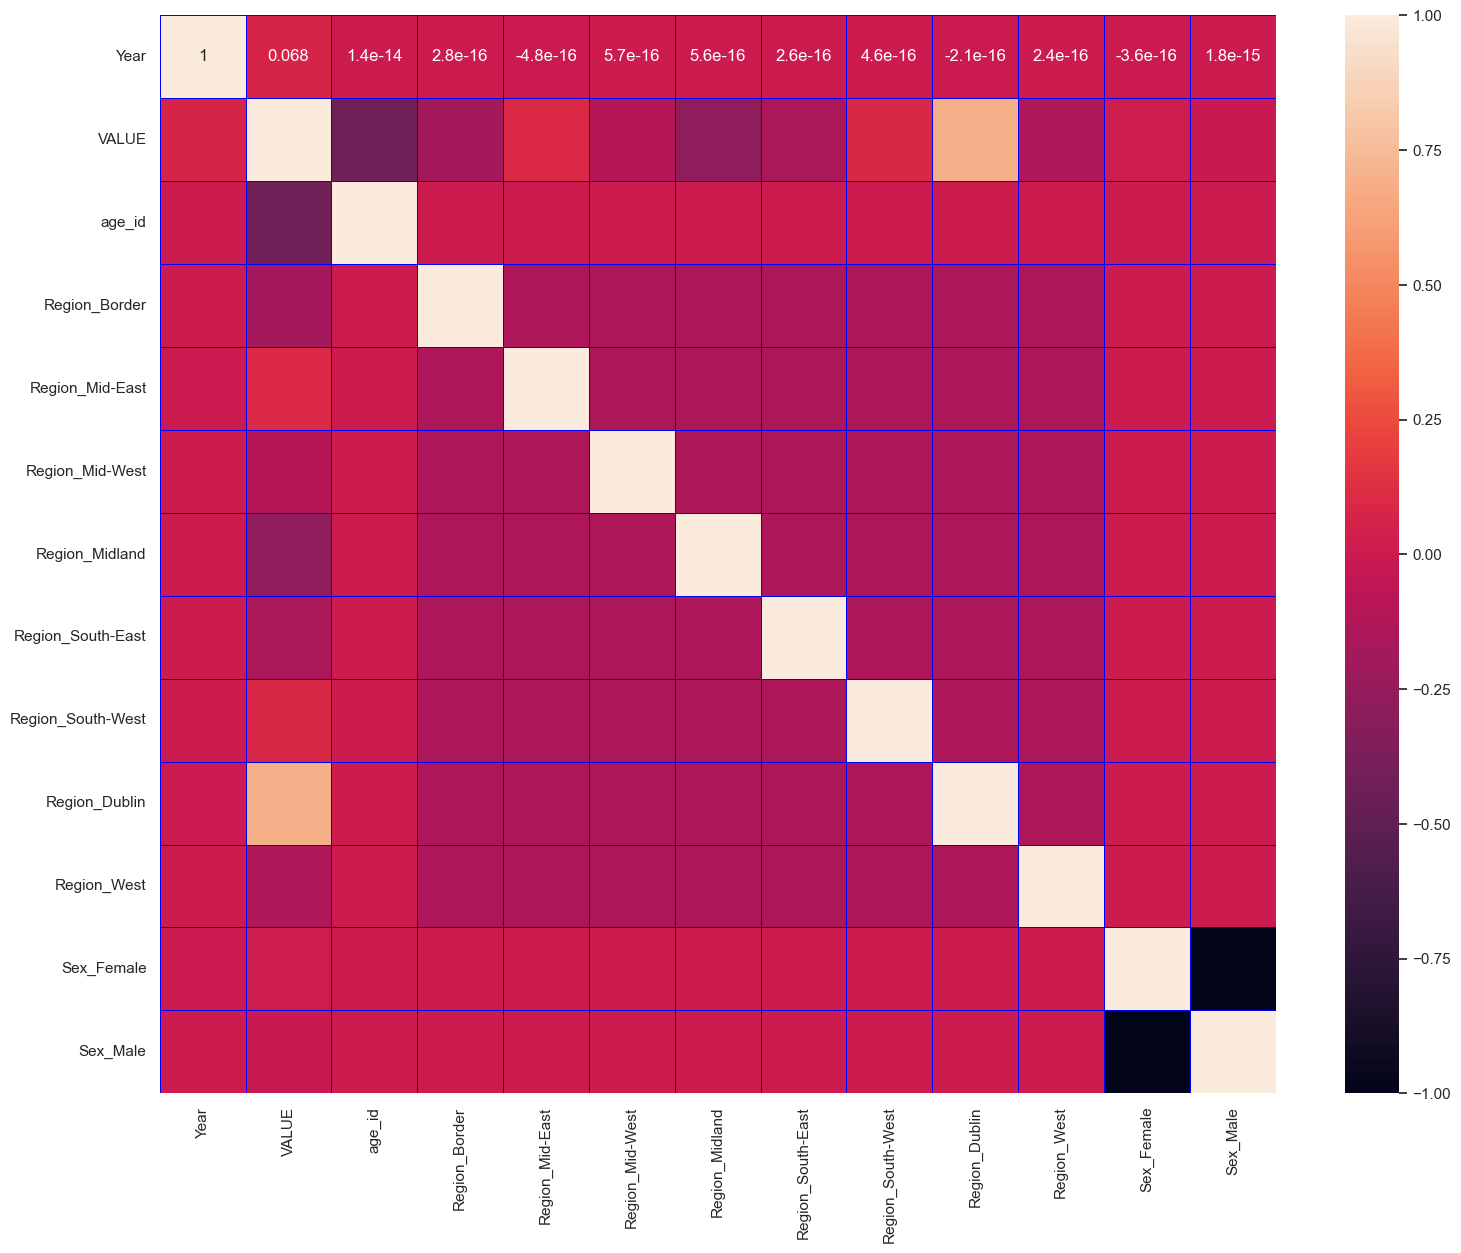

In [286]:
plt.figure(figsize=(18,14))
sns.heatmap(popc_ec_r_num_correlation,annot=True,linecolor="blue",lw=0.5)

### Check for missing values in the dataset

In [287]:

popc_ec_r.isnull().sum()


Year                 0
Sex                  0
Region               0
VALUE                0
age_id               0
Region_Border        0
Region_Dublin        0
Region_Mid-East      0
Region_Mid-West      0
Region_Midland       0
Region_South-East    0
Region_South-West    0
Region_West          0
Sex_Female           0
Sex_Male             0
dtype: int64

### Scale the Data

In [288]:
scaler = StandardScaler()

popc_ec_r_num_scale = pd.DataFrame(scaler.fit_transform(popc_ec_r_num),columns=popc_ec_r_num.columns)



### Separate the Dependent & Independent Variables

In [289]:
X = popc_ec_r_num_scale.drop(["VALUE"],axis=1)
y = popc_ec_r_num_scale["VALUE"]

### Split the Train and Test Data Variables

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2995, 12)
(749, 12)
(2995,)
(749,)


## Linear Regression


### Create the Model

In [291]:
lrm = LinearRegression()
lrm.fit(X_train, y_train) #fit an Ordinary Least Squares model

LinearRegression()

### Results
Year, sex_id, age_id, region_id

In [292]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions


print("Linear Regression Results:")
print("Variables: Year, sex_id, age_id, region_id")
print(" ")
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Linear Regression Results:
Variables: Year, sex_id, age_id, region_id
 
R-squared of the model in training set is: 0.7643731920118004
-----Test set statistics-----
R-squared of the model in test set is: 0.7593124835124194
Root mean squared error of the prediction is: 0.5033387182969242
Mean absolute percentage error of the prediction is: 232.9866368136165


### Plot Results & Interpretation
Year, sex_id, age_id, region_id

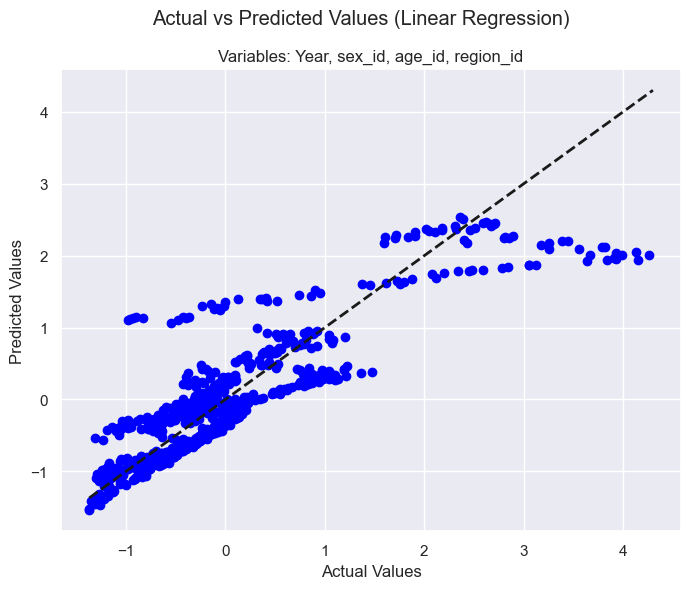

In [293]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds_test, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Linear Regression)')
plt.title("Variables: Year, sex_id, age_id, region_id")
plt.show()

Interpretation:
- x
- y
- z


## Ridge Regression

### Create the Model

In [294]:
# Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
                    },cv=5,scoring='neg_mean_squared_error',
                         verbose=1)

ridgeregr.fit(X_train, y_train)

ridge_best_model = ridgeregr.best_estimator_
ridge_best_params = ridgeregr.best_params_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [295]:

ridge_best_params

{'alpha': 1.0}

#### Results


In [296]:
# Making predictions here
y_preds_train = ridge_best_model.predict(X_train)
y_preds_test_ridge = ridge_best_model.predict(X_test)

print("Ridge Regression Results:")
print("Variables: Year, sex_id, age_id, region_id")
print(" ")
print("R-squared of the model in training set is: {}".format(ridge_best_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_best_model.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_ridge) / y_test)) * 100))

Ridge Regression Results:
Variables: Year, sex_id, age_id, region_id
 
R-squared of the model in training set is: 0.7643875960000682
-----Test set statistics-----
R-squared of the model in test set is: 0.759258130663401
Root mean squared error of the prediction is: 0.5033955478937017
Mean absolute percentage error of the prediction is: 233.11468214405716


Ridge Results:
R-squared of the model in training set is: 0.7643875960000682

-----Test set statistics-----

R-squared of the model in test set is: 0.759258130663401

Root mean squared error of the prediction is: 0.5033955478937017

Mean absolute percentage error of the prediction is: 233.11468214405716

In [297]:
results = pd.DataFrame(ridgeregr.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.002294  4.008336e-04         0.000798    3.987792e-04         0.1   
1       0.000997  5.761645e-07         0.001098    2.014644e-04         1.0   
2       0.001496  4.450527e-04         0.000997    7.629395e-07        10.0   
3       0.001841  8.232627e-04         0.000797    3.987074e-04       100.0   
4       0.001437  4.733430e-04         0.001016    2.258487e-05      1000.0   

              params  split0_test_score  split1_test_score  split2_test_score  \
0     {'alpha': 0.1}          -0.257778          -0.209810          -0.222608   
1     {'alpha': 1.0}          -0.257823          -0.209775          -0.222616   
2    {'alpha': 10.0}          -0.258288          -0.209437          -0.222698   
3   {'alpha': 100.0}          -0.263762          -0.207103          -0.224305   
4  {'alpha': 1000.0}          -0.356706          -0.240139          -0.280395   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.232288          -0.256293        -0.235755        0.018787   
1          -0.232301          -0.256259        -0.235755        0.018799   
2          -0.232450          -0.255939        -0.235762        0.018916   
3          -0.234792          -0.253723        -0.236737        0.020275   
4          -0.301320          -0.285471        -0.292806        0.037782   

   rank_test_score  
0                2  
1                1  
2                3  
3                4  
4                5

### Plot Results & Interpretation
Year, sex_id, age_id, region_id

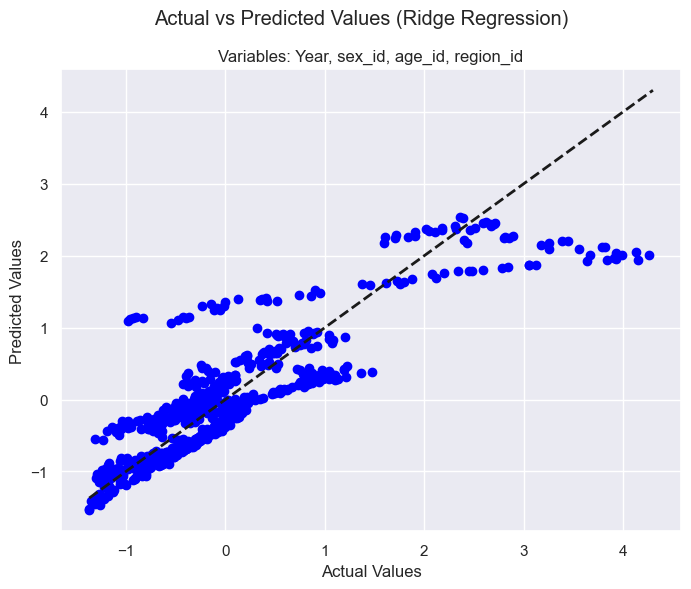

In [298]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds_test_ridge, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Ridge Regression)')
plt.title("Variables: Year, sex_id, age_id, region_id")
plt.show()

## Lasso Regression

### Create the Model

#### Test: alpha = 1

In [299]:
# alpha = 1
lasso_std = Lasso(alpha=1)
lasso_std.fit(X_train, y_train) #fit an Ordinary Least Squares model


Lasso(alpha=1)

In [300]:

# We are making predictions here
y_preds_train = lasso_std.predict(X_train)
y_preds_test_lasso = lasso_std.predict(X_test)

print("Lasso Regression Results:")
print("Variables: Year, sex_id, age_id, region_id")
print("alpha = 1")
print(" ")
print("R-squared of the model in training set is: {}".format(lasso_std.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_std.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

Lasso Regression Results:
Variables: Year, sex_id, age_id, region_id
alpha = 1
 
R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.0005510114029674273
Root mean squared error of the prediction is: 1.0262500084138246
Mean absolute percentage error of the prediction is: 98.51968040941782


#### Test: alpha = 0.1

In [301]:
# alpha = 0.1
lasso_std = Lasso(alpha=0.1)
lasso_std.fit(X_train, y_train) #fit an Ordinary Least Squares model

Lasso(alpha=0.1)

In [302]:
# We are making predictions here
y_preds_train = lasso_std.predict(X_train)
y_preds_test_lasso = lasso_std.predict(X_test)

print("Lasso Regression Results:")
print("Variables: Year, sex_id, age_id, region_id")
print("alpha = 0.1")
print(" ")
print("R-squared of the model in training set is: {}".format(lasso_std.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_std.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

Lasso Regression Results:
Variables: Year, sex_id, age_id, region_id
alpha = 0.1
 
R-squared of the model in training set is: 0.7027754345007893
-----Test set statistics-----
R-squared of the model in test set is: 0.6918055008406115
Root mean squared error of the prediction is: 0.5695685457182169
Mean absolute percentage error of the prediction is: 218.42150207658952


### Hyperparameter Tuning - Use GridSearchCV to get the best value of alpha for this lasso model

In [303]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(alpha=20),
                    param_grid={
                        'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
                    }, verbose=1)

lassoregr.fit(X_train, y_train)

lasso_best_model = lassoregr.best_estimator_
lasso_best_params = lassoregr.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [304]:
lasso_best_params

{'alpha': 0.001}

### Results (w/ GridSearchCV)


In [305]:
# We are making predictions here
y_preds_train = lasso_best_model.predict(X_train)
y_preds_test_lasso = lasso_best_model.predict(X_test)

print("Lasso Regression Results:")
print("Variables: Year, sex_id, age_id, region_id")
print(" ")
print("R-squared of the model in training set is: {}".format(lasso_best_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_best_model.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

Lasso Regression Results:
Variables: Year, sex_id, age_id, region_id
 
R-squared of the model in training set is: 0.7643775489321954
-----Test set statistics-----
R-squared of the model in test set is: 0.7591161346114467
Root mean squared error of the prediction is: 0.5035439841491848
Mean absolute percentage error of the prediction is: 233.11280153479132


Lasso Results:
R-squared of the model in training set is: 0.763392616822566

-----Test set statistics-----

R-squared of the model in test set is: 0.7569719388583152

Root mean squared error of the prediction is: 0.5057801339438199

Mean absolute percentage error of the prediction is: 232.47728089359558


### Plot Results & Interpretation
Year, sex_id, age_id, region_id

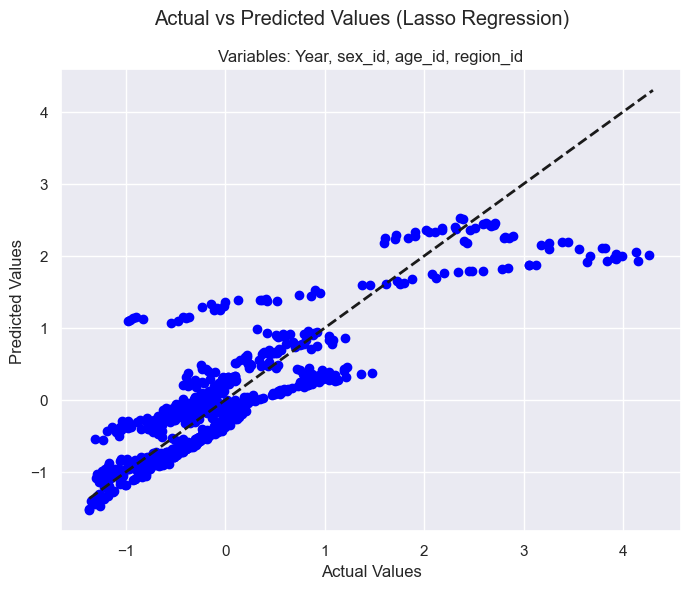

In [306]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds_test_lasso, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Lasso Regression)')
plt.title("Variables: Year, sex_id, age_id, region_id")
plt.show()

## Decision Tree Regressor

### Create the Model

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [308]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor()

### Results


In [309]:
y_pred_DT = DTregressor.predict(X_test)

print("Decision Tree Regression Results:")
print("Variables: Year, sex_id, age_id, region_id")
print(" ")
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_DT) / y_test)) * 100))

Decision Tree Regression Results:
Variables: Year, sex_id, age_id, region_id
 
R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9964460120051762
Root mean squared error of the prediction is: 0.06116338802047334
Mean absolute percentage error of the prediction is: 21.44781494038599


Decision Tree Regressor Results:

R-squared of the model in training set is: 1.0

-----Test set statistics-----

R-squared of the model in test set is: 0.9964305750797766

Root mean squared error of the prediction is: 0.06129607721533558

Mean absolute percentage error of the prediction is: 20.772410249438096


### Plot Results & Interpretation
Year, sex_id, age_id, region_id

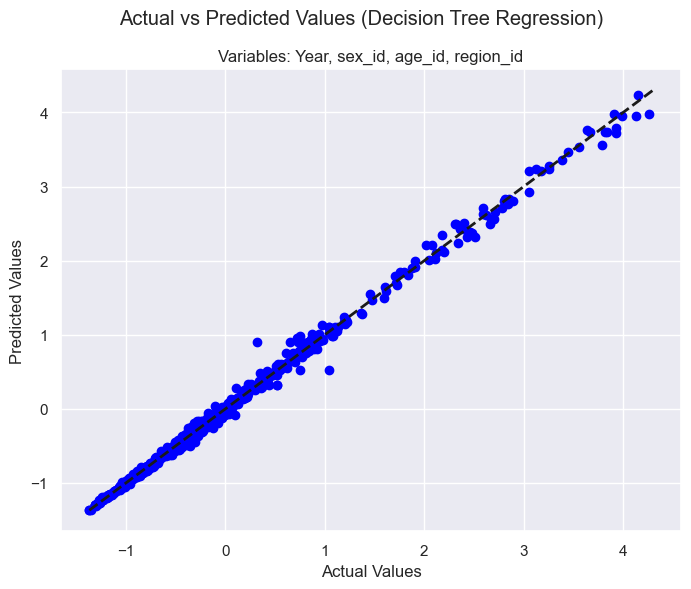

In [310]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_DT, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Decision Tree Regression)')
plt.title("Variables: Year, sex_id, age_id, region_id")
plt.show()

## Random Forest

### Create the Model

In [311]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

### Results


In [312]:
y_pred_random = regressor.predict(X_test)

print("Random Forest Regression Results:")
print("Variables: Year, sex_id, age_id, region_id")
print(" ")
print("R-squared of the model in training set is: {}".format(regressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(regressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_random)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_random) / y_test)) * 100))

Random Forest Regression Results:
Variables: Year, sex_id, age_id, region_id
 
R-squared of the model in training set is: 0.9995867730496344
-----Test set statistics-----
R-squared of the model in test set is: 0.9975809013138816
Root mean squared error of the prediction is: 0.05046152239894732
Mean absolute percentage error of the prediction is: 18.446439542030276


Random Forest Results:
    
R-squared of the model in training set is: 0.9995867730496344

-----Test set statistics-----

R-squared of the model in test set is: 0.9975809013138816

Root mean squared error of the prediction is: 0.05046152239894732

Mean absolute percentage error of the prediction is: 18.446439542030276


### Plot Results & Interpretation
Year, sex_id, age_id, region_id

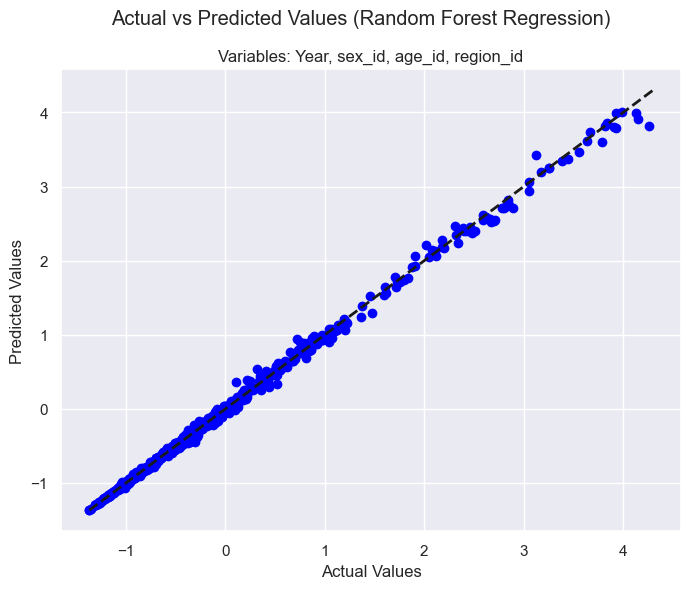

In [313]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_random, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Random Forest Regression)')
plt.title("Variables: Year, sex_id, age_id, region_id")
plt.show()

## Testing Scaled vs Unscaled Data with Lasso



### Lasso: Test Unscaled

##### Separate the Dependent & Independent Variables

In [314]:
X = popc_ec_r_num.drop(["VALUE"],axis=1)
y = popc_ec_r_num["VALUE"]

##### Split the Train and Test Data Variables

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2995, 12)
(749, 12)
(2995,)
(749,)


In [316]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(alpha=20),
                    param_grid={
                        'alpha': [0.001]
                    }, verbose=1)

lassoregr.fit(X_train, y_train)

lasso_best_model = lassoregr.best_estimator_
lasso_best_params = lassoregr.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [317]:
# We are making predictions here
y_preds_train = lasso_best_model.predict(X_train)
y_preds_test_lasso = lasso_best_model.predict(X_test)

print("Unscaled Data")
print("Lasso Regression Results:")
print("Variables: Year, sex_id, age_id, region_id")
print(" ")
print("R-squared of the model in training set is: {}".format(lasso_best_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_best_model.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

Unscaled Data
Lasso Regression Results:
Variables: Year, sex_id, age_id, region_id
 
R-squared of the model in training set is: 0.7643871797008026
-----Test set statistics-----
R-squared of the model in test set is: 0.759240688572699
Root mean squared error of the prediction is: 5.753985947316462
Mean absolute percentage error of the prediction is: 31.326651351427227


### END
***Lasso: Test Unscaled***

### Lasso: Test Scaled

##### Scale the Data

In [318]:
scaler = StandardScaler()

popc_ec_r_num_scale = pd.DataFrame(scaler.fit_transform(popc_ec_r_num),columns=popc_ec_r_num.columns)



##### Separate the Dependent & Independent Variables

In [319]:
X = popc_ec_r_num_scale.drop(["VALUE"],axis=1)
y = popc_ec_r_num_scale["VALUE"]

##### Split the Train and Test Data Variables

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2995, 12)
(749, 12)
(2995,)
(749,)


##### Create the Model

In [321]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(alpha=20),
                    param_grid={
                        'alpha': [0.001]
                    }, verbose=1)

lassoregr.fit(X_train, y_train)

lasso_best_model = lassoregr.best_estimator_
lasso_best_params = lassoregr.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


##### Results

In [322]:
# We are making predictions here
y_preds_train = lasso_best_model.predict(X_train)
y_preds_test_lasso = lasso_best_model.predict(X_test)

print("Scaled Data")
print("Lasso Regression Results:")
print("Variables: Year, sex_id, age_id, region_id")
print(" ")
print("R-squared of the model in training set is: {}".format(lasso_best_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_best_model.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

Scaled Data
Lasso Regression Results:
Variables: Year, sex_id, age_id, region_id
 
R-squared of the model in training set is: 0.7643775489321954
-----Test set statistics-----
R-squared of the model in test set is: 0.7591161346114467
Root mean squared error of the prediction is: 0.5035439841491848
Mean absolute percentage error of the prediction is: 233.11280153479132


### END
***Lasso: Test Scaled***

## Prepare the Data

In [323]:
pops_bs = pops.loc[pops["Sex"] == "Both sexes",]
pops_bs = pops_bs.loc[pops["Age Group"] == "All ages",]
pops_bs = pops_bs[["Year","VALUE"]]

pops_bs.head(50)

Year   VALUE
78    1950  2969.0
159   1951  2960.6
240   1952  2952.9
321   1953  2949.0
402   1954  2941.2
483   1955  2920.9
564   1956  2898.5
645   1957  2885.3
726   1958  2852.7
807   1959  2845.6
888   1960  2832.1
969   1961  2818.3
1050  1962  2830.1
1131  1963  2850.0
1212  1964  2863.8
1293  1965  2875.8
1374  1966  2884.0
1455  1967  2899.7
1536  1968  2912.2
1617  1969  2925.2
1698  1970  2949.9
1779  1971  2978.2
1860  1972  3024.4
1941  1973  3073.0
2022  1974  3123.9
2103  1975  3177.2
2184  1976  3227.8
2265  1977  3271.9
2346  1978  3314.0
2427  1979  3368.2
2508  1980  3401.0
2589  1981  3443.4
2670  1982  3480.0
2751  1983  3504.0
2832  1984  3529.0
2913  1985  3540.0
2994  1986  3540.6
3075  1987  3546.5
3156  1988  3530.7
3237  1989  3509.5
3318  1990  3505.8
3399  1991  3525.7
3480  1992  3554.5
3561  1993  3574.1
3642  1994  3585.9
3723  1995  3601.3
3804  1996  3626.1
3885  1997  3664.3
3966  1998  3703.1
4047  1999  3741.6

In [324]:
pops_bs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 78 to 5991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    74 non-null     int64  
 1   VALUE   74 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


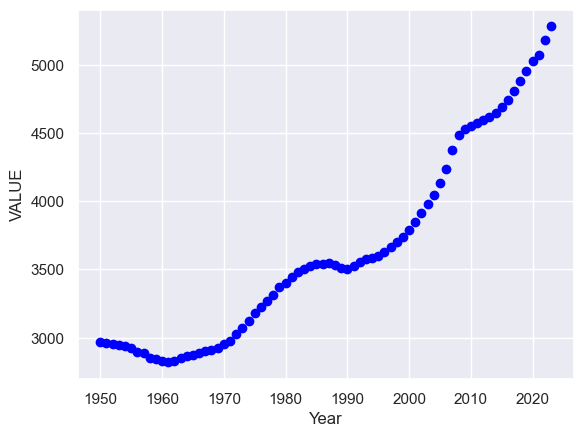

In [325]:
plt.scatter(pops_bs.Year, pops_bs.VALUE,  color='blue')
plt.xlabel("Year")
plt.ylabel("VALUE")
plt.show()

<Axes: xlabel='Year', ylabel='VALUE'>

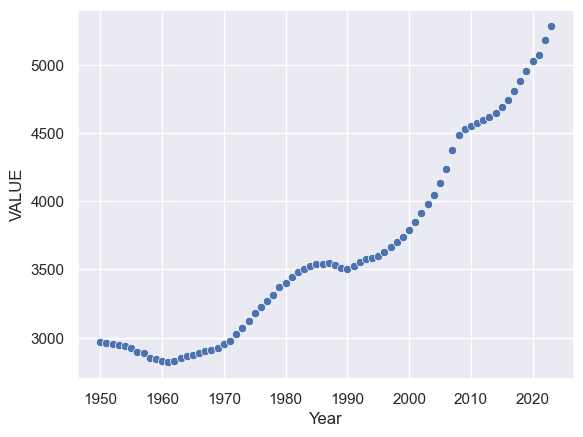

In [326]:
sns.scatterplot(data=pops_bs,
                x="Year",
                y="VALUE")

In [327]:
pops_bs

Year   VALUE
78    1950  2969.0
159   1951  2960.6
240   1952  2952.9
321   1953  2949.0
402   1954  2941.2
...    ...     ...
5667  2019  4958.5
5748  2020  5029.9
5829  2021  5074.7
5910  2022  5184.0
5991  2023  5281.6

[74 rows x 2 columns]

### Check for missing values in the dataset

In [328]:

pops_bs.isnull().sum()


Year     0
VALUE    0
dtype: int64

### Scale the Data

In [329]:
scaler = StandardScaler()

pops_bs_scale = pd.DataFrame(scaler.fit_transform(pops_bs),columns=pops_bs.columns)



### Separate the Dependent & Independent Variables

In [330]:
X = pops_bs_scale.drop(["VALUE"],axis=1)
y = pops_bs_scale["VALUE"]

### Split the Train and Test Data Variables

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(59, 1)
(15, 1)
(59,)
(15,)


## Linear Regression  (pops)


## Both Sexes, All Ages

###  Create the Model

In [332]:
lrm = LinearRegression()
lrm.fit(X_train, y_train) #fit an Ordinary Least Squares model

LinearRegression()

In [333]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

### Results

In [334]:
print("Linear Regression Results:")
print("Variables: Year")
print(" ")

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Linear Regression Results:
Variables: Year
 
R-squared of the model in training set is: 0.9095389581587054
-----Test set statistics-----
R-squared of the model in test set is: 0.8944576744511983
Root mean squared error of the prediction is: 0.3498143602367565
Mean absolute percentage error of the prediction is: 69.87988254403948


### Plot Results & Interpretation
Year

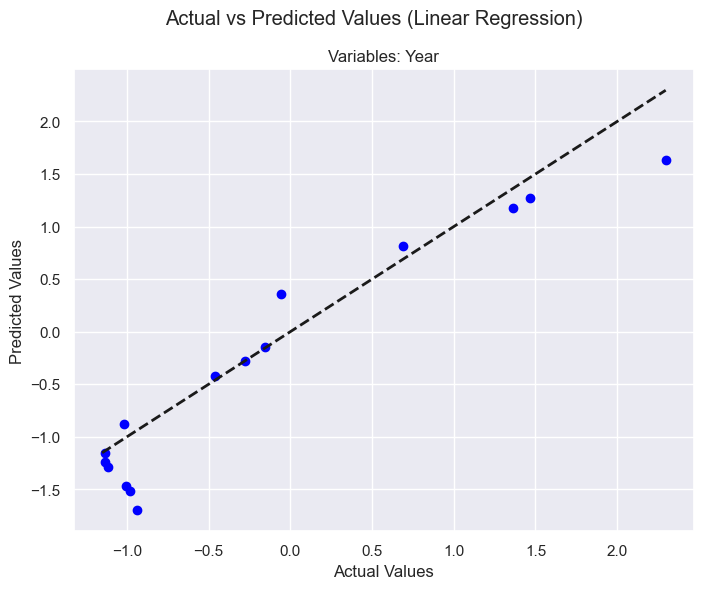

In [335]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds_test, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Linear Regression)')
plt.title("Variables: Year")
plt.show()

## Ridge Regression (pops)
### Year

In [336]:
# Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_train, y_train)

ridge = ridgeregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [337]:
# Making predictions here
y_preds_train = ridge.predict(X_train)
y_preds_test_ridge = ridge.predict(X_test)

print("Ridge Regression Results:")
print("Variables: Year")
print(" ")

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_ridge) / y_test)) * 100))

Ridge Regression Results:
Variables: Year
 
R-squared of the model in training set is: 0.9092338911495018
-----Test set statistics-----
R-squared of the model in test set is: 0.8978929302726865
Root mean squared error of the prediction is: 0.34407428064465806
Mean absolute percentage error of the prediction is: 68.64726814729224


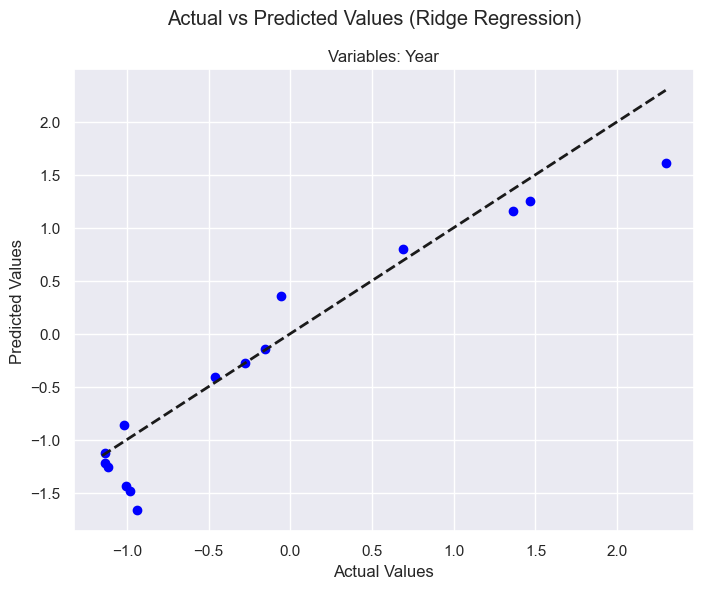

In [338]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds_test_ridge, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Ridge Regression)')
plt.title("Variables: Year")
plt.show()

## Lasso Regression  (pops)
#### Year

In [339]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

lassoregr.fit(X_train, y_train)

lasso = lassoregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [340]:
# We are making predictions here
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)


print("Lasso Regression Results:")
print("Variables: Year")
print(" ")

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

Lasso Regression Results:
Variables: Year
 
R-squared of the model in training set is: 0.9094231960504087
-----Test set statistics-----
R-squared of the model in test set is: 0.8966642351305592
Root mean squared error of the prediction is: 0.3461382815809892
Mean absolute percentage error of the prediction is: 69.07176313120956


### Plot Results & Interpretation
Year

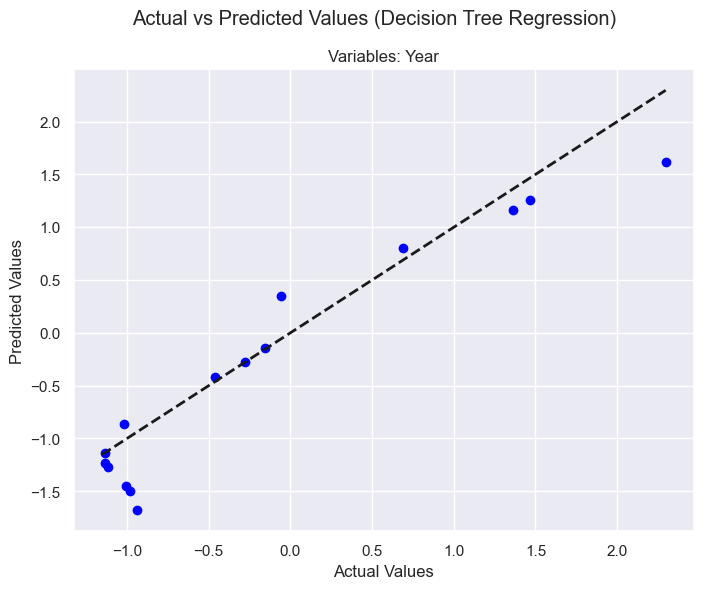

In [341]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds_test_lasso, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Decision Tree Regression)')
plt.title("Variables: Year")
plt.show()

## Decision Tree Regressor

### Create the Model

In [342]:
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor()

### Results


In [343]:
y_pred_DT = DTregressor.predict(X_test)

print("Decision Tree Regression Results:")
print("Variables: Year")
print(" ")
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_DT) / y_test)) * 100))

Decision Tree Regression Results:
Variables: Year
 
R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9970766971739373
Root mean squared error of the prediction is: 0.05821852622721134
Mean absolute percentage error of the prediction is: 9.145010178464059


### Plot Results & Interpretation
Year

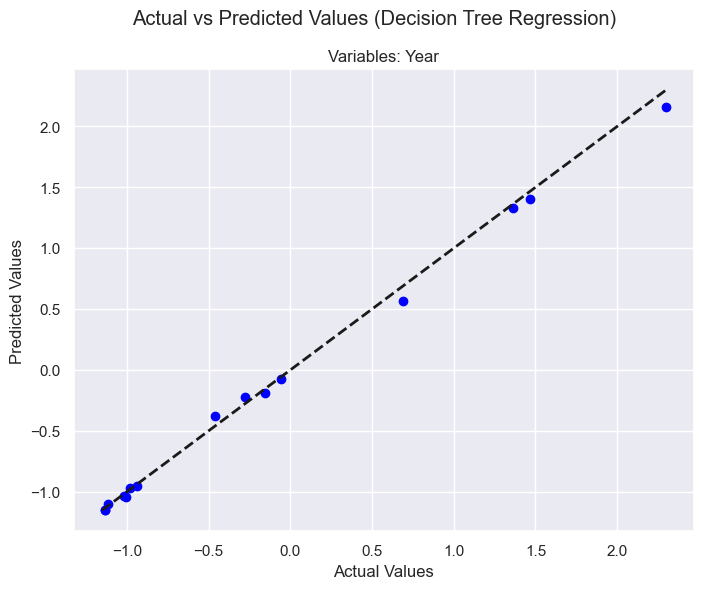

In [344]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_DT, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Decision Tree Regression)')
plt.title("Variables: Year")
plt.show()

## Random Forest

### Create the Model

In [345]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

### Results


In [346]:
y_pred_random = regressor.predict(X_test)

print("Random Forest Regression Results:")
print("Variables: Year, sex_id, age_id, region_id")
print(" ")
print("R-squared of the model in training set is: {}".format(regressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(regressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_random)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_random) / y_test)) * 100))

Random Forest Regression Results:
Variables: Year, sex_id, age_id, region_id
 
R-squared of the model in training set is: 0.9996514572801797
-----Test set statistics-----
R-squared of the model in test set is: 0.9970713932738086
Root mean squared error of the prediction is: 0.058271316740674796
Mean absolute percentage error of the prediction is: 4.619887651653963


### Plot Results & Interpretation
Year, sex_id, age_id, region_id

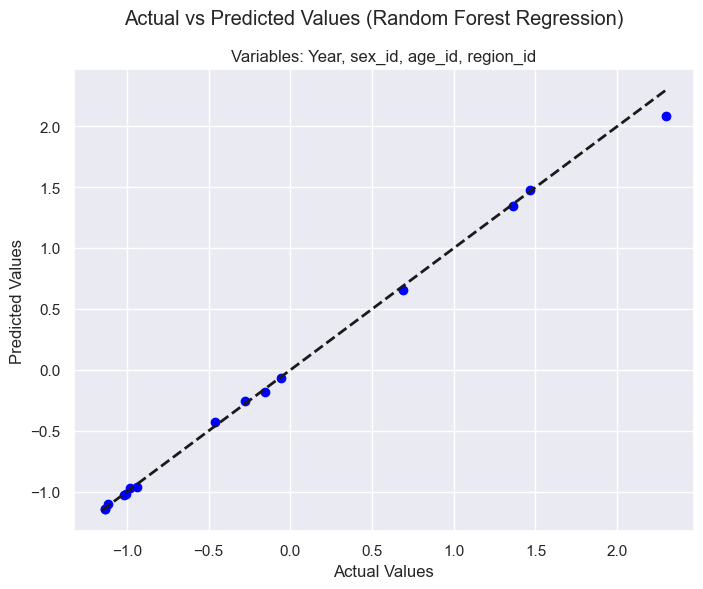

In [347]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_random, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Random Forest Regression)')
plt.title("Variables: Year, sex_id, age_id, region_id")
plt.show()

# END
***(Regression Models)***

# ML on Population 1950 - 2023

***Year, Dependent, Working & Retired Population***

- ***Linear Regression***
- ***Ridge***
- ***Lasso***
- ***Decision Tree***
- ***Random Forest***

### pops_sb_dwr

In [348]:
pops_sb_dwr

Year  Dependent  Working  Retired
0   1950      851.2   1800.7    317.1
1   1951      854.8   1789.4    316.4
2   1952      859.6   1776.4    316.9
3   1953      865.3   1765.9    317.8
4   1954      870.0   1752.9    318.3
..   ...        ...      ...      ...
69  2019     1015.6   3241.6    701.3
70  2020     1013.6   3290.1    726.1
71  2021     1007.6   3319.7    747.4
72  2022     1014.4   3388.2    781.4
73  2023     1011.6   3463.7    806.3

[74 rows x 4 columns]

### Correlation between features

In [349]:
pops_sb_dwr_correlation = pops_sb_dwr.corr().round(3)
print(pops_sb_dwr_correlation)

            Year  Dependent  Working  Retired
Year       1.000      0.336    0.954    0.880
Dependent  0.336      1.000    0.264    0.409
Working    0.954      0.264    1.000    0.927
Retired    0.880      0.409    0.927    1.000


In [350]:
pops_sb_dwr_correlation.style.background_gradient(cmap='coolwarm', axis=None)


From the Correlation Matrix:
- High Correlation between many variables so not suitable to continue.

### Check for missing values in the dataset

In [351]:

pops_sb_dwr.isnull().sum()


Year         0
Dependent    0
Working      0
Retired      0
dtype: int64

### Scale the Data

In [352]:
scaler = StandardScaler()

pops_sb_dwr_scale = pd.DataFrame(scaler.fit_transform(pops_sb_dwr),columns=pops_sb_dwr.columns)



## Dependent Variable = Retired Population

### Separate the Dependent & Independent Variables

- ***Dependents: Retired***
- ***Independents: Year, Working, Dependent***

In [353]:
X = pops_sb_dwr_scale.drop(["Retired"],axis=1)
y = pops_sb_dwr_scale["Retired"]

### Split the Train and Test Data Variables

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(59, 3)
(15, 3)
(59,)
(15,)


## Linear Regression


###  Create the Model

In [355]:
lrm = LinearRegression()
lrm.fit(X_train, y_train) #fit an Ordinary Least Squares model

LinearRegression()

In [356]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

### Results

In [357]:
print("Linear Regression Results:")
print("Year, Working & Dependent Population - Predicting Retired Population")
print(" ")

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Linear Regression Results:
Year, Working & Dependent Population - Predicting Retired Population
 
R-squared of the model in training set is: 0.8859789826574287
-----Test set statistics-----
R-squared of the model in test set is: 0.905710699835213
Root mean squared error of the prediction is: 0.34261470433927416
Mean absolute percentage error of the prediction is: 40.03252141685951


### Plot Results & Interpretation
Year

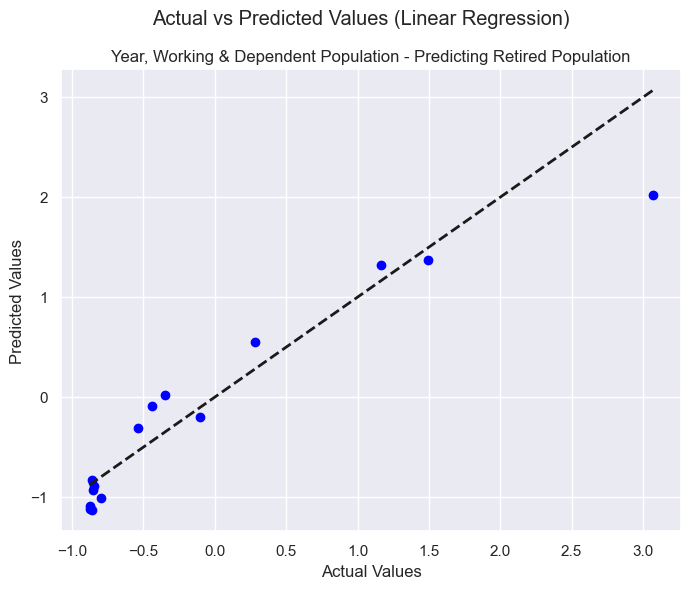

In [358]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds_test, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Linear Regression)')
plt.title("Year, Working & Dependent Population - Predicting Retired Population")
plt.show()

## Decision Tree


###  Create the Model

In [359]:
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor()

### Results

In [360]:
y_pred_DT = DTregressor.predict(X_test)

print("Decision Tree Regression Results:")
print("Year, Working & Dependent Population - Predicting Retired Population")
print(" ")
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_DT) / y_test)) * 100))

Decision Tree Regression Results:
Year, Working & Dependent Population - Predicting Retired Population
 
R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9846315528317531
Root mean squared error of the prediction is: 0.1383215306570026
Mean absolute percentage error of the prediction is: 7.938642993773071


### Plot Results & Interpretation
***Year, Working & Dependent Population - Predicting Retired Population***

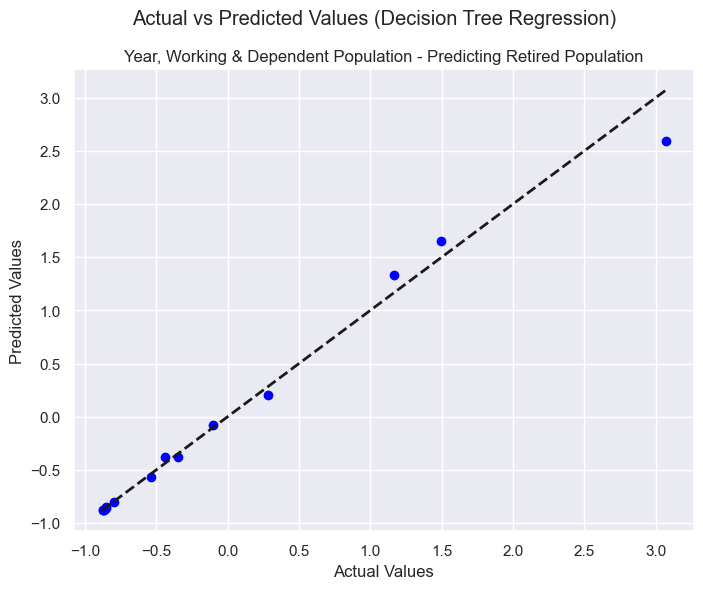

In [361]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_DT, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Decision Tree Regression)')
plt.title("Year, Working & Dependent Population - Predicting Retired Population")
plt.show()

## Dependent Variable = Working Population

### Separate the Dependent & Independent Variables

- ***Dependents: Working***
- ***Independents: Year, Retired, Dependent***

In [362]:
X = pops_sb_dwr_scale.drop(["Working"],axis=1)
y = pops_sb_dwr_scale["Working"]

### Split the Train and Test Data Variables

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(59, 3)
(15, 3)
(59,)
(15,)


## Linear Regression


###  Create the Model

In [364]:
lrm = LinearRegression()
lrm.fit(X_train, y_train) #fit an Ordinary Least Squares model

LinearRegression()

In [365]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

### Results

In [366]:
print("Linear Regression Results:")
print("Year, Retired & Dependent Population - Predicting Working Population")
print(" ")

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Linear Regression Results:
Year, Retired & Dependent Population - Predicting Working Population
 
R-squared of the model in training set is: 0.9533029213121544
-----Test set statistics-----
R-squared of the model in test set is: 0.9621301475075958
Root mean squared error of the prediction is: 0.20285178418528532
Mean absolute percentage error of the prediction is: 49.62940601742491


### Plot Results & Interpretation
Year

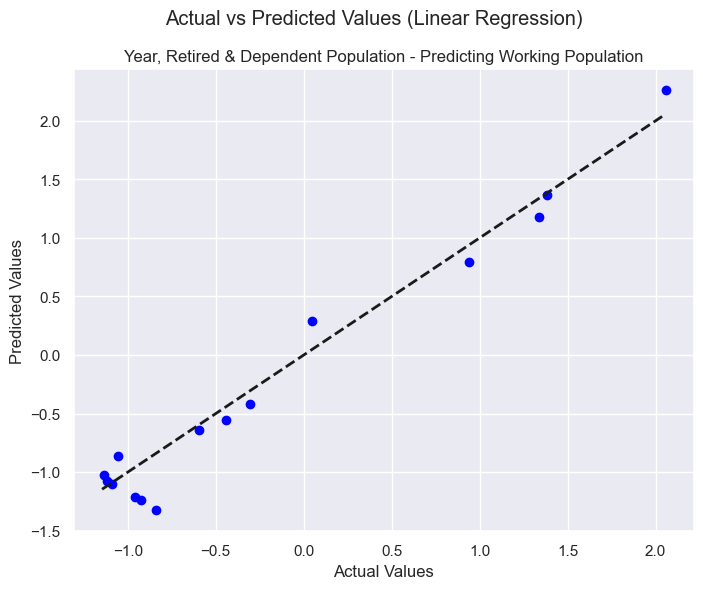

In [367]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds_test, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Linear Regression)')
plt.title("Year, Retired & Dependent Population - Predicting Working Population")
plt.show()

## Decision Tree


###  Create the Model

In [368]:
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor()

### Results

In [369]:
y_pred_DT = DTregressor.predict(X_test)

print("Decision Tree Regression Results:")
print("Year, Working & Dependent Population - Predicting Retired Population")
print(" ")
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_DT) / y_test)) * 100))

Decision Tree Regression Results:
Year, Working & Dependent Population - Predicting Retired Population
 
R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9968760861902002
Root mean squared error of the prediction is: 0.05826148455495699
Mean absolute percentage error of the prediction is: 12.544256450396132


### Plot Results & Interpretation
Year

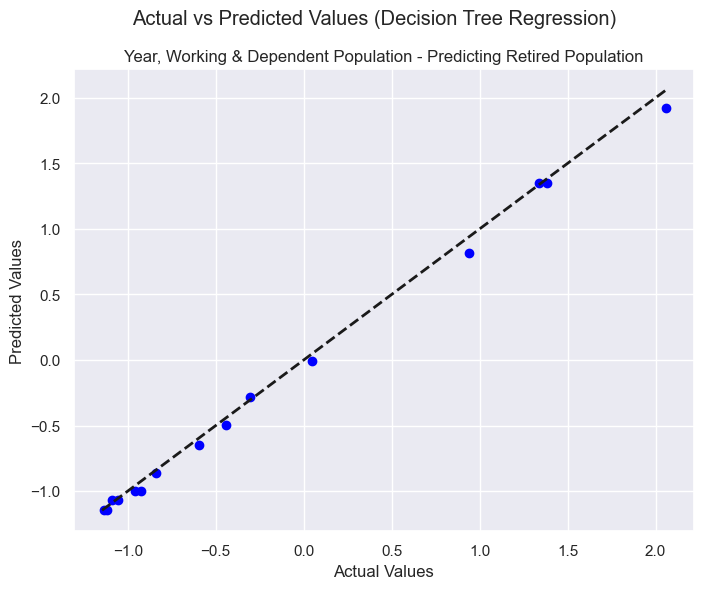

In [370]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_DT, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Decision Tree Regression)')
plt.title("Year, Working & Dependent Population - Predicting Retired Population")
plt.show()

## Dependent Variable = Dependent Population

### Separate the Dependent & Independent Variables

- ***Dependent: Dependent Population***
- ***Independents: Year, Working & Retired Population***

In [371]:
X = pops_sb_dwr_scale.drop(["Dependent"],axis=1)
y = pops_sb_dwr_scale["Dependent"]

### Split the Train and Test Data Variables

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(59, 3)
(15, 3)
(59,)
(15,)


## Linear Regression


###  Create the Model

In [373]:
lrm = LinearRegression()
lrm.fit(X_train, y_train) #fit an Ordinary Least Squares model

LinearRegression()

In [374]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

### Results

In [375]:
print("Linear Regression Results:")
print("Year, Working & Retired Population - Predicting Dependent Population")
print(" ")

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Linear Regression Results:
Year, Working & Retired Population - Predicting Dependent Population
 
R-squared of the model in training set is: 0.3331302569227108
-----Test set statistics-----
R-squared of the model in test set is: 0.3932722727635741
Root mean squared error of the prediction is: 0.8203746126062123
Mean absolute percentage error of the prediction is: 69.0004397722007


### Plot Results & Interpretation
Year

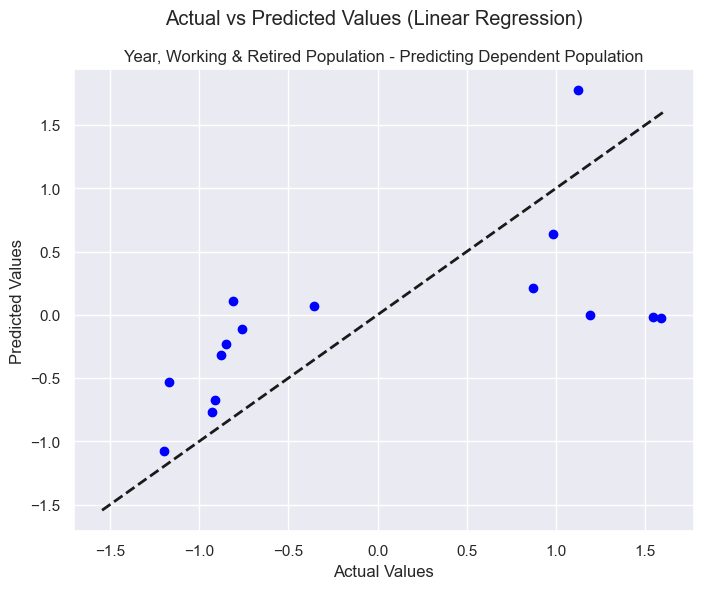

In [376]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds_test, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Linear Regression)')
plt.title("Year, Working & Retired Population - Predicting Dependent Population")
plt.show()

## Decision Tree


###  Create the Model

In [377]:
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor()

### Results

In [378]:
y_pred_DT = DTregressor.predict(X_test)

print("Decision Tree Regression Results:")
print("Year, Working & Dependent Population - Predicting Retired Population")
print(" ")
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_DT) / y_test)) * 100))

Decision Tree Regression Results:
Year, Working & Dependent Population - Predicting Retired Population
 
R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9885462531861051
Root mean squared error of the prediction is: 0.11271691148460397
Mean absolute percentage error of the prediction is: 9.546830121522527


### Plot Results & Interpretation
Year

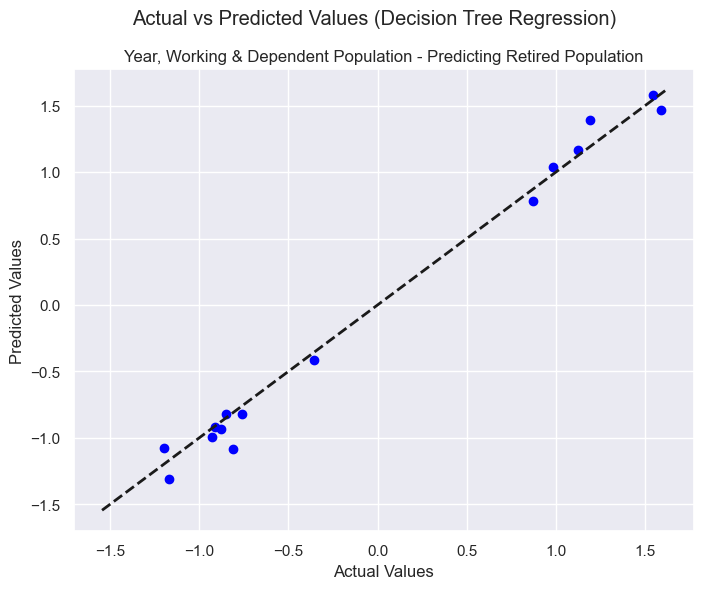

In [379]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_DT, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs Predicted Values (Decision Tree Regression)')
plt.title("Year, Working & Dependent Population - Predicting Retired Population")
plt.show()

## END
***(ML on Year, and Working, Retired and Dependent Population (1950 - 2023) )***

# K Means (pops)

In [380]:

pops_sg_ag = pops.drop(["STATISTIC Label","UNIT","Age Group"],axis=1)
pops_sg_ag = pops_sg_ag.loc[pops["Sex"] != "Both sexes",].drop(["Year","Sex"],axis=1)
# pops_bs_ag = pops_bs_ag.loc[pops_bs_ag["Age Group"] != "All ages",]
# pops_bs_ag = pops_bs_ag[["Year","VALUE","age_id"]]
pops_sg_ag

VALUE  age_id
1       31.4       1
2       29.7       1
10     127.5       2
11     121.6       2
13     142.3       3
...      ...     ...
5987    55.6      17
5989    33.1      19
5990    53.9      19
5992  2606.2      20
5993  2675.4      20

[2960 rows x 2 columns]

In [381]:
scaler = StandardScaler()

pops_sg_ag_scale = pd.DataFrame(scaler.fit_transform(pops_sg_ag),columns=pops_sg_ag.columns)

pops_sg_ag_scale

VALUE    age_id
0    -0.389529 -1.656430
1    -0.393917 -1.656430
2    -0.141474 -1.481146
3    -0.156703 -1.481146
4    -0.103272 -1.305863
...        ...       ...
2955 -0.327063  1.148107
2956 -0.385141  1.498674
2957 -0.331451  1.498674
2958  6.256595  1.673958
2959  6.435216  1.673958

[2960 rows x 2 columns]

## Sum of Squared Distances

## Elbow Method

Text(0.5, 1.0, 'Elbow Method')

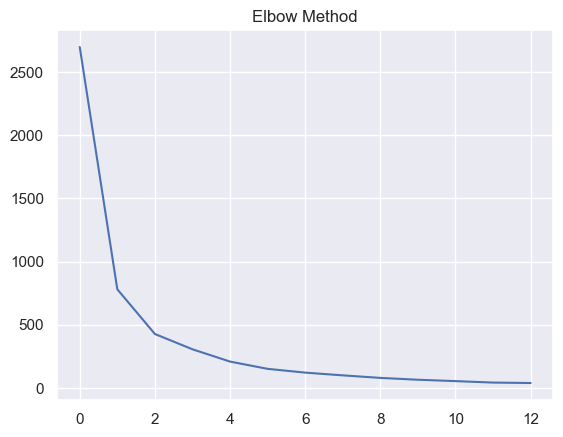

In [382]:
# sum of squared distances
ssd = []
for num_clusters in list(range(2,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pops_sg_ag_scale)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.title("Elbow Method")

### Elbow here looks to be at 5
#### Check silhouette method to confirm

## Silhouette Method

In [383]:
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pops_sg_ag_scale)
    sse_.append([k, silhouette_score(pops_sg_ag_scale, kmeans.labels_)])

Text(0.5, 1.0, 'Silhouette Method')

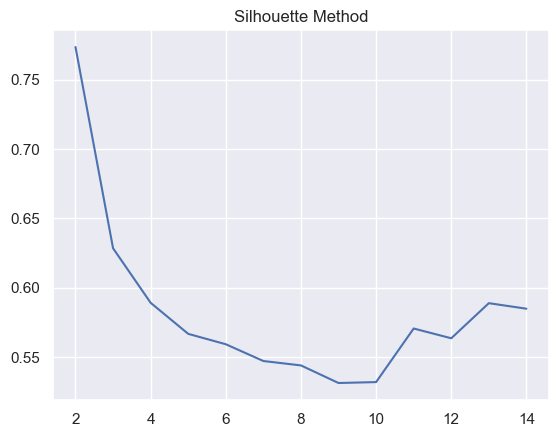

In [384]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
plt.title("Silhouette Method")

## Confirmed k=5

In [385]:
# Kmeans with K=4
model_clus5 = KMeans(n_clusters = 5, max_iter=10)

model_clus5.fit(pops_sg_ag_scale)

KMeans(max_iter=10, n_clusters=5)

In [386]:
# analysis of clusters formed
pops_sg_ag.index = pd.RangeIndex(len(pops_sg_ag.index))
pops_sg_ag_km = pd.concat([pops_sg_ag, pd.Series(model_clus5.labels_)], axis=1)
pops_sg_ag_km.columns = ["VALUE", "age_id", "ClusterID"]
pops_sg_ag_km

VALUE  age_id  ClusterID
0       31.4       1          4
1       29.7       1          4
2      127.5       2          4
3      121.6       2          4
4      142.3       3          4
...      ...     ...        ...
2955    55.6      17          0
2956    33.1      19          0
2957    53.9      19          0
2958  2606.2      20          2
2959  2675.4      20          2

[2960 rows x 3 columns]

In [387]:
km_clusters_VALUE = pd.DataFrame(pops_sg_ag_km.groupby(["ClusterID"]).VALUE.mean())
km_clusters_age_id = pd.DataFrame(pops_sg_ag_km.groupby(["ClusterID"]).age_id.mean())

print("km_clusters_VALUE: ",km_clusters_VALUE)
print(" ")
print("km_clusters_age_id: ",km_clusters_age_id)

km_clusters_VALUE:                   VALUE
ClusterID             
0            42.401216
1           129.582027
2          1820.664865
3            98.755811
4           117.954223
 
km_clusters_age_id:             age_id
ClusterID        
0            16.8
1             7.0
2            20.0
3            12.0
4             2.5


In [388]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_VALUE, km_clusters_age_id], axis=1)
df.columns = ["ClusterID", "VALUE_mean", "age_id_mean"]
df.head()

ClusterID   VALUE_mean  age_id_mean
0          0    42.401216         16.8
1          1   129.582027          7.0
2          2  1820.664865         20.0
3          3    98.755811         12.0
4          4   117.954223          2.5

Text(0.5, 1.0, 'K Mean Cluster Bar Chart - VALUE')

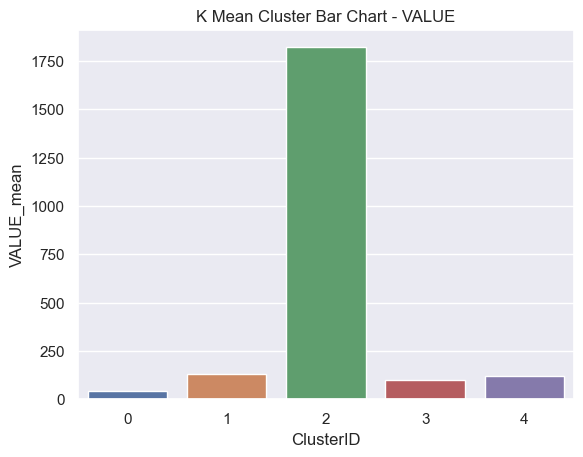

In [389]:
sns.barplot(x=df.ClusterID, y=df.VALUE_mean)
plt.title("K Mean Cluster Bar Chart - VALUE")

Text(0.5, 1.0, 'K Mean Cluster Bar Chart - age_id')

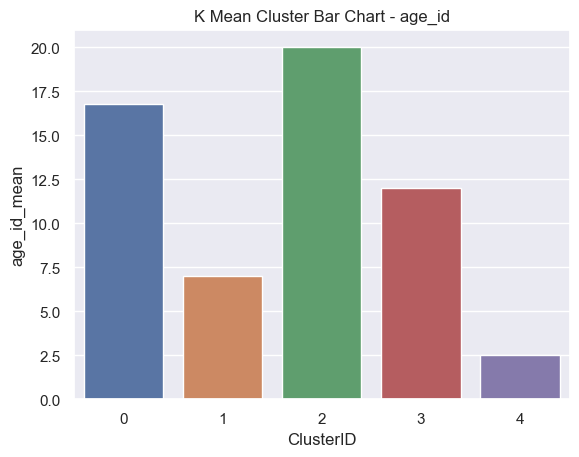

In [390]:
sns.barplot(x=df.ClusterID, y=df.age_id_mean)
plt.title("K Mean Cluster Bar Chart - age_id")

# CA Admin

## Word Count

To keep track of the word in count in the markdown cells:

(ideally this would not include heading, need to explore this in future iterations of this method.)

In [391]:
from IPython.display import Markdown as md
import json

# Read the notebook content
with open('MSc_DA_Sem1_CA1_Yvonne_Smyth.ipynb', 'r', encoding='utf-8') as file:
    notebook_content = file.read()

# Extract Markdown cells' content
notebook_data = json.loads(notebook_content)
md_cells = [cell['source'] for cell in notebook_data['cells'] if cell['cell_type'] == 'markdown']

# Combine all Markdown cells into one string
combined_md = '\n'.join(md_cell if isinstance(md_cell, str) else '\n'.join(md_cell) for md_cell in md_cells)


# Count words in the combined Markdown content
word_count = len(combined_md.split(" "))

md(f"The word count in the Markdown cells is: {word_count}")


The word count in the Markdown cells is: 4824

##  Export Markdown Cells Only

As most of the CA report section were completed through the markdown cells in this notebook, the below code cell allows for exporting of just the markdown cells for input into the final report.

In [396]:
# This is commented out because it downloads a MD version of this notebook every time this cell is executed.

# import nbformat

# # Load the notebook
# with open('MSc_DA_Sem1_CA1_Yvonne_Smyth.ipynb', 'r', encoding='utf-8') as file:
#     notebook = nbformat.read(file, as_version=4)

# # Extract Markdown cells
# markdown_cells = [cell['source'] for cell in notebook['cells'] if cell['cell_type'] == 'markdown']

# # Combine Markdown cells into a single string
# filtered_markdown = '\n'.join(markdown_cells)

# # Save the filtered Markdown content to a new file
# with open('MSc_DA_Sem1_CA1_Yvonne_Smyth_MD.md', 'w', encoding='utf-8') as new_file:
#     new_file.write(filtered_markdown)

## Print a list of all created dataframes

The below code is for the creation of the data frame to house all dataframes made while working through the CA.
It's at the at start of Notebook so that dataframe names and descriptions could be added to throughout.

The number of datafames to call upon for different tasks were too many to remember and work was being duplicated. This was a later addition to improve ongoing project management of this CA, with result that not all dataframes are entered here.

In future projects this structure will be implemented from the start. Suggestions for improvement are welcome!

In [393]:
# This is placed at the start of the notebook, before the first dataset is read in and first dataframe created.


# df_index = %who_ls DataFrame
# df_index_table = pd.DataFrame(df_index,columns =["DF_Name"])
# df_index_table["Description"] = ""

In [394]:
df_index_table.head(50)

DF_Name                                        Description
0                   pop  Original Data - 2011-2023 Irish Population, by...
1                 pop_r  r=reduced = Removed All Ages, State, and Both ...
2                  popc  pop with categorical column(Age, Sex & Region)...
3               popc_sb                 Both Sex, True Regions, Age Groups
4                popc_r                10yr: M/F, True Regions, Age Groups
5           popc_r_year                             popc_r grouped by year
6              popc_r_f                                popc_r: Sex==Female
7         popc_r_f_year                              popc_r_f groupby=Year
8              popc_r_m                                  popc_r: Sex==Male
9         popc_r_m_year                             popc_r_m: groupby=Year
10  popc_r_piv_rg_yr_sf                                popc_r: Sex==Female
11       popc_rg_sb_dwr            popc(2011-23): Regions; Both Sex; D/W/R
12       popc_rg_sb_dep        popc(2011-23): Regions; Both Sex; Dependent
13      popc_rg_sb_work          popc(2011-23): Regions; Both Sex; Working
14       popc_rg_sb_ret          popc(2011-23): Regions; Both Sex; Retired
15                 pops  pops:1950-2023:Age Groups&All w/id; M/F/Both; ...
16              pops_aa    pops:1950-2023:Age Groups w/id; M/F/Both; VALUE
17           pops_aa_sg         pops:1950-2023:Age Groups w/id; M/F; VALUE
18           pops_aa_sb    pops:1950-2023:Age Groups w/id; Both sex; VALUE
19           pops_aa_sf      pops:1950-2023:Age Groups w/id; Female; VALUE
20           pops_aa_sm        pops:1950-2023:Age Groups w/id; Male; VALUE
21          pops_sb_dwr                   pops:(1950-2023) Both sex; D/W/R
22    popc_rg_sb_dwr_ec                  popc_rg_sb_dwr_ec: Region Encoded
23              popc_ec   popc: Year, age_id, VALUE w/Sex & Region Encoded
24            popc_ec_r              popc_ec:Filt:M/F, Regions, Age Groups
25        popc_ec_r_num                            = popc_ec: Numeric only

In [395]:
# Create method of Describing & Cataloging df created throughout notebook and analysis journey

# DF = "df_index_table"
# Description = "Enter_Text_Here"
# df_index_table.loc[len(df_index_table)] = [DF, Description]
